In [2]:
import datetime
import pandas as pd
import numpy as np

# Read the data
#data = pd.read_csv('C:\\temp\\sizing\\data.csv')
data = pd.read_csv('data_3.csv')
data['Date'] = pd.to_datetime(data['Date'])
data['StartDate'] = pd.to_datetime(data['StartDate'])
data['EndDate'] = pd.to_datetime(data['EndDate'])

# Tickets:     clientes reais
# TicketsPrev: clientes estimados
# Persons:     número de pessoas em caixa (estimado)

# RosterCode, Date, StartDate, EndDate, Tickets, TicketsPrev, Persons

#data.head(25)
data

RosterCode       Date           StartDate             EndDate  \
0               10 2021-11-01 2021-11-01 09:00:00 2021-11-01 10:00:00   
1               10 2021-11-01 2021-11-01 10:00:00 2021-11-01 11:00:00   
2               10 2021-11-01 2021-11-01 11:00:00 2021-11-01 12:00:00   
3               10 2021-11-01 2021-11-01 12:00:00 2021-11-01 13:00:00   
4               10 2021-11-01 2021-11-01 13:00:00 2021-11-01 14:00:00   
...            ...        ...                 ...                 ...   
204582          75 2022-10-31 2022-10-31 17:00:00 2022-10-31 18:00:00   
204583          75 2022-10-31 2022-10-31 18:00:00 2022-10-31 19:00:00   
204584          75 2022-10-31 2022-10-31 19:00:00 2022-10-31 20:00:00   
204585          75 2022-10-31 2022-10-31 20:00:00 2022-10-31 21:00:00   
204586          75 2022-10-31 2022-10-31 21:00:00 2022-10-31 22:00:00   

        Tickets  TicketsPrev  Persons  
0            32           55        2  
1            57           69        3  
2            87          112        4  
3            97          118        4  
4           100          130        4  
...         ...          ...      ...  
204582       52           38        2  
204583      122           66        3  
204584      125           92        3  
204585      114           70        3  
204586       42           29        3  

[204587 rows x 7 columns]

In [3]:
data_filtered = data.drop(columns=['Date', 'EndDate' , 'Tickets'])
data_filtered

RosterCode           StartDate  TicketsPrev  Persons
0               10 2021-11-01 09:00:00           55        2
1               10 2021-11-01 10:00:00           69        3
2               10 2021-11-01 11:00:00          112        4
3               10 2021-11-01 12:00:00          118        4
4               10 2021-11-01 13:00:00          130        4
...            ...                 ...          ...      ...
204582          75 2022-10-31 17:00:00           38        2
204583          75 2022-10-31 18:00:00           66        3
204584          75 2022-10-31 19:00:00           92        3
204585          75 2022-10-31 20:00:00           70        3
204586          75 2022-10-31 21:00:00           29        3

[204587 rows x 4 columns]

In [6]:
class PrintTable:
    def __init__(self, values, captions, widths, aligns):
        if not all([len(values[0]) == len(x) for x in [captions, widths, aligns]]):
            raise Exception()

        self._tablewidth = sum(widths) + 3*(len(captions)-1) + 4
        self._values = values
        self._captions = captions
        self._widths = widths
        self._aligns = aligns

    def print(self):
        self._printTable()

    def _printTable(self):
        formattext_head = ""
        formattext_cell = ""
        
        for i, v in enumerate(self._widths):
            formattext_head += "{" + str(i) + ":^" + str(v) + "} | "
            formattext_cell += "{" + str(i) + ":" + self._aligns[i] + str(v) + "} | "
            
        formattext_head = formattext_head[:-3]
        formattext_head = "  " + formattext_head.strip() + "  "
        formattext_cell = formattext_cell[:-3]
        formattext_cell = "  " + formattext_cell.strip() + "  "

        print("-"*self._tablewidth)
        print(formattext_head.format(*self._captions))
        print("-"*self._tablewidth)
        
        for w in self._values:
            print(formattext_cell.format(*w))
            
        print("-"*self._tablewidth)    

---------------------------------------------------------------------
Nº stores: 52
---------------------------------------------------------------------

----------------------------------------------------------------------------------------------------------------
Store 10
----------------------------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------
     Mean    |   Median   |    Mode    |      Quantiles       | Min Value  | Max Value   
-----------------------------------------------------------------------------------------
      3      |     4      |     4      |   [3.0, 4.0, 4.0]    |     1      |     4       
-----------------------------------------------------------------------------------------


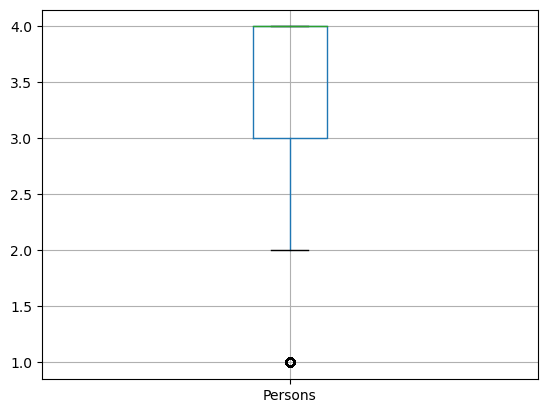

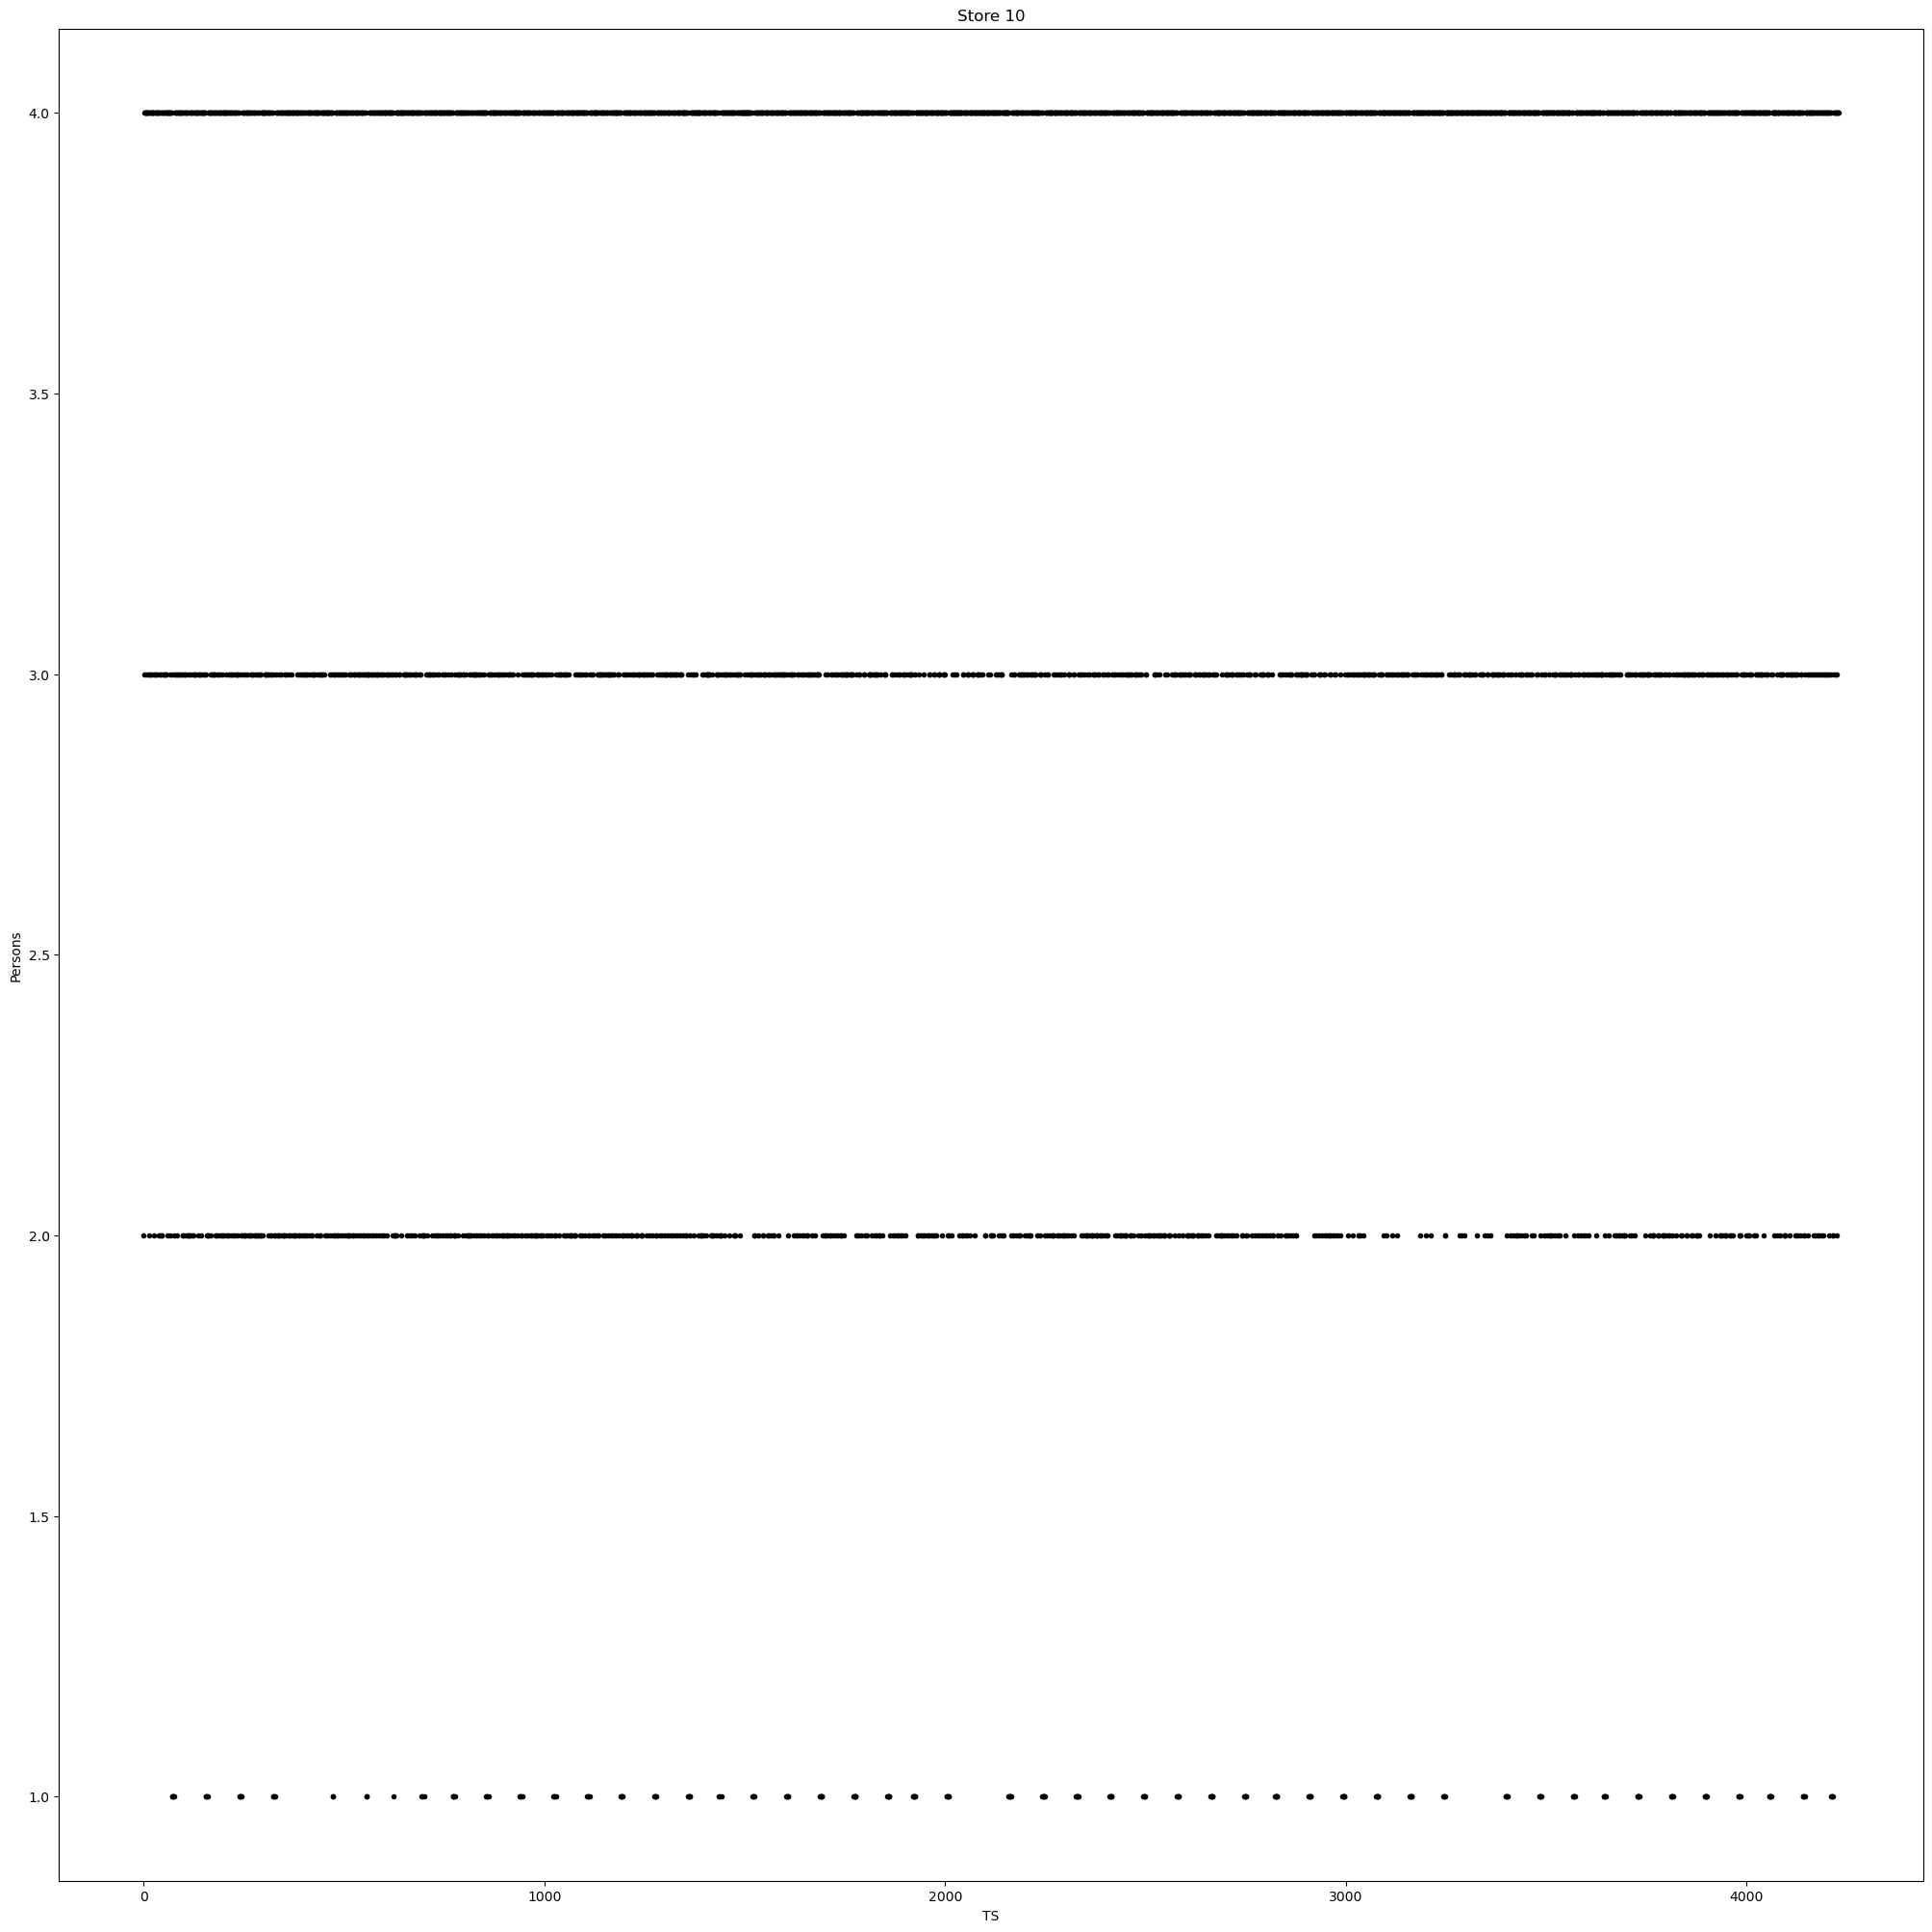

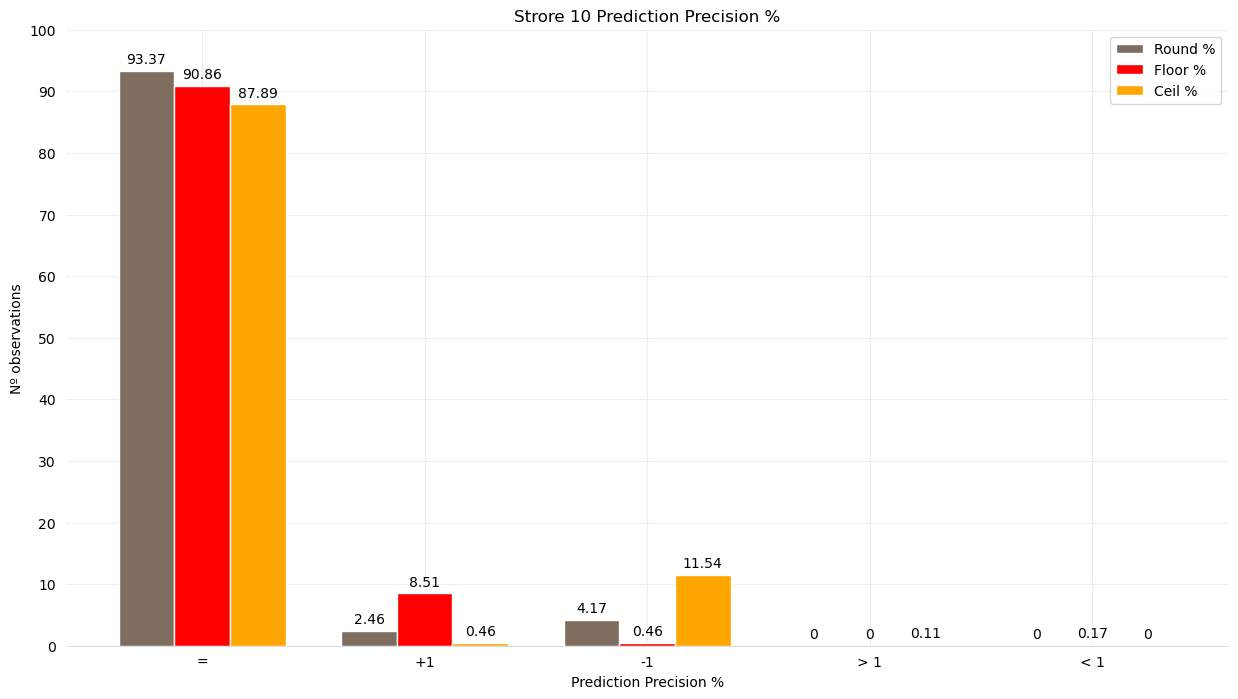

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       1634 |         43 |         73 |          0 |          0  
  Floor                |       1590 |        149 |          8 |          0 |          3  
  Ceil                 |       1538 |          8 |        202 |          2 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      93.37 |       2.46 |       4.17 |        0.0 |        0.0  
  Floor % 

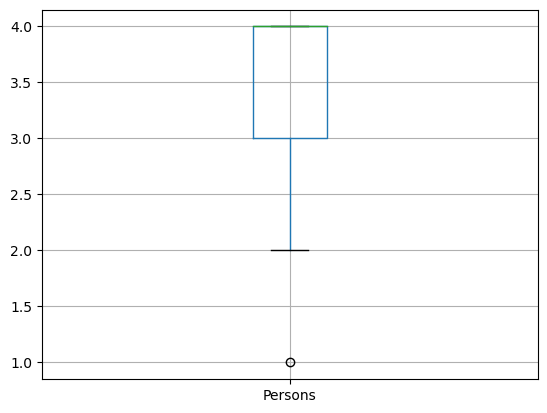

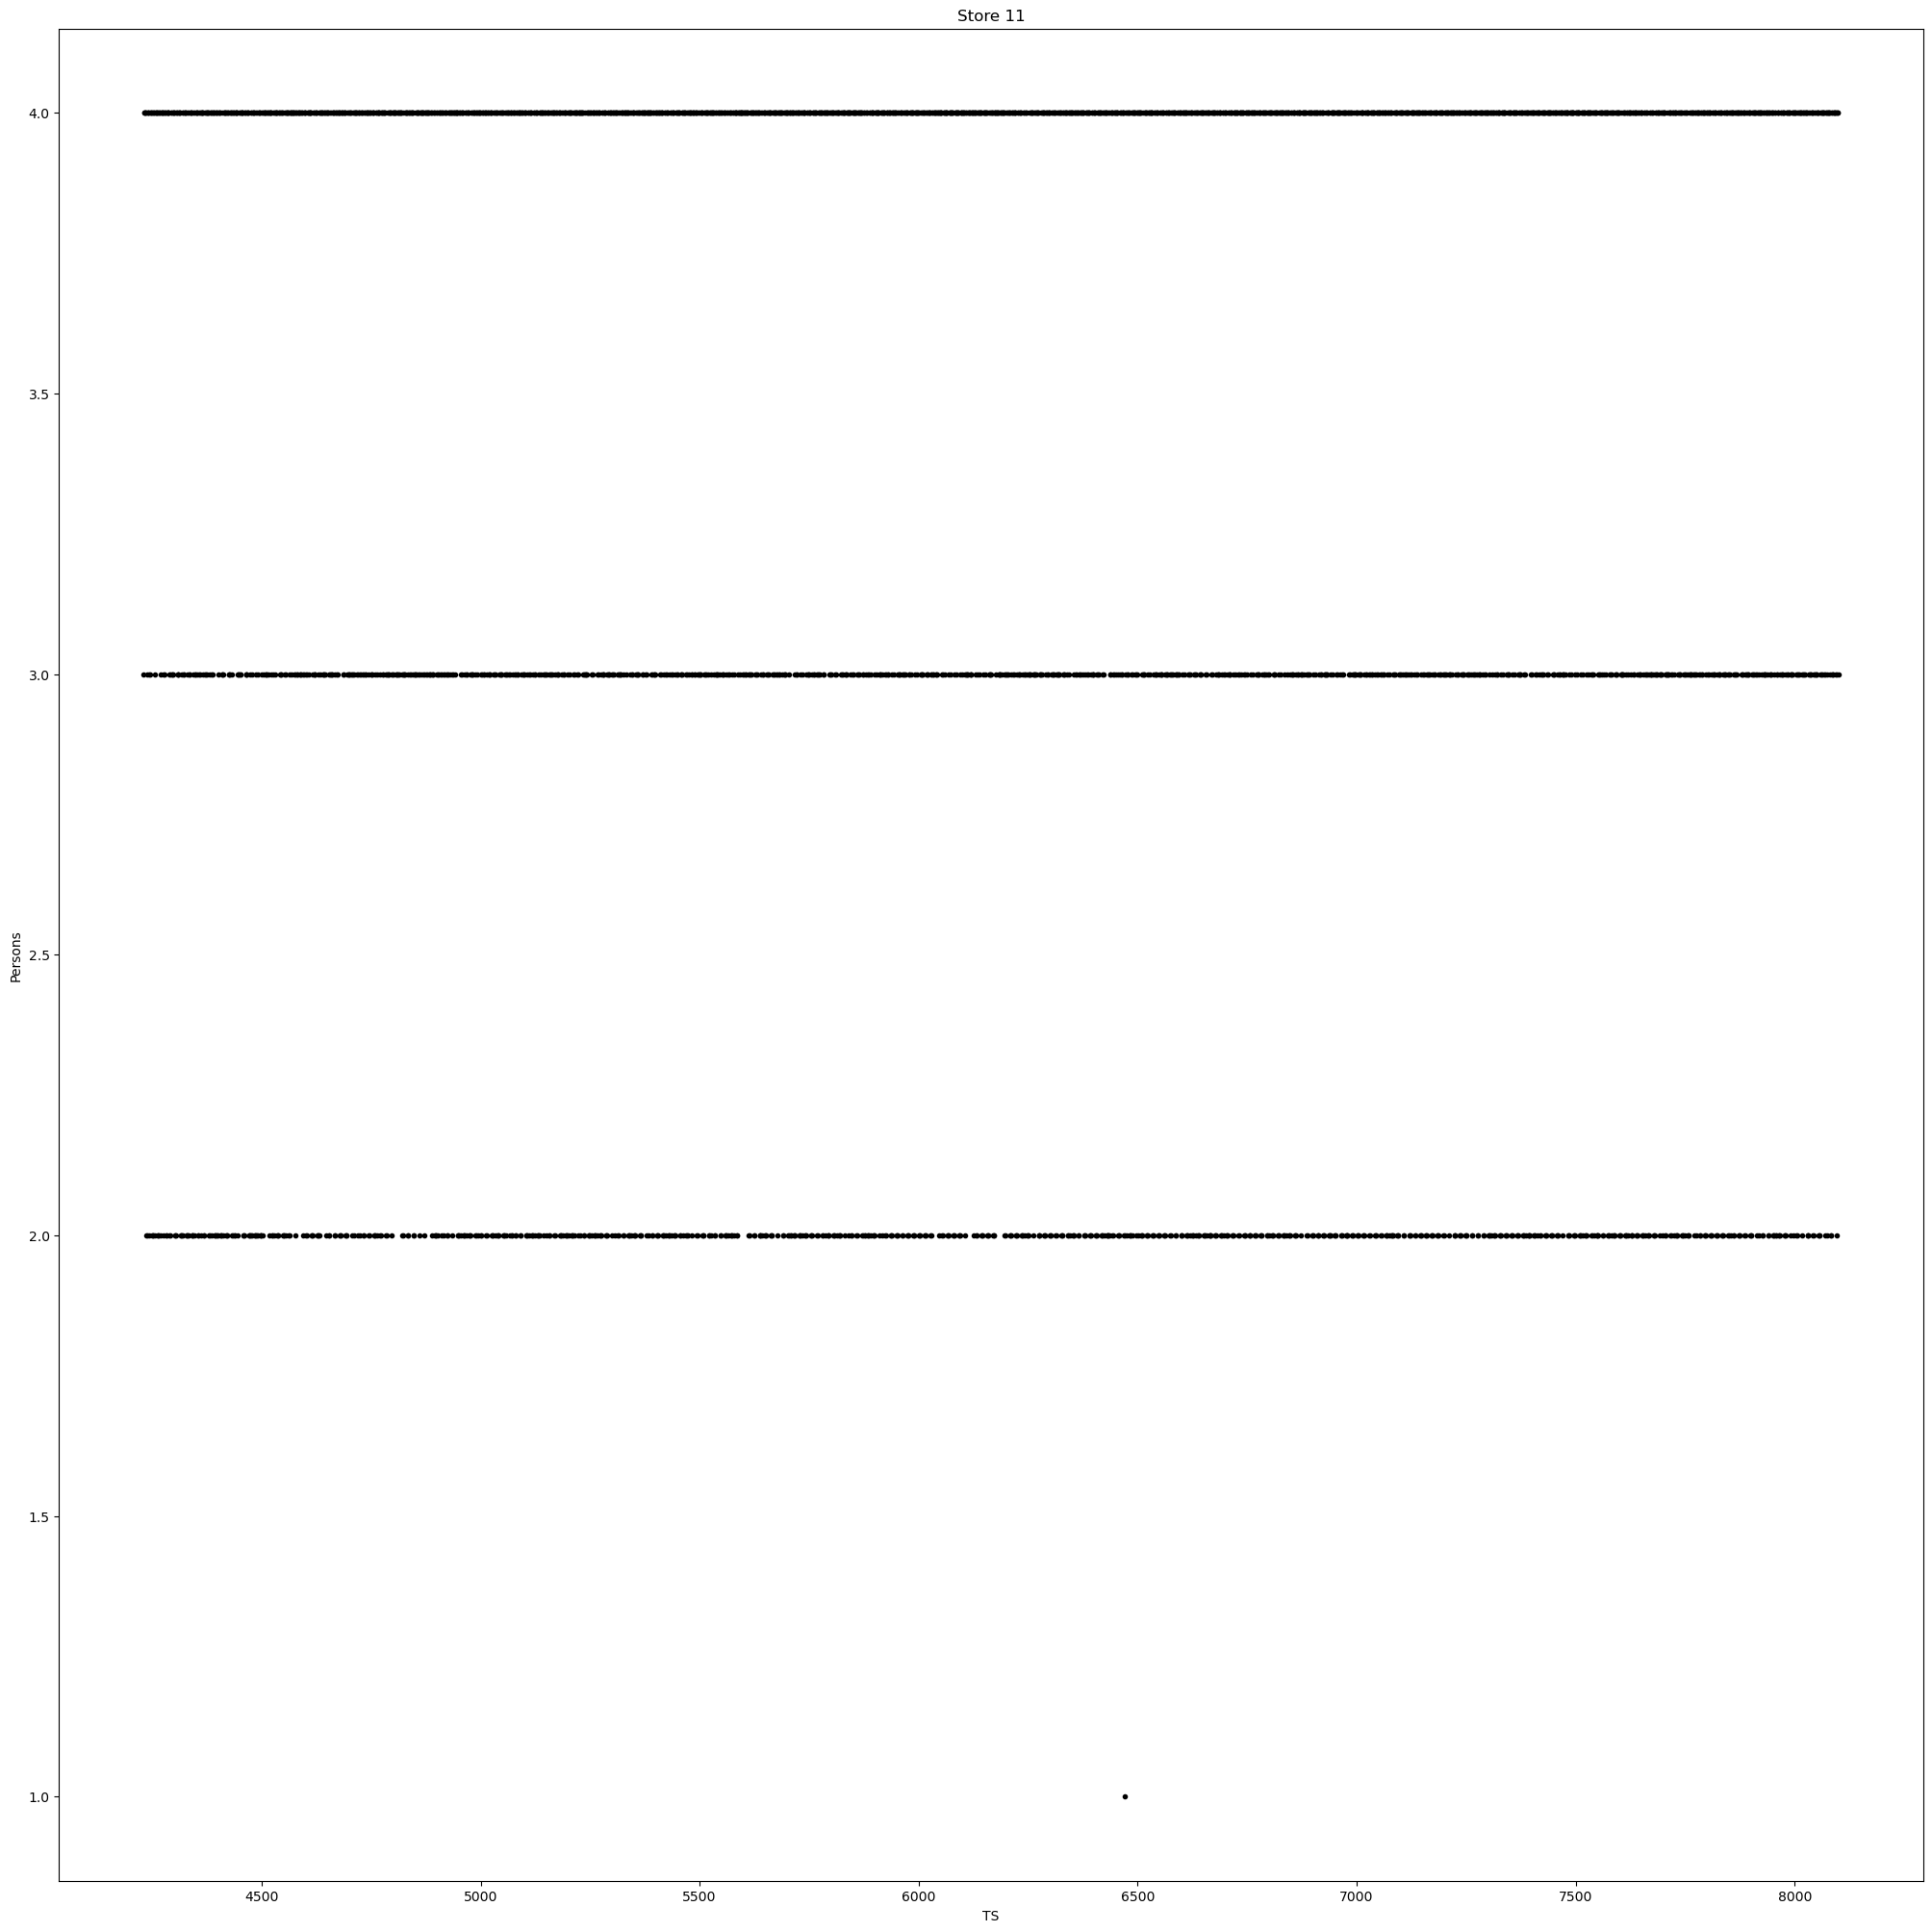

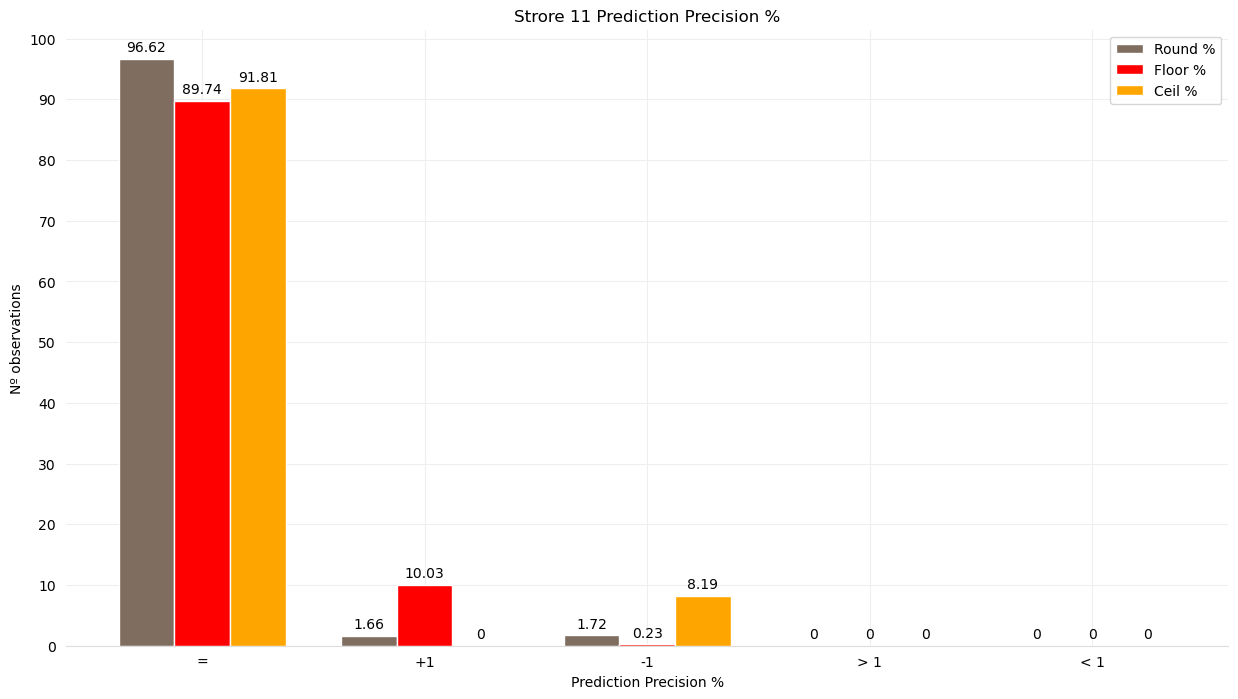

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       1686 |         29 |         30 |          0 |          0  
  Floor                |       1566 |        175 |          4 |          0 |          0  
  Ceil                 |       1602 |          0 |        143 |          0 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      96.62 |       1.66 |       1.72 |        0.0 |        0.0  
  Floor % 

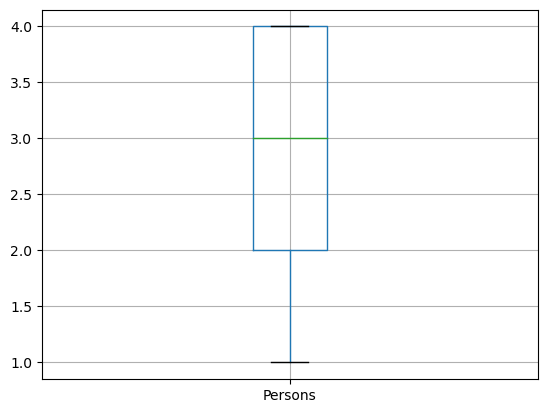

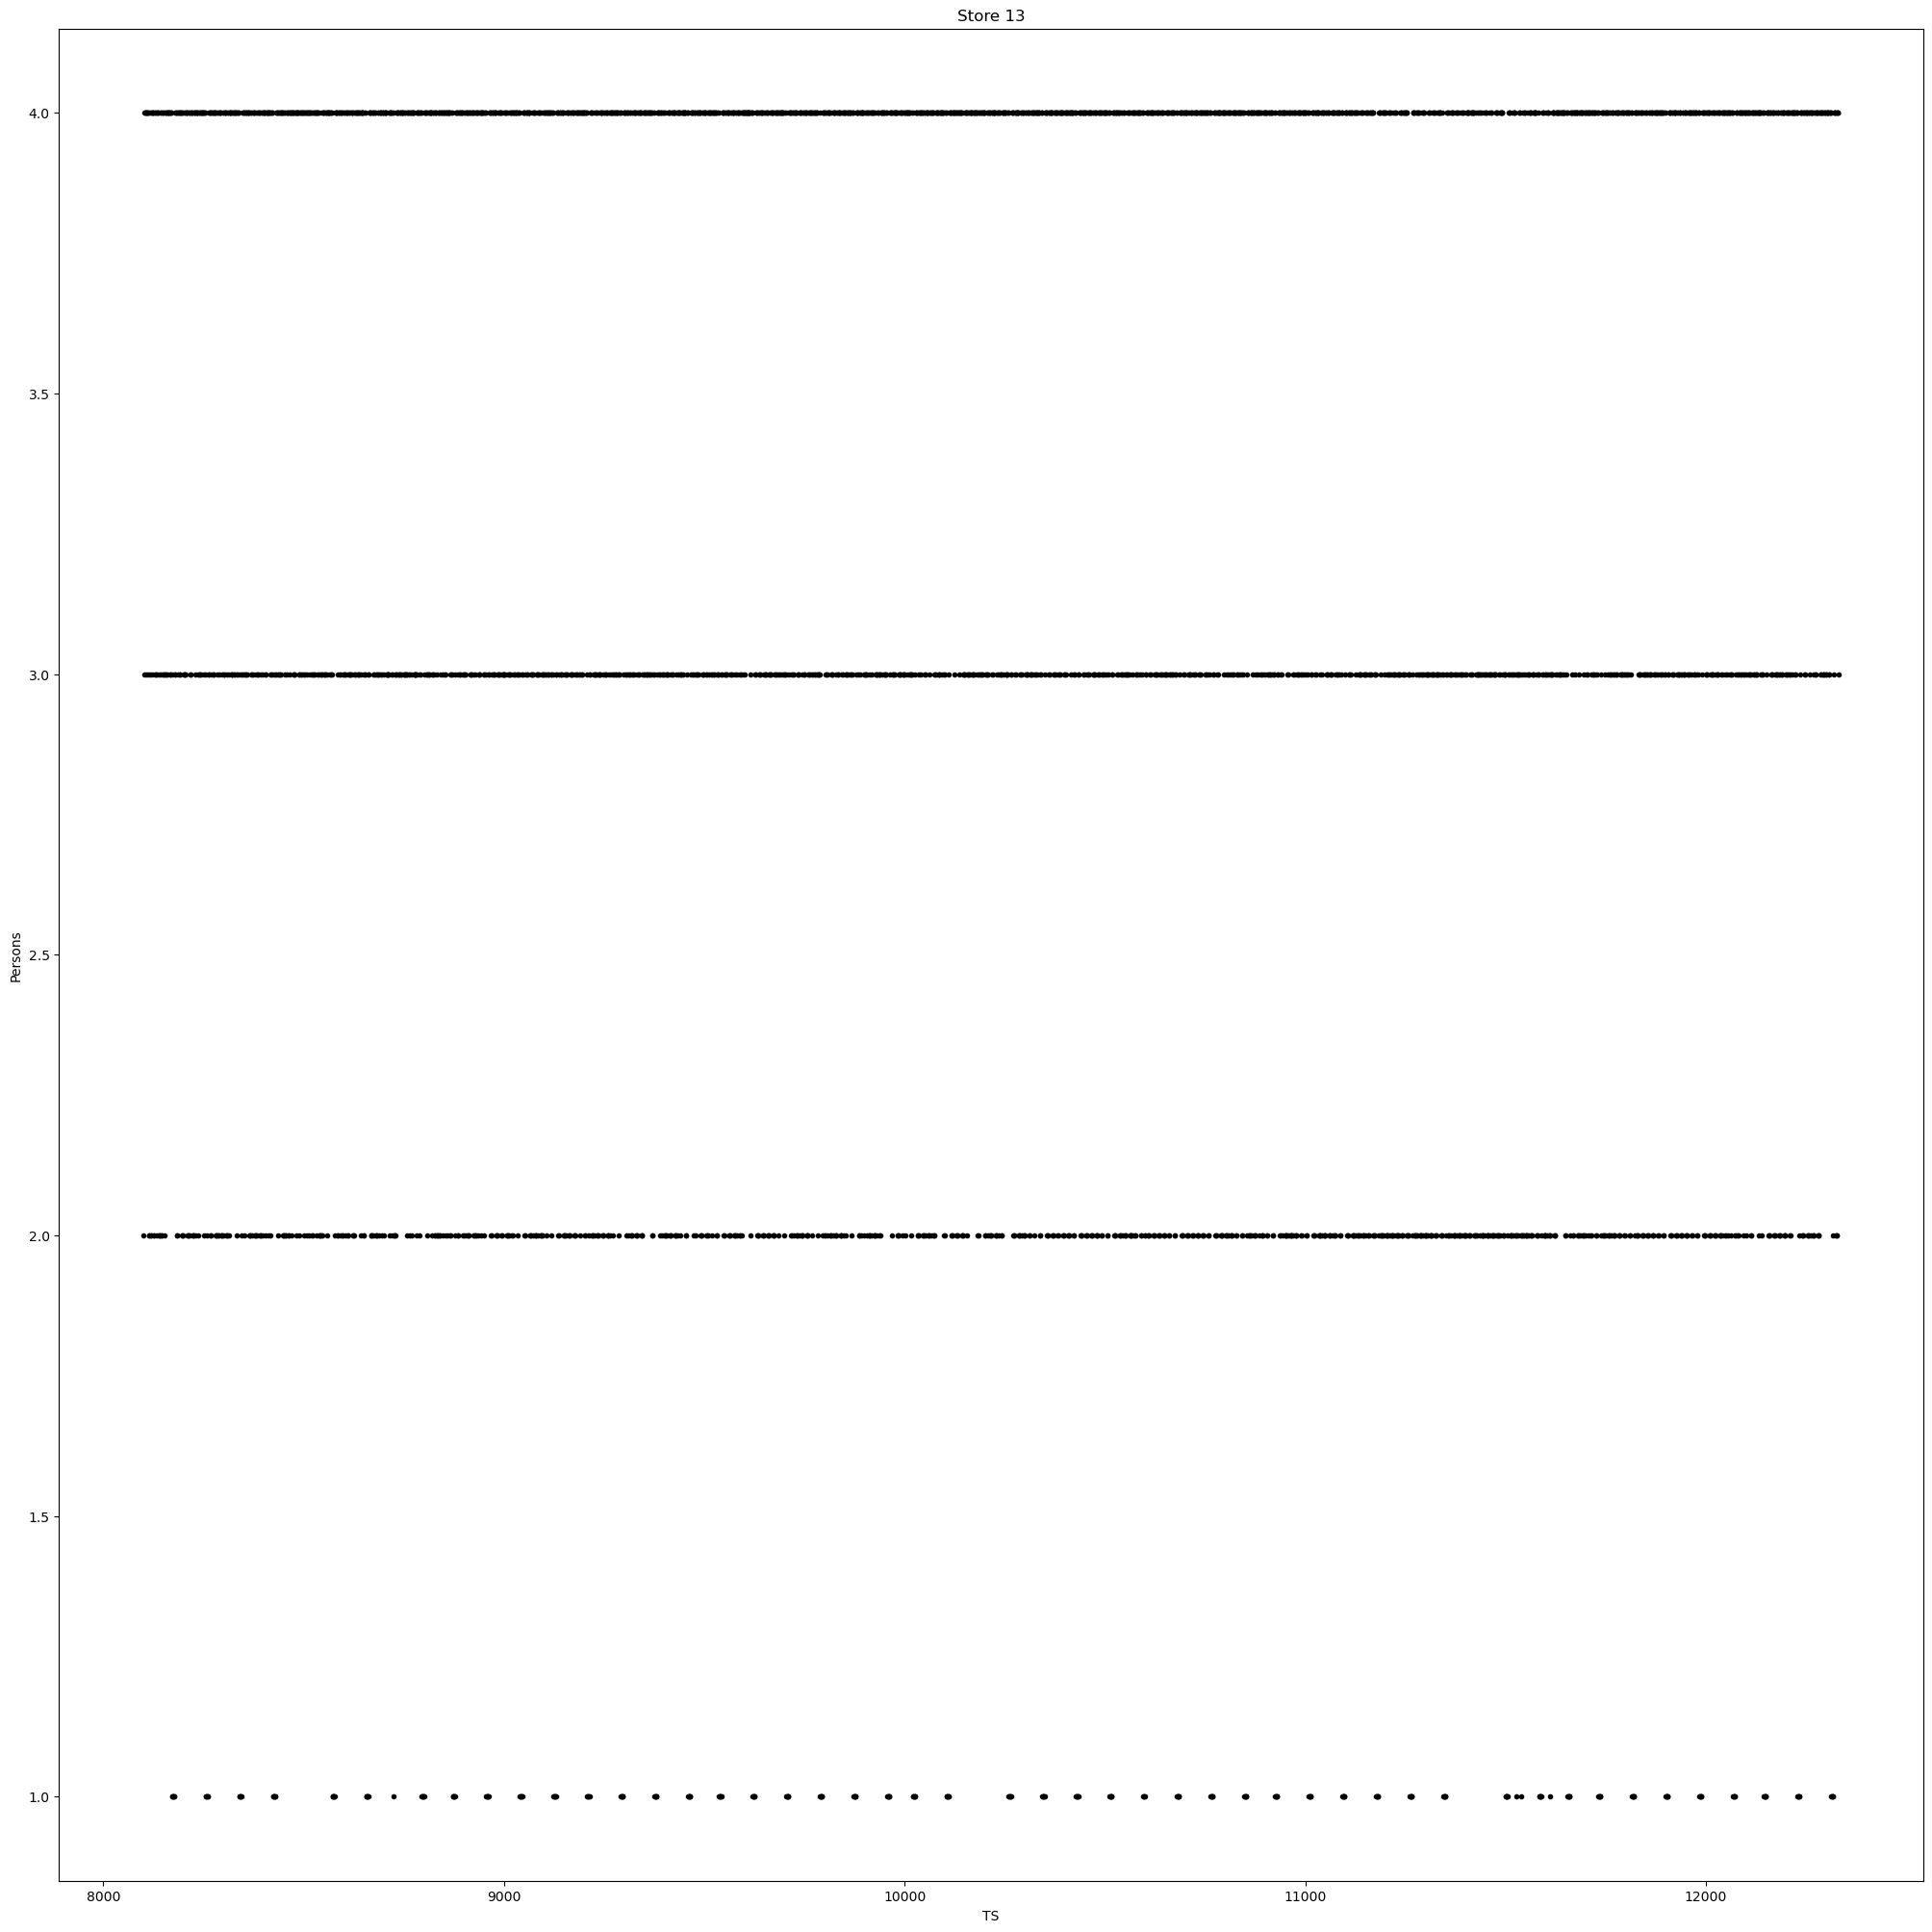

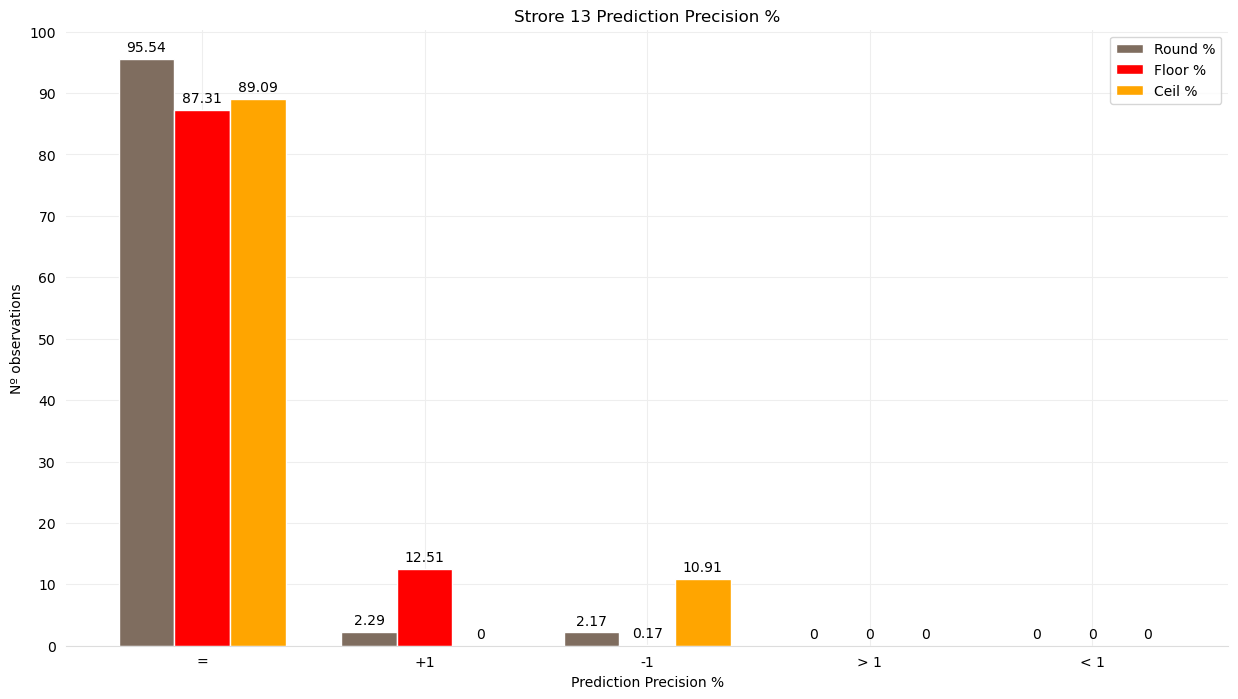

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       1672 |         40 |         38 |          0 |          0  
  Floor                |       1528 |        219 |          3 |          0 |          0  
  Ceil                 |       1559 |          0 |        191 |          0 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      95.54 |       2.29 |       2.17 |        0.0 |        0.0  
  Floor % 

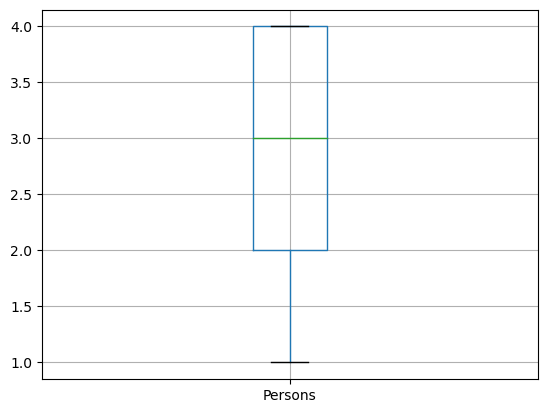

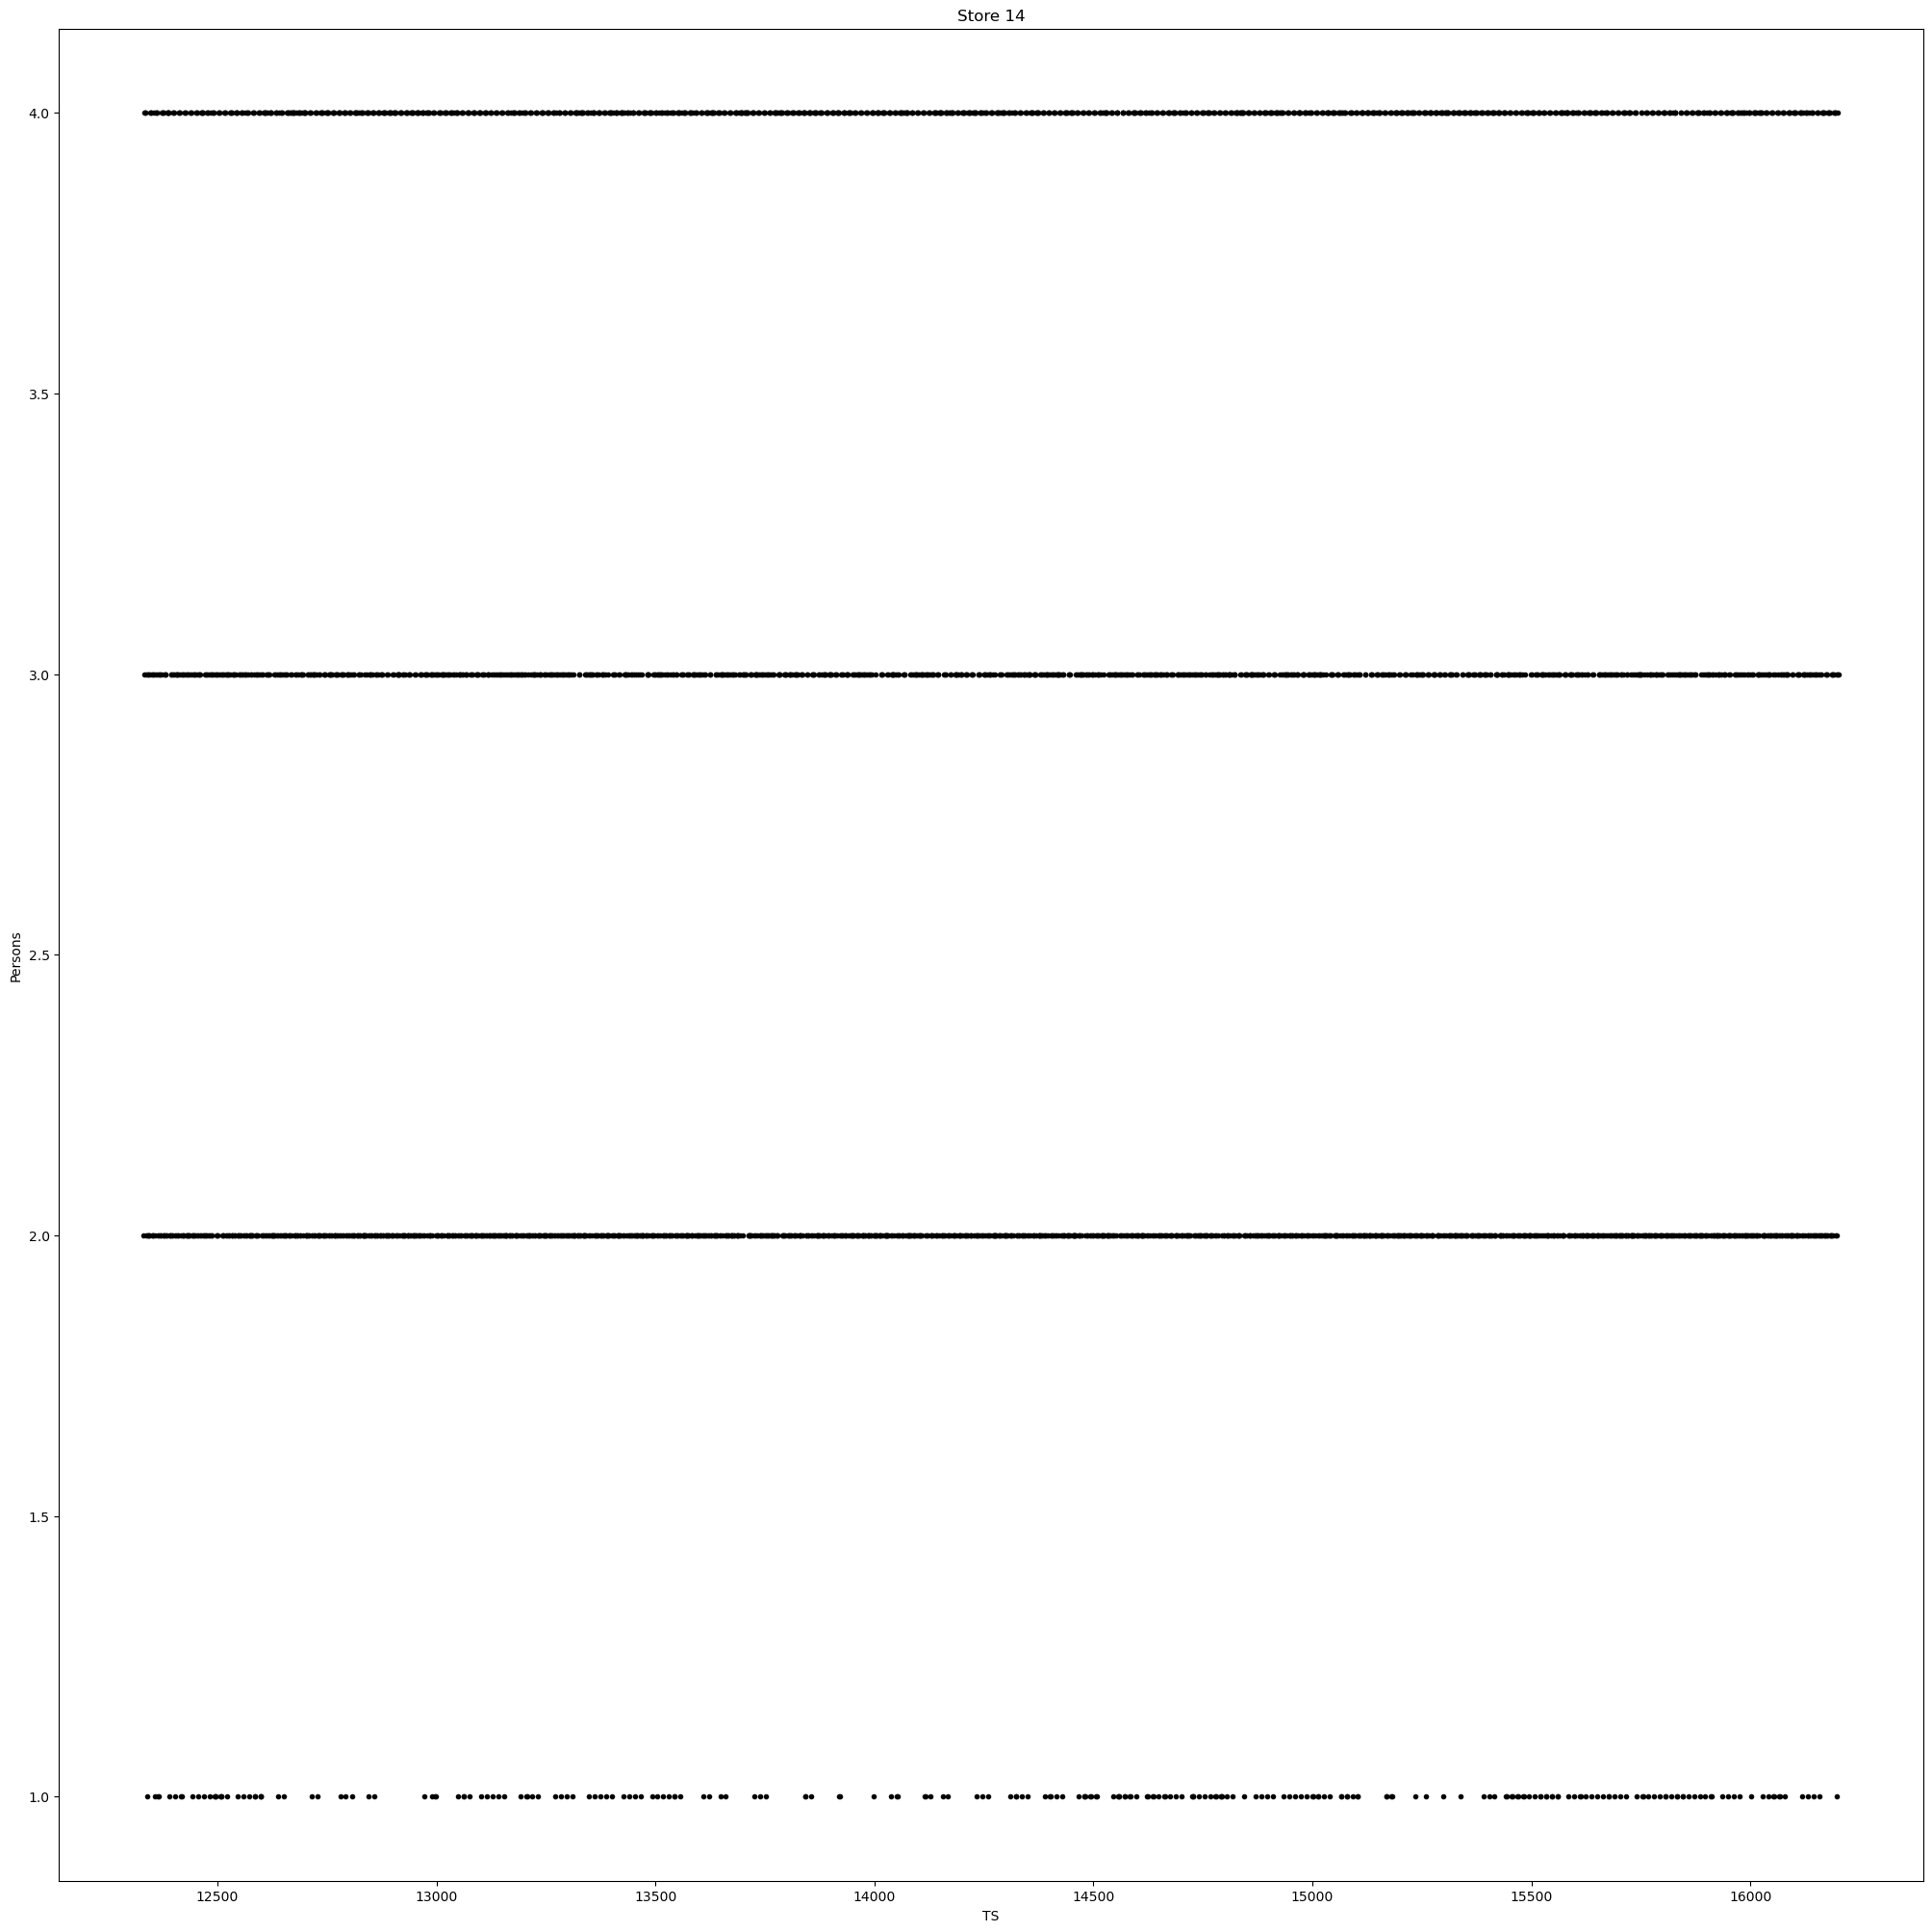

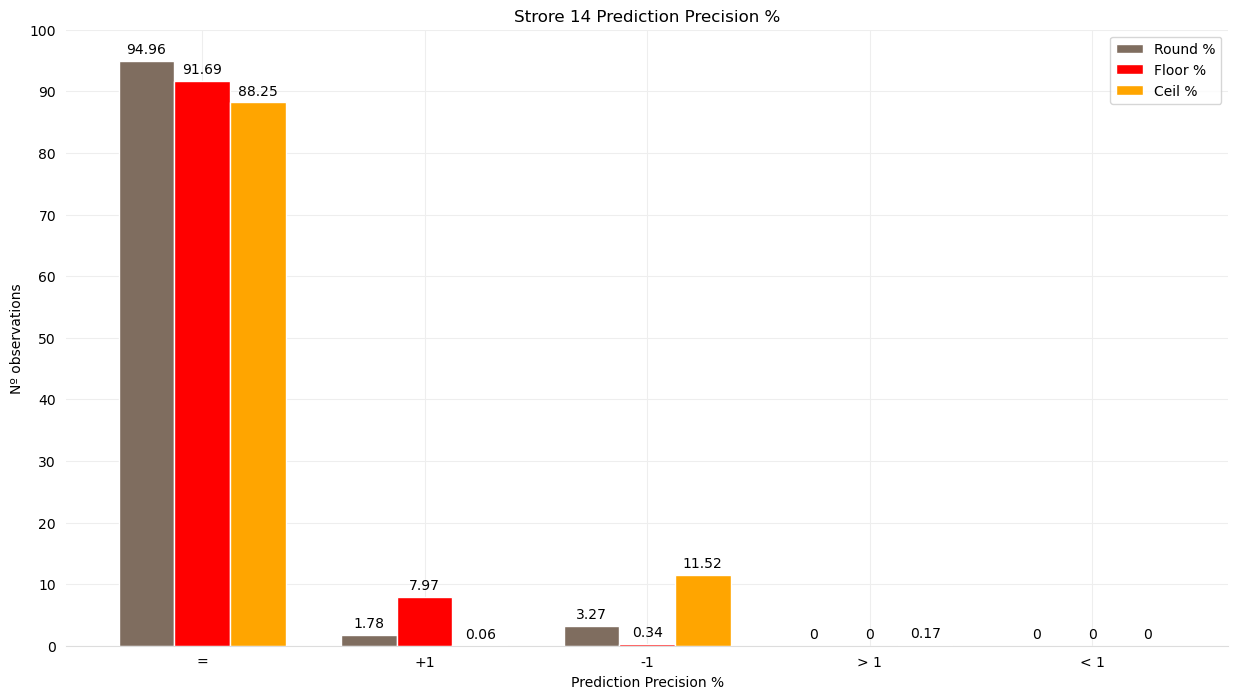

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       1657 |         31 |         57 |          0 |          0  
  Floor                |       1600 |        139 |          6 |          0 |          0  
  Ceil                 |       1540 |          1 |        201 |          3 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      94.96 |       1.78 |       3.27 |        0.0 |        0.0  
  Floor % 

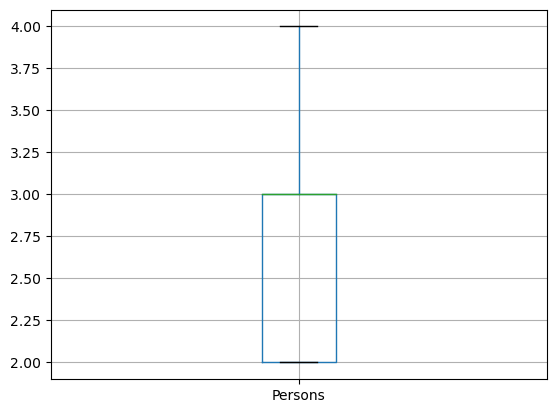

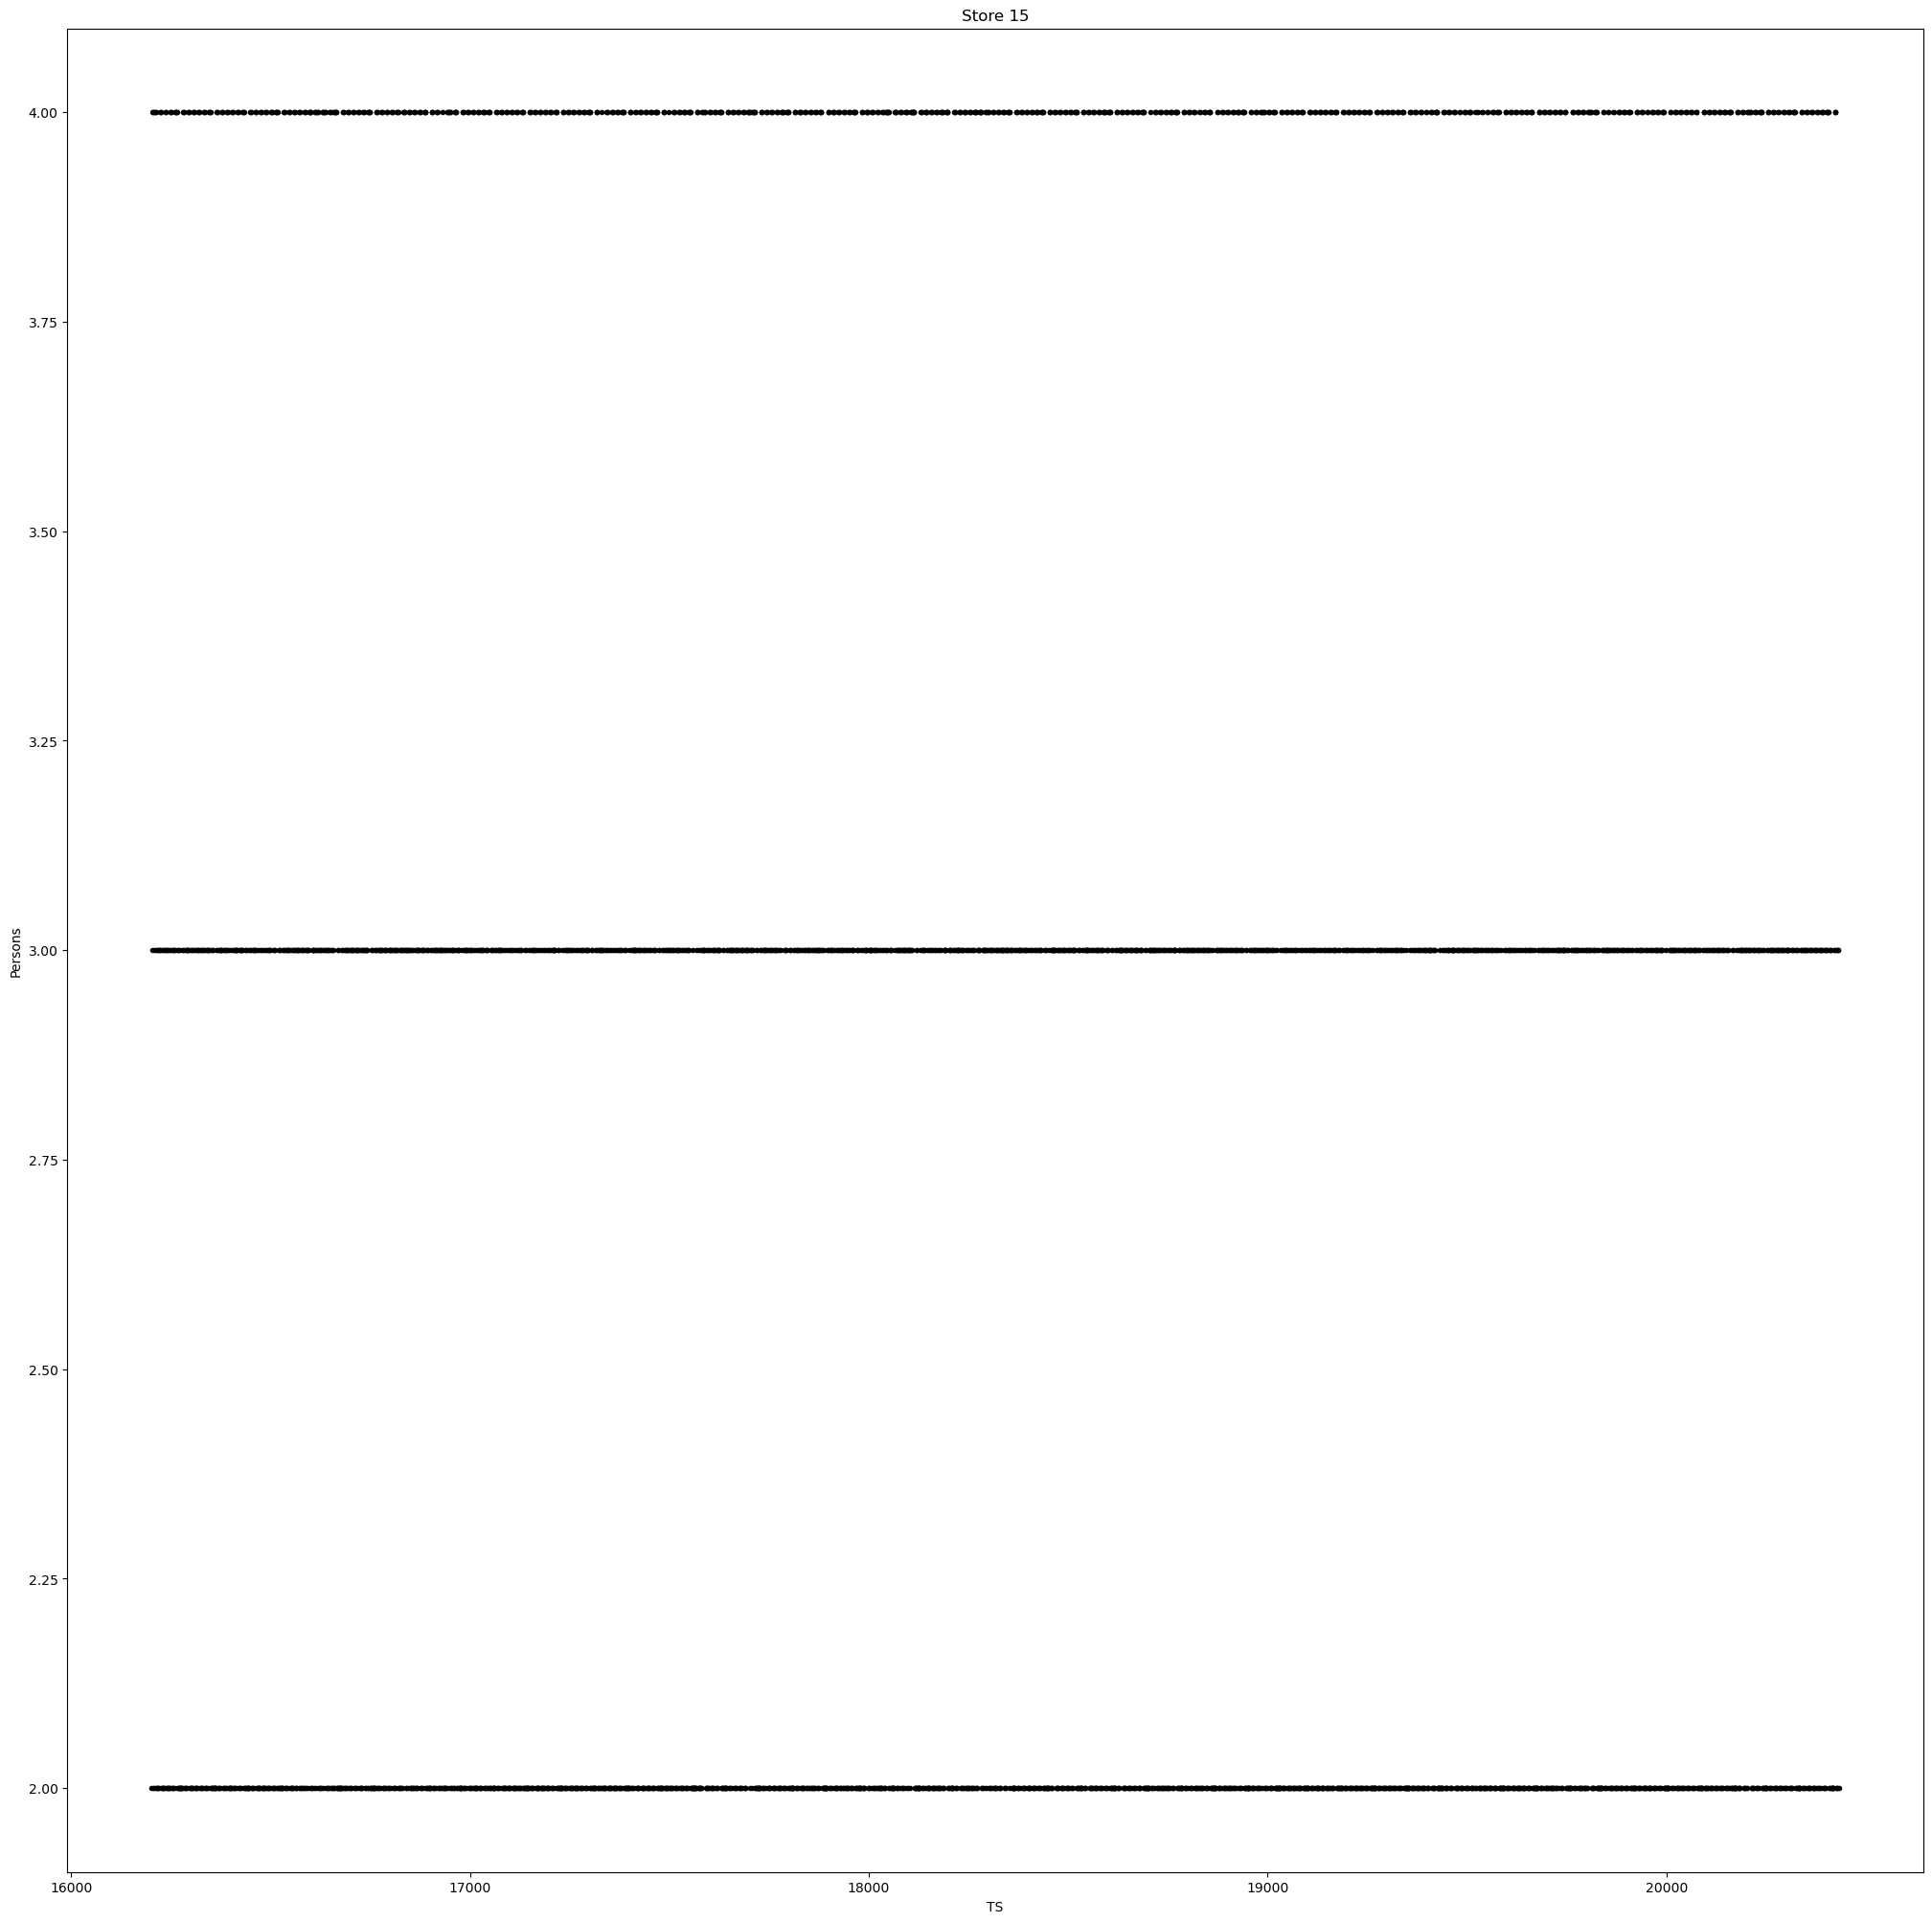

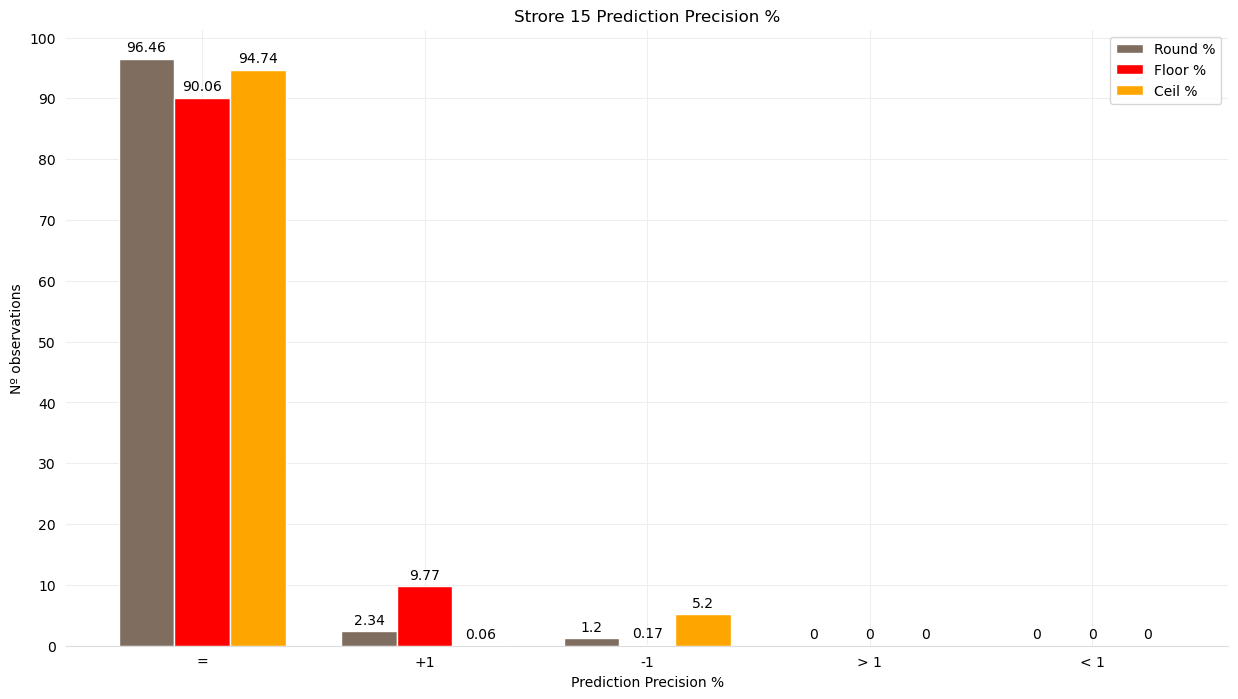

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       1688 |         41 |         21 |          0 |          0  
  Floor                |       1576 |        171 |          3 |          0 |          0  
  Ceil                 |       1658 |          1 |         91 |          0 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      96.46 |       2.34 |        1.2 |        0.0 |        0.0  
  Floor % 

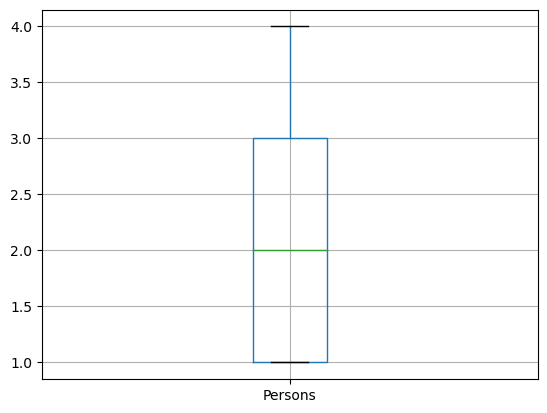

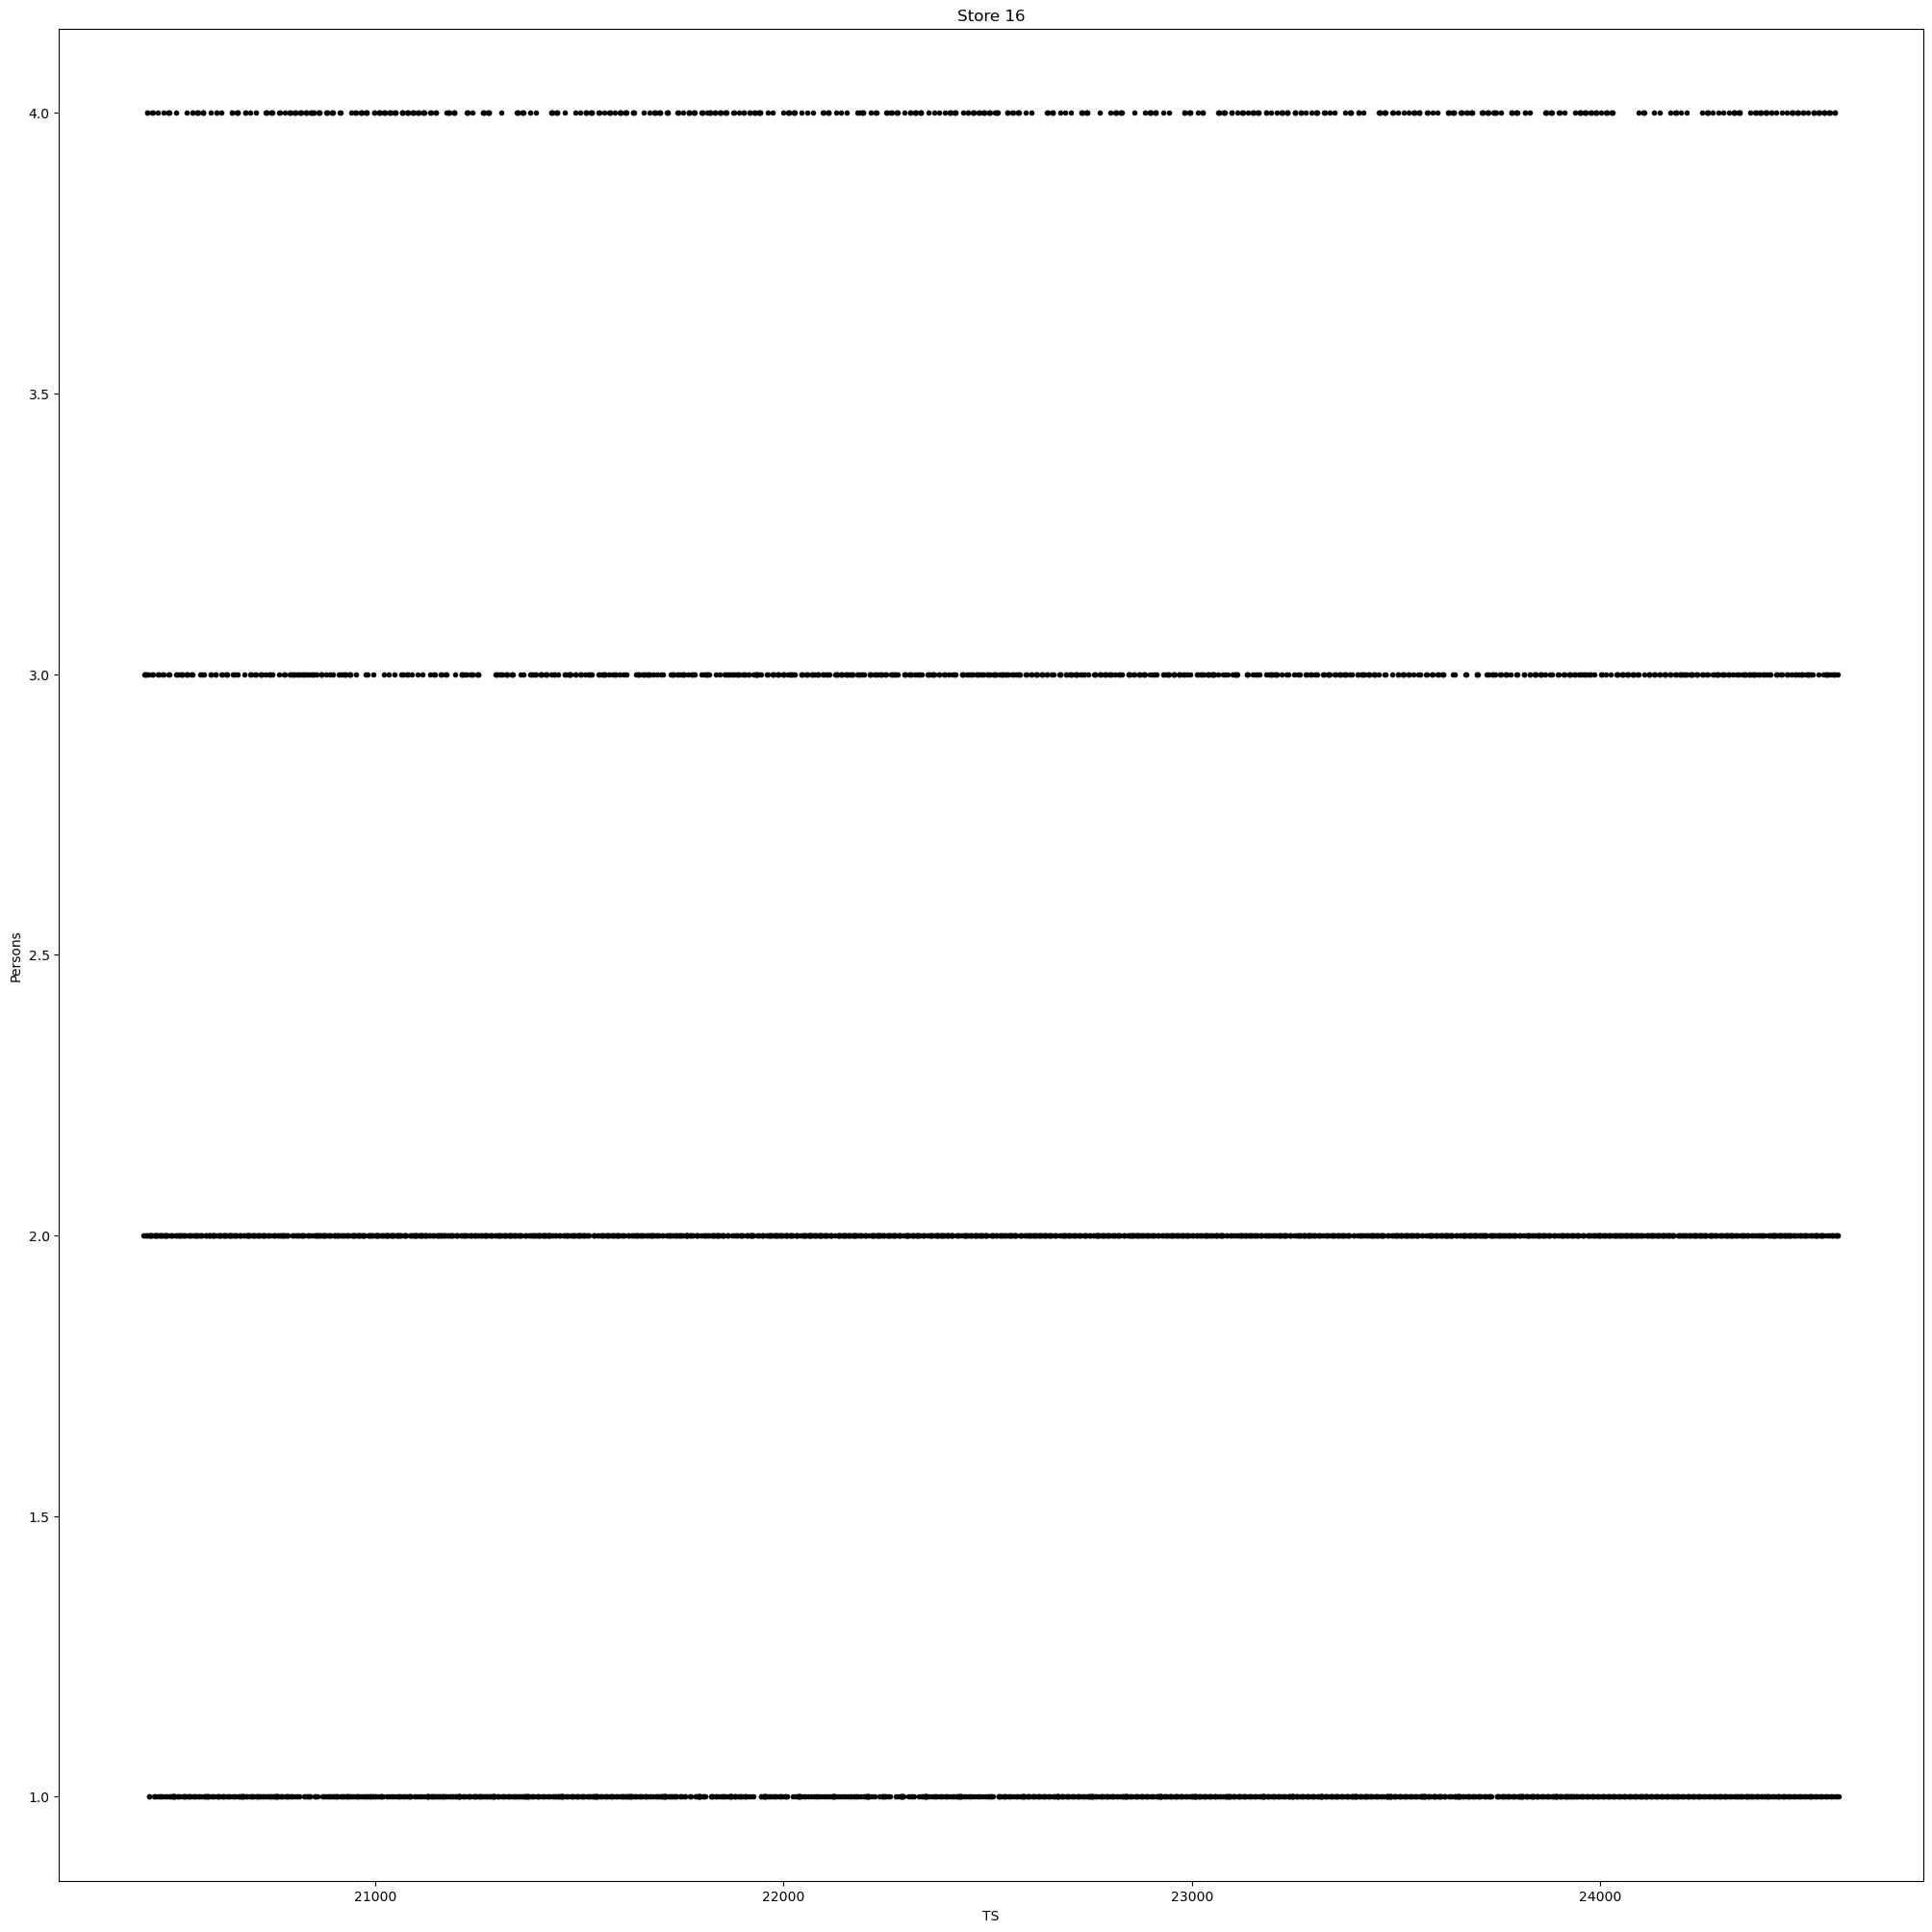

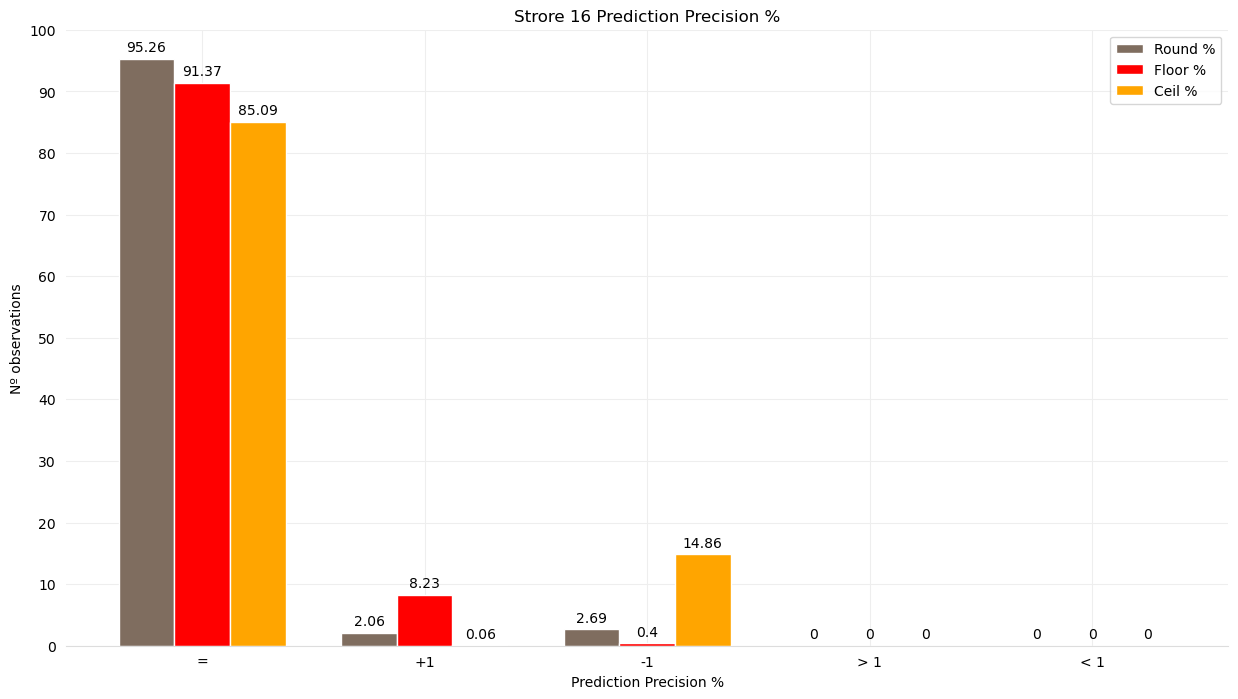

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       1667 |         36 |         47 |          0 |          0  
  Floor                |       1599 |        144 |          7 |          0 |          0  
  Ceil                 |       1489 |          1 |        260 |          0 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      95.26 |       2.06 |       2.69 |        0.0 |        0.0  
  Floor % 

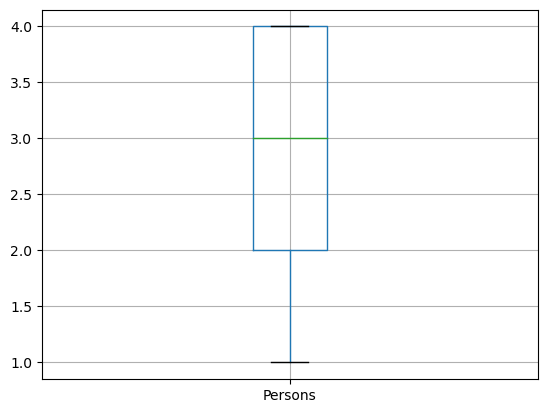

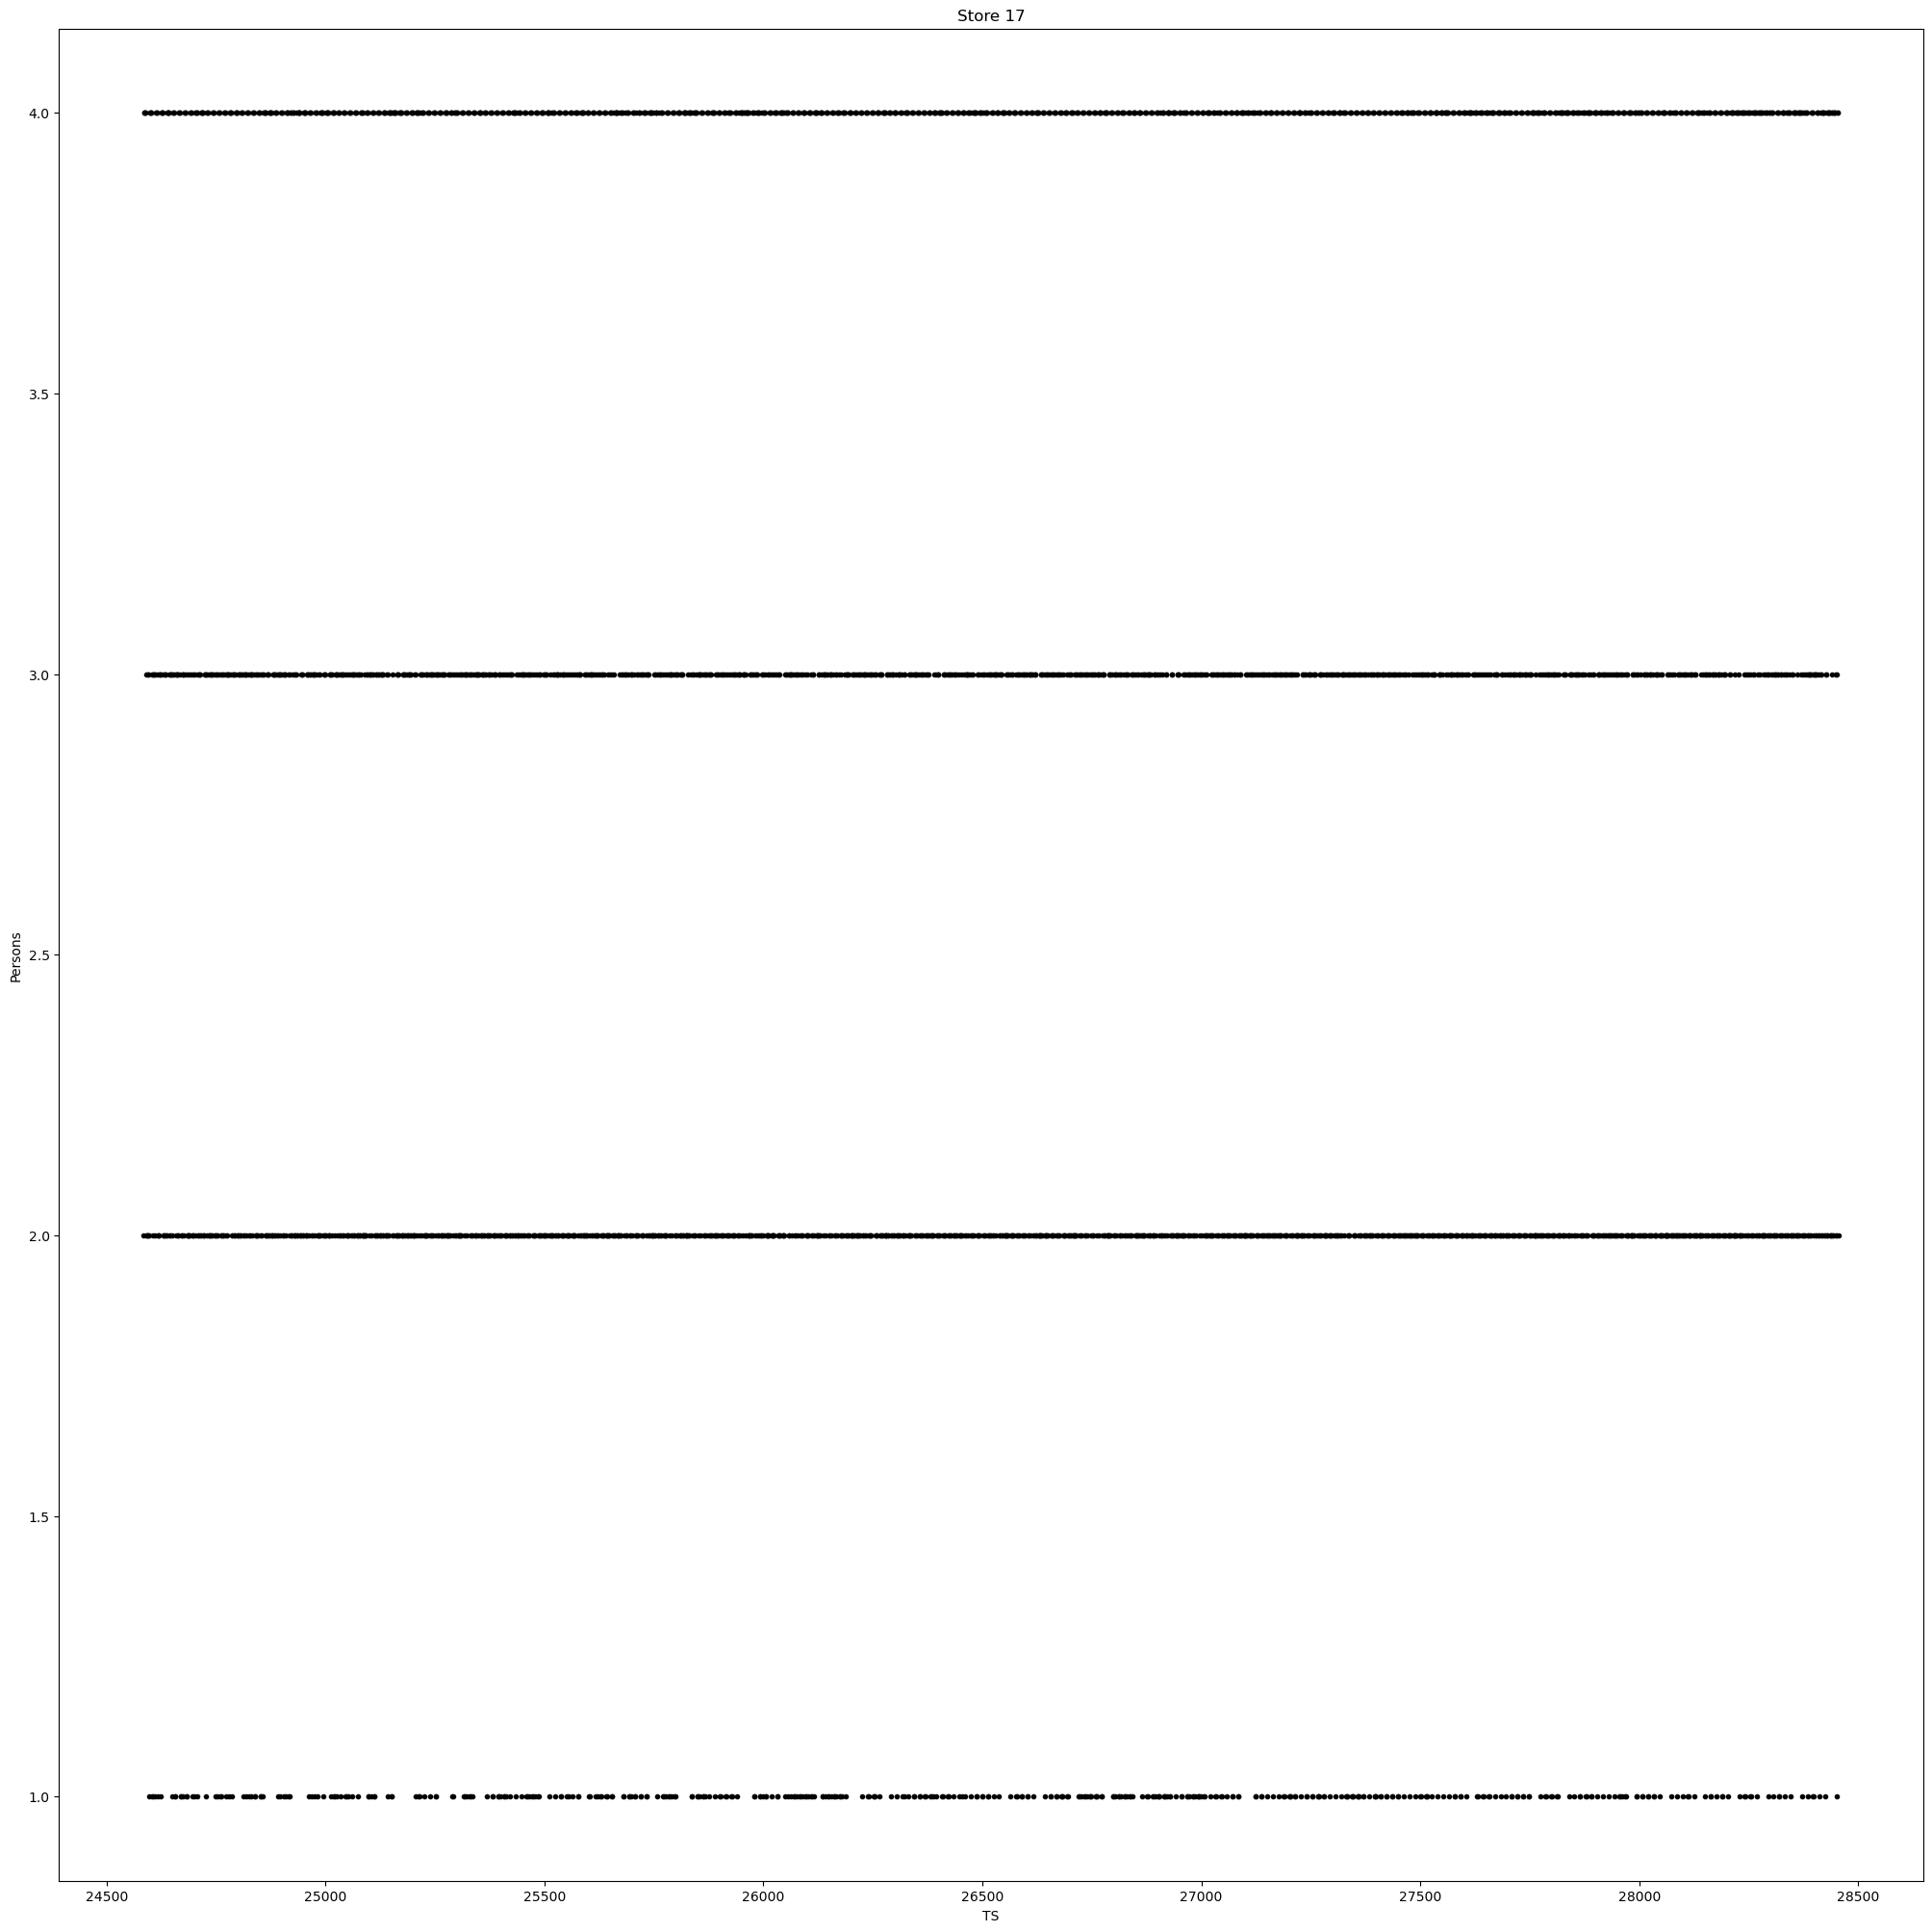

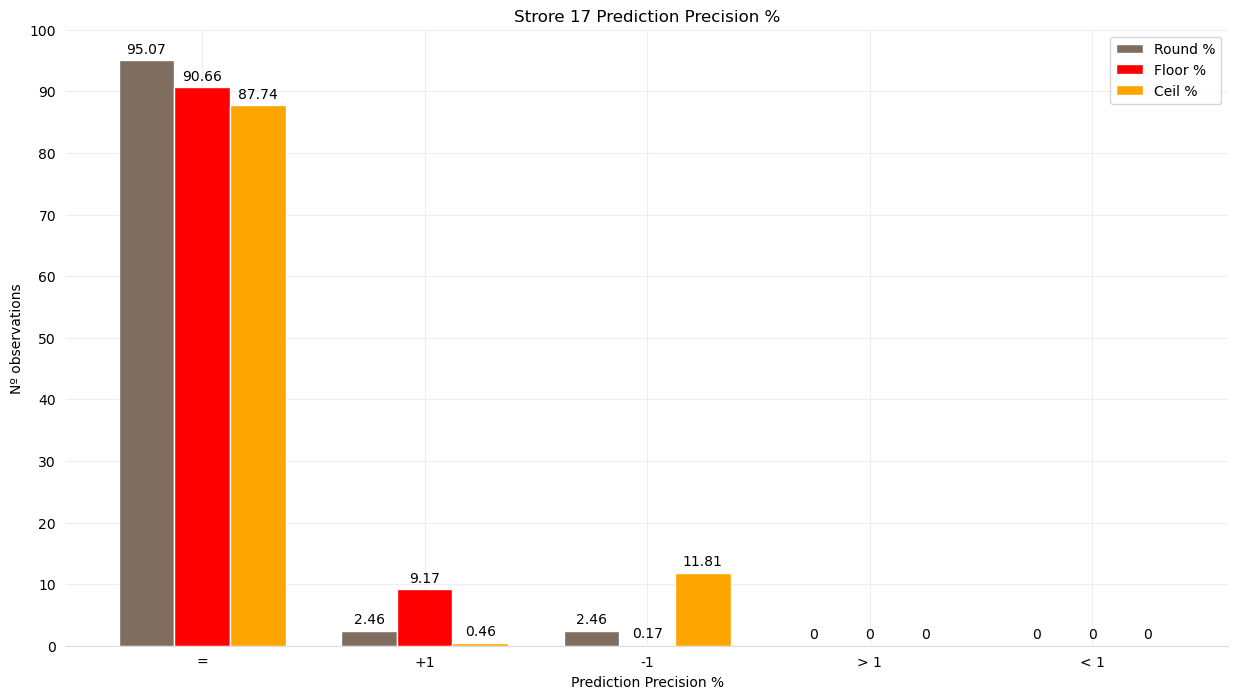

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       1659 |         43 |         43 |          0 |          0  
  Floor                |       1582 |        160 |          3 |          0 |          0  
  Ceil                 |       1531 |          8 |        206 |          0 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      95.07 |       2.46 |       2.46 |        0.0 |        0.0  
  Floor % 

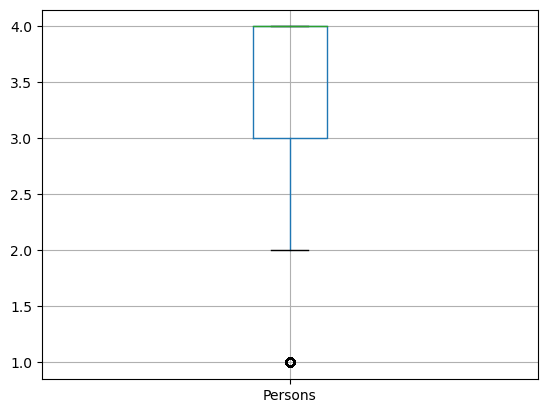

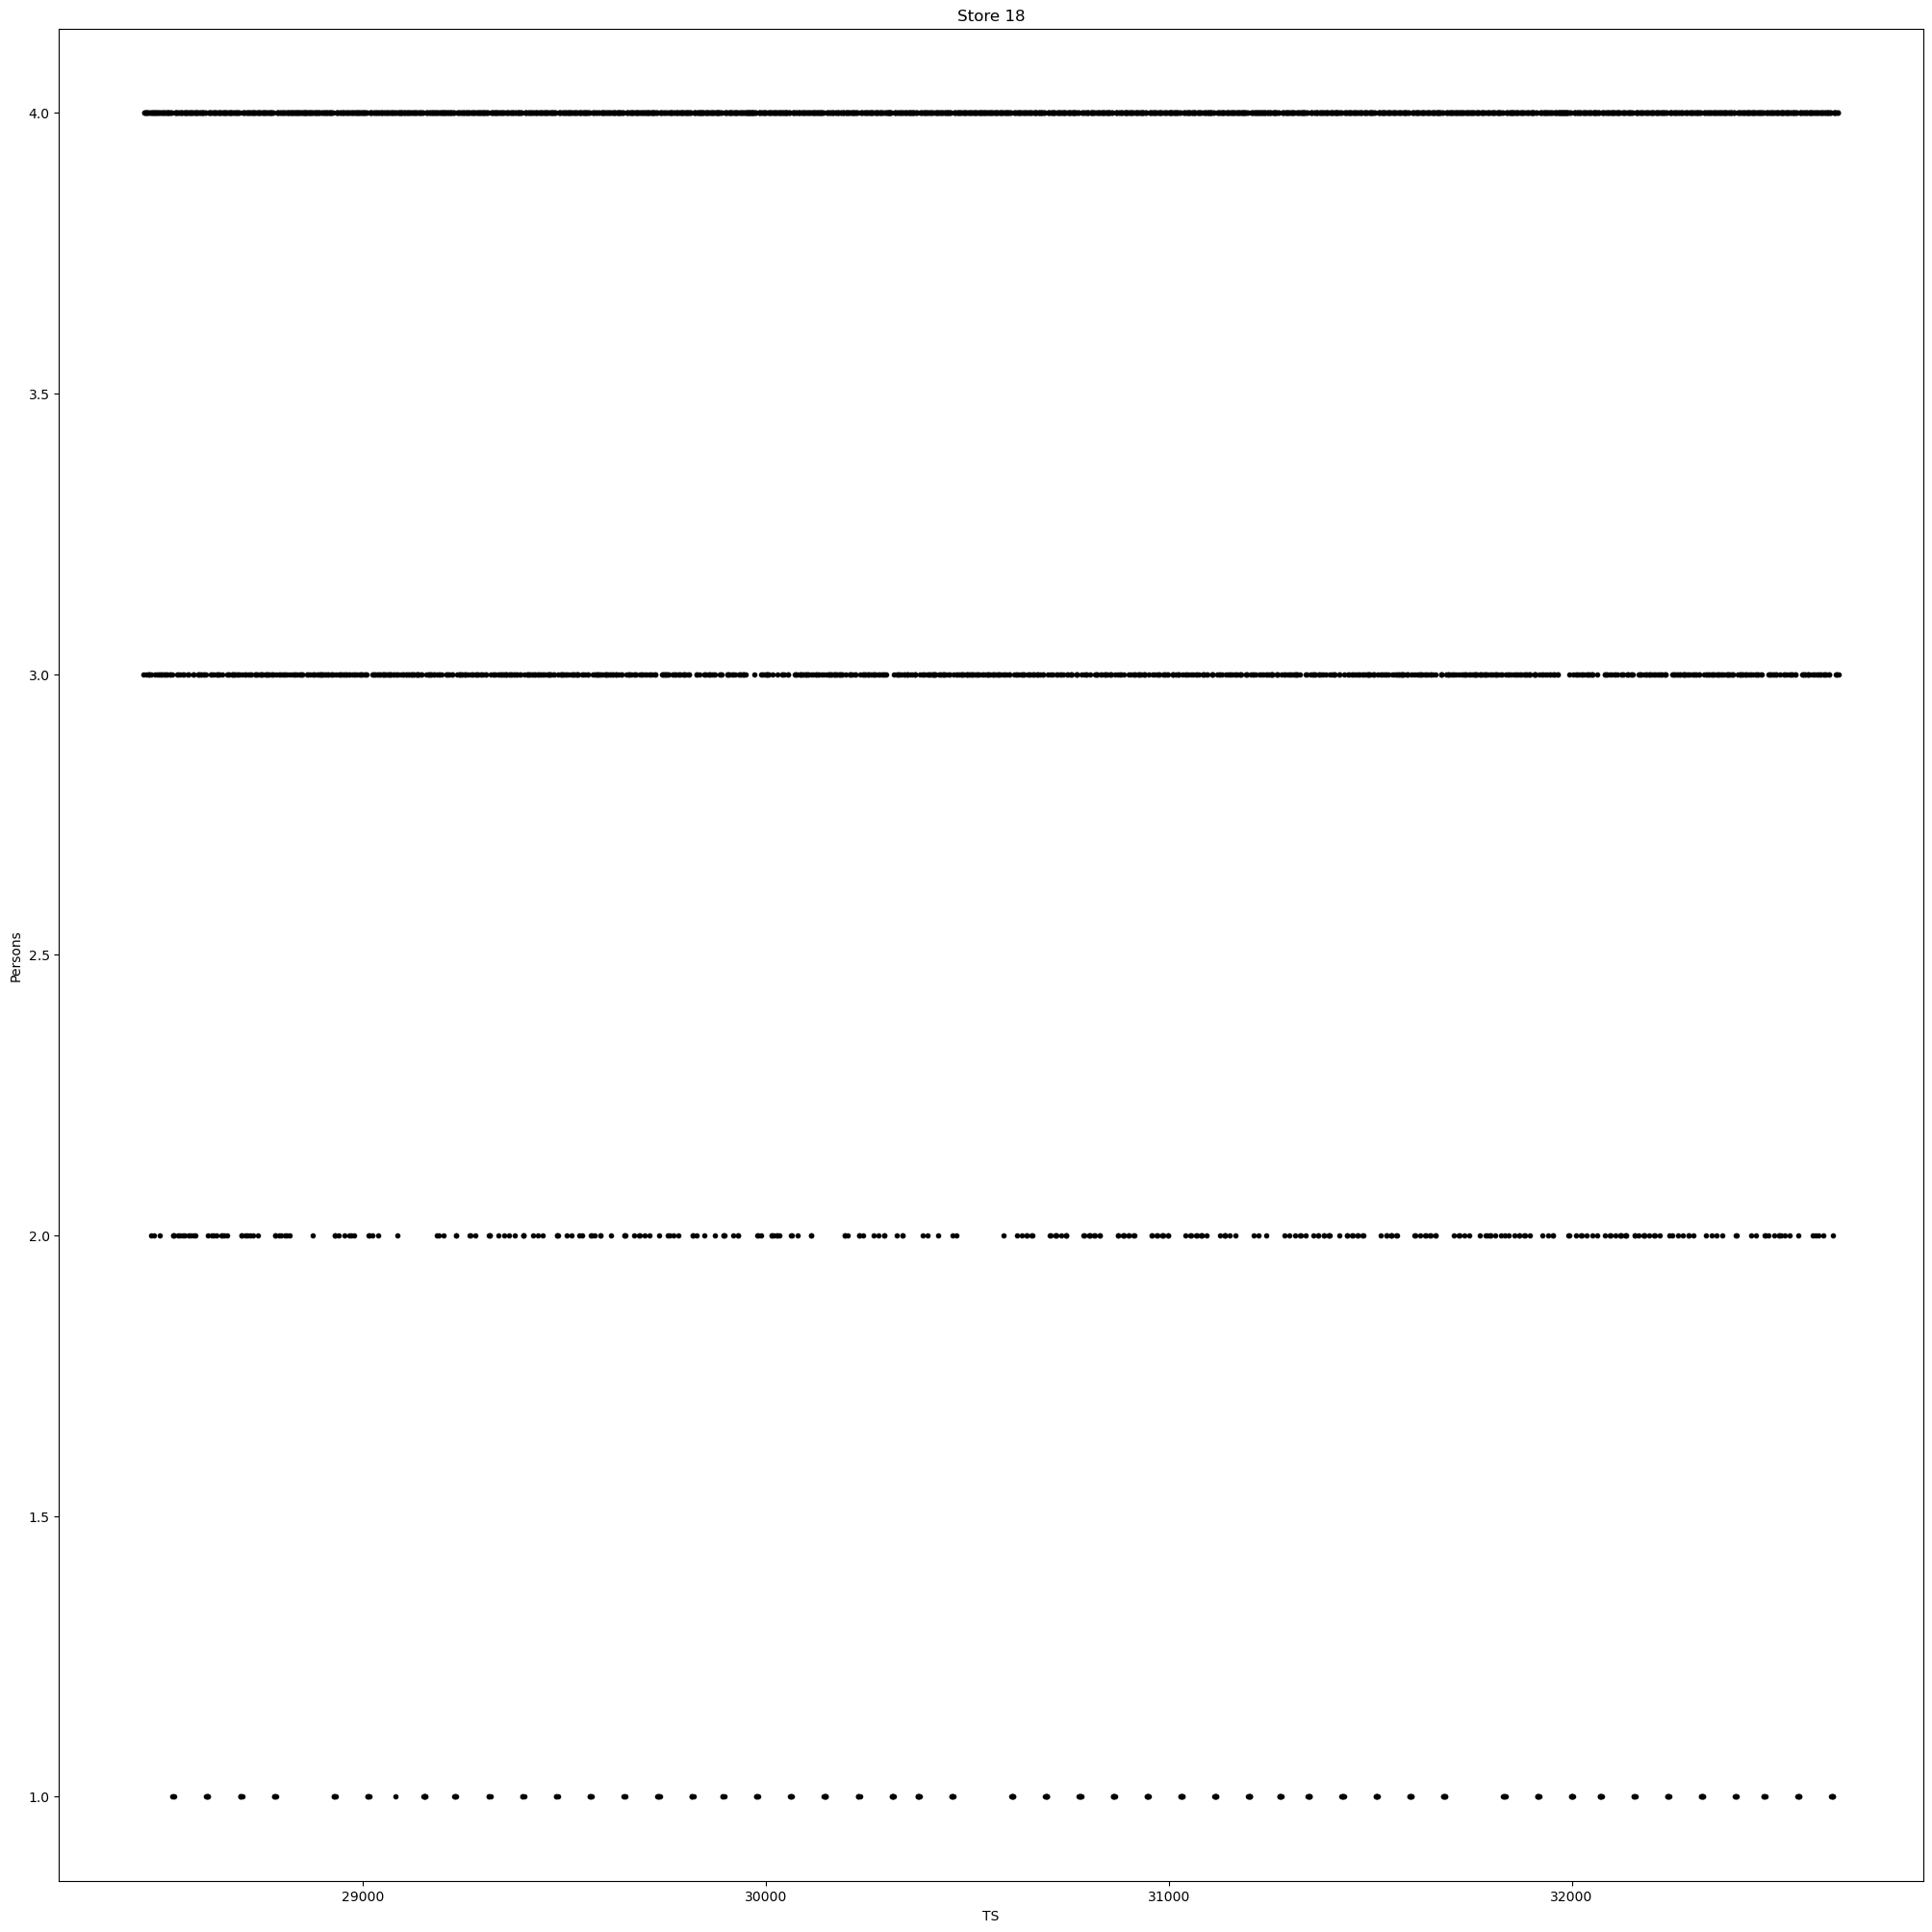

< 1: real: 4  estimated: 2


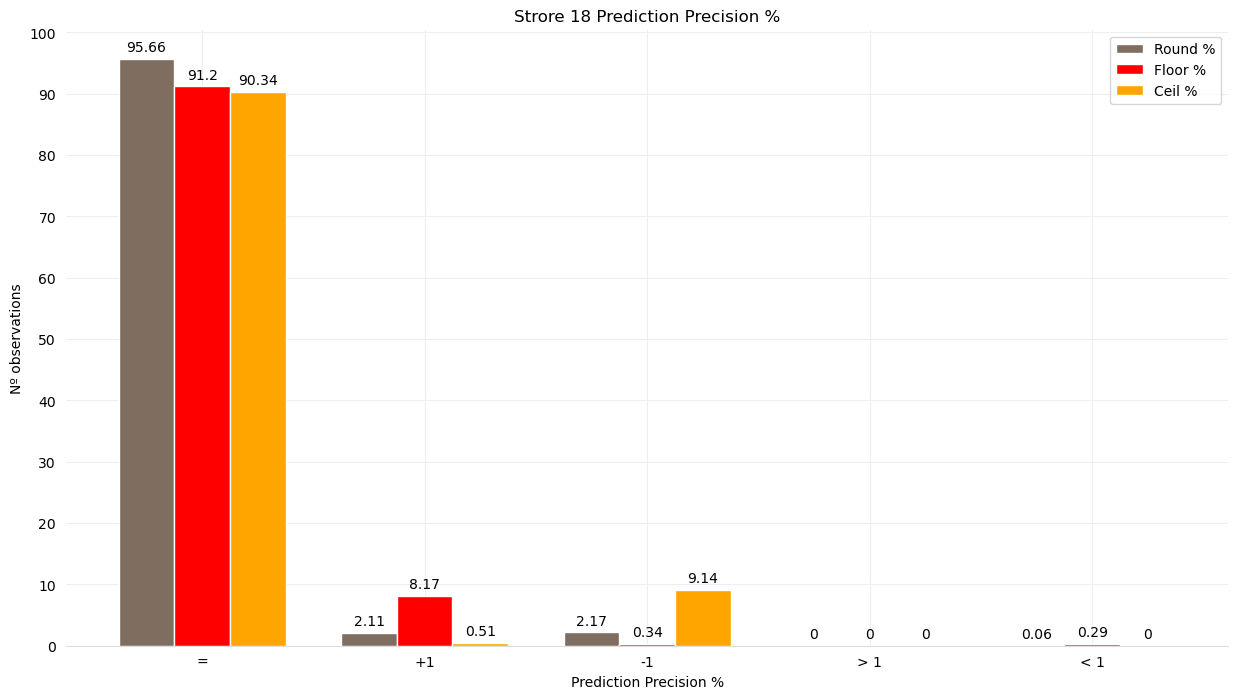

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       1674 |         37 |         38 |          0 |          1  
  Floor                |       1596 |        143 |          6 |          0 |          5  
  Ceil                 |       1581 |          9 |        160 |          0 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      95.66 |       2.11 |       2.17 |        0.0 |       0.06  
  Floor % 

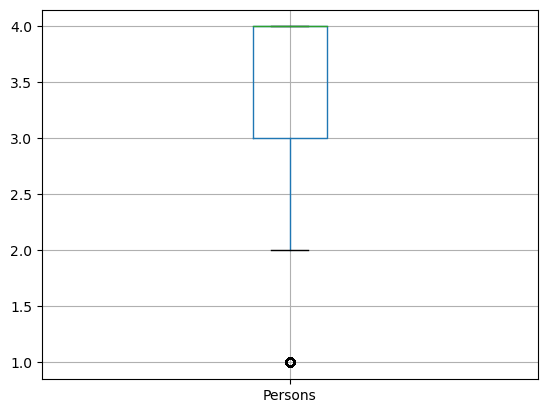

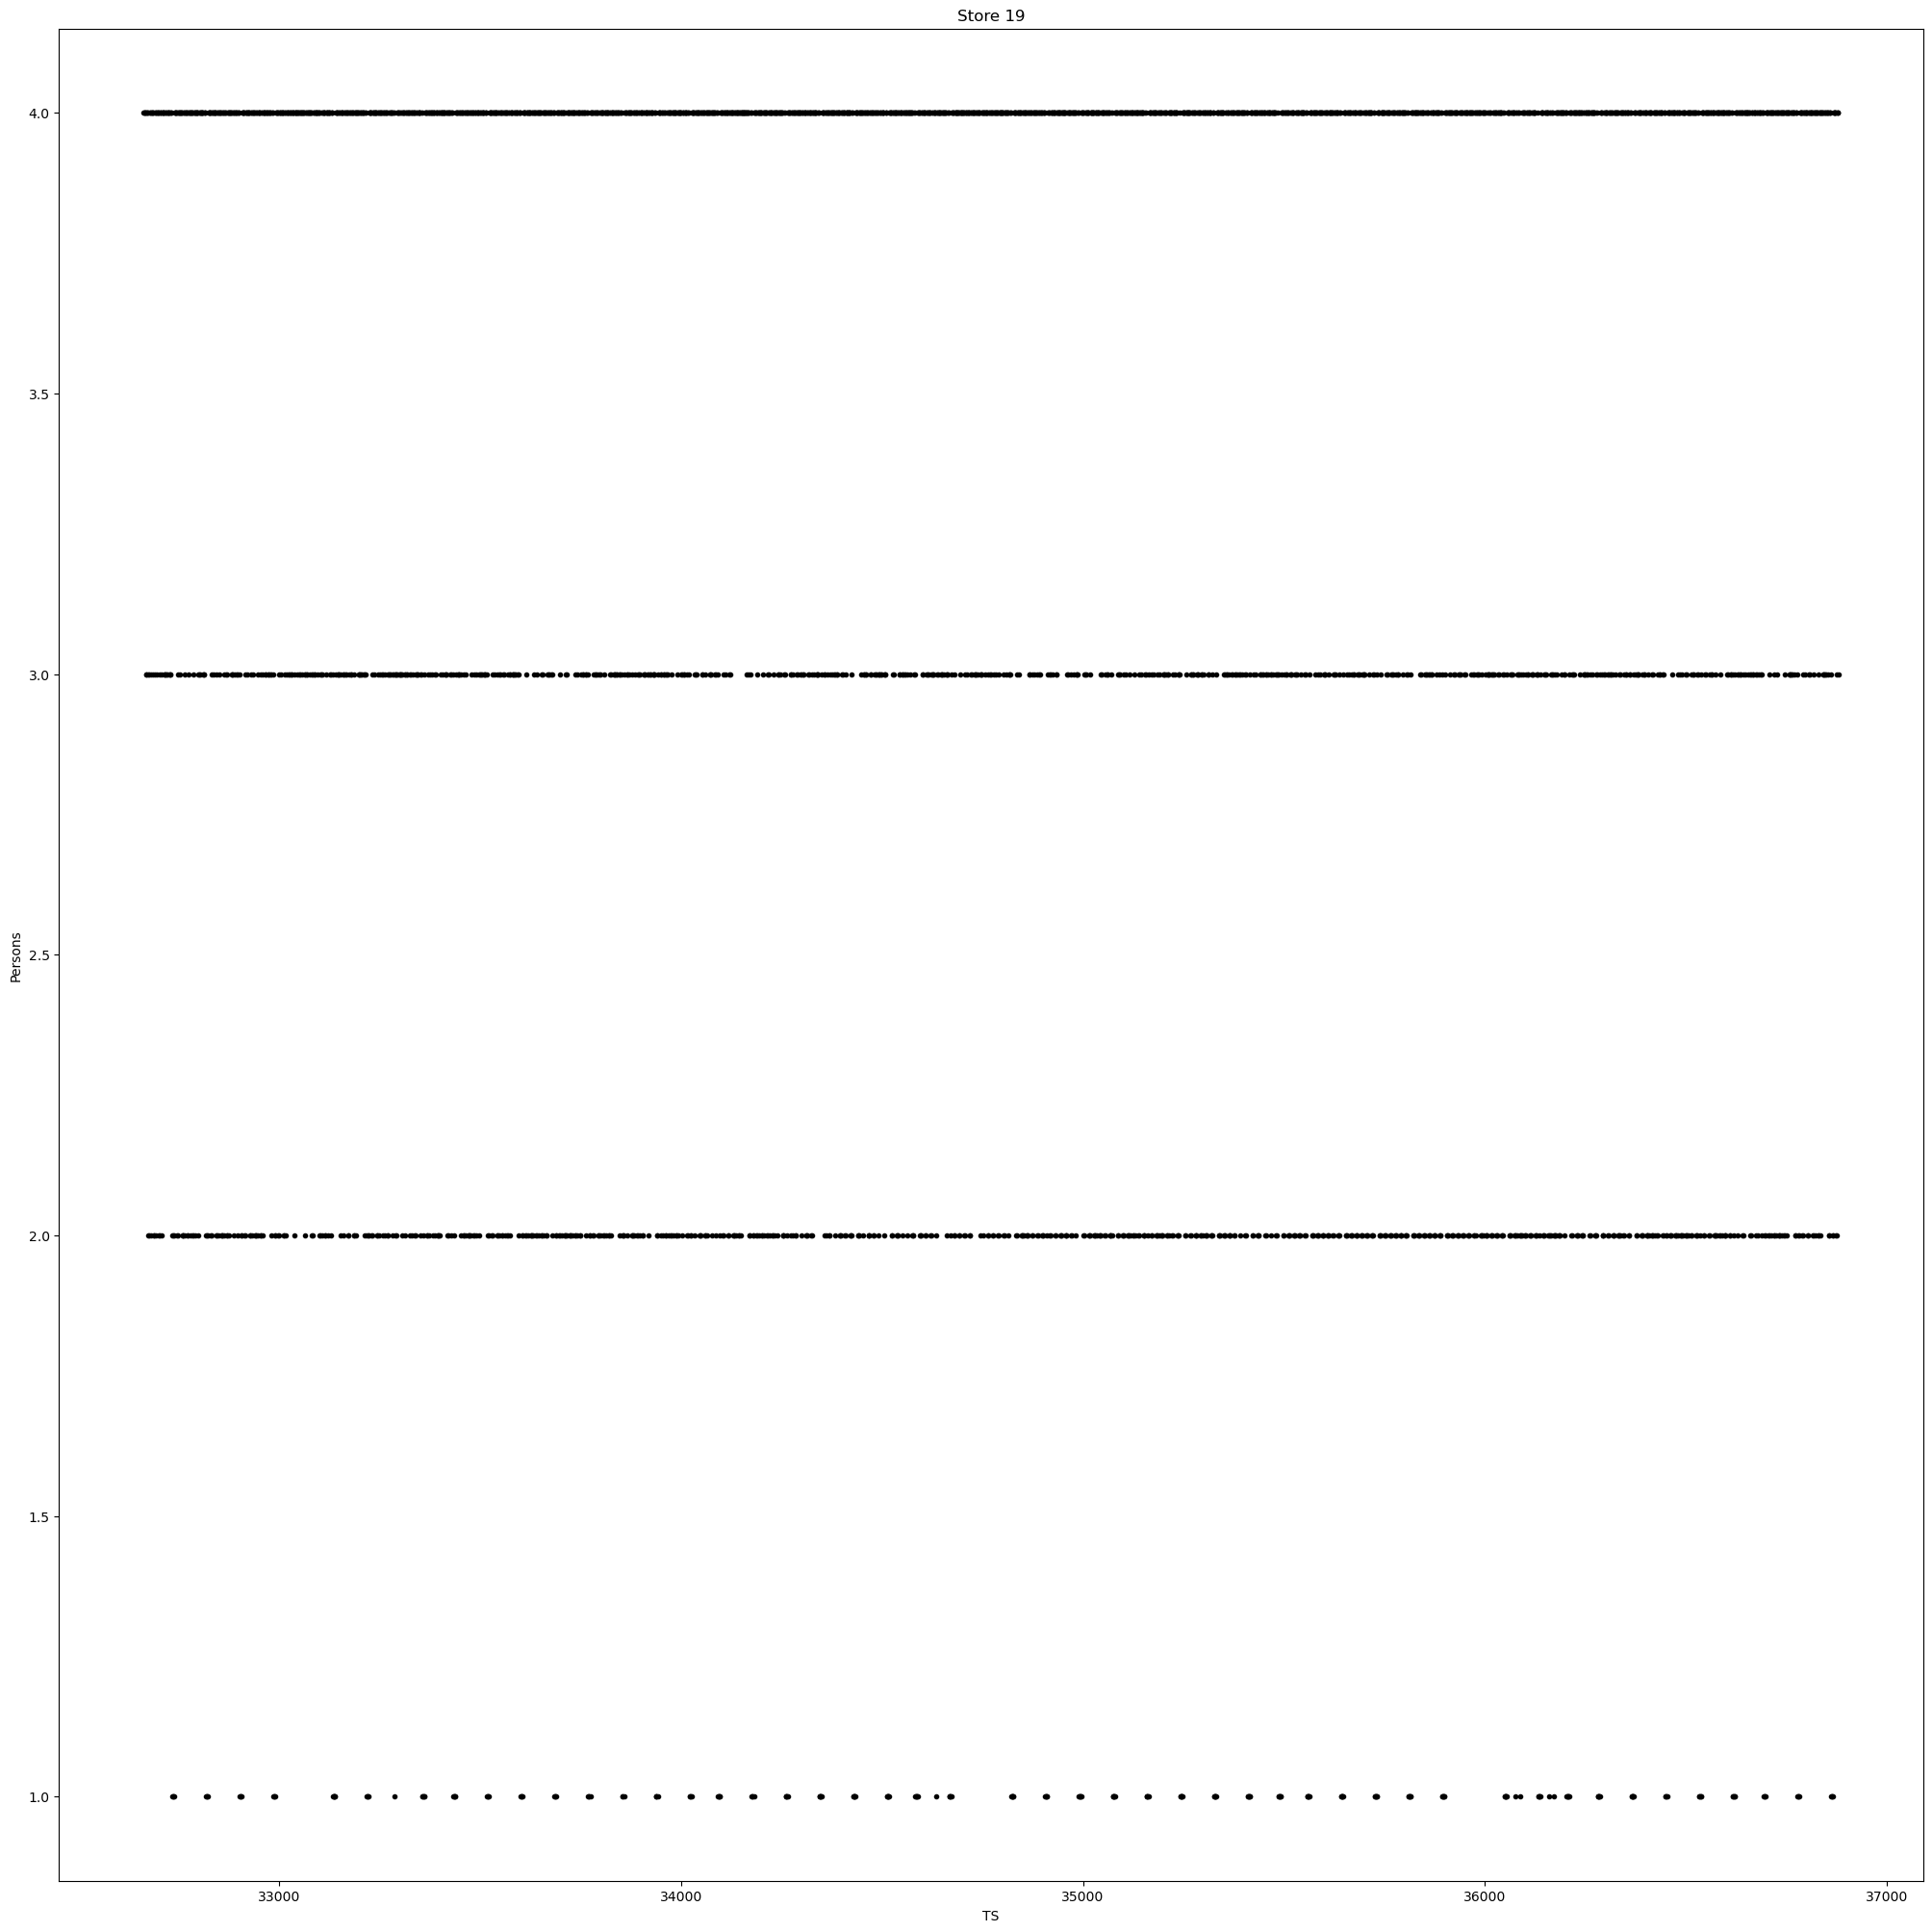

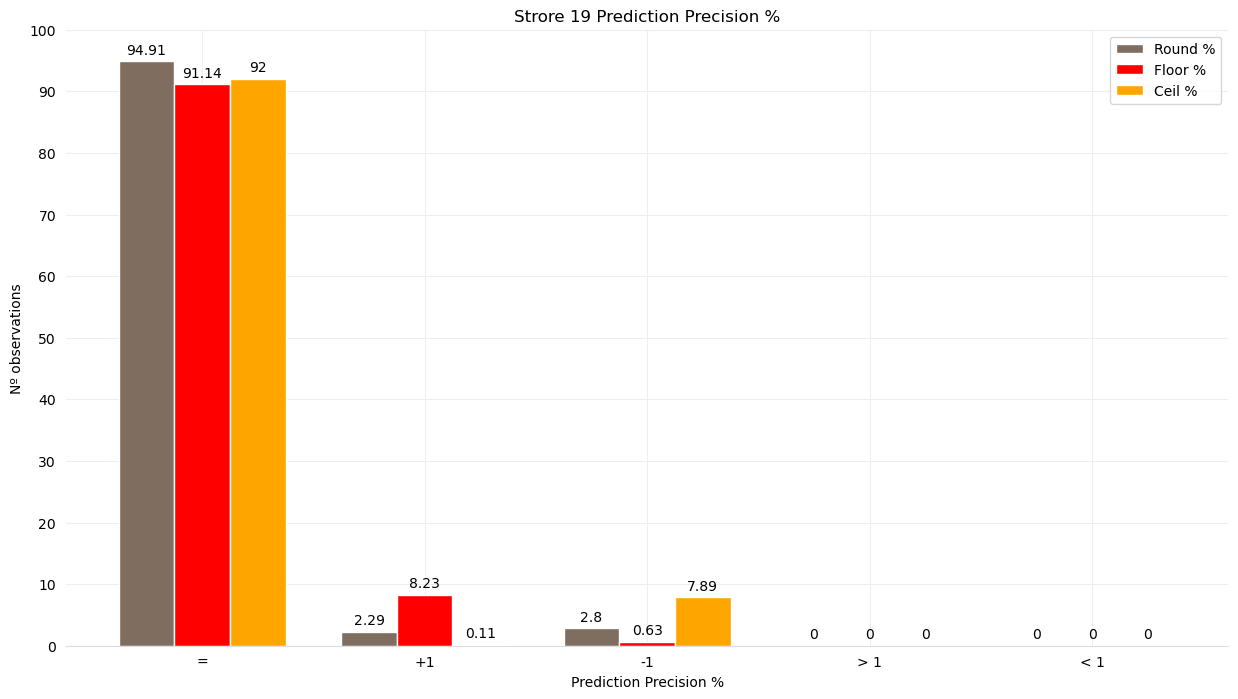

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       1661 |         40 |         49 |          0 |          0  
  Floor                |       1595 |        144 |         11 |          0 |          0  
  Ceil                 |       1610 |          2 |        138 |          0 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      94.91 |       2.29 |        2.8 |        0.0 |        0.0  
  Floor % 

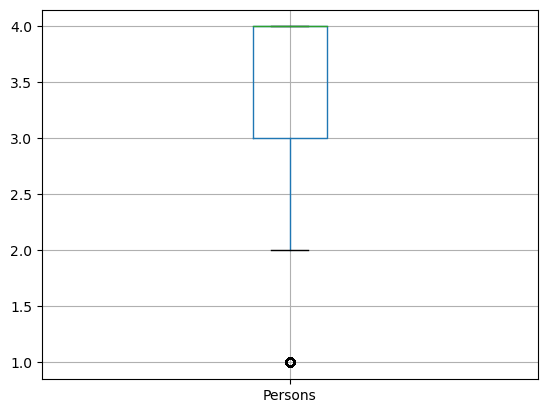

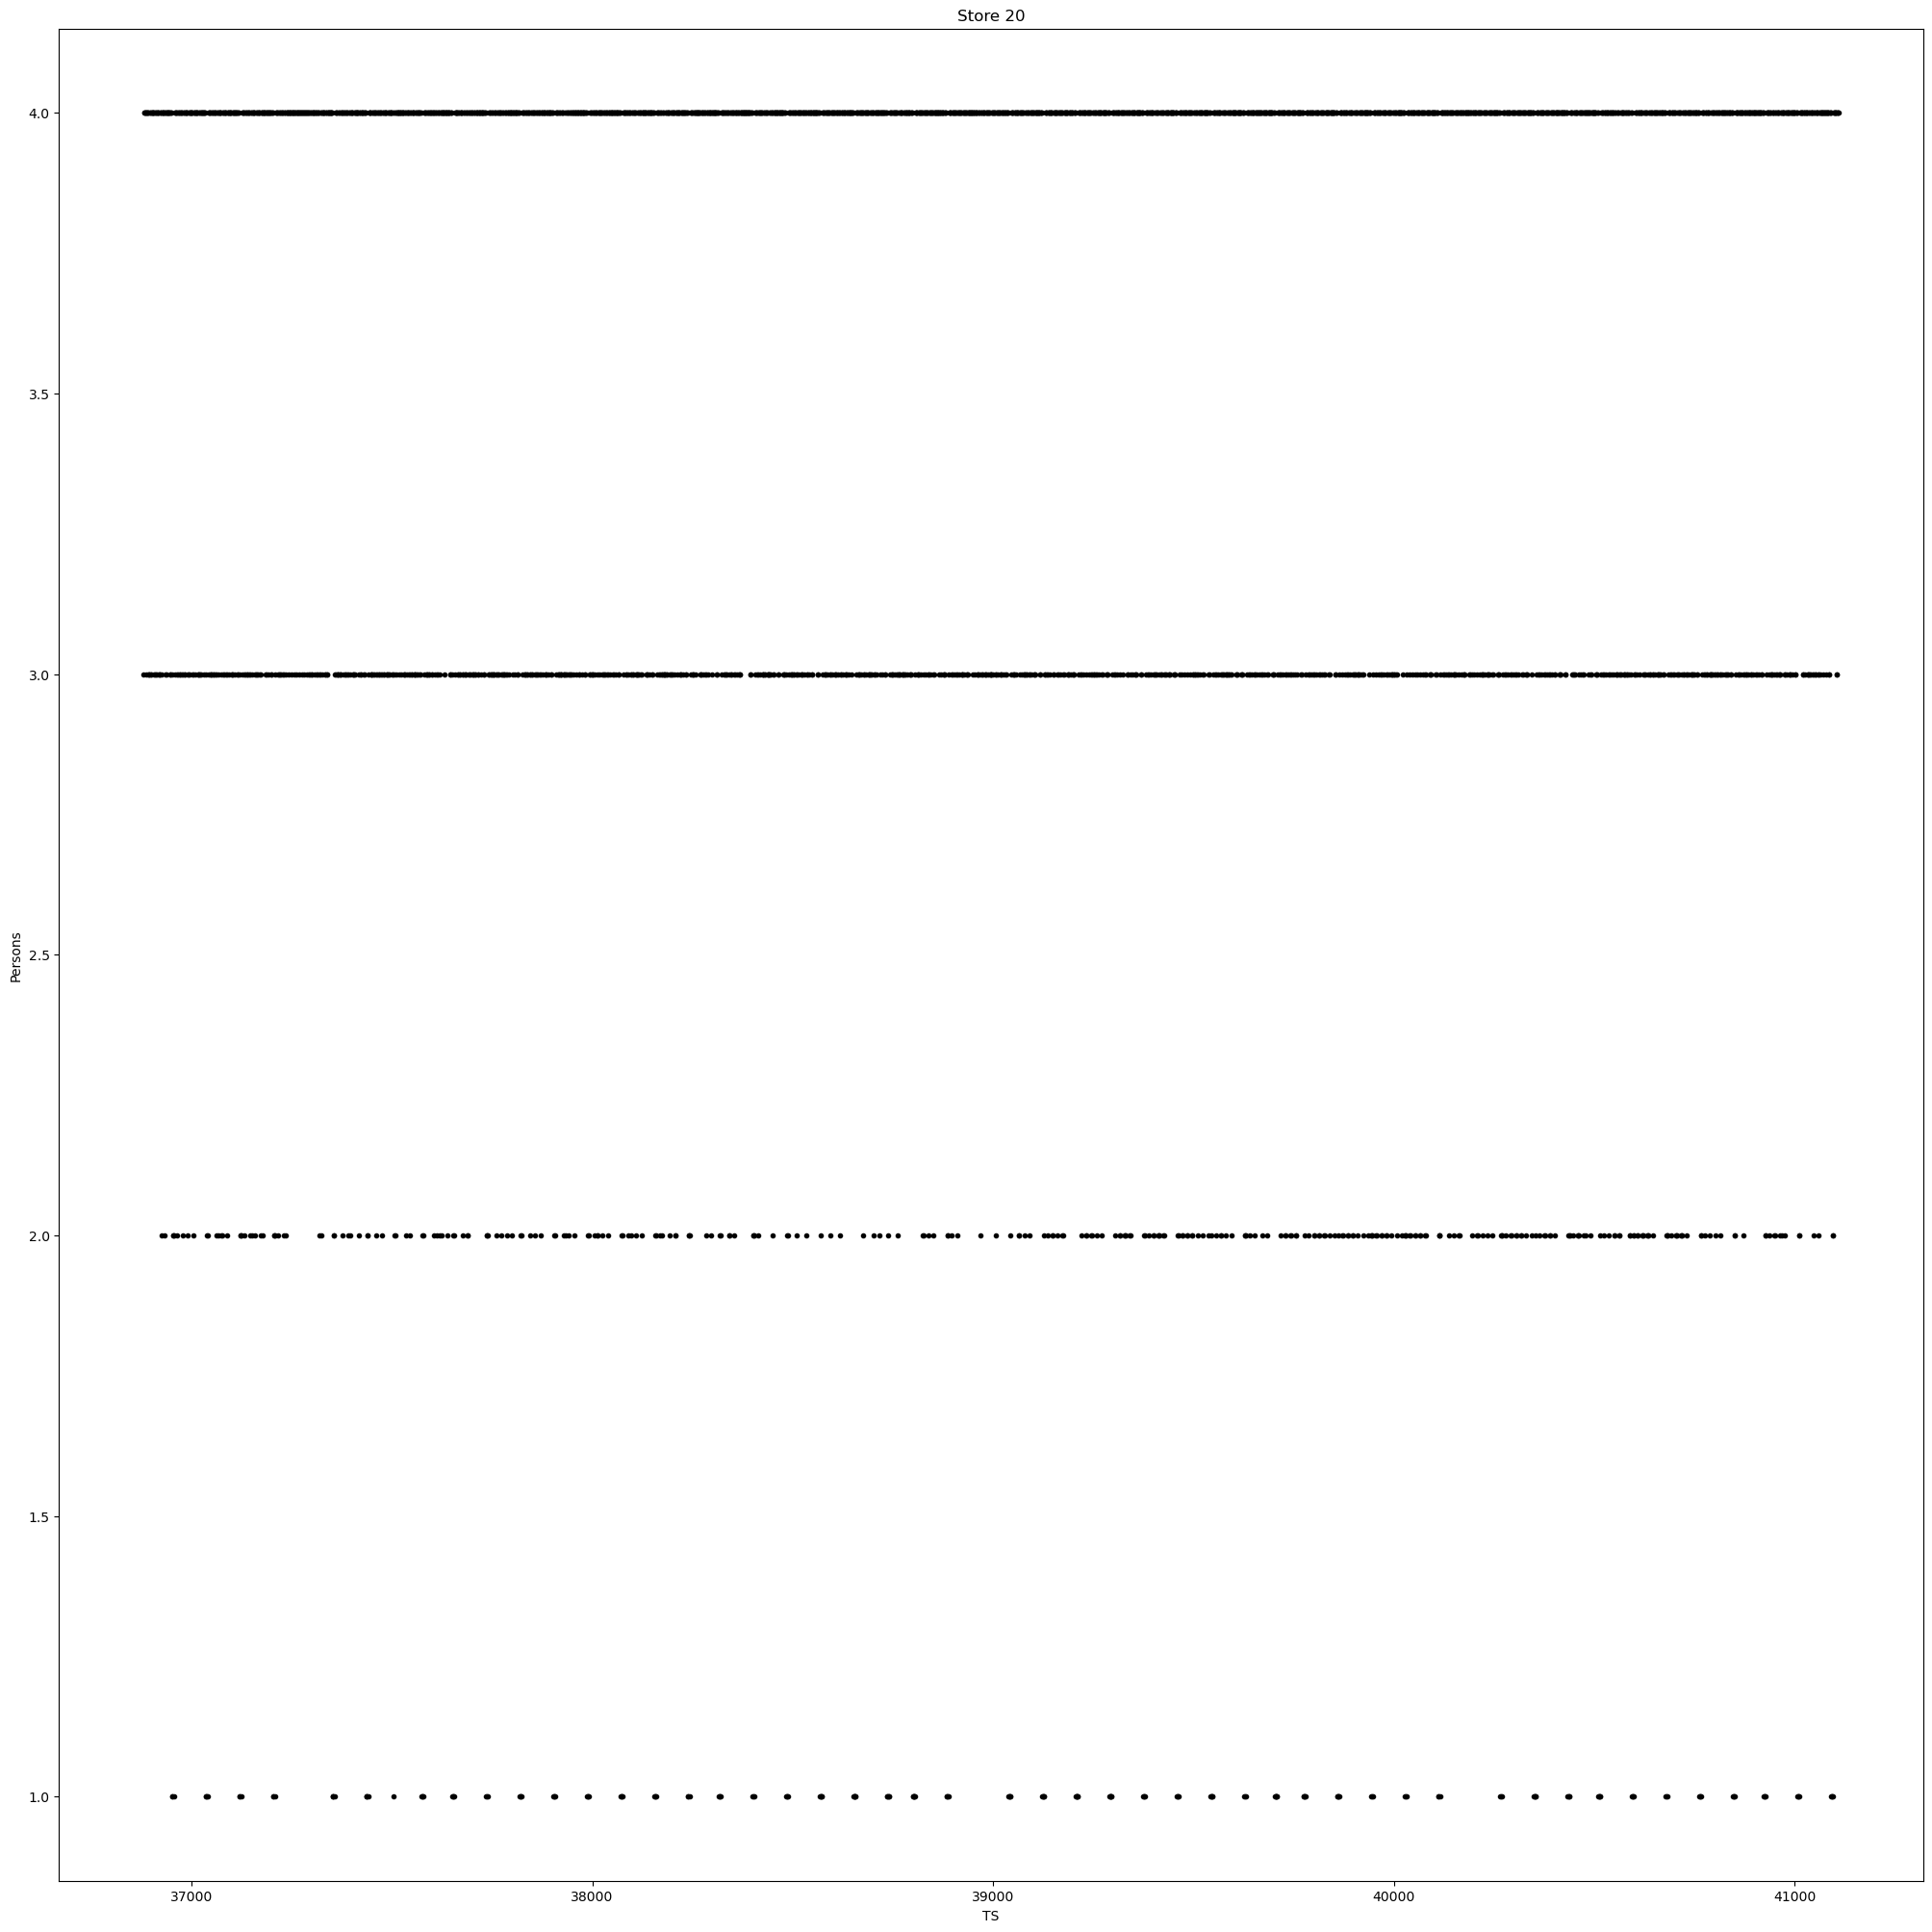

> 1: real: 2  estimated: 4


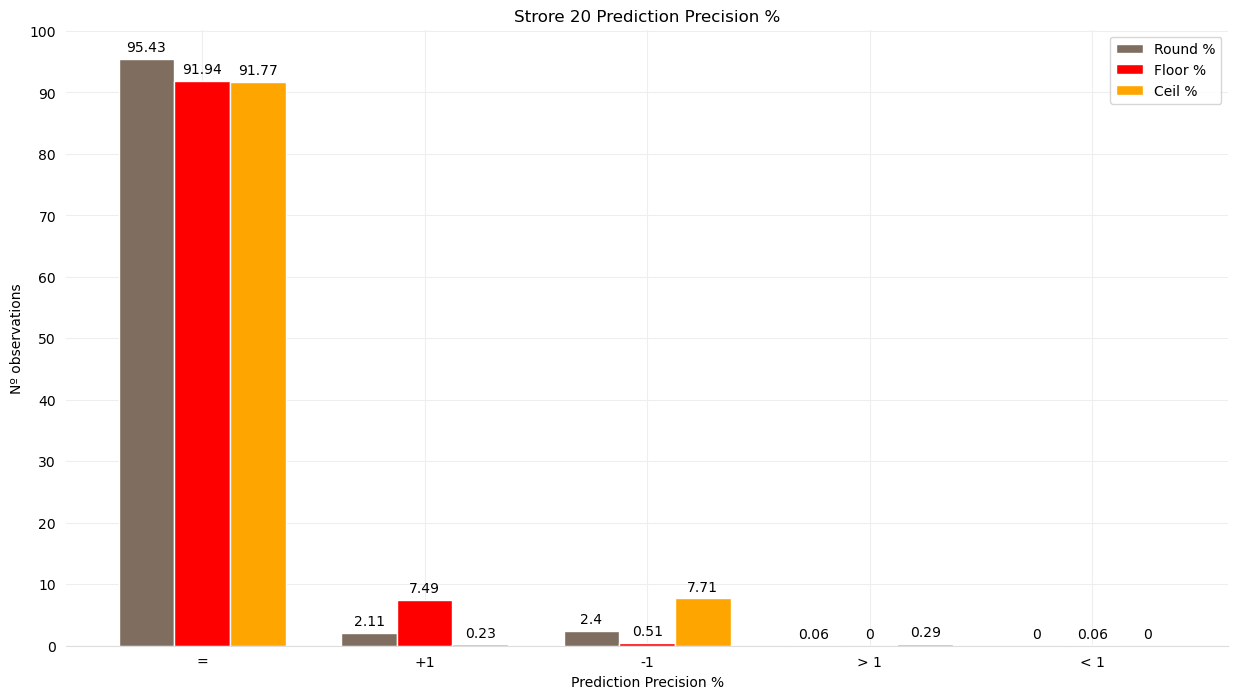

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       1670 |         37 |         42 |          1 |          0  
  Floor                |       1609 |        131 |          9 |          0 |          1  
  Ceil                 |       1606 |          4 |        135 |          5 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      95.43 |       2.11 |        2.4 |       0.06 |        0.0  
  Floor % 

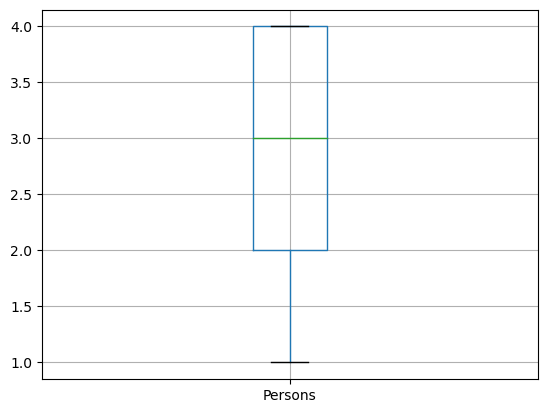

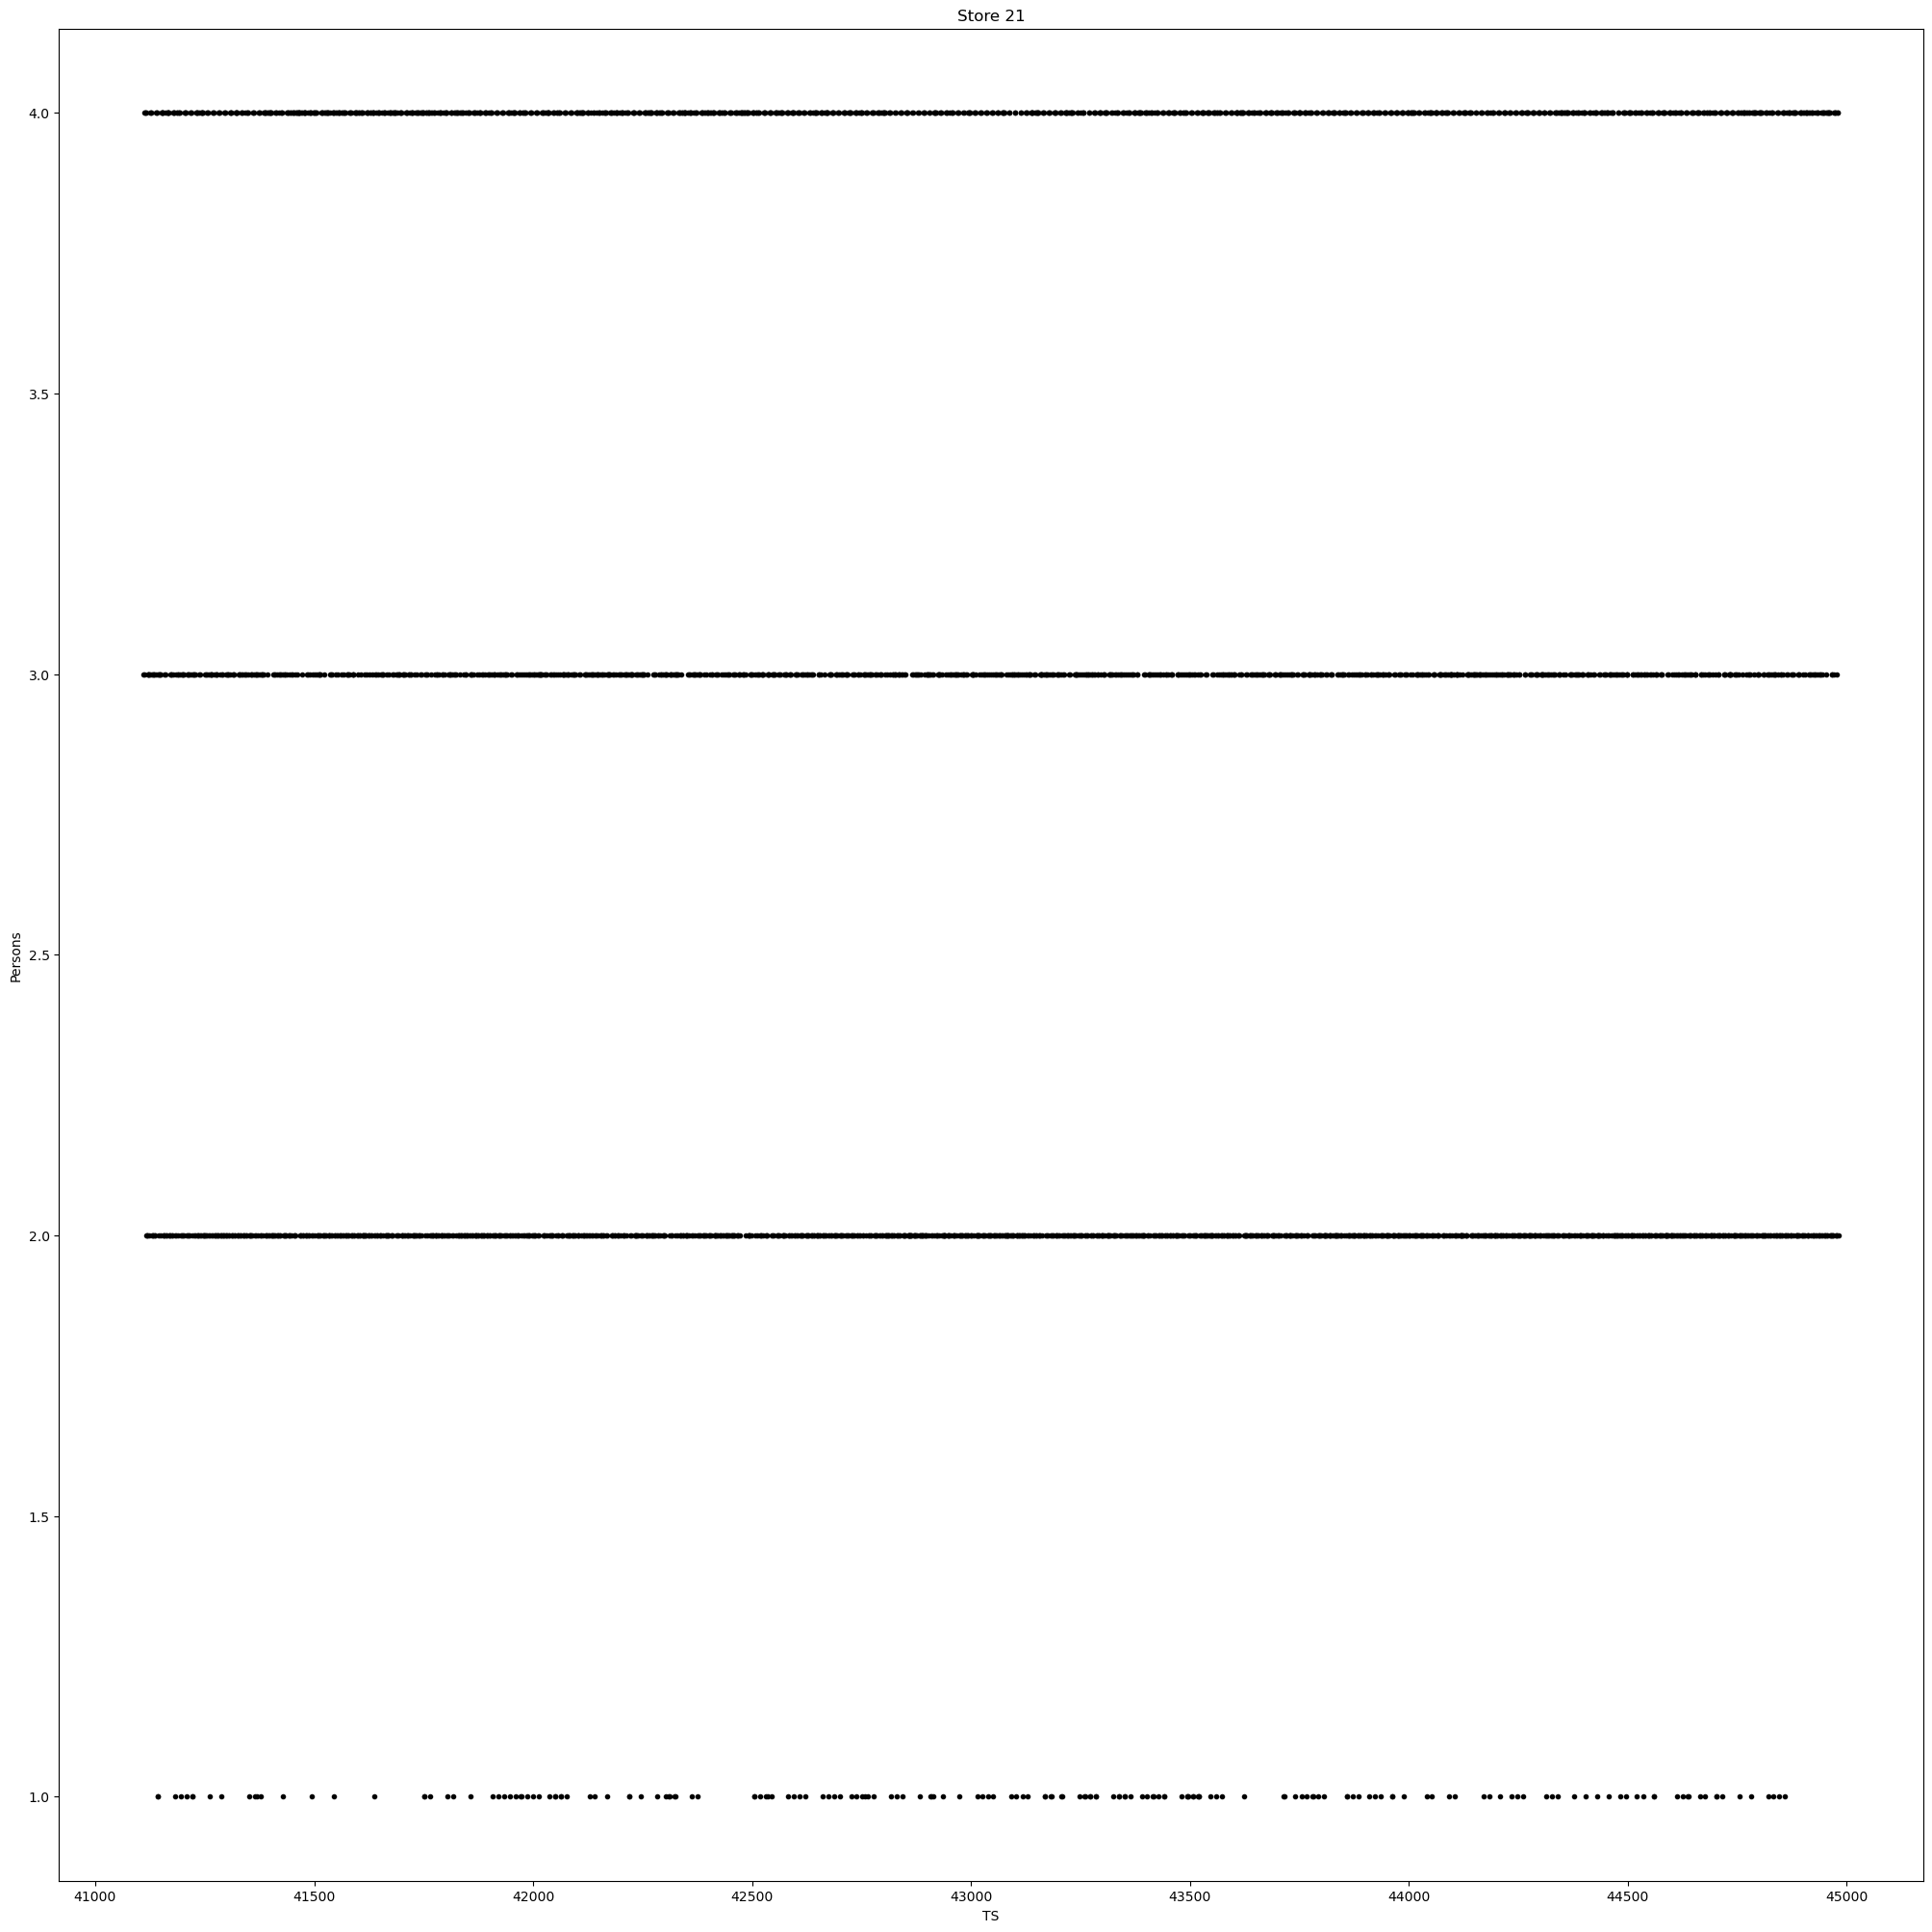

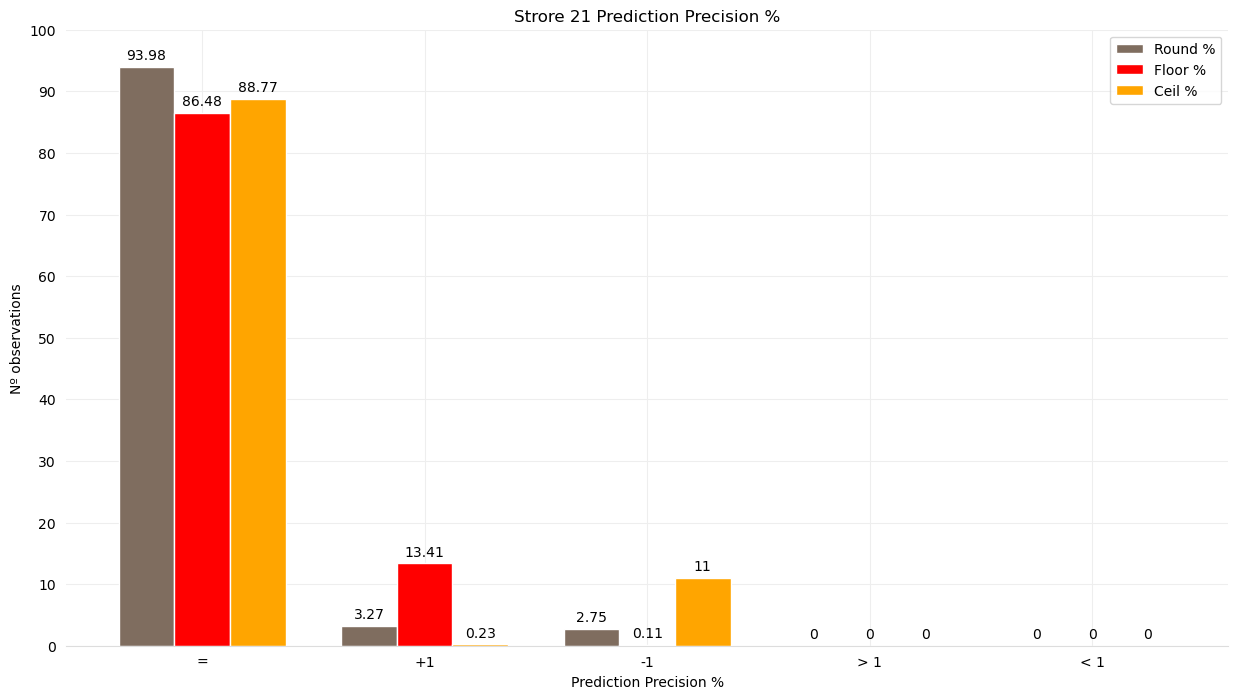

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       1640 |         57 |         48 |          0 |          0  
  Floor                |       1509 |        234 |          2 |          0 |          0  
  Ceil                 |       1549 |          4 |        192 |          0 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      93.98 |       3.27 |       2.75 |        0.0 |        0.0  
  Floor % 

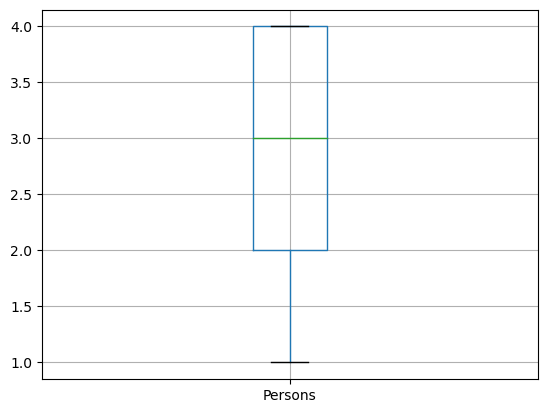

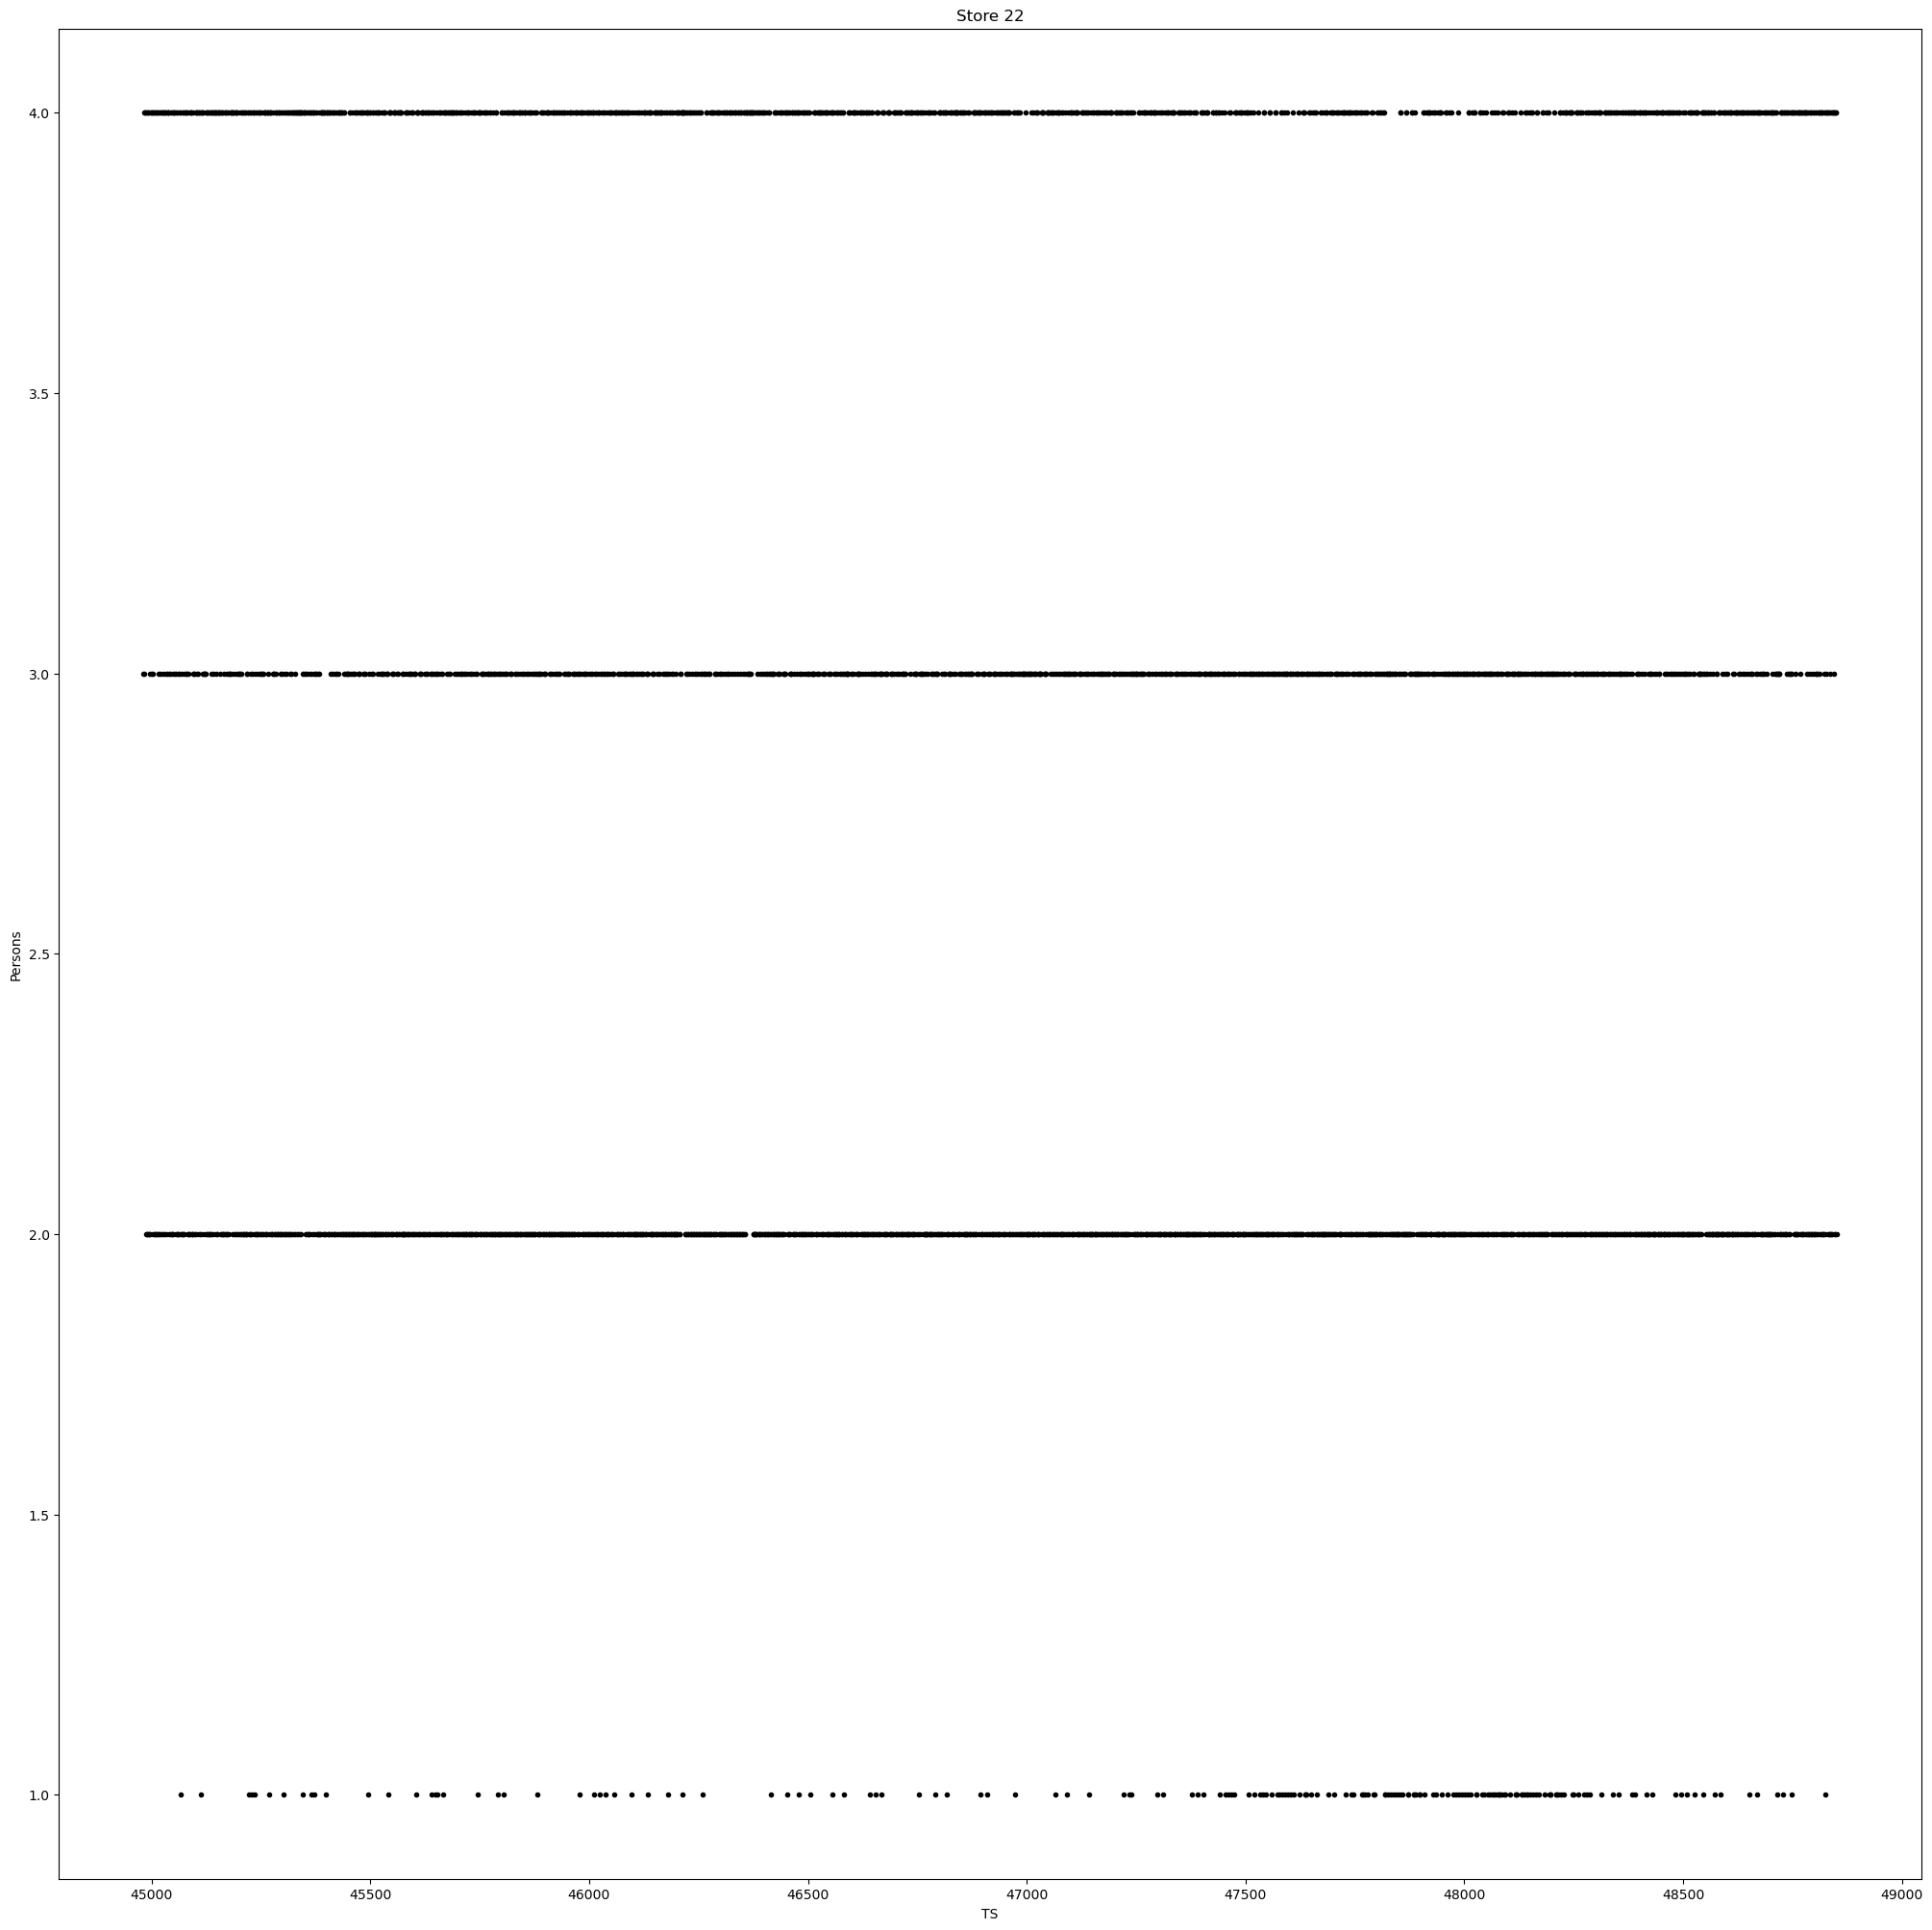

< 1: real: 4  estimated: 2
< 1: real: 4  estimated: 2
< 1: real: 4  estimated: 2
< 1: real: 4  estimated: 2


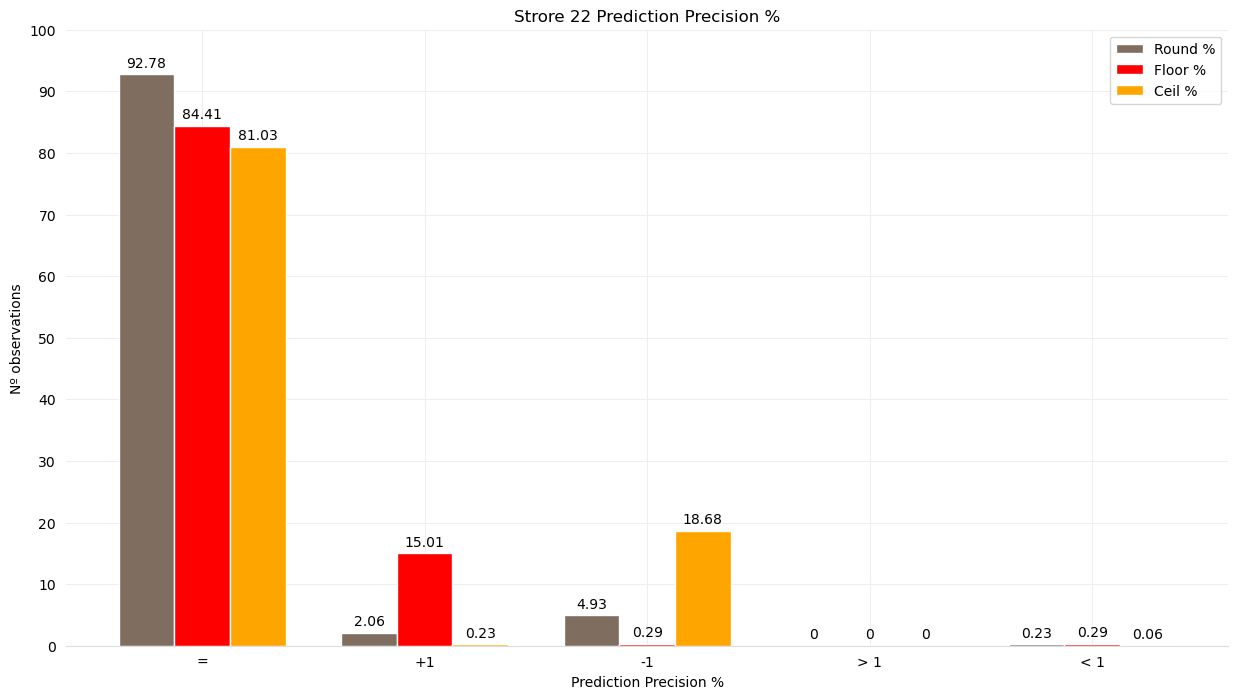

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       1619 |         36 |         86 |          0 |          4  
  Floor                |       1473 |        262 |          5 |          0 |          5  
  Ceil                 |       1414 |          4 |        326 |          0 |          1  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      92.78 |       2.06 |       4.93 |        0.0 |       0.23  
  Floor % 

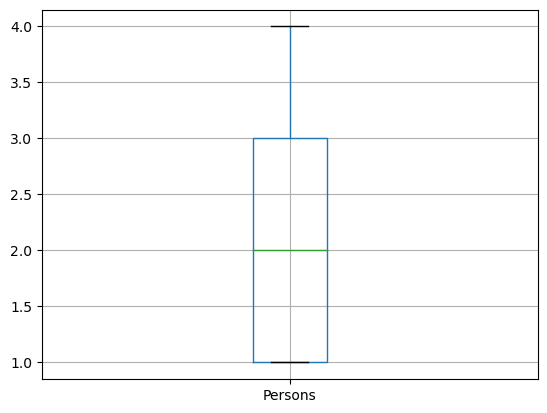

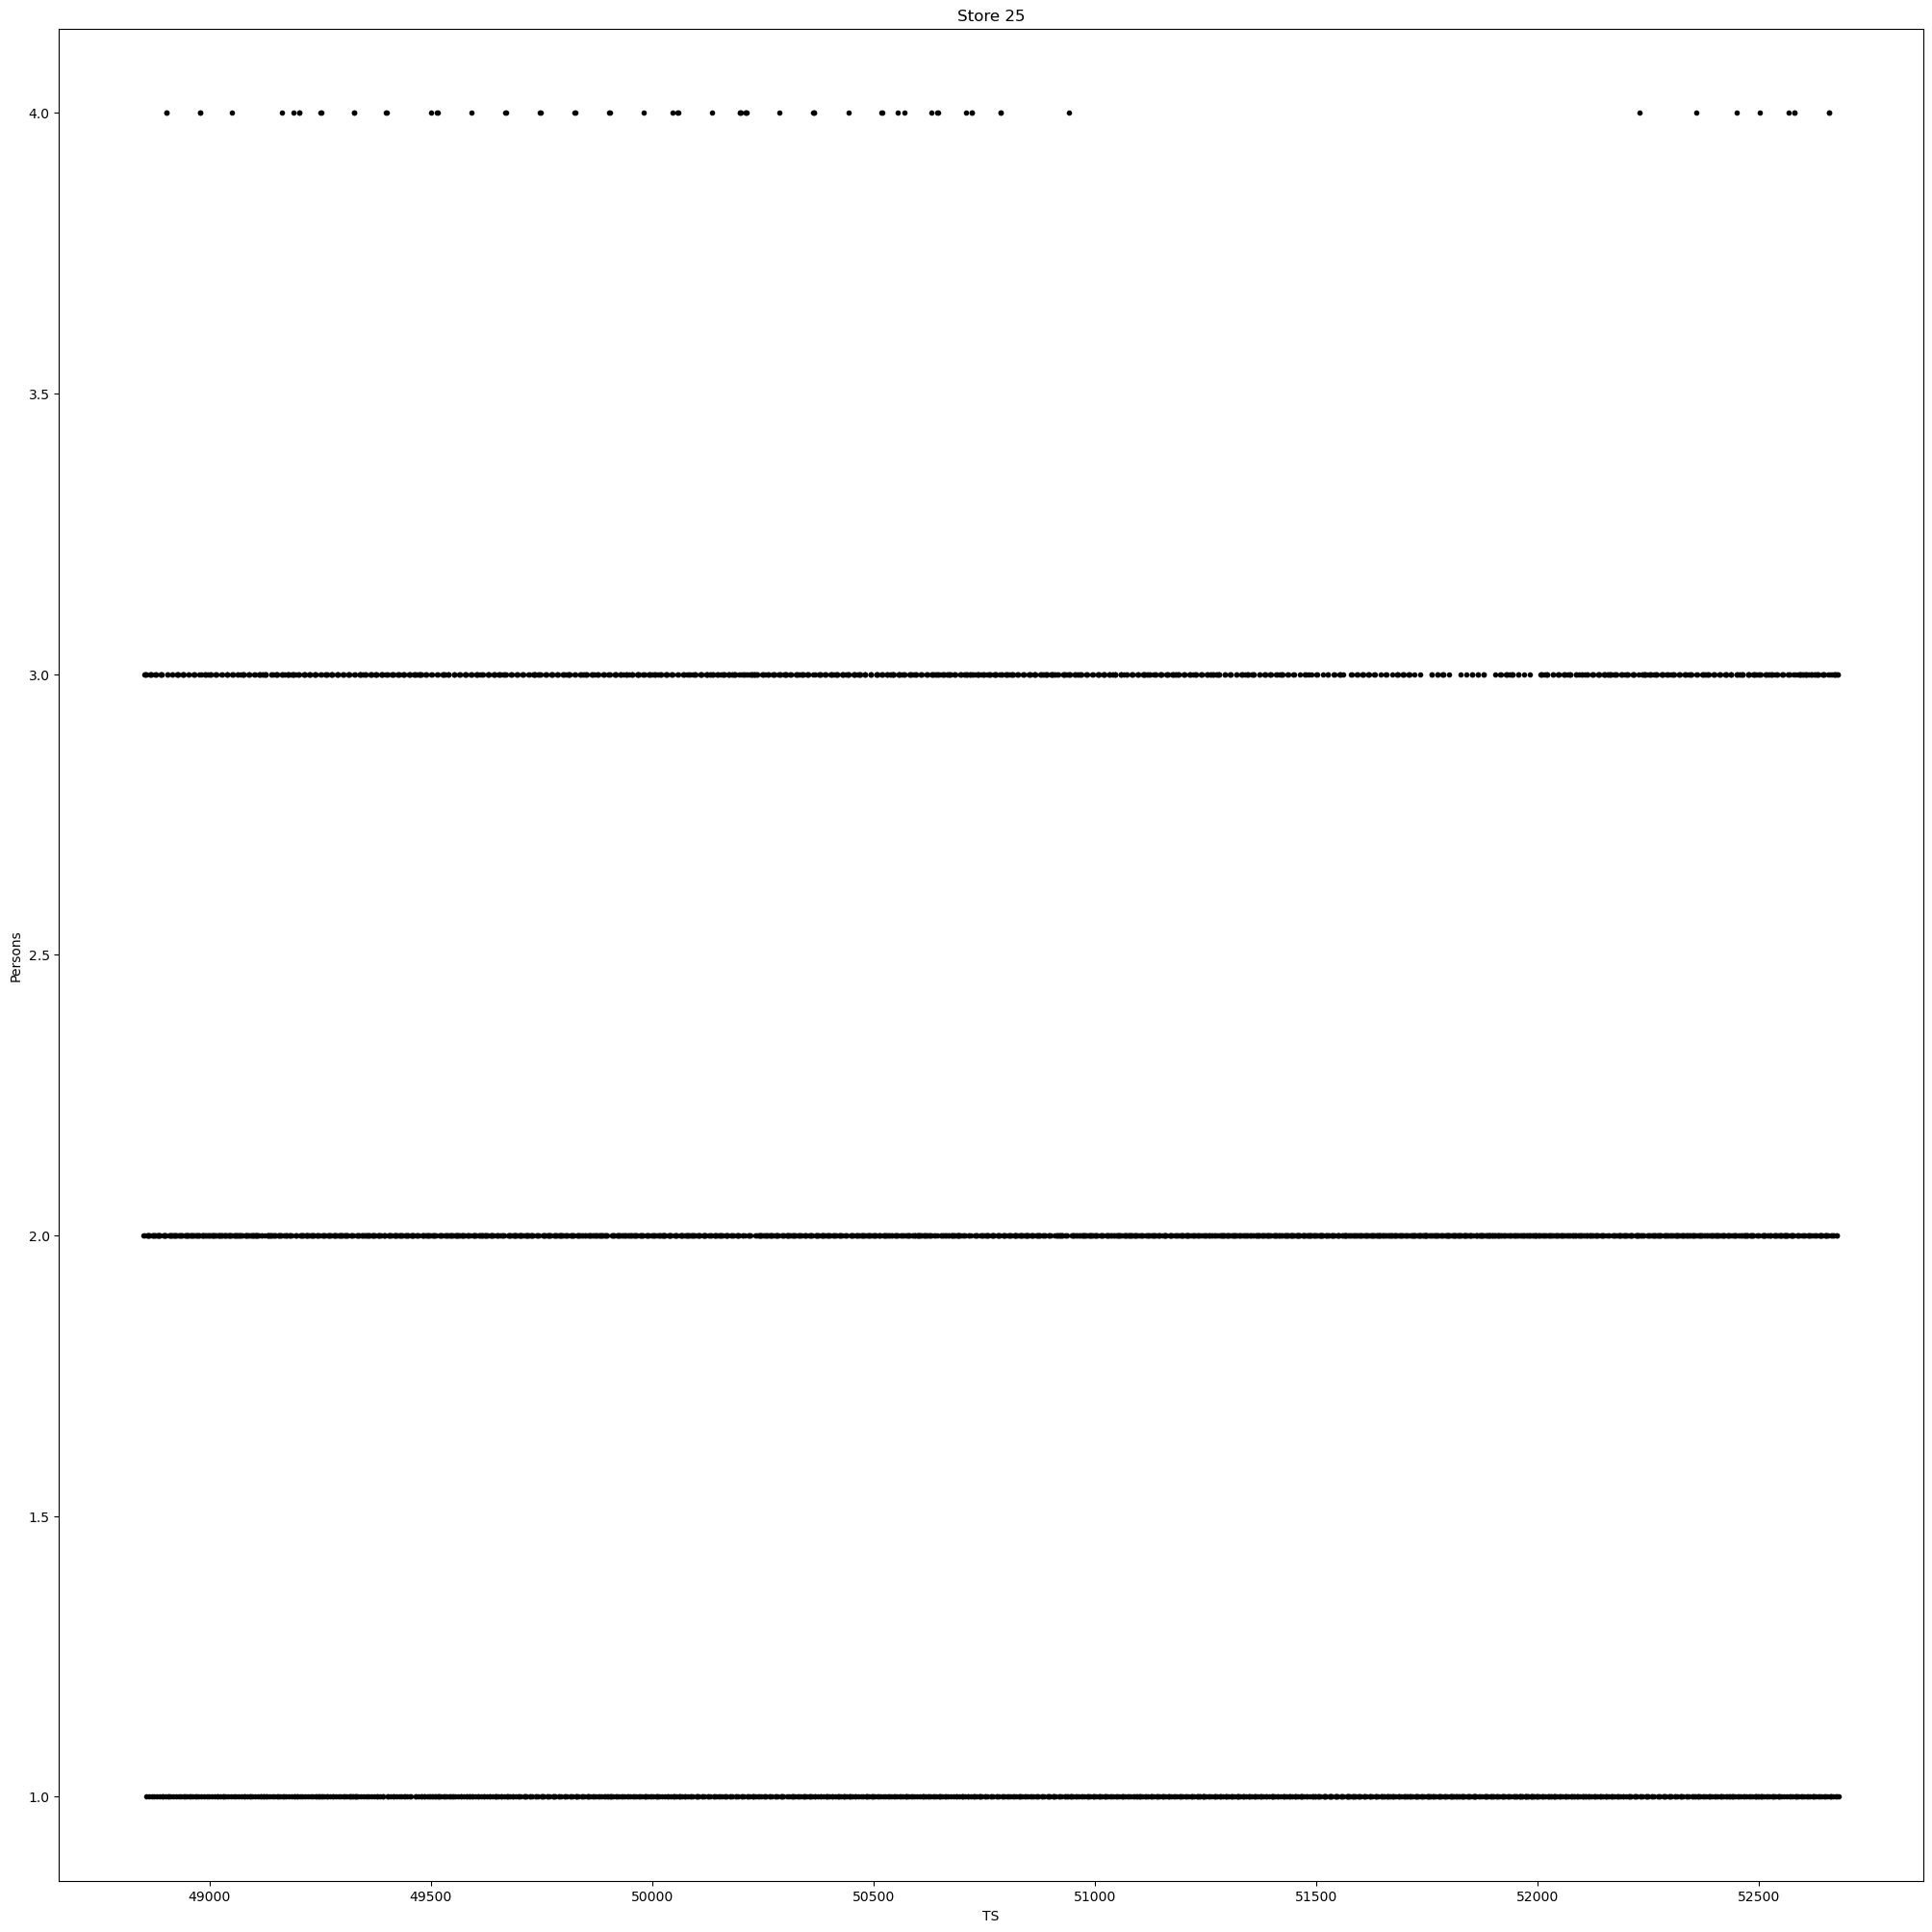

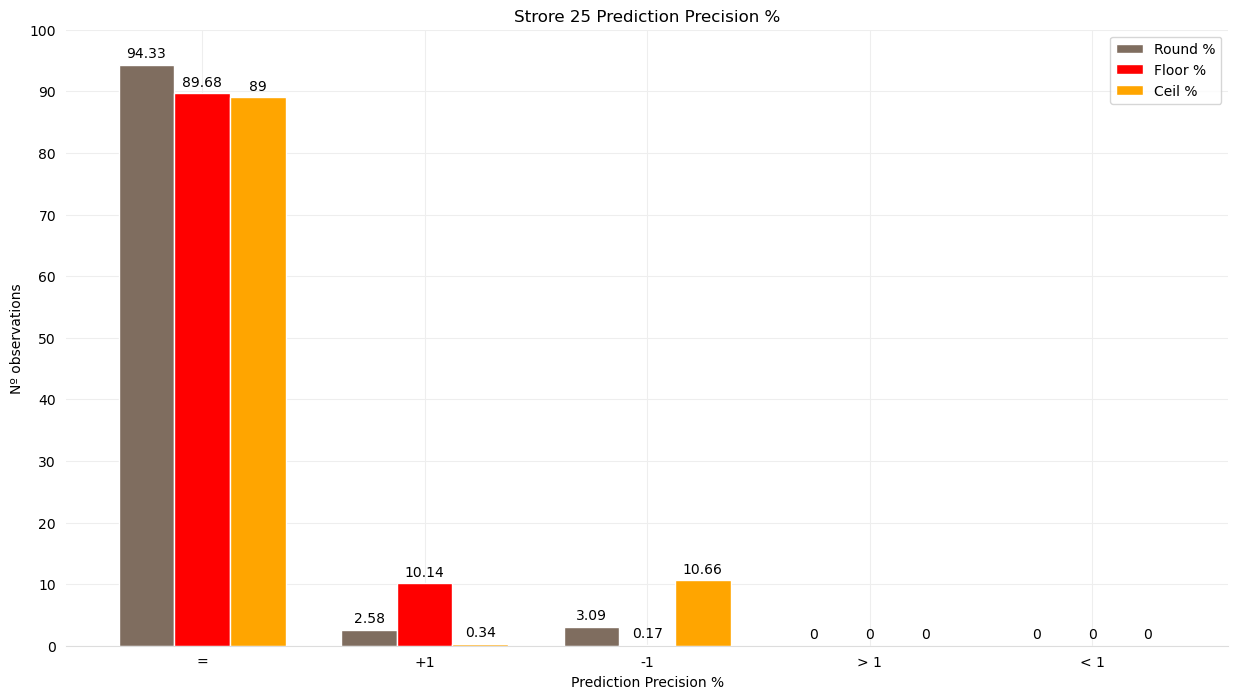

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       1646 |         45 |         54 |          0 |          0  
  Floor                |       1565 |        177 |          3 |          0 |          0  
  Ceil                 |       1553 |          6 |        186 |          0 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      94.33 |       2.58 |       3.09 |        0.0 |        0.0  
  Floor % 

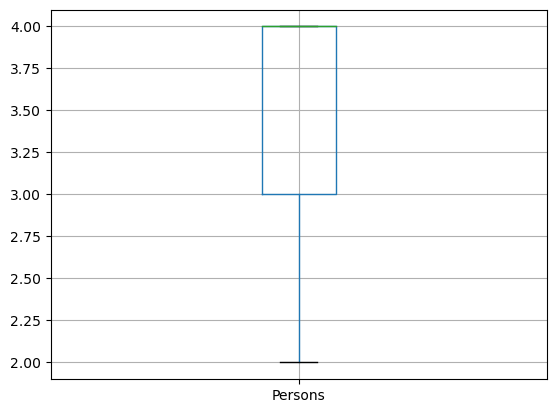

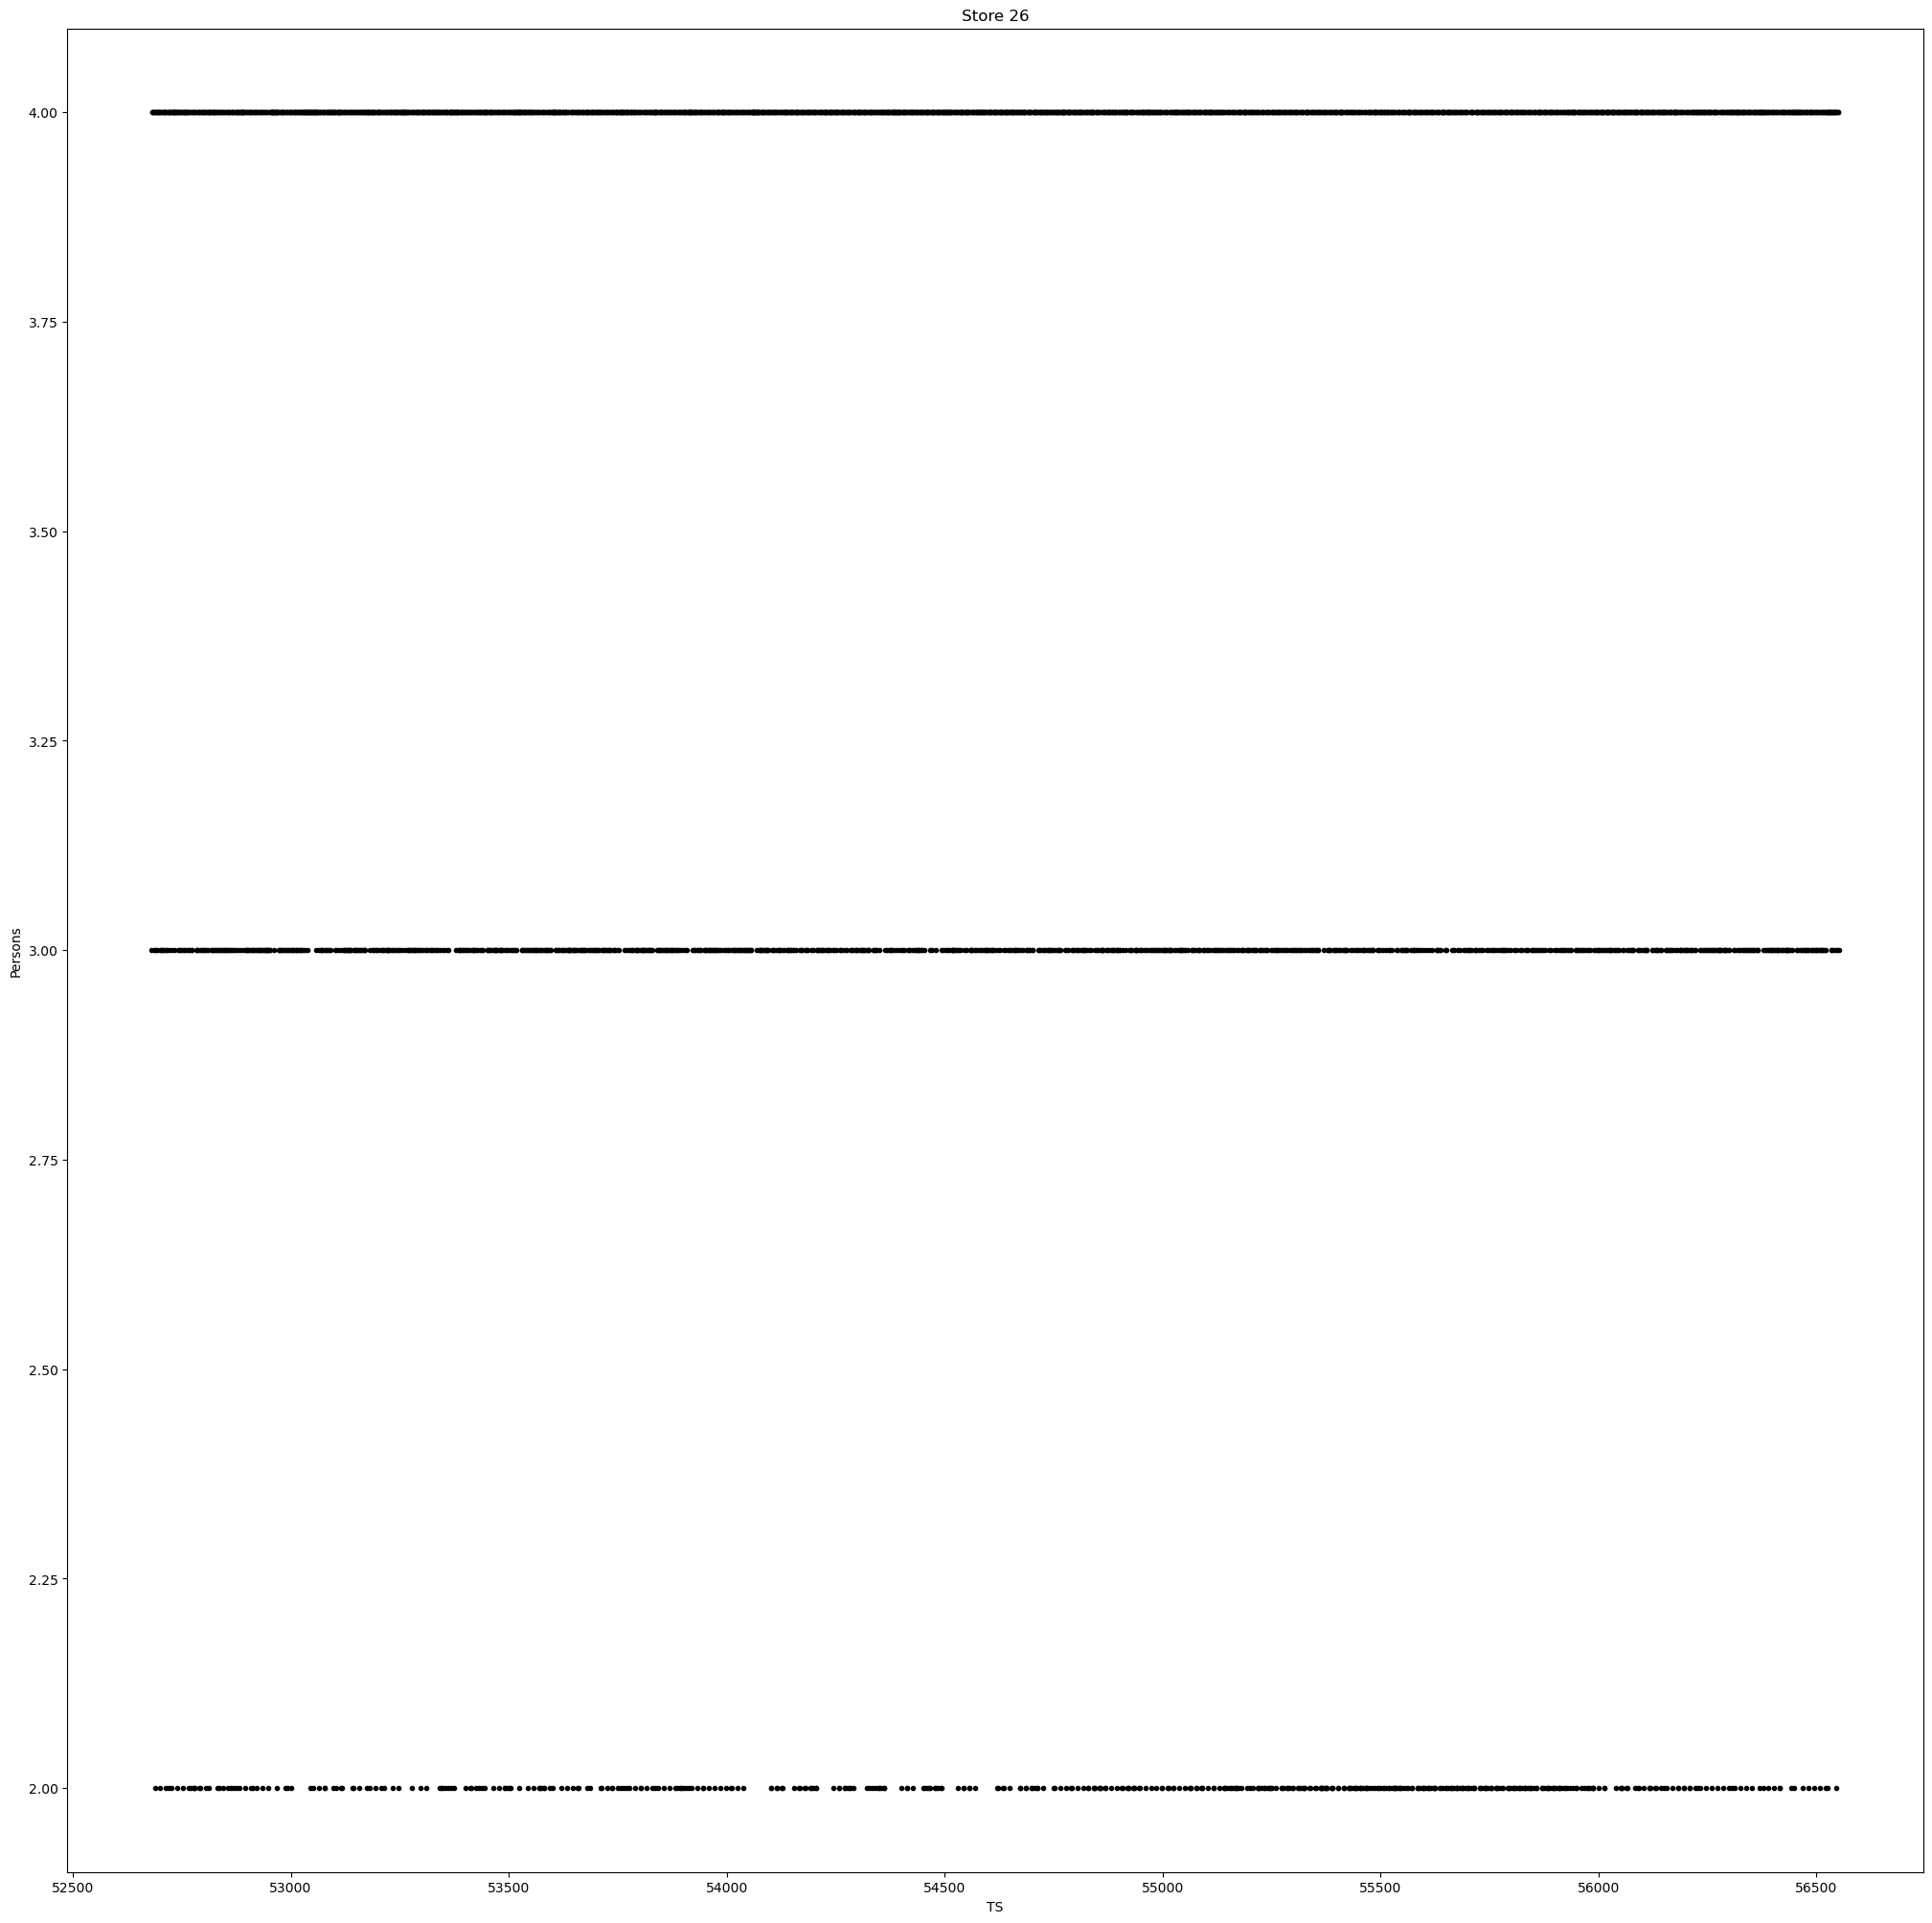

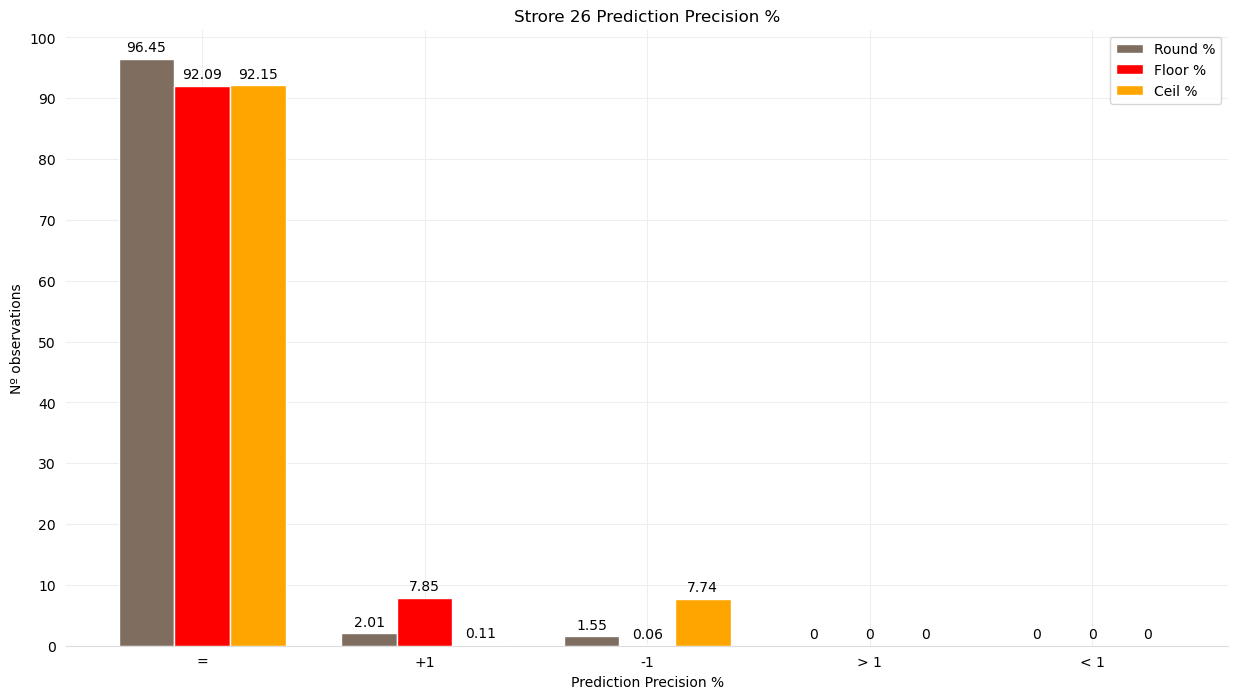

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       1683 |         35 |         27 |          0 |          0  
  Floor                |       1607 |        137 |          1 |          0 |          0  
  Ceil                 |       1608 |          2 |        135 |          0 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      96.45 |       2.01 |       1.55 |        0.0 |        0.0  
  Floor % 

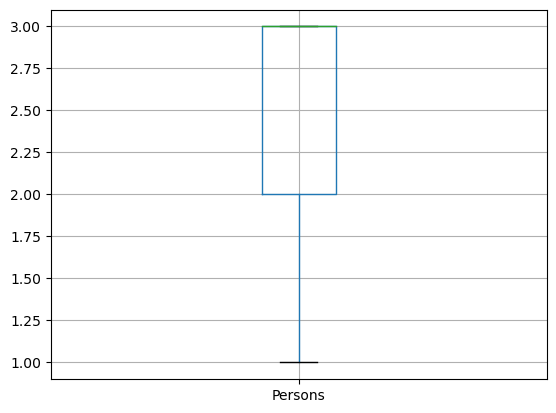

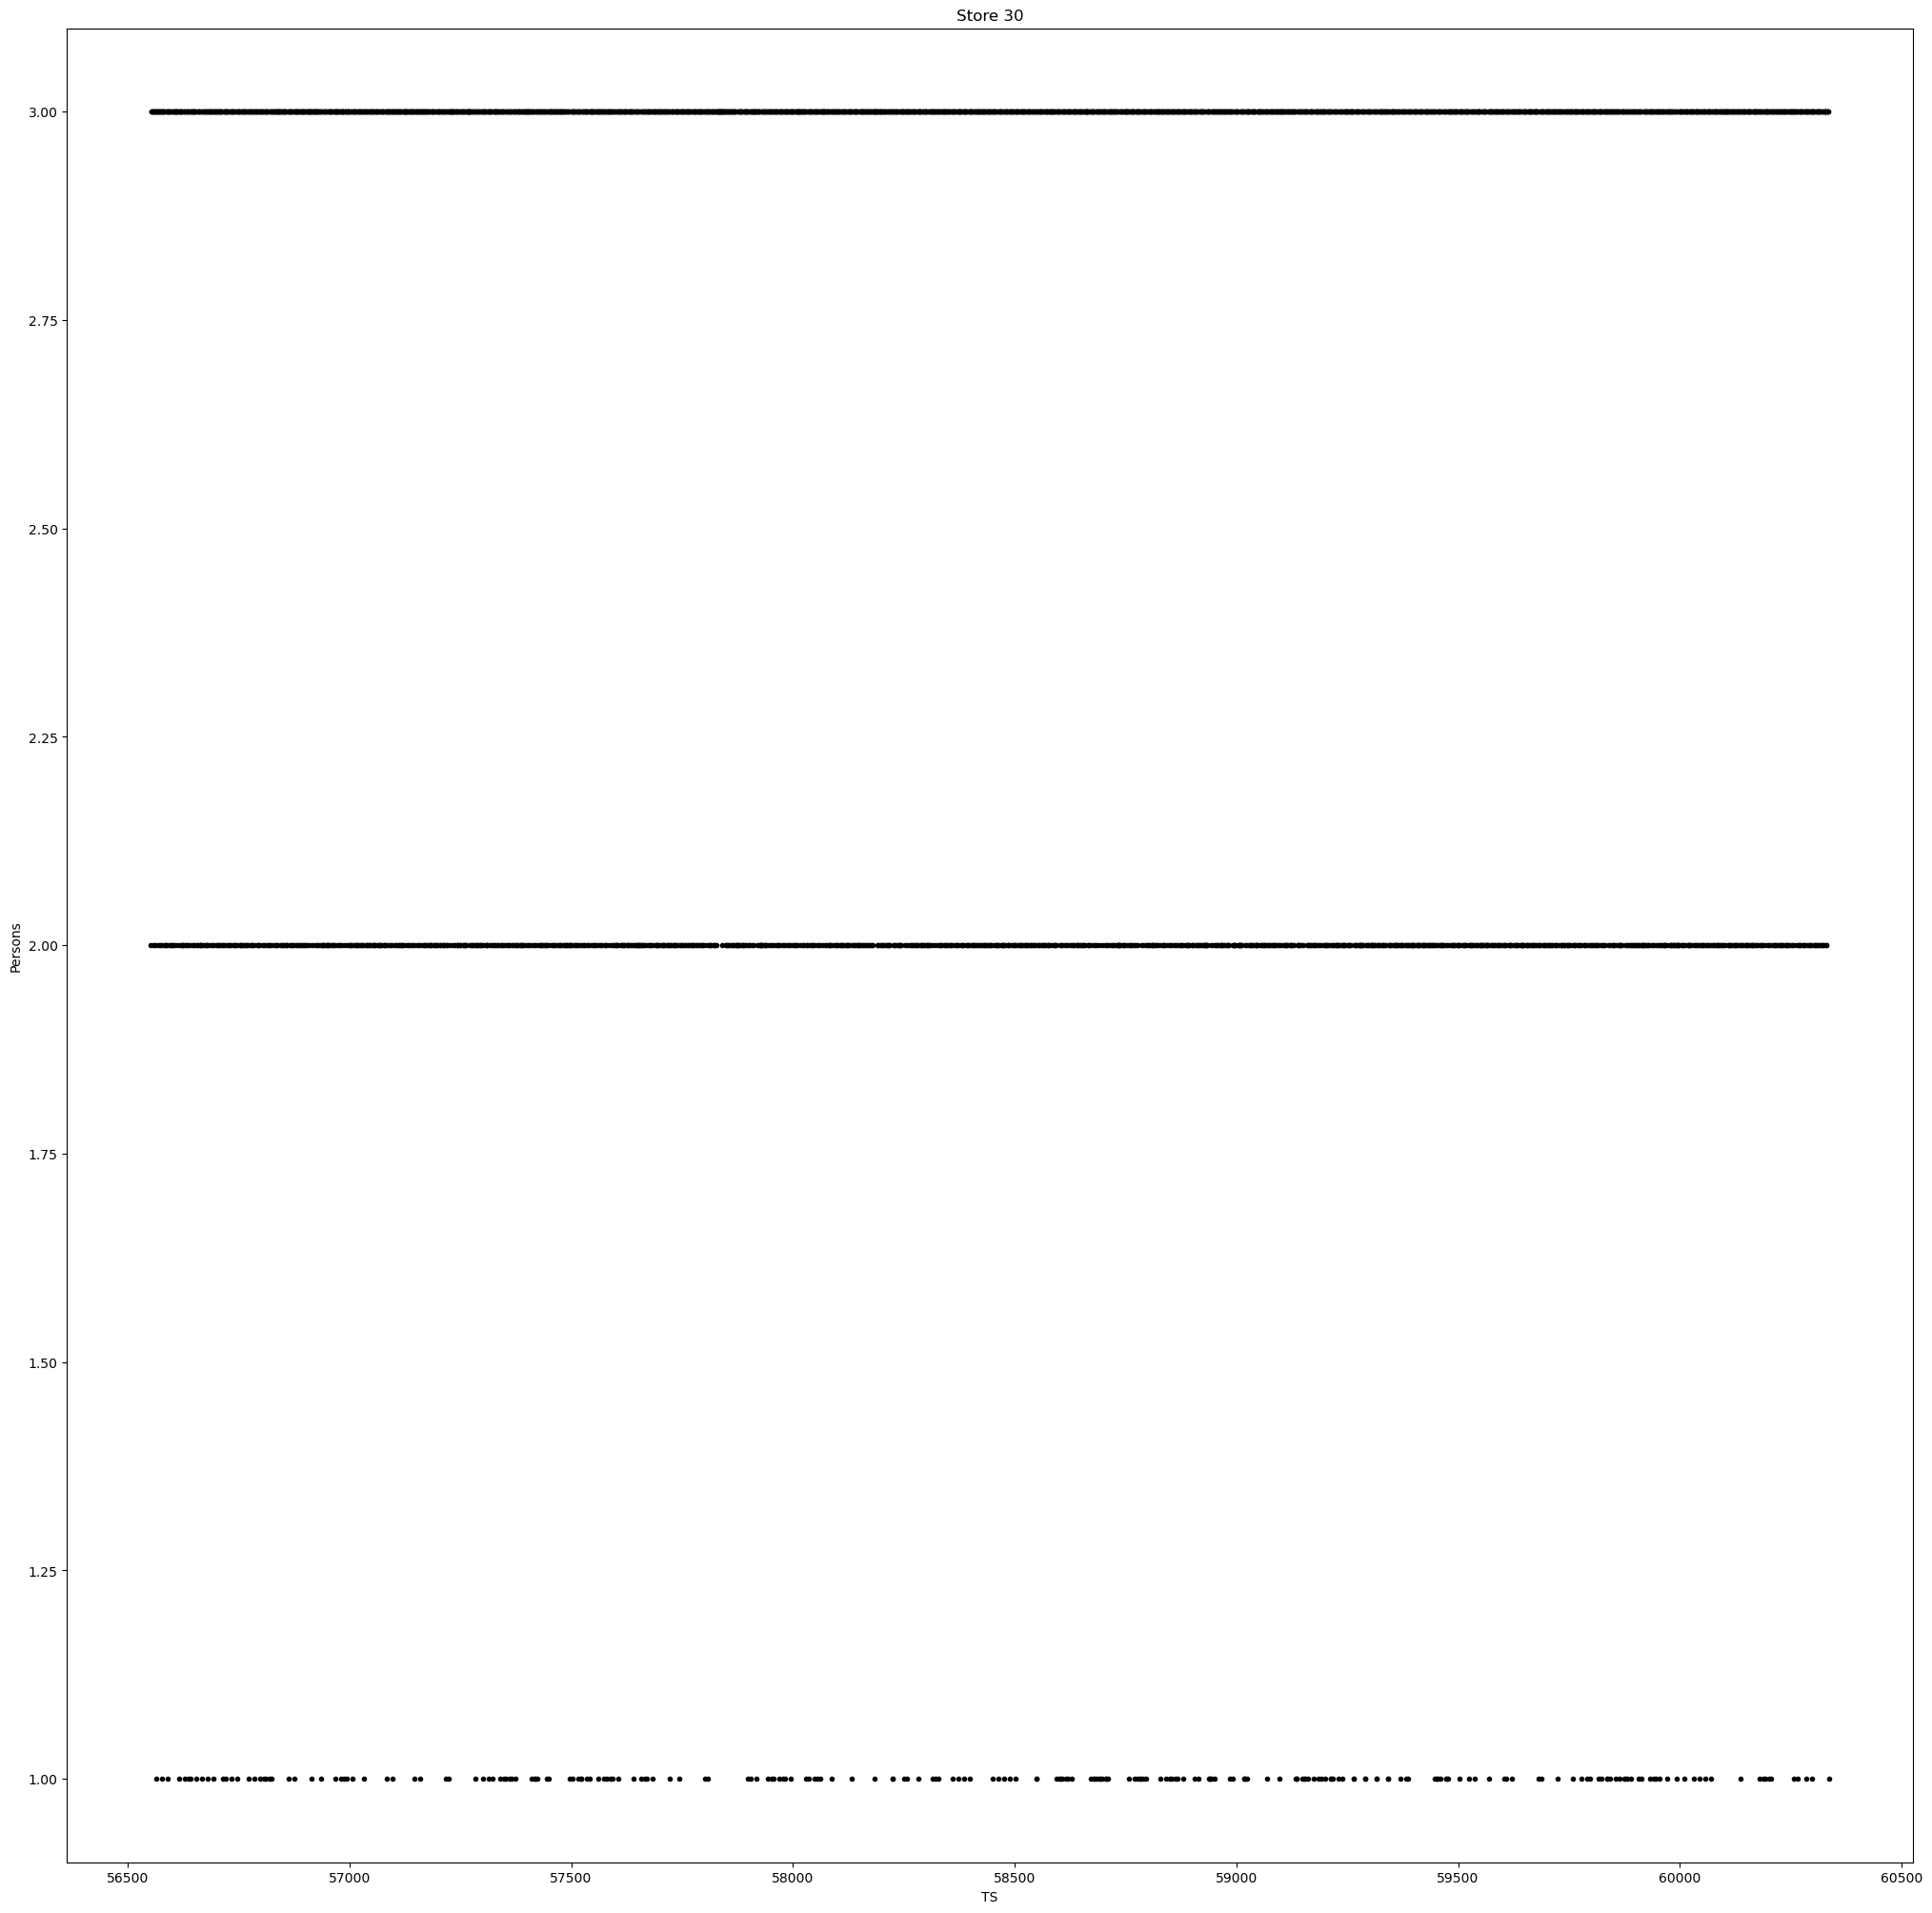

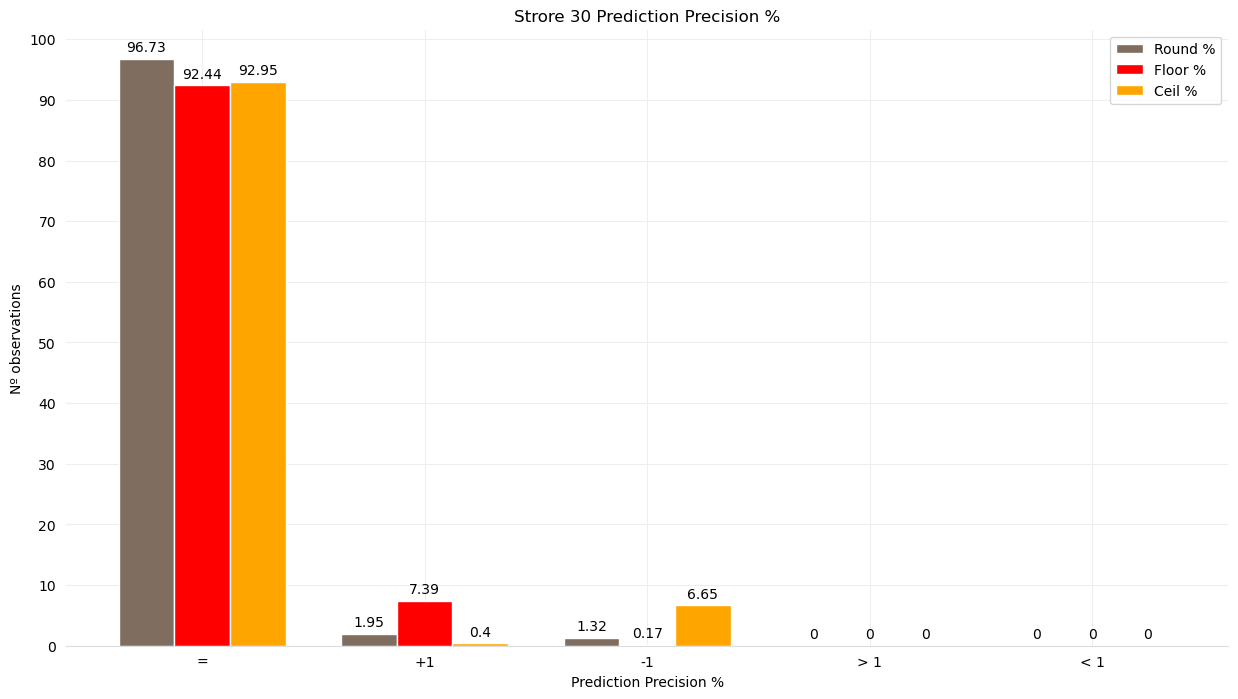

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       1688 |         34 |         23 |          0 |          0  
  Floor                |       1613 |        129 |          3 |          0 |          0  
  Ceil                 |       1622 |          7 |        116 |          0 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      96.73 |       1.95 |       1.32 |        0.0 |        0.0  
  Floor % 

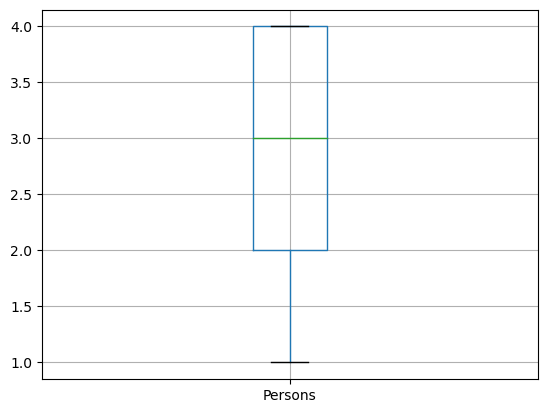

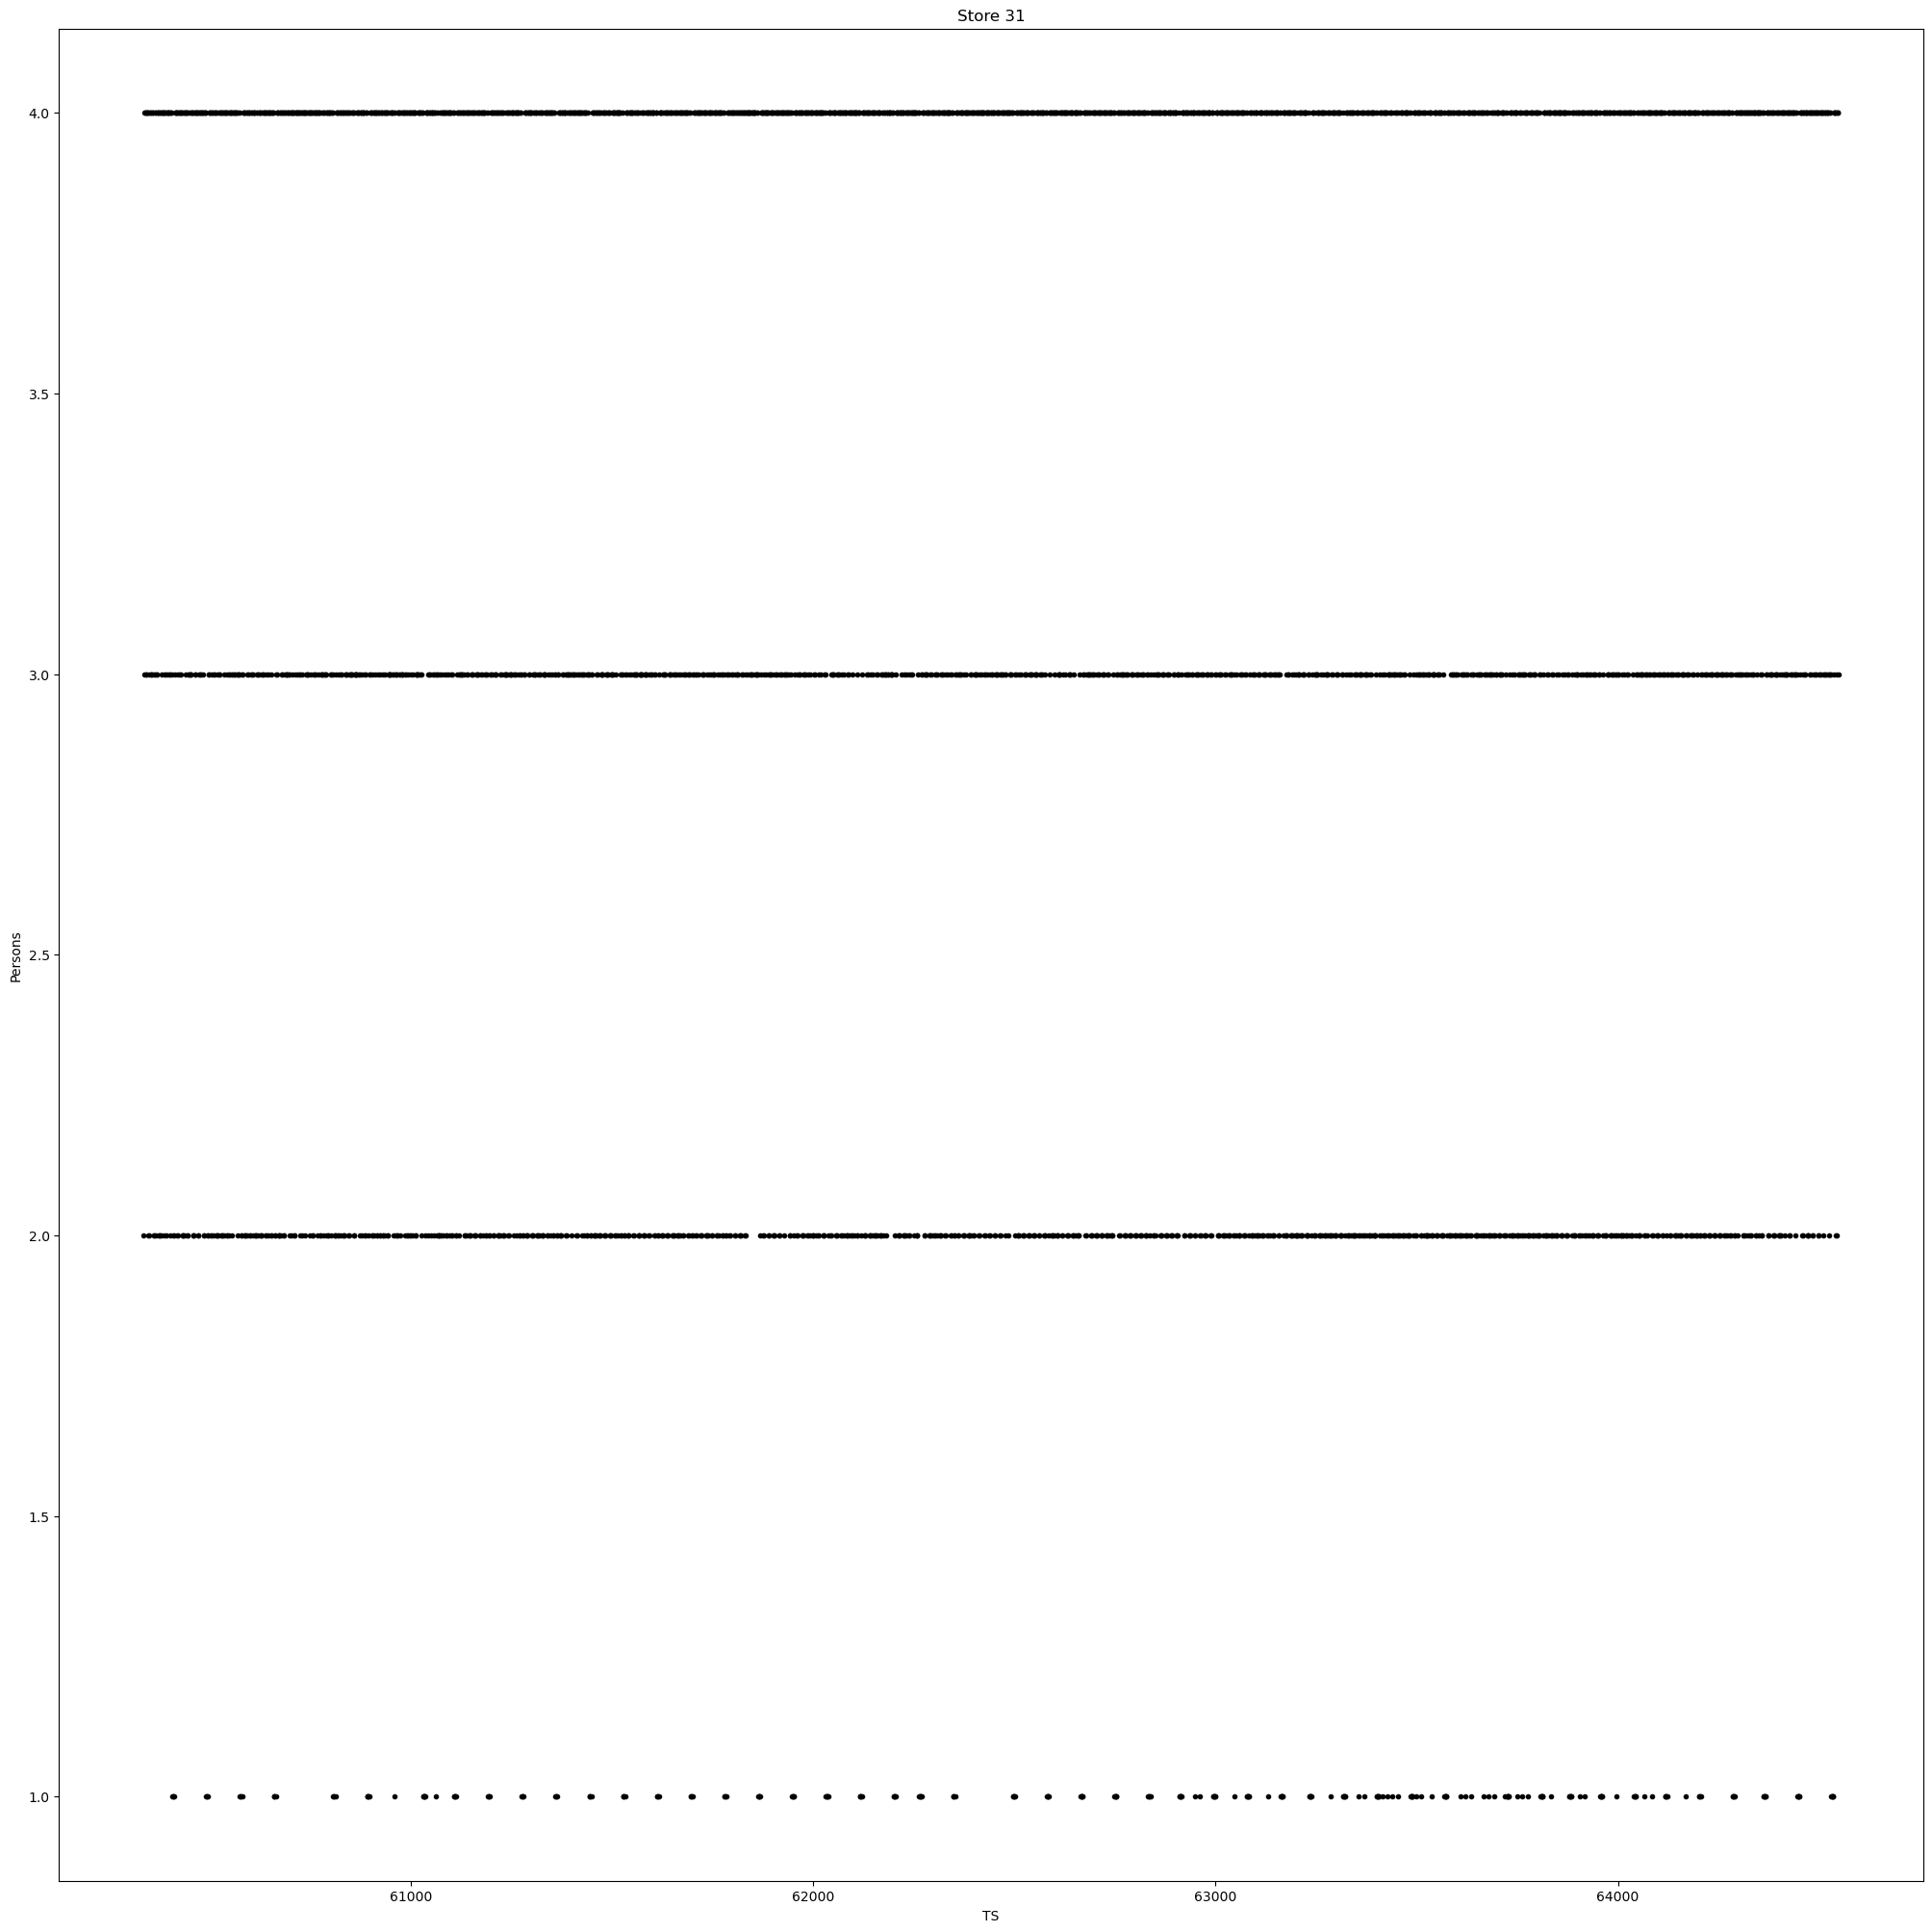

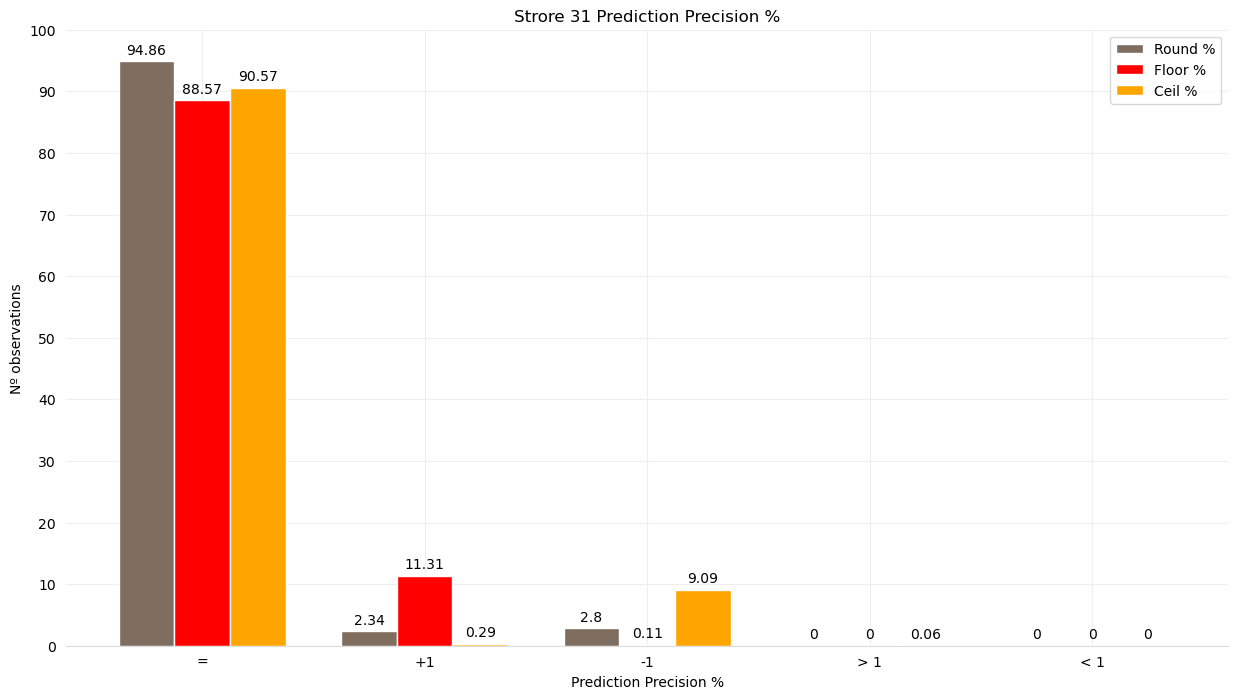

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       1660 |         41 |         49 |          0 |          0  
  Floor                |       1550 |        198 |          2 |          0 |          0  
  Ceil                 |       1585 |          5 |        159 |          1 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      94.86 |       2.34 |        2.8 |        0.0 |        0.0  
  Floor % 

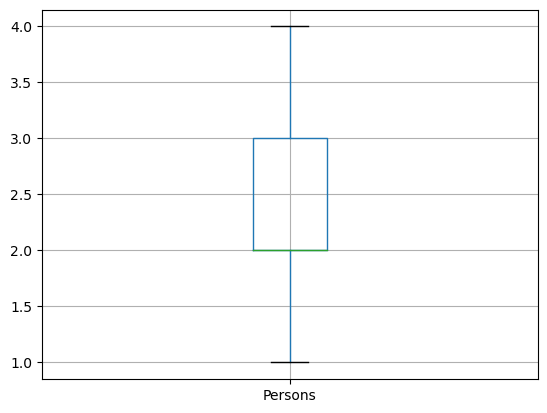

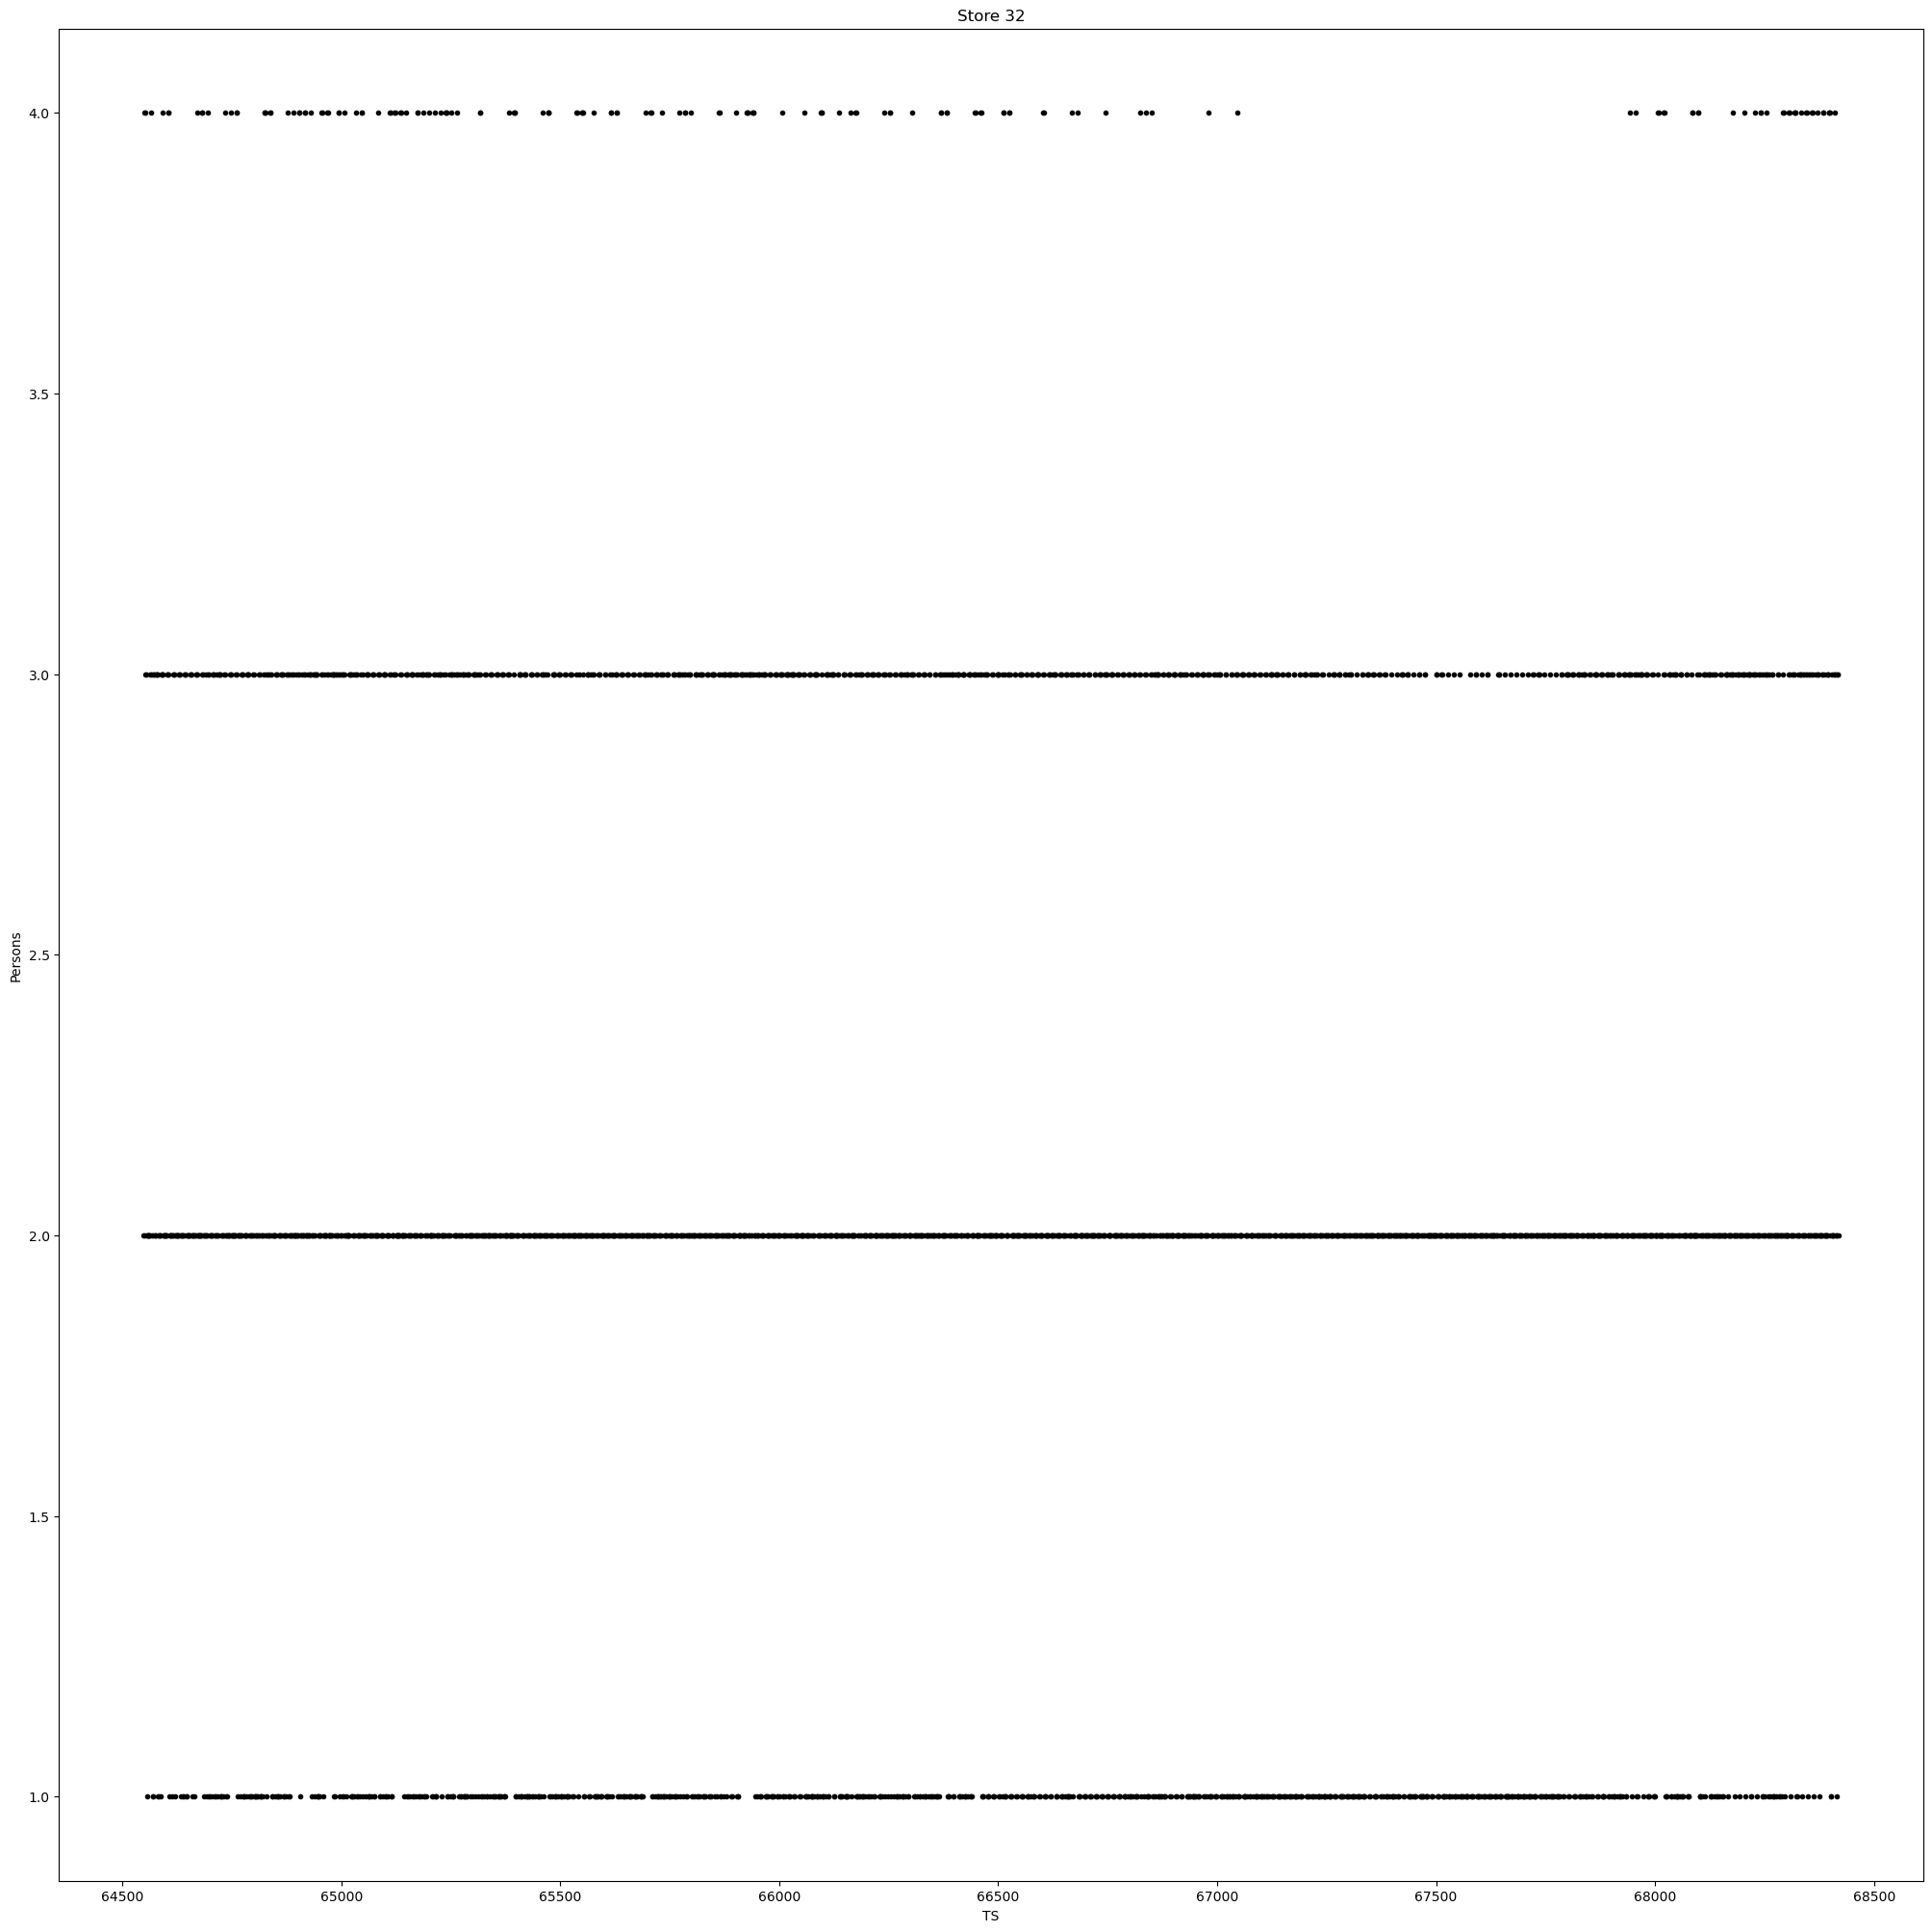

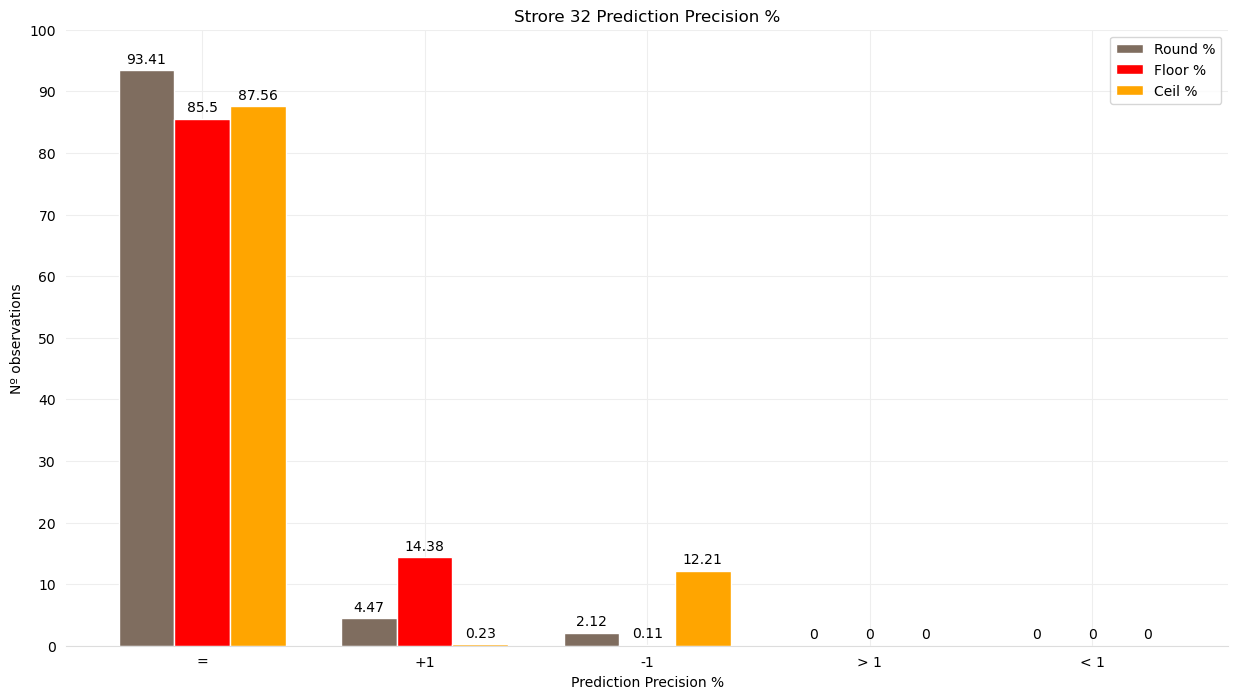

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       1630 |         78 |         37 |          0 |          0  
  Floor                |       1492 |        251 |          2 |          0 |          0  
  Ceil                 |       1528 |          4 |        213 |          0 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      93.41 |       4.47 |       2.12 |        0.0 |        0.0  
  Floor % 

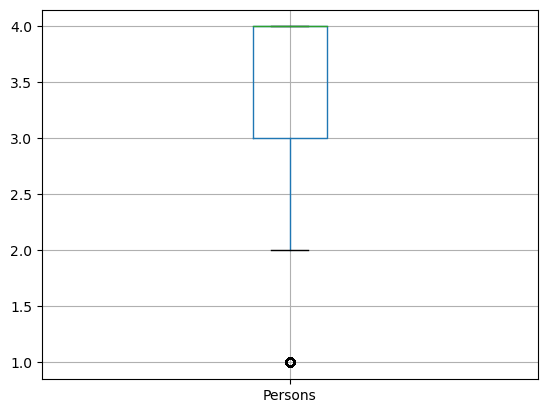

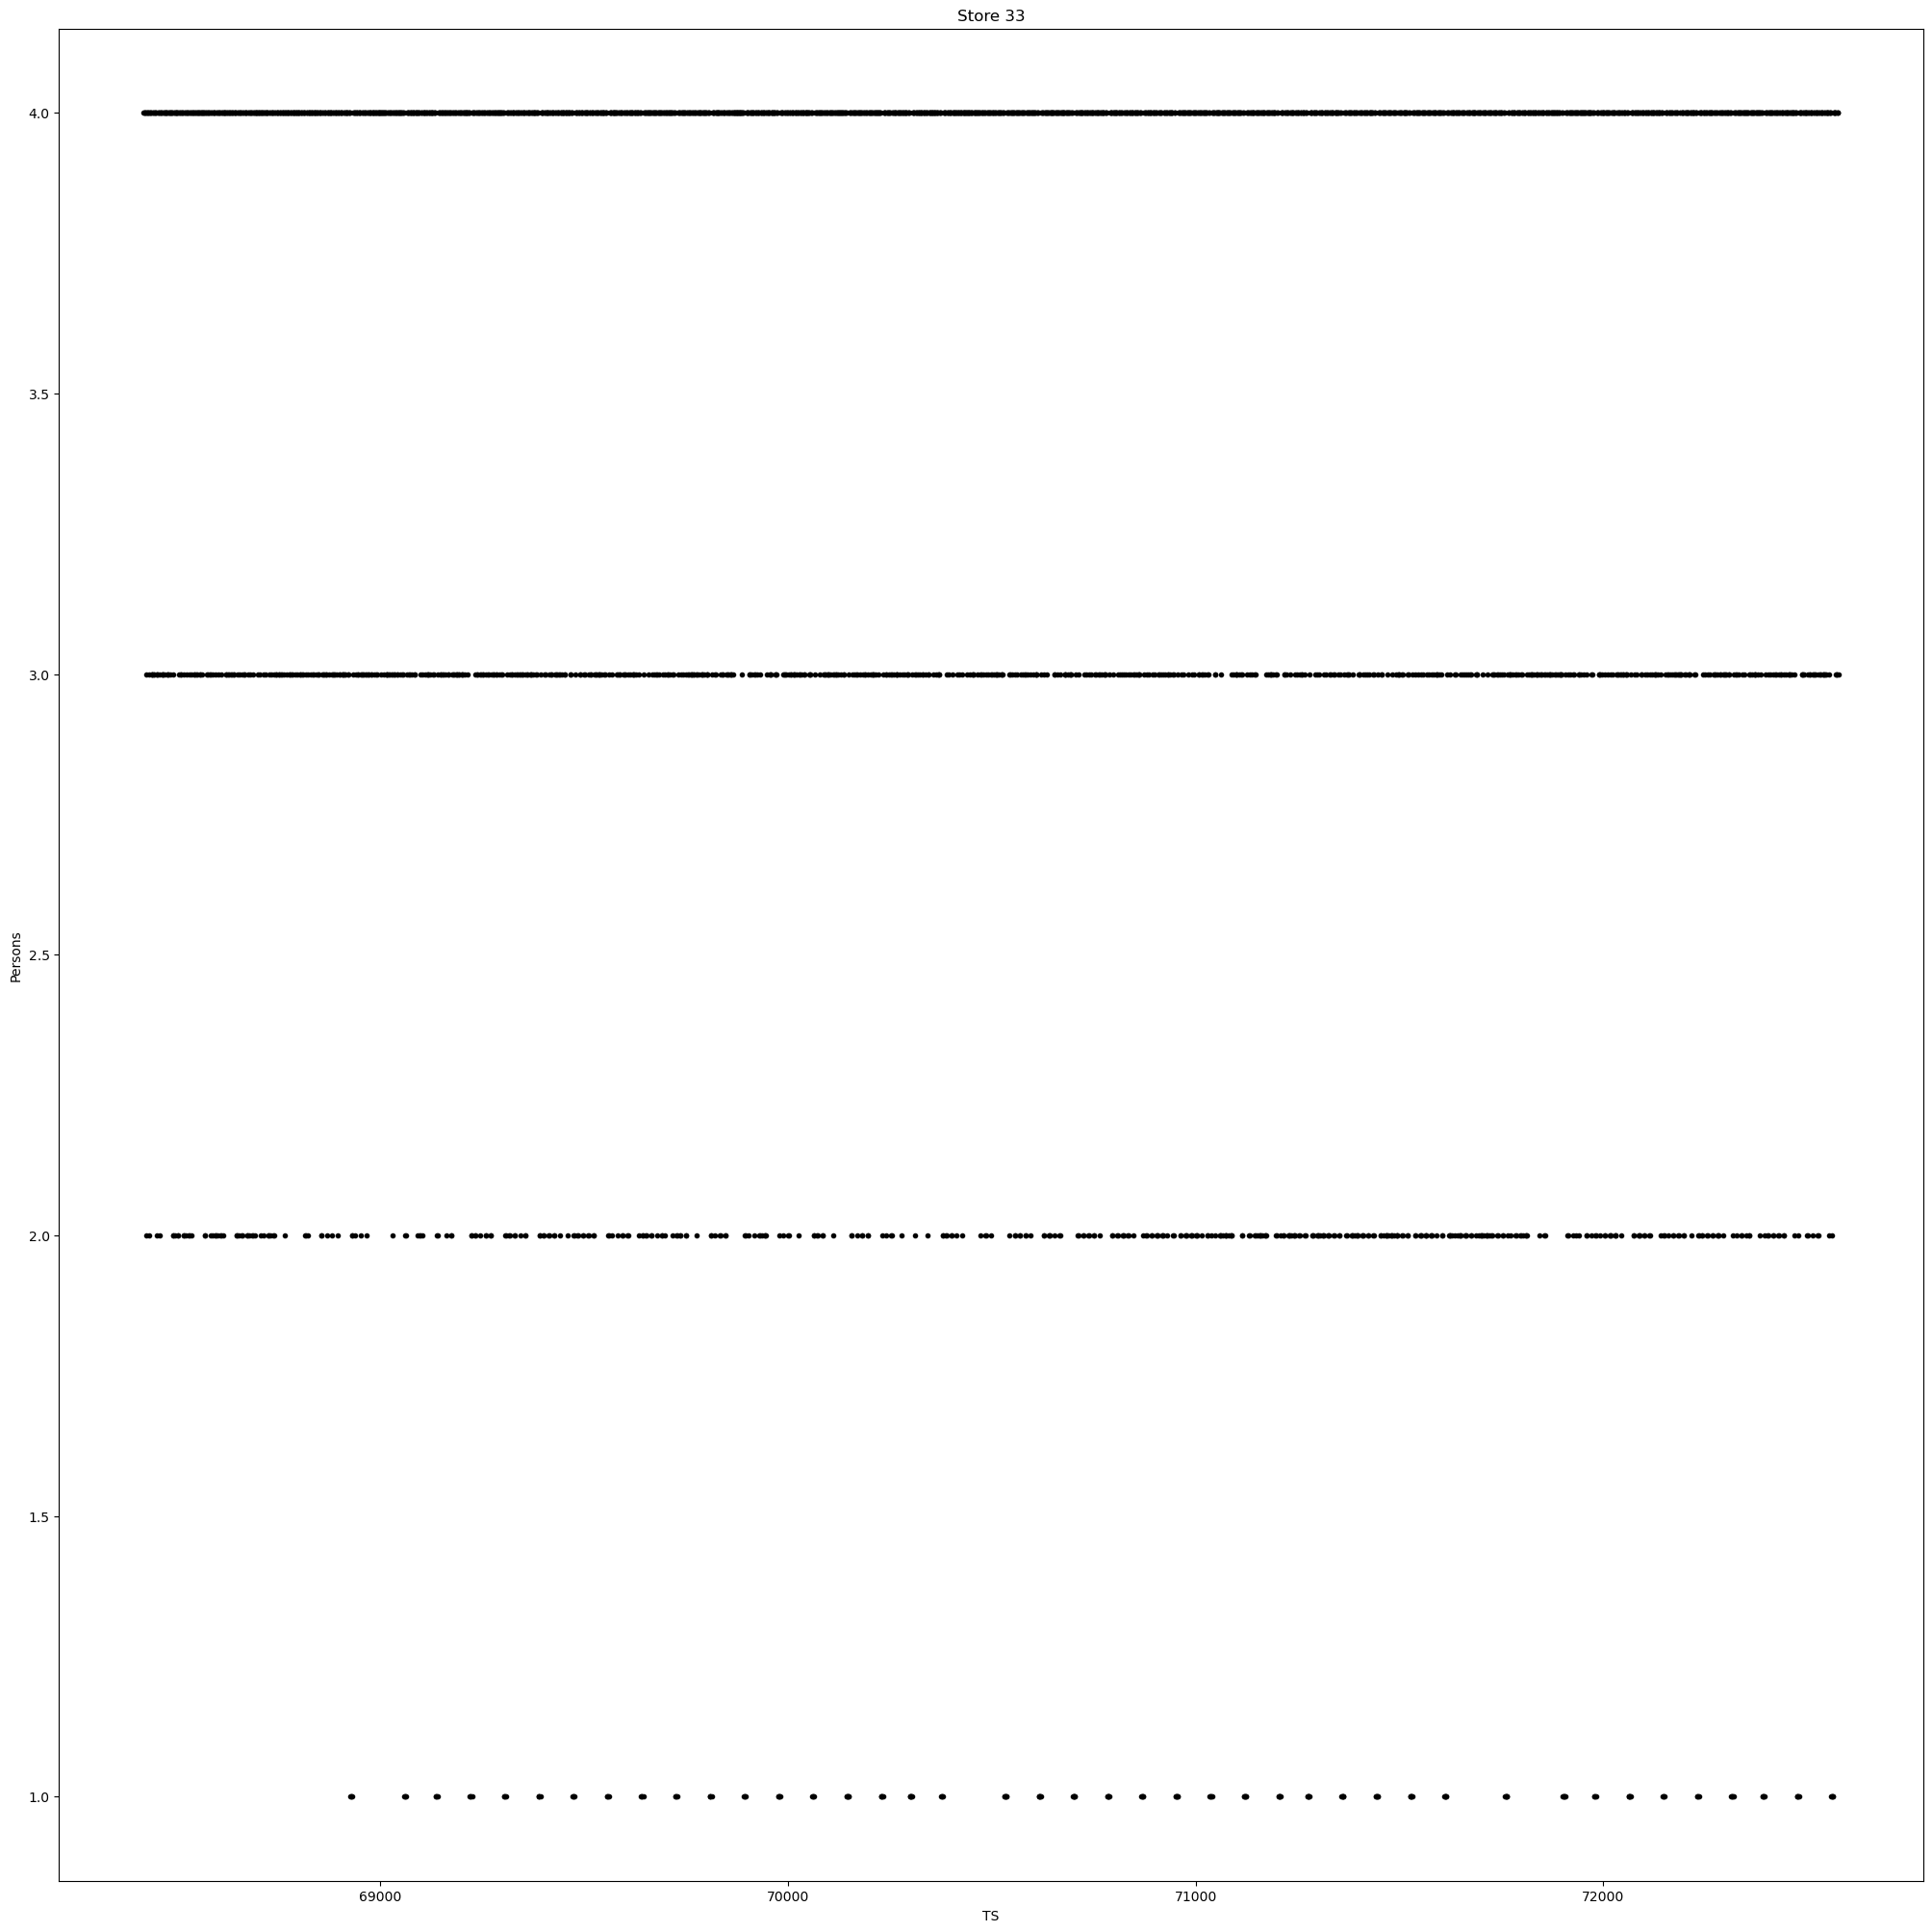

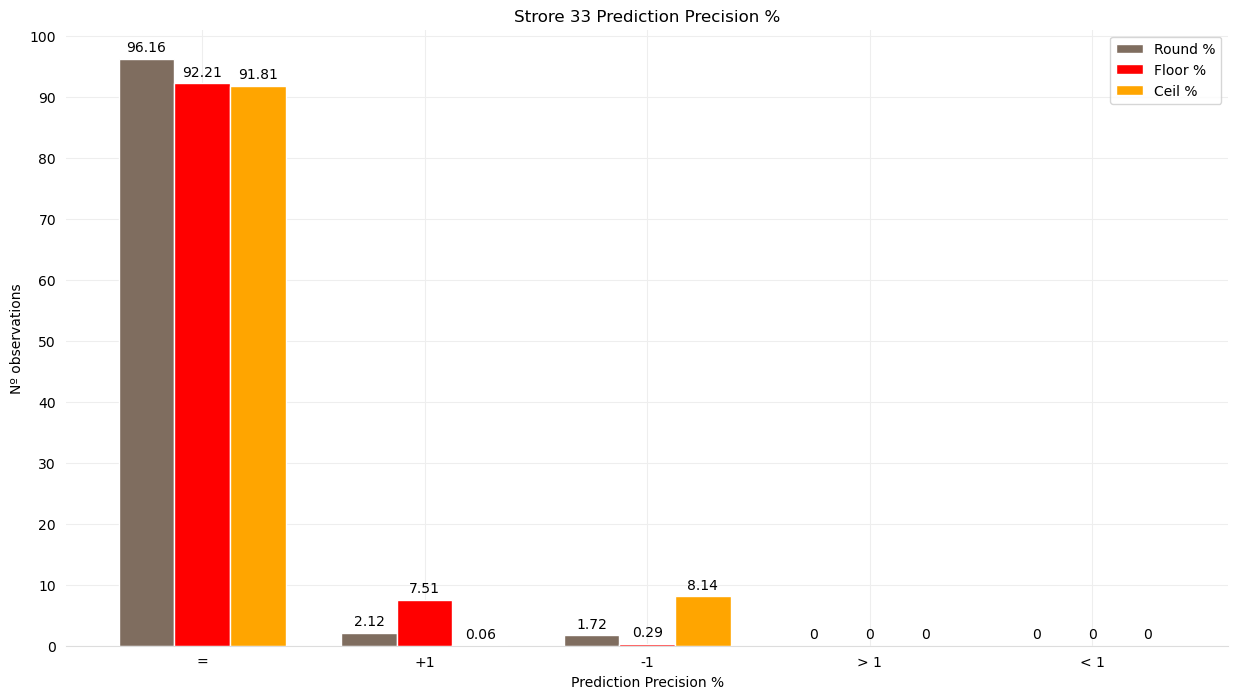

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       1678 |         37 |         30 |          0 |          0  
  Floor                |       1609 |        131 |          5 |          0 |          0  
  Ceil                 |       1602 |          1 |        142 |          0 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      96.16 |       2.12 |       1.72 |        0.0 |        0.0  
  Floor % 

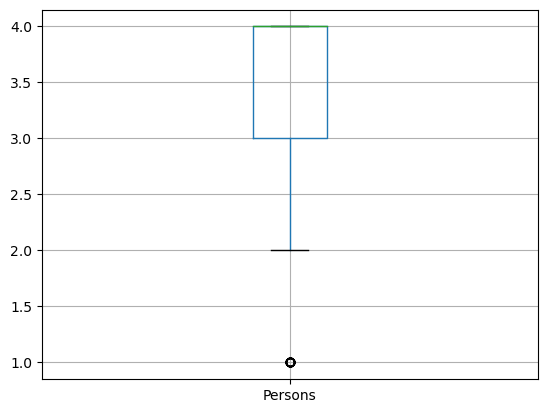

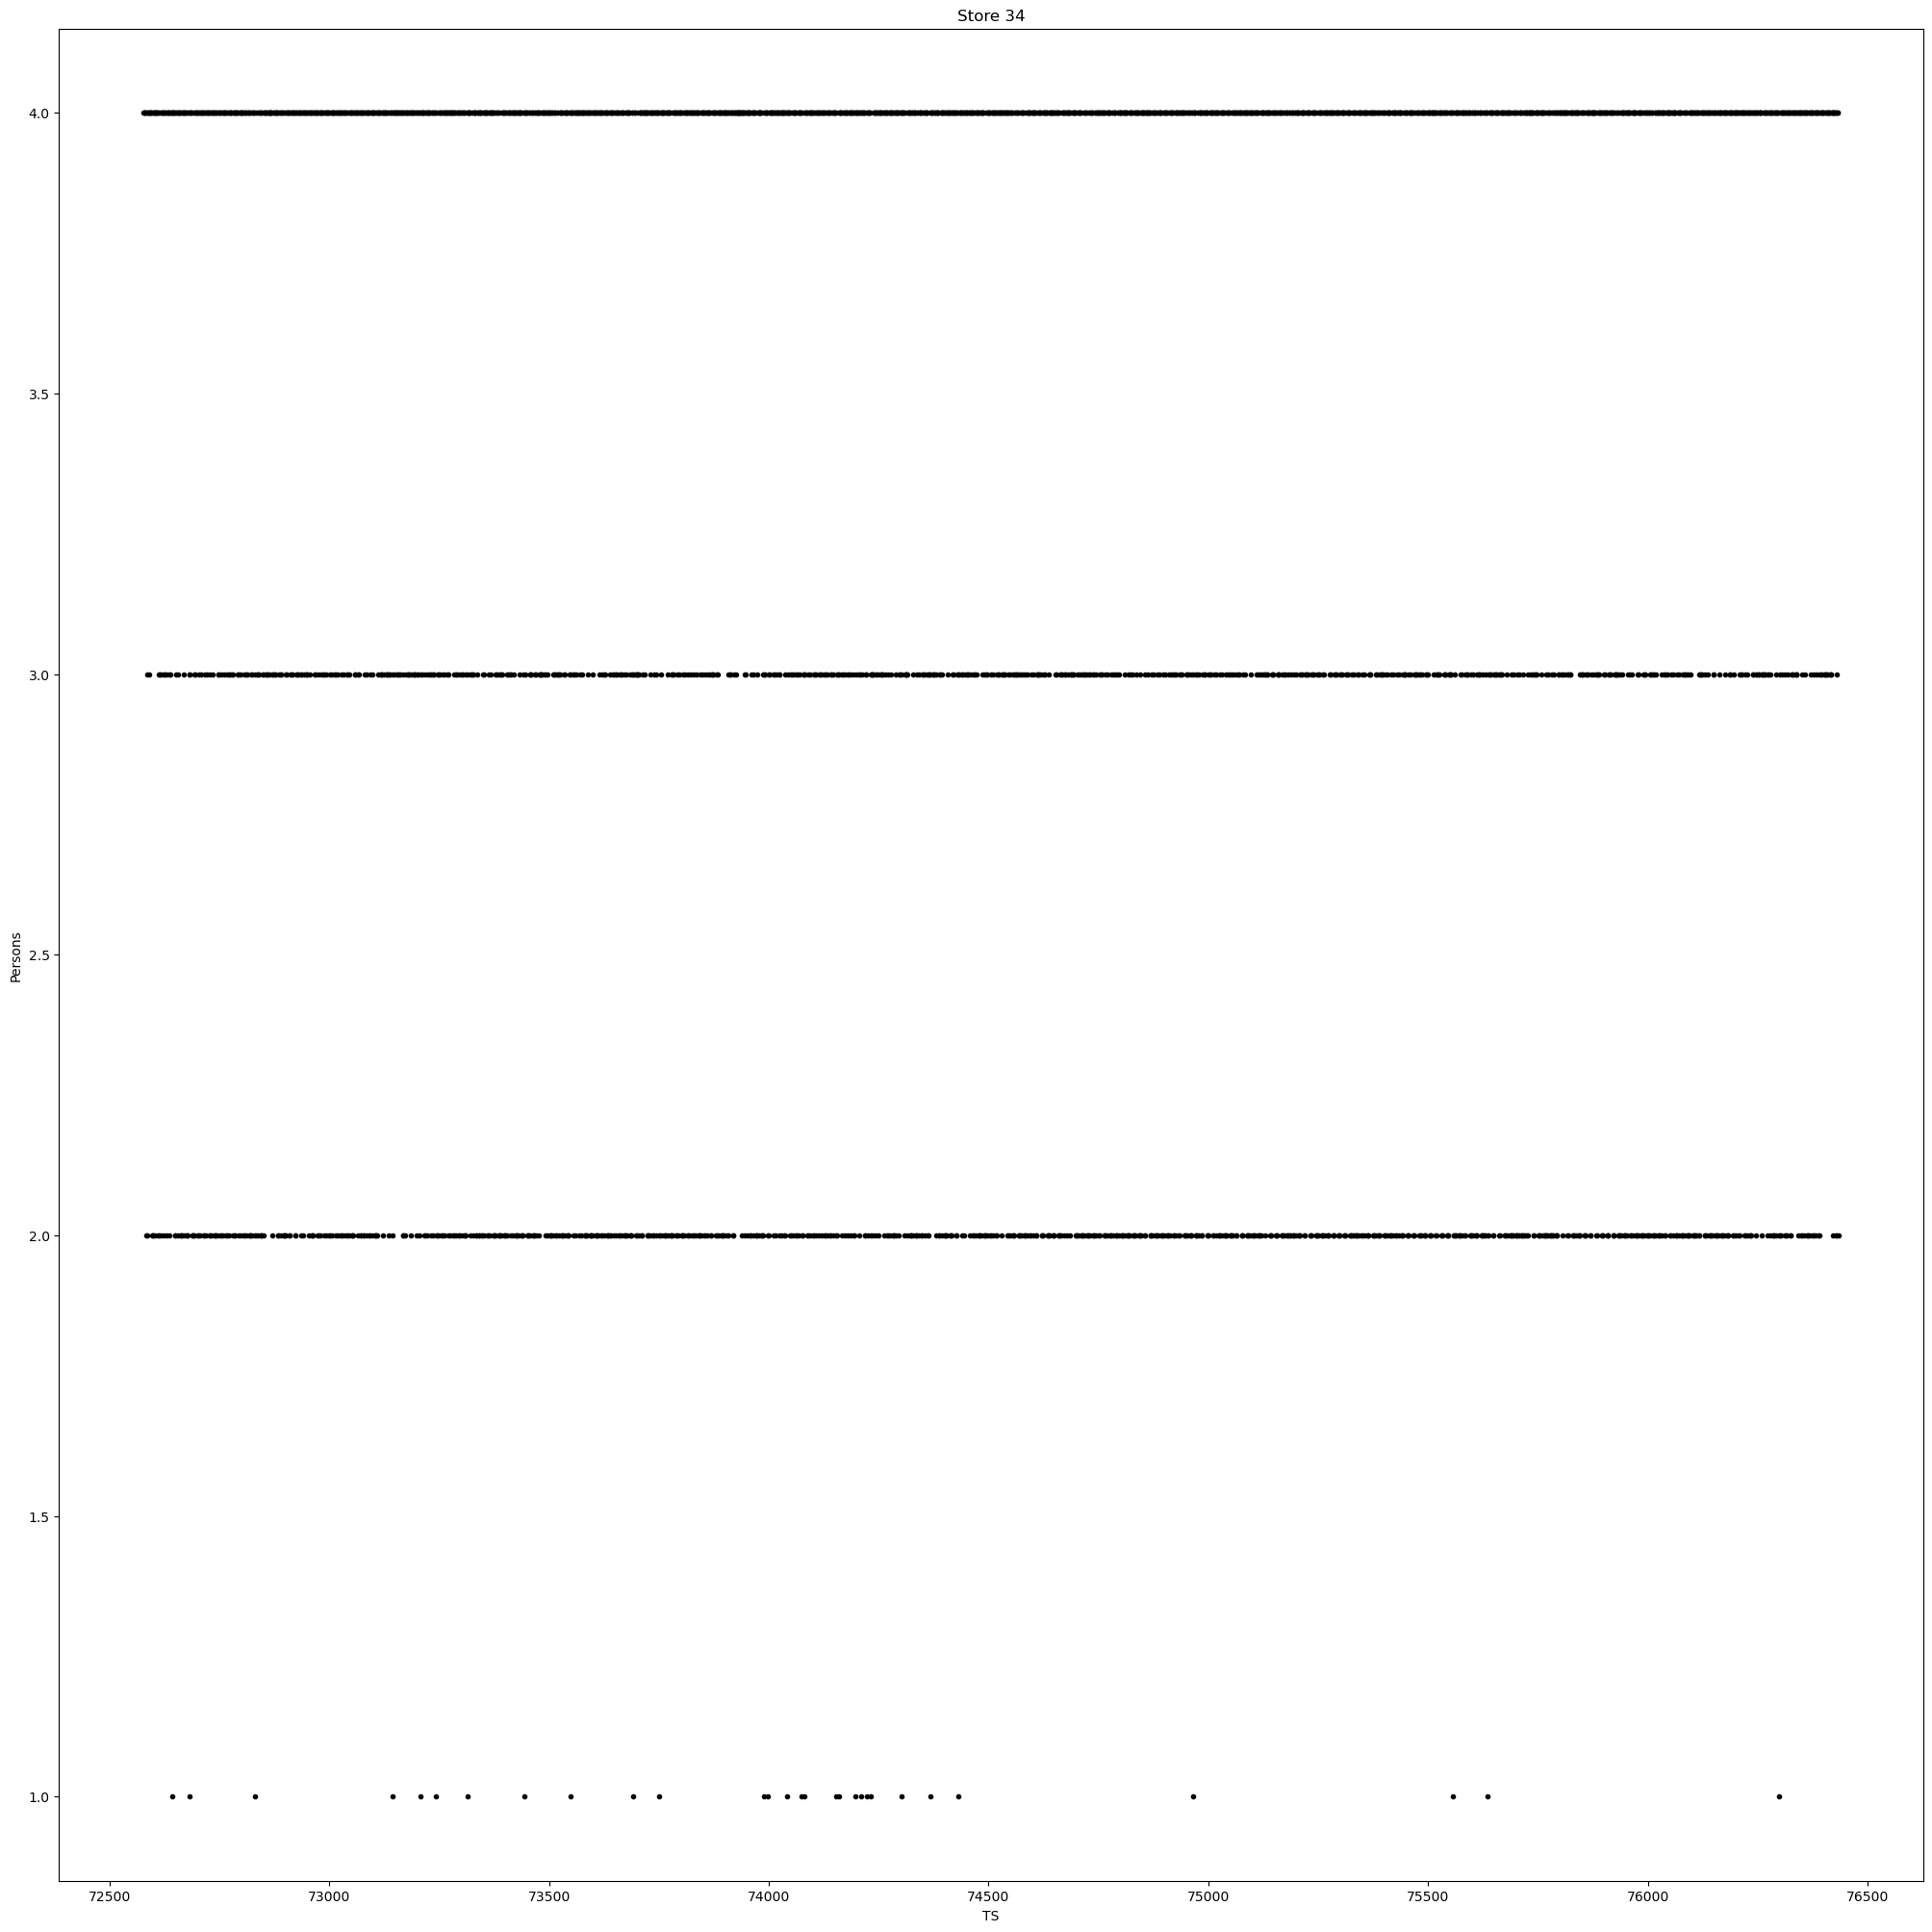

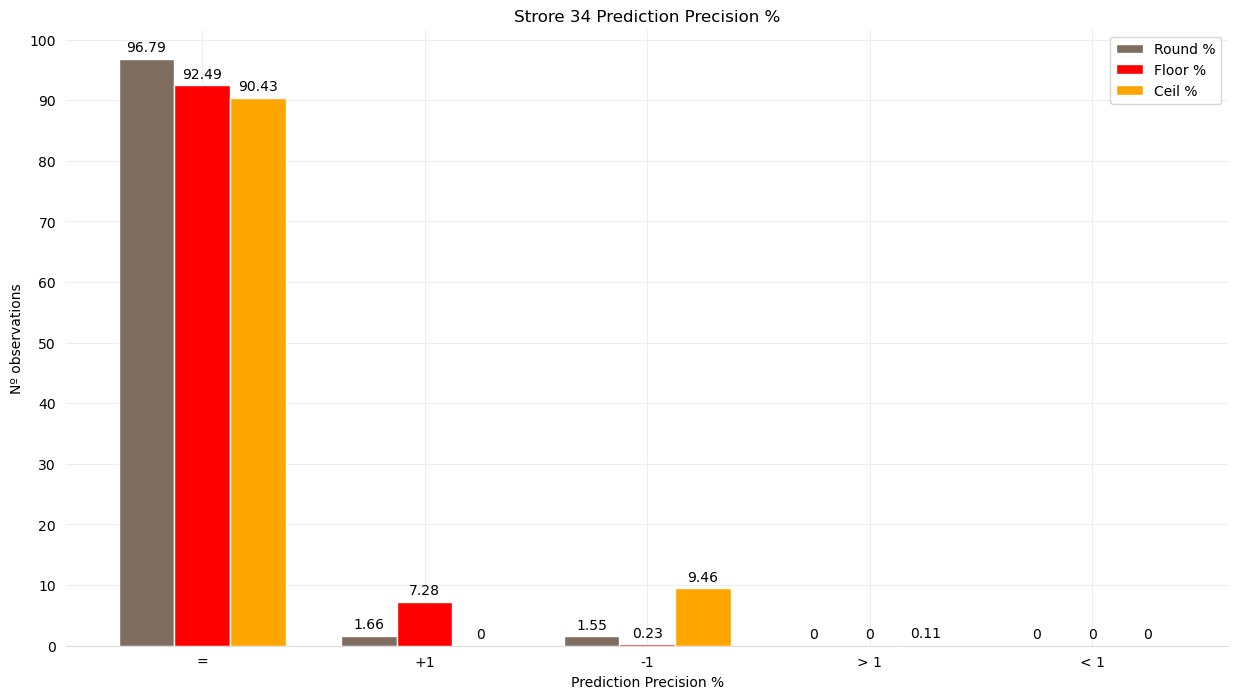

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       1689 |         29 |         27 |          0 |          0  
  Floor                |       1614 |        127 |          4 |          0 |          0  
  Ceil                 |       1578 |          0 |        165 |          2 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      96.79 |       1.66 |       1.55 |        0.0 |        0.0  
  Floor % 

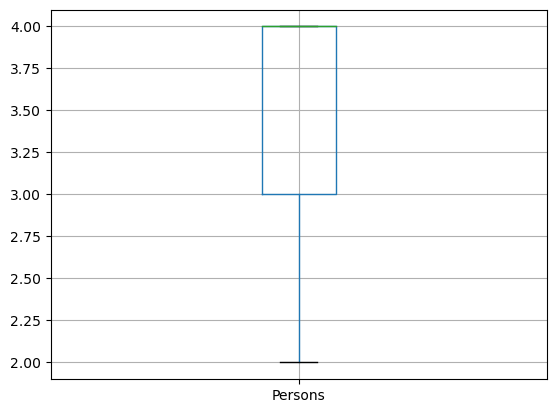

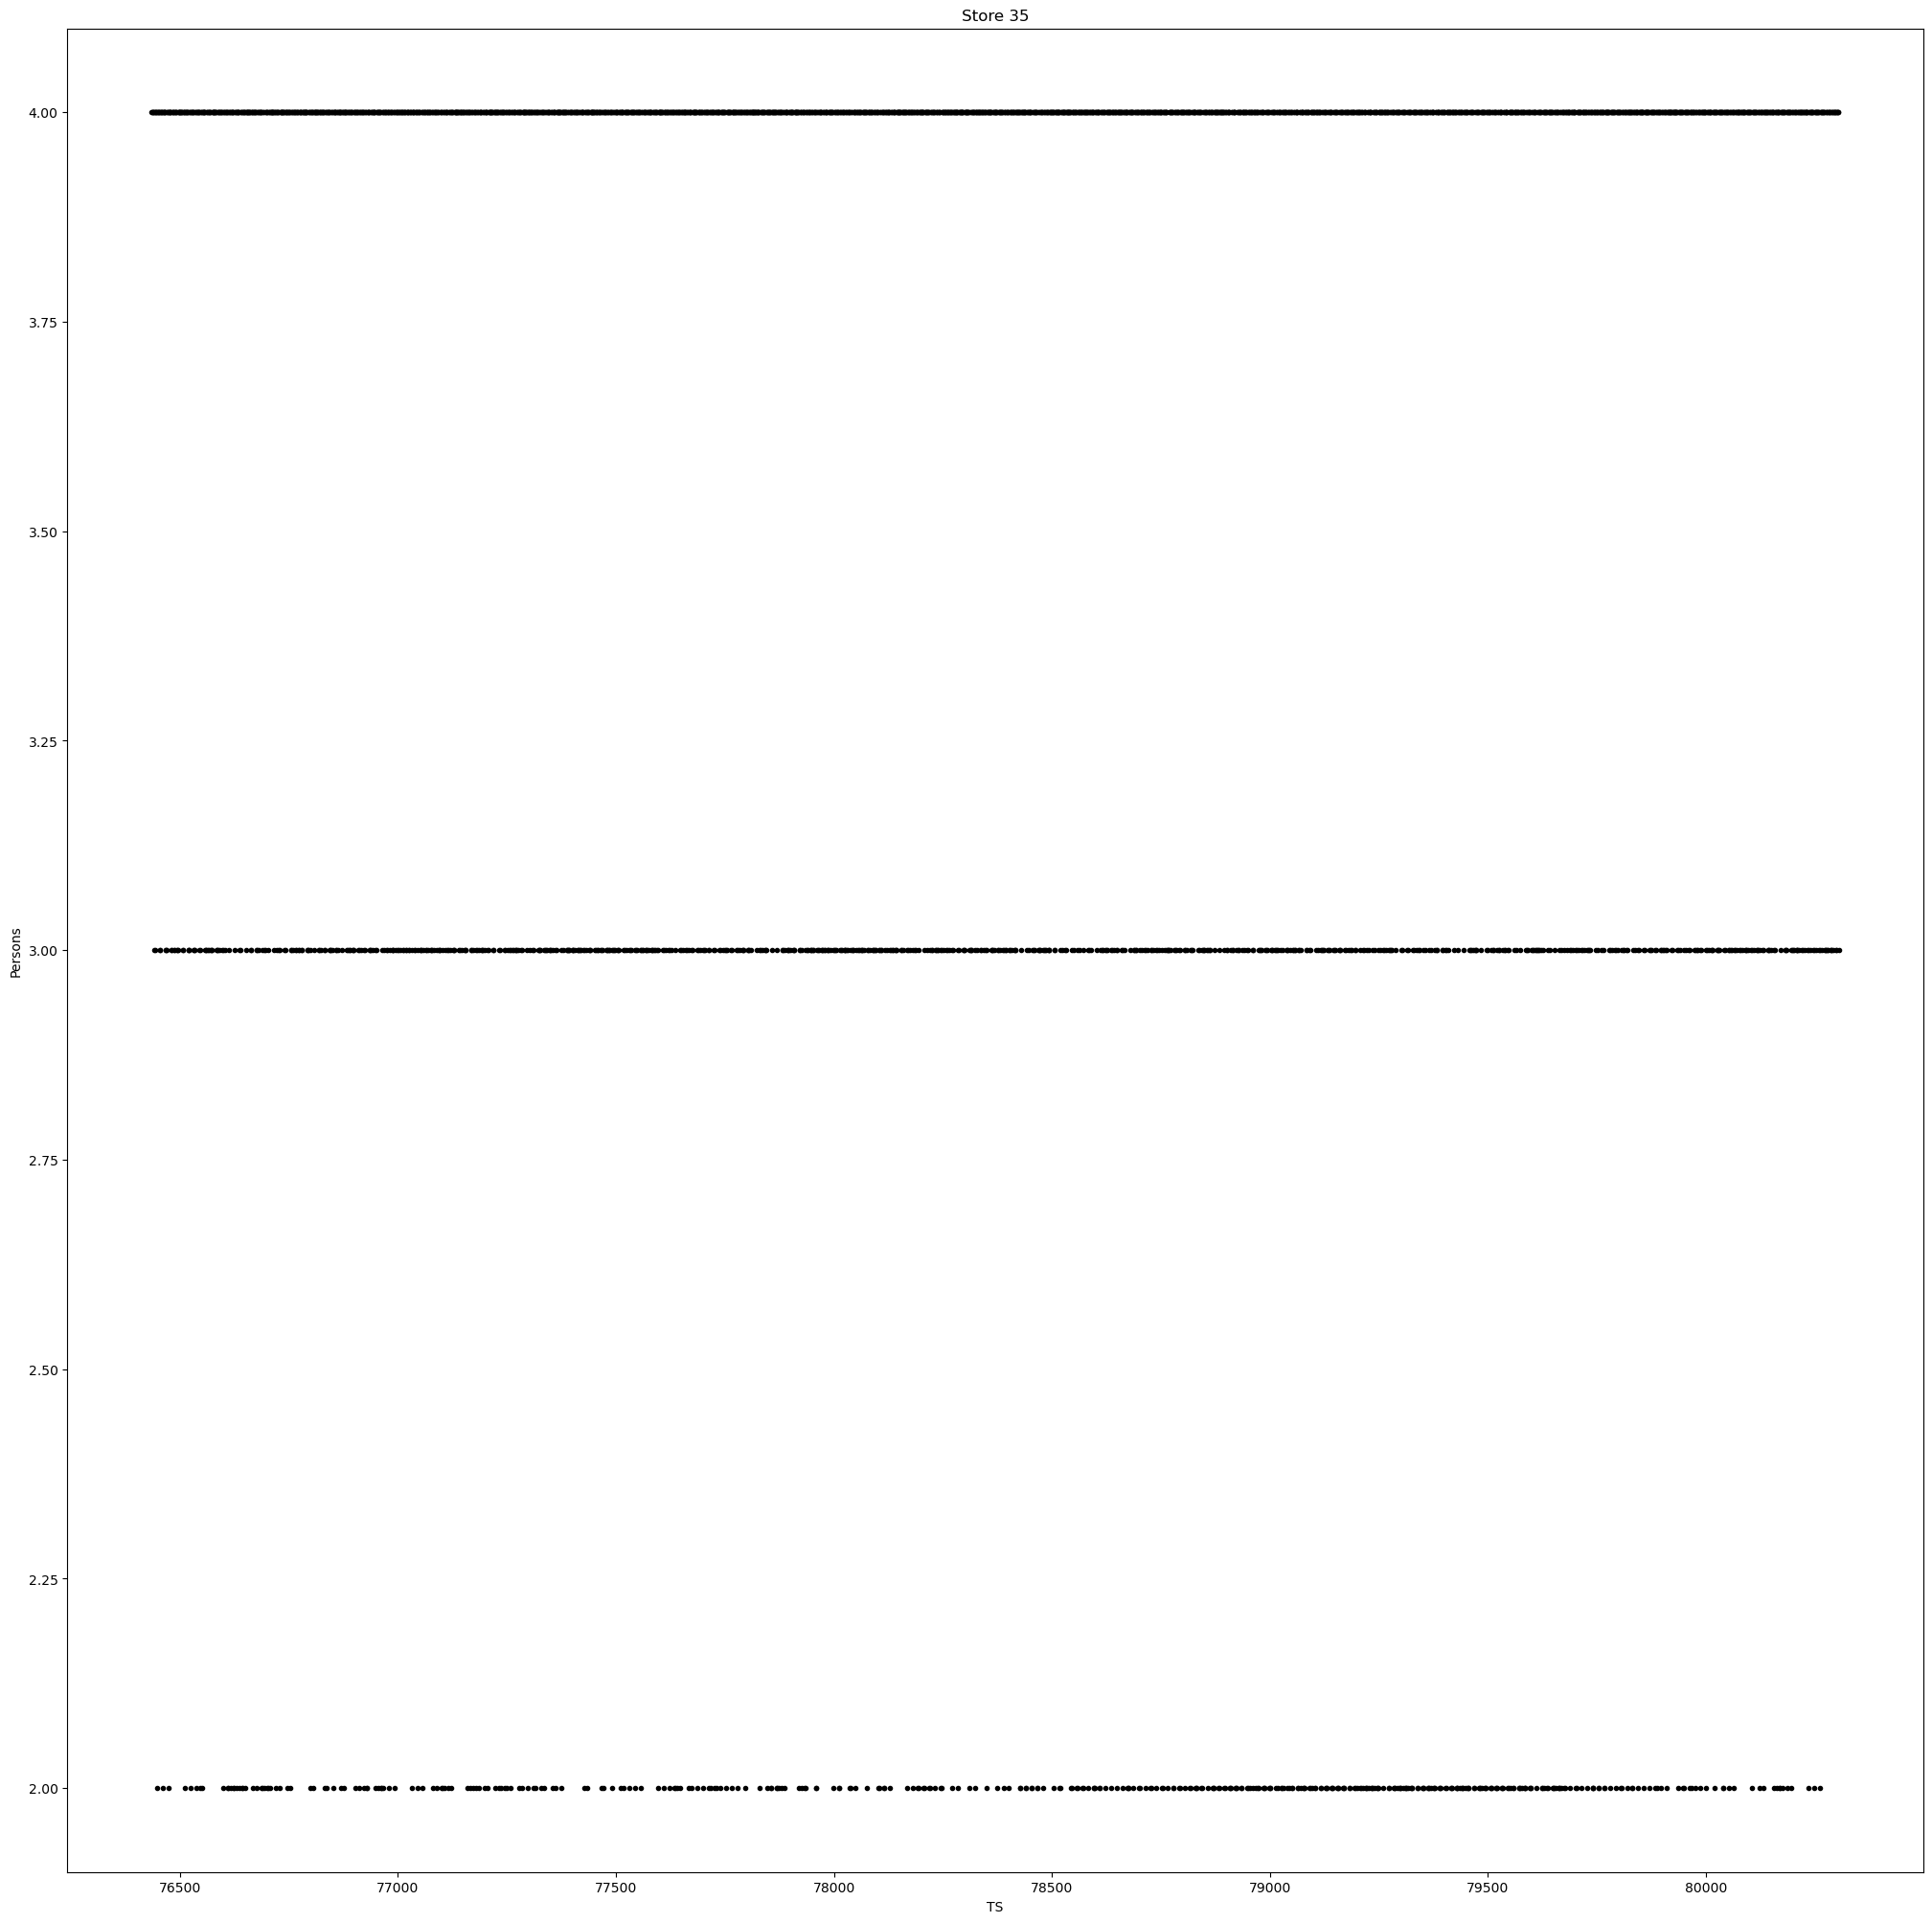

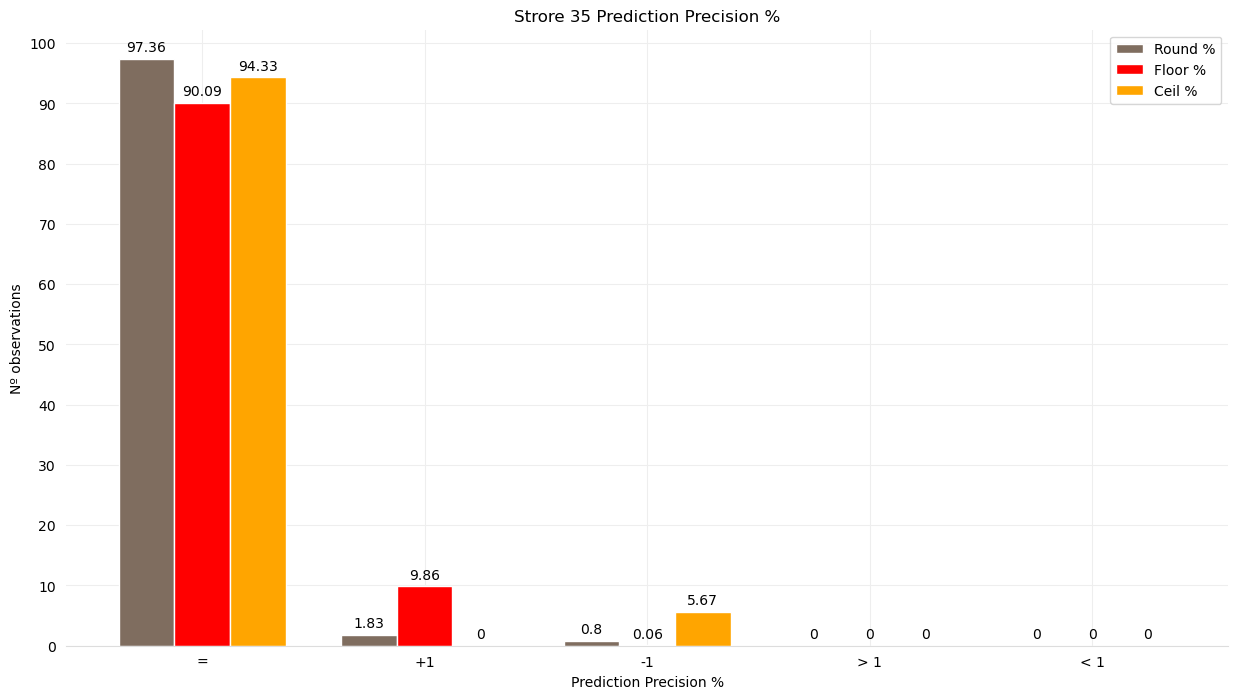

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       1699 |         32 |         14 |          0 |          0  
  Floor                |       1572 |        172 |          1 |          0 |          0  
  Ceil                 |       1646 |          0 |         99 |          0 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      97.36 |       1.83 |        0.8 |        0.0 |        0.0  
  Floor % 

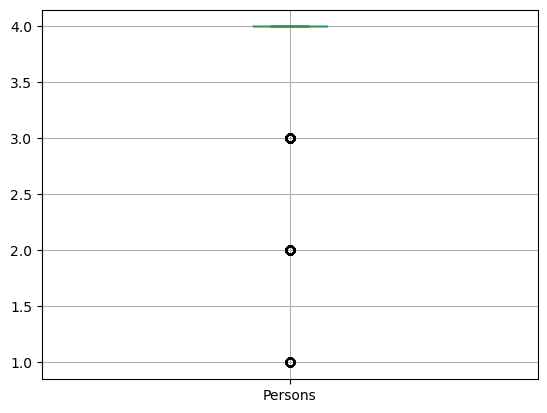

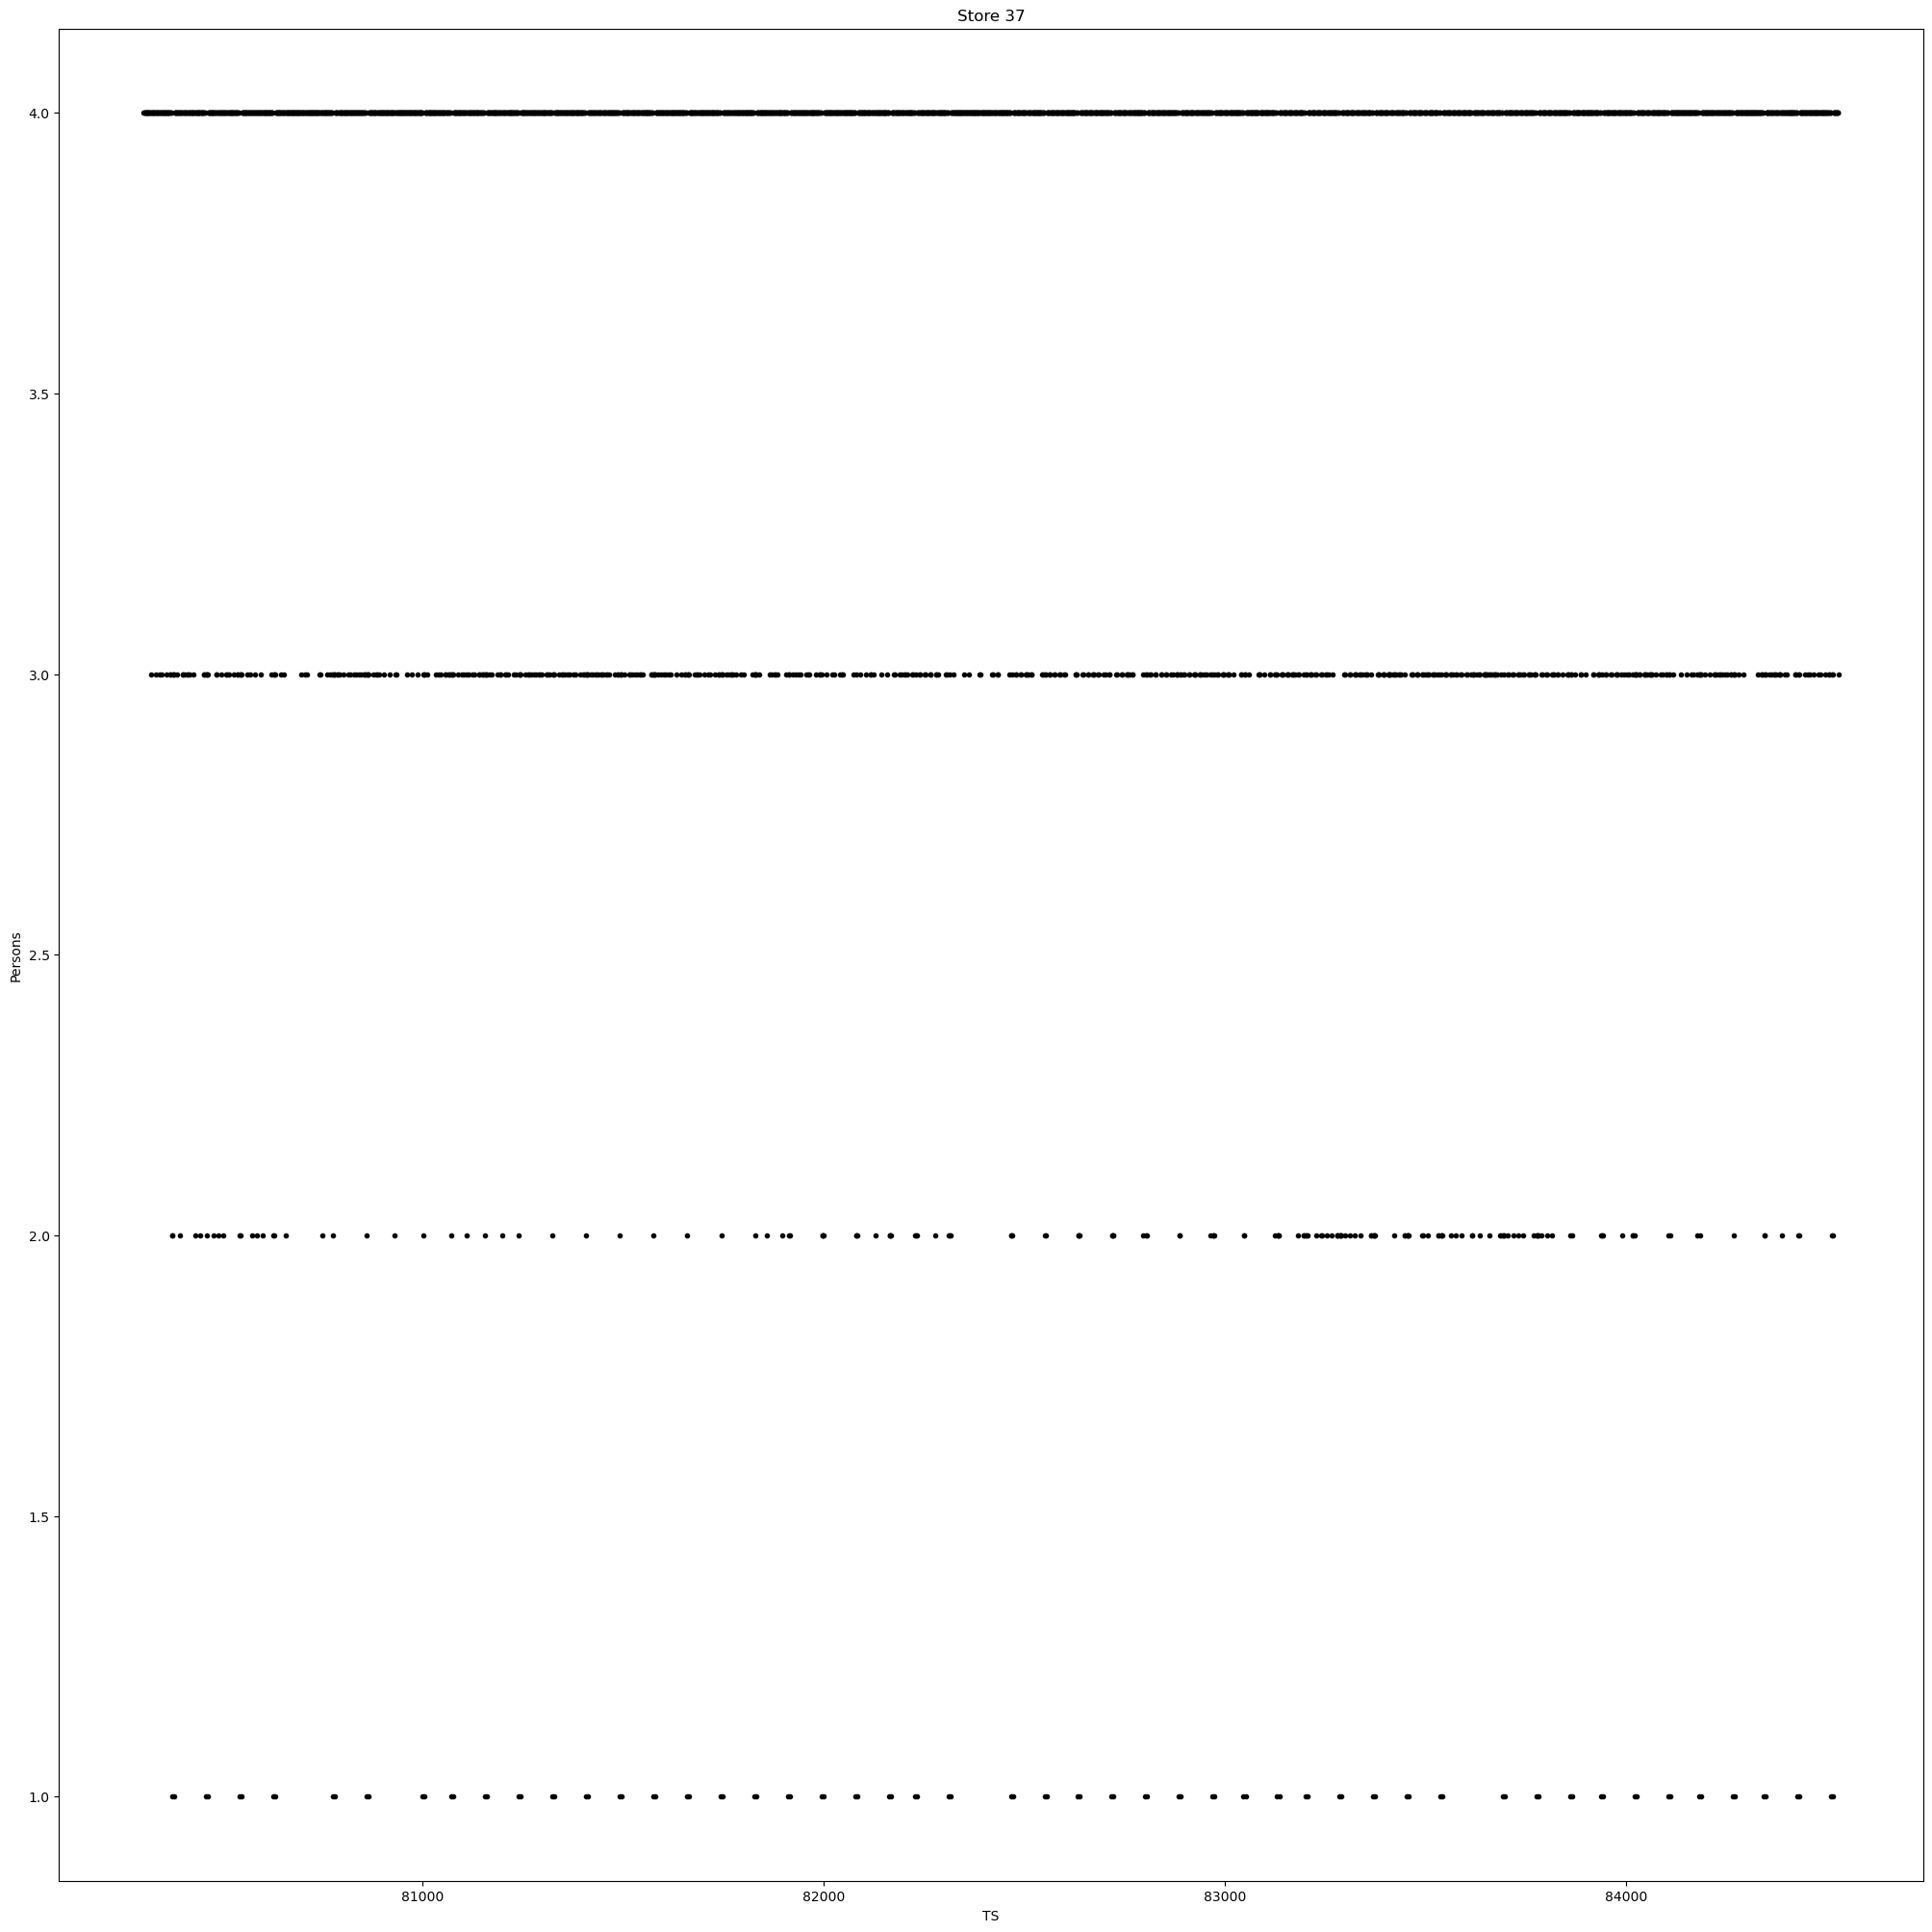

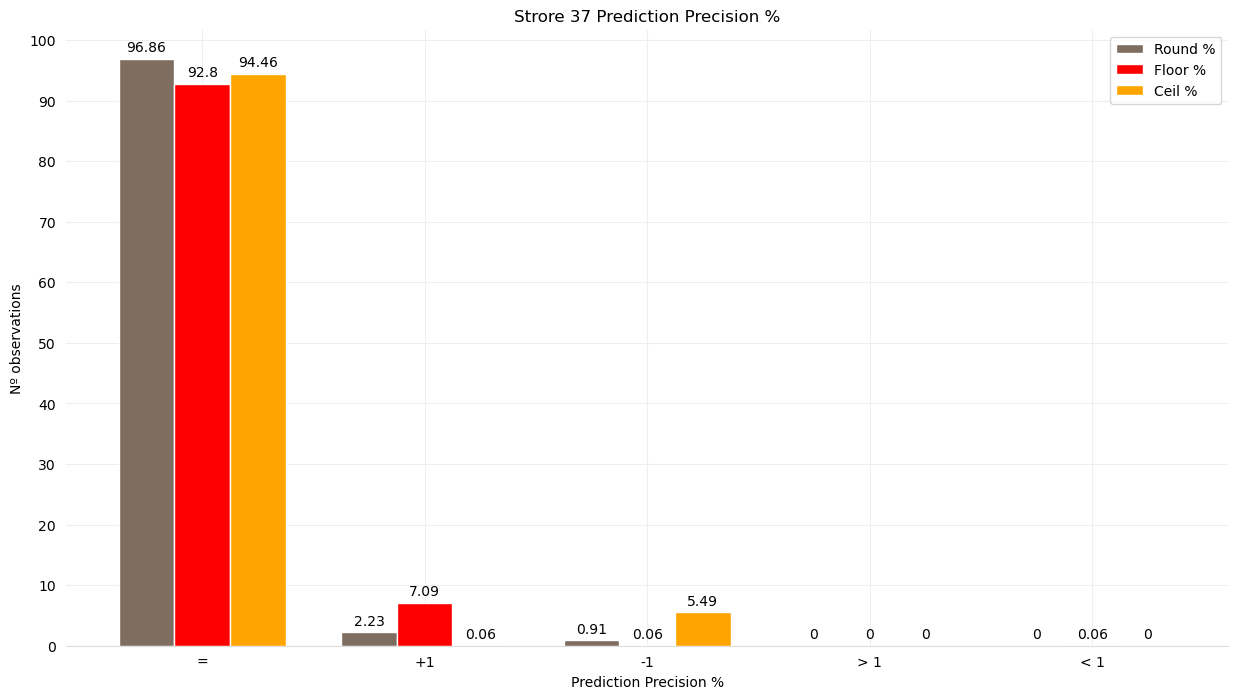

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       1695 |         39 |         16 |          0 |          0  
  Floor                |       1624 |        124 |          1 |          0 |          1  
  Ceil                 |       1653 |          1 |         96 |          0 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      96.86 |       2.23 |       0.91 |        0.0 |        0.0  
  Floor % 

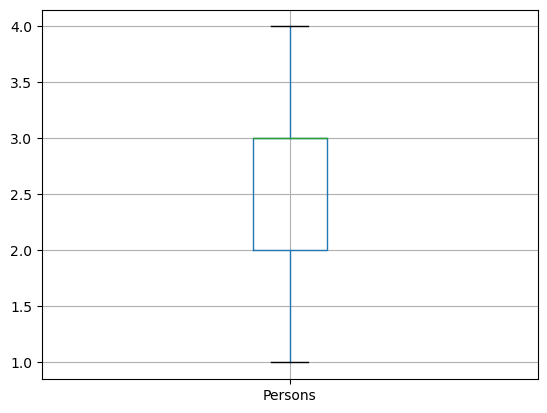

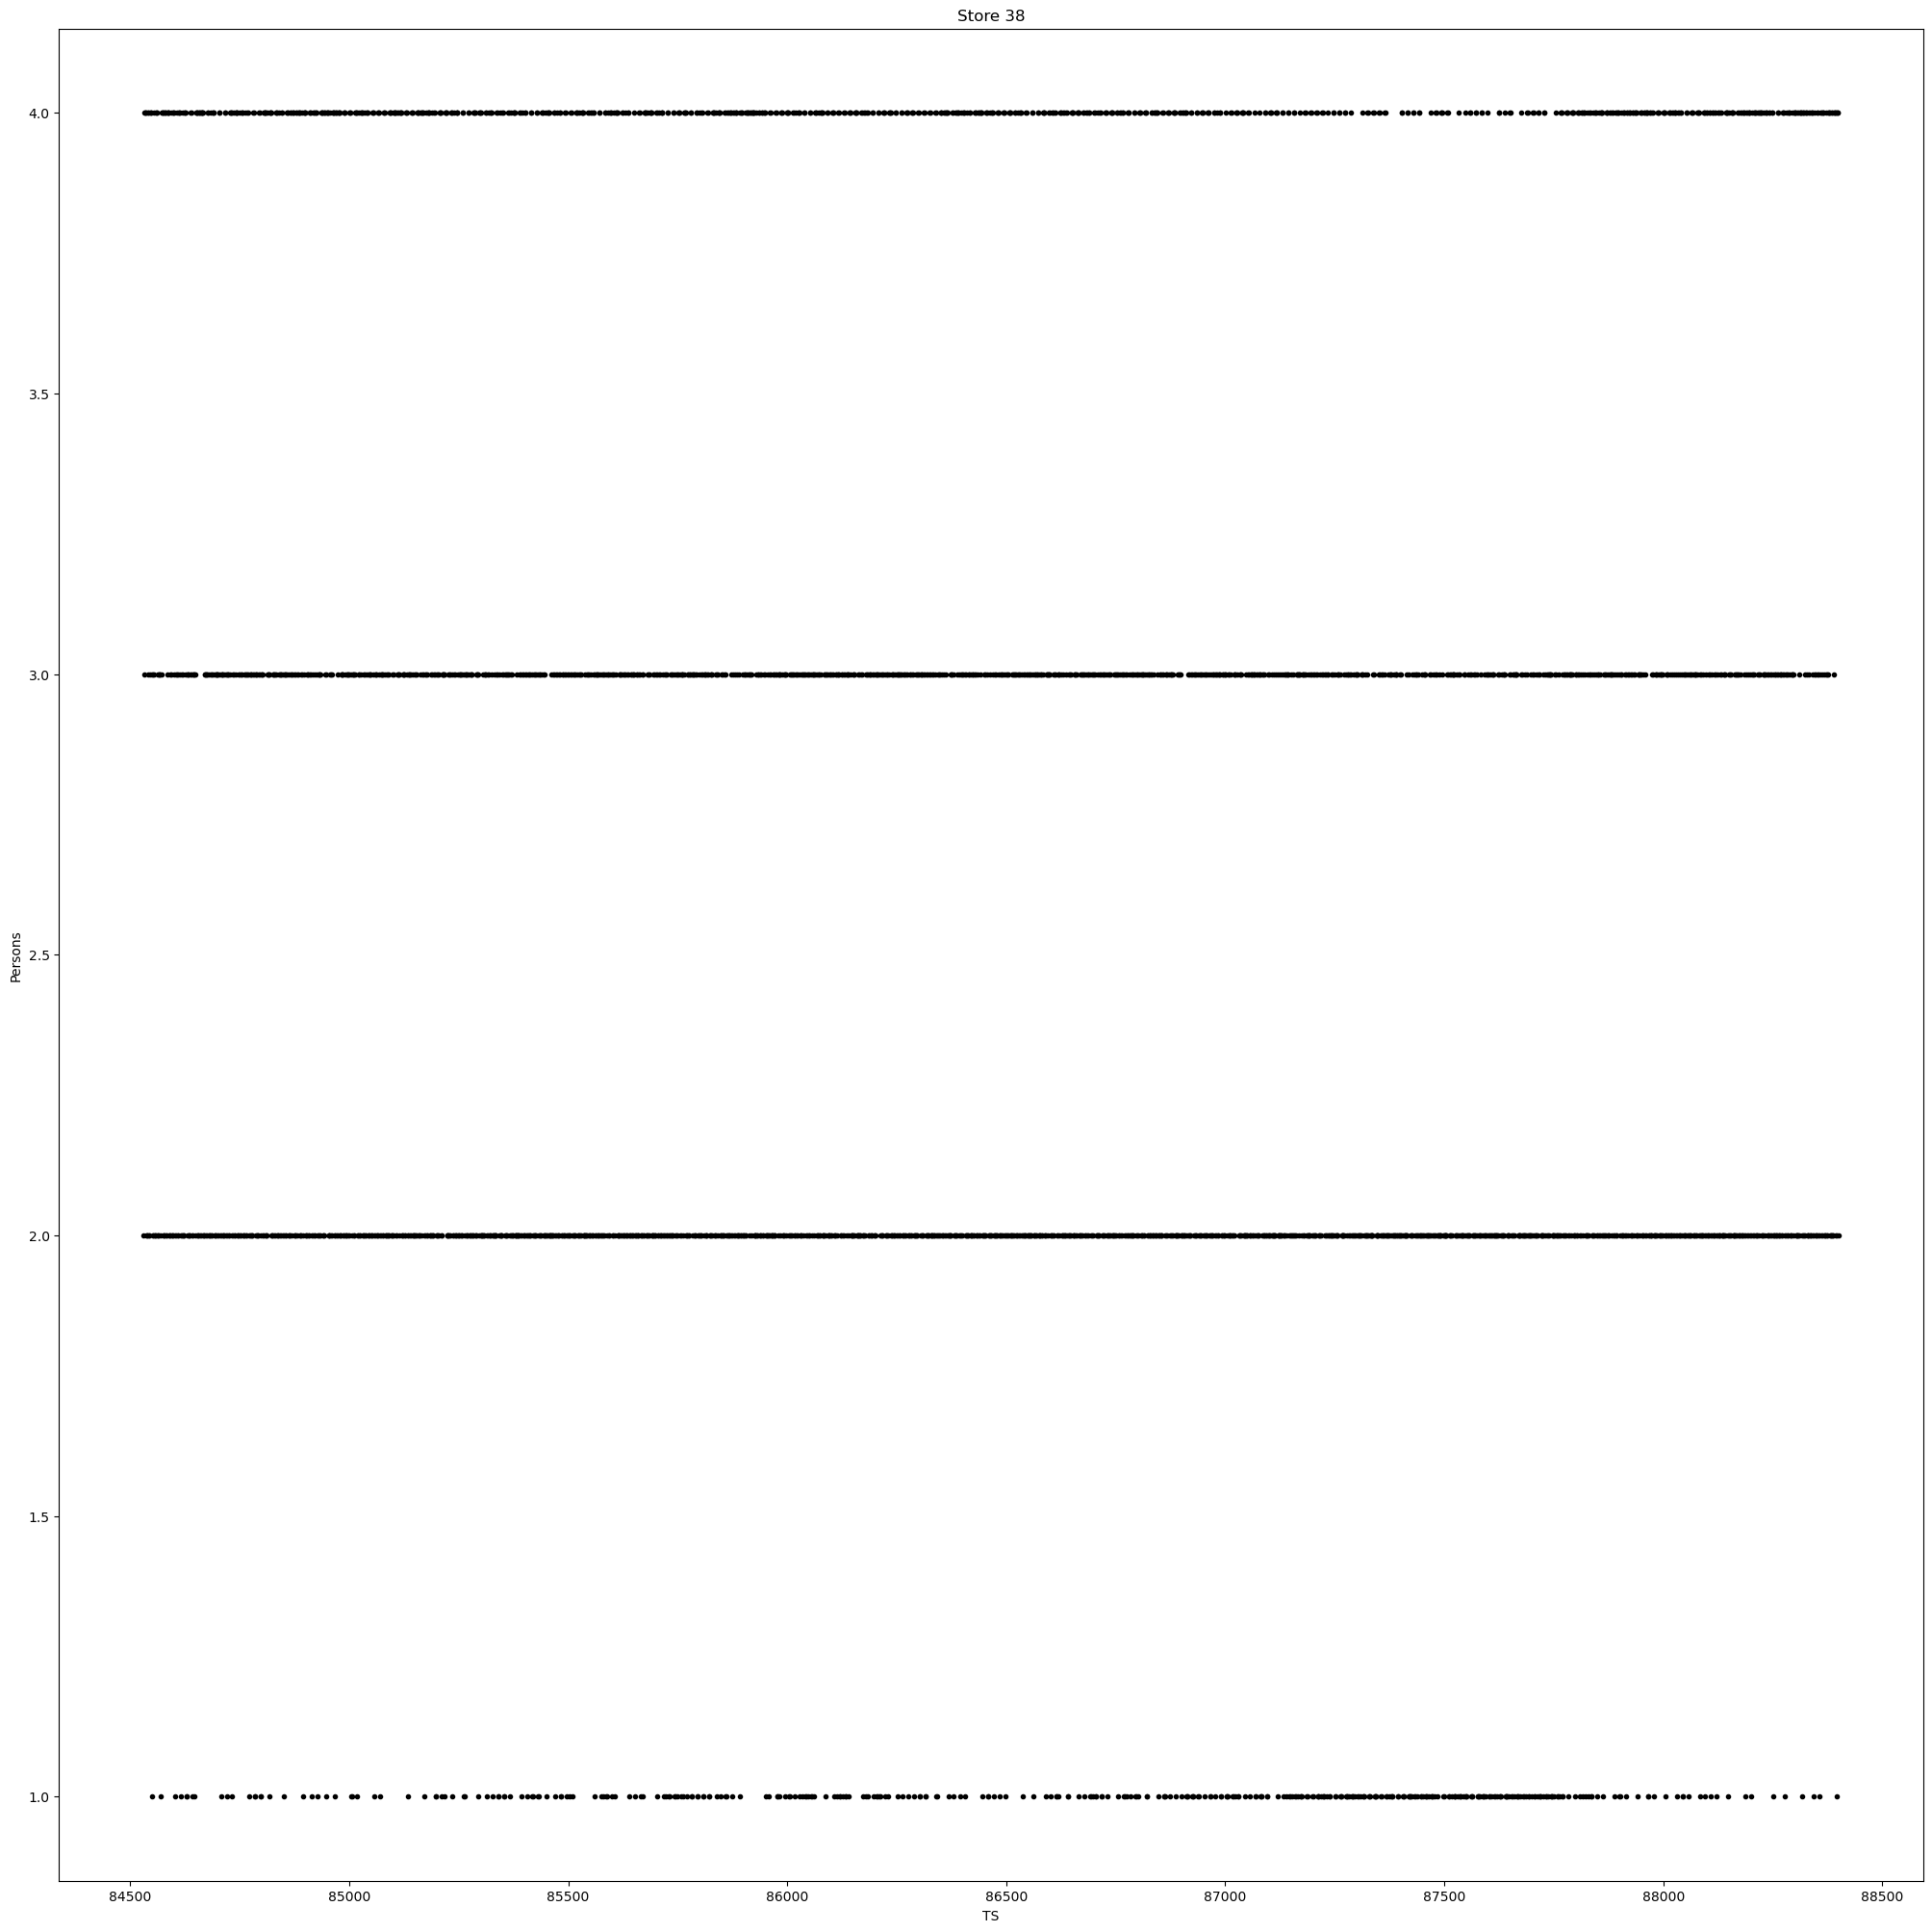

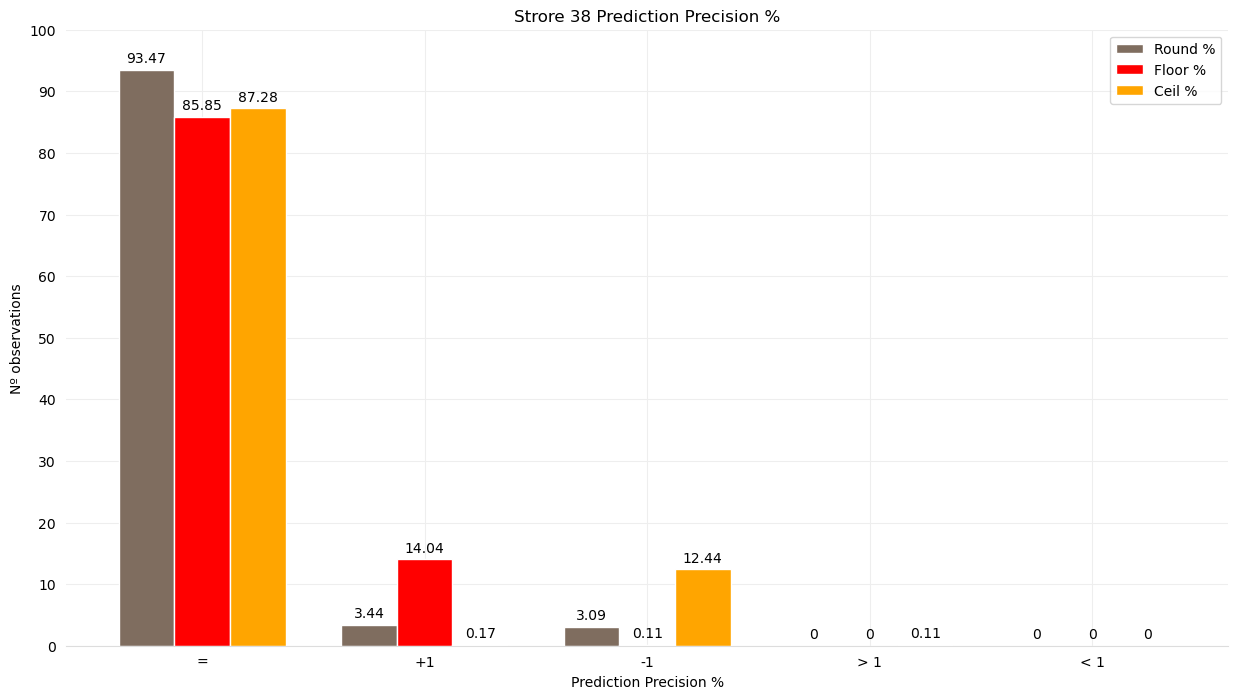

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       1631 |         60 |         54 |          0 |          0  
  Floor                |       1498 |        245 |          2 |          0 |          0  
  Ceil                 |       1523 |          3 |        217 |          2 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      93.47 |       3.44 |       3.09 |        0.0 |        0.0  
  Floor % 

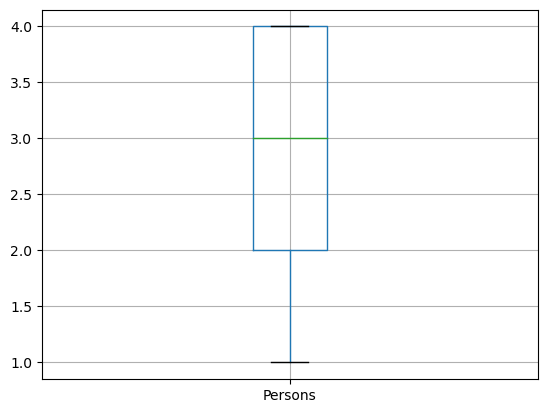

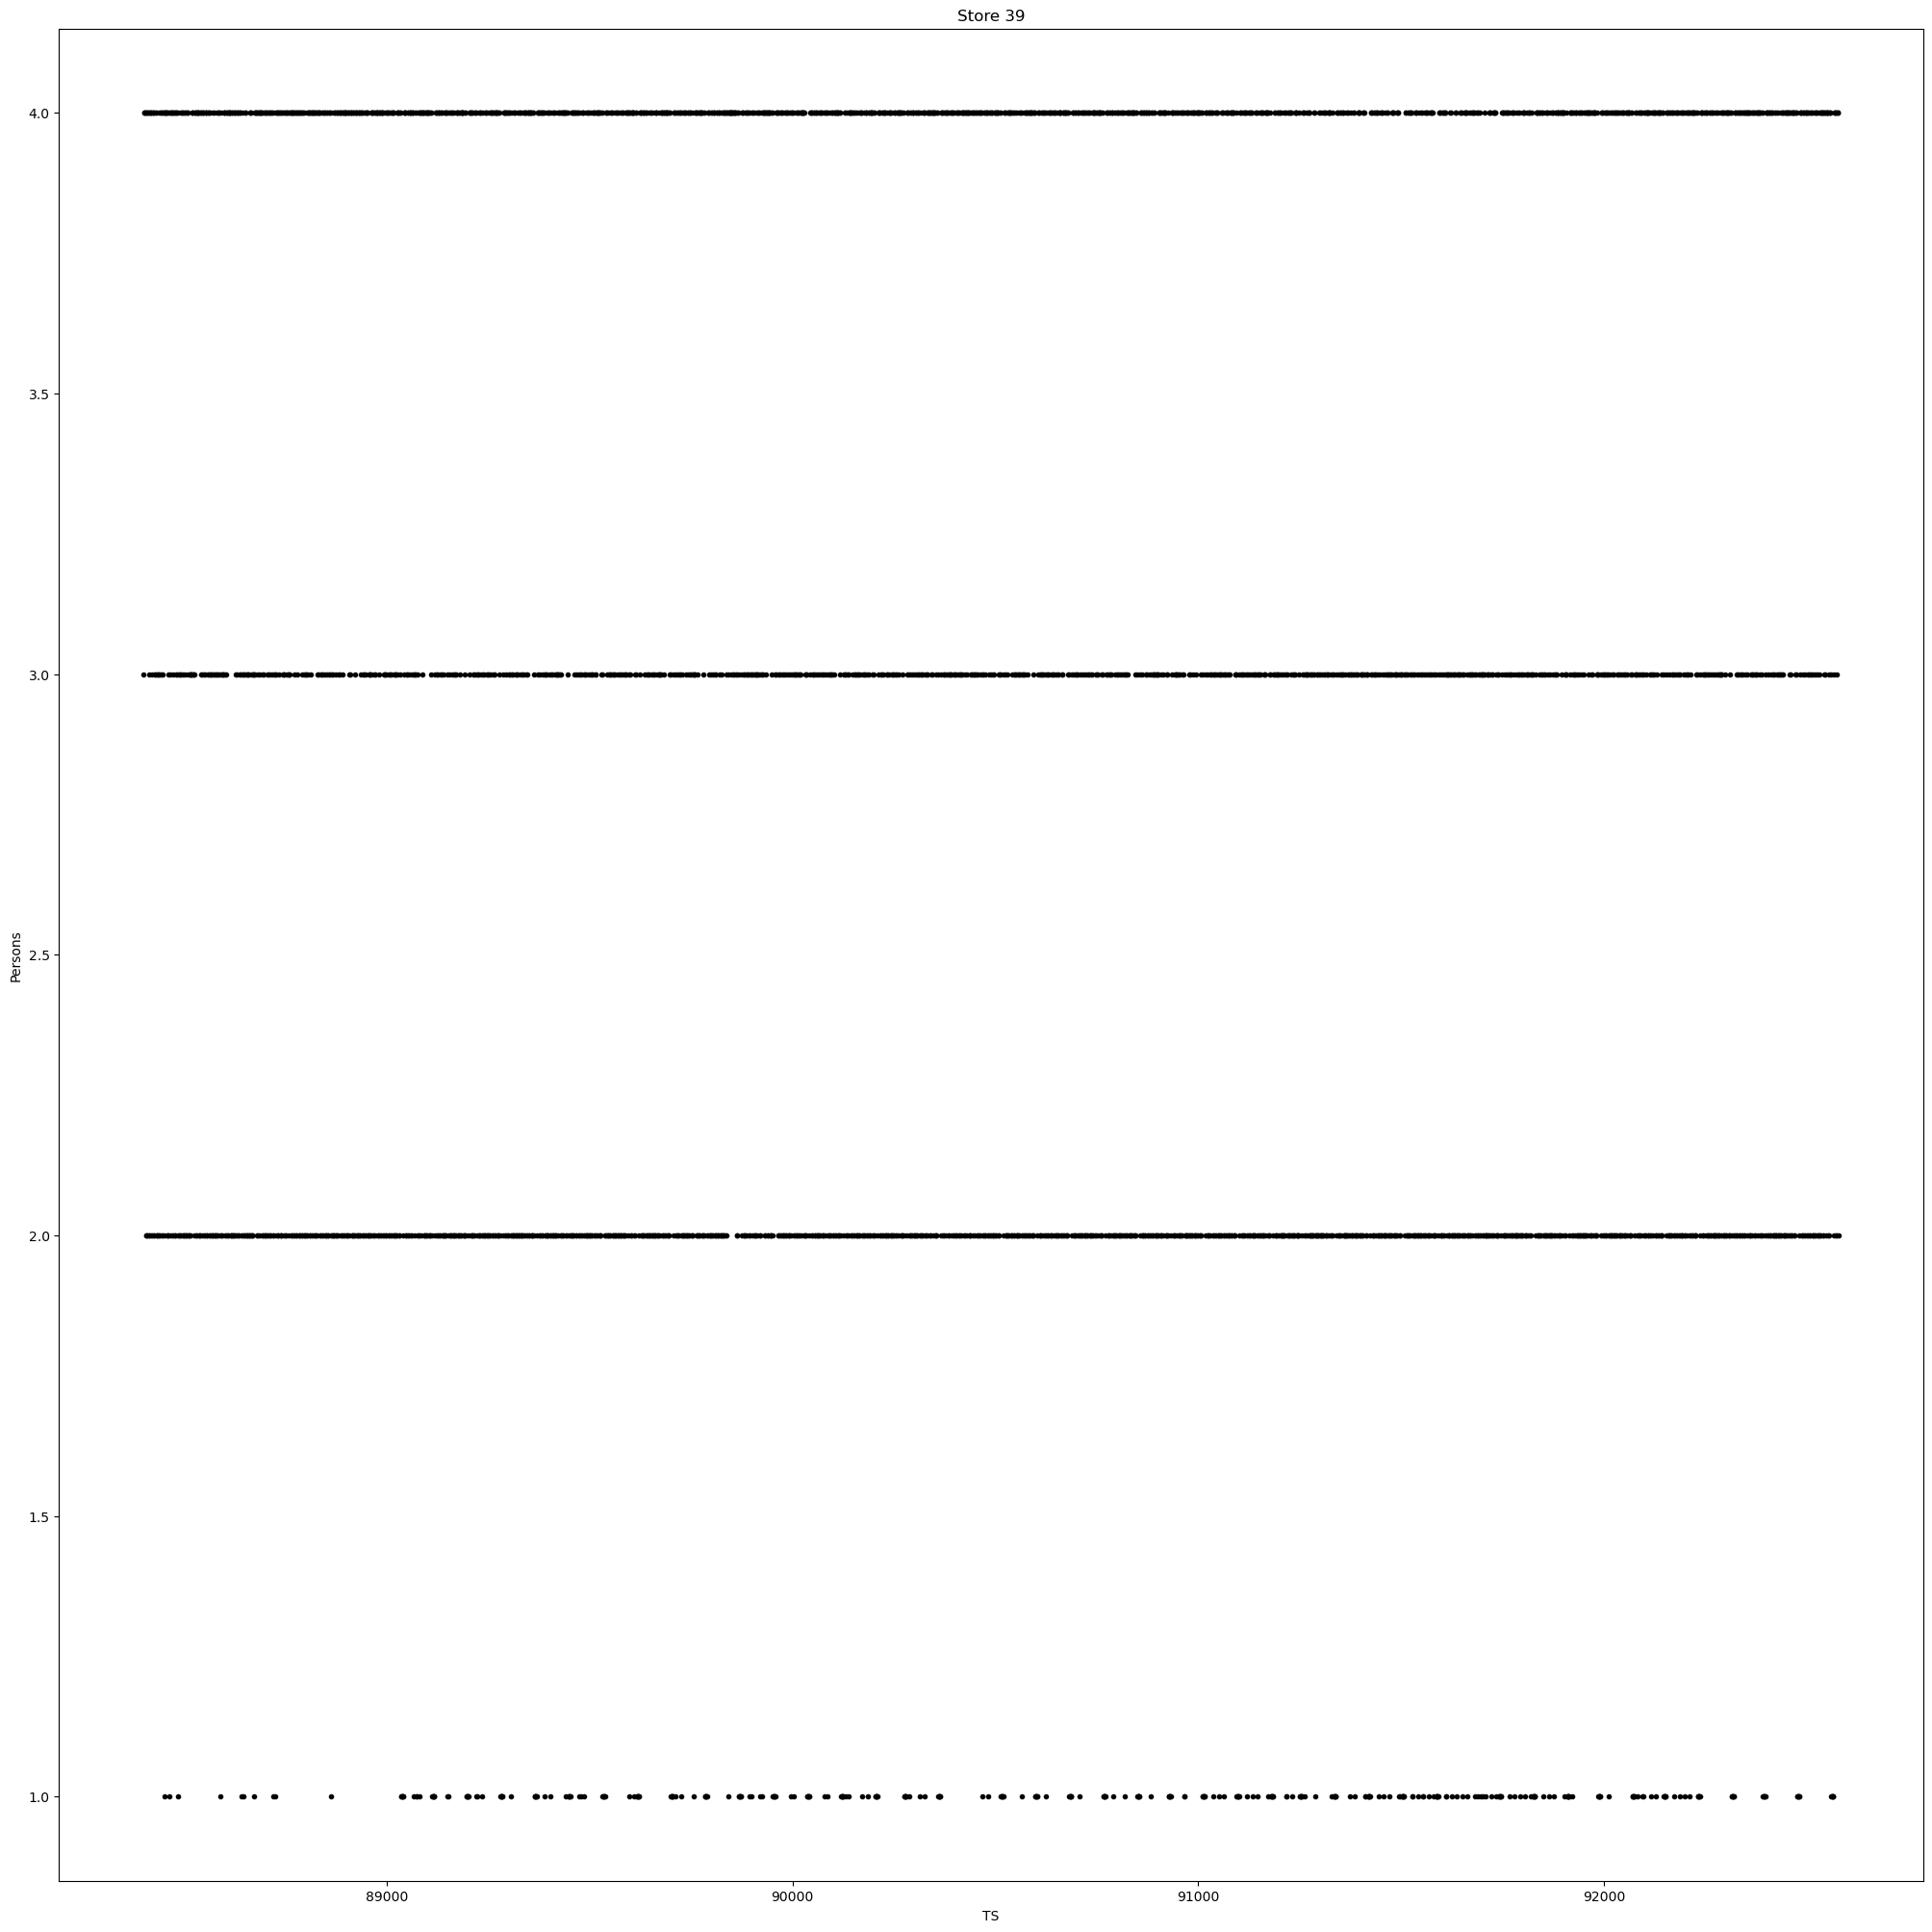

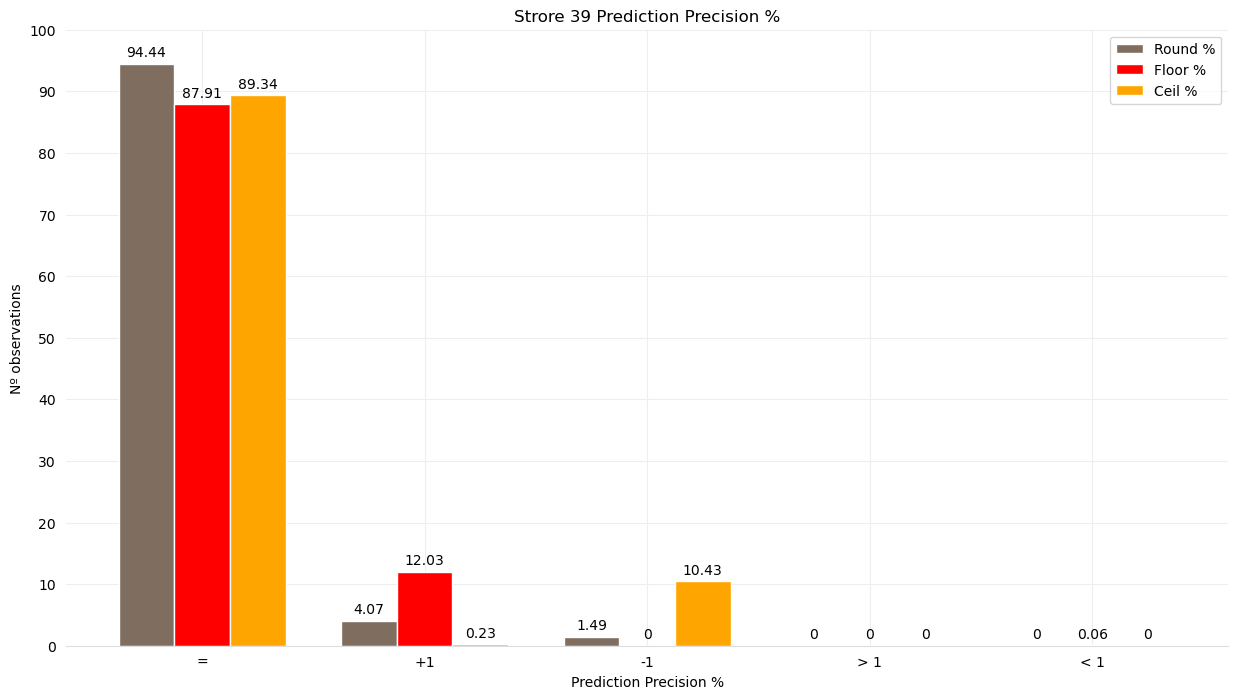

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       1648 |         71 |         26 |          0 |          0  
  Floor                |       1534 |        210 |          0 |          0 |          1  
  Ceil                 |       1559 |          4 |        182 |          0 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      94.44 |       4.07 |       1.49 |        0.0 |        0.0  
  Floor % 

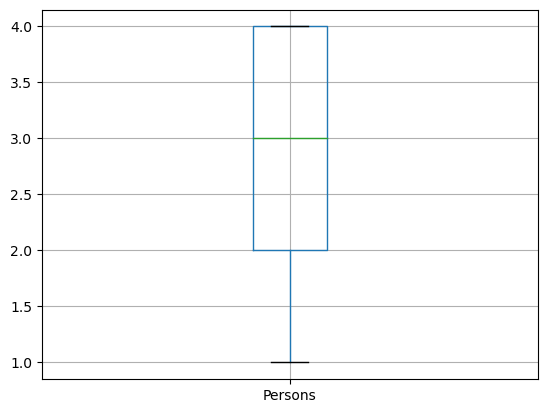

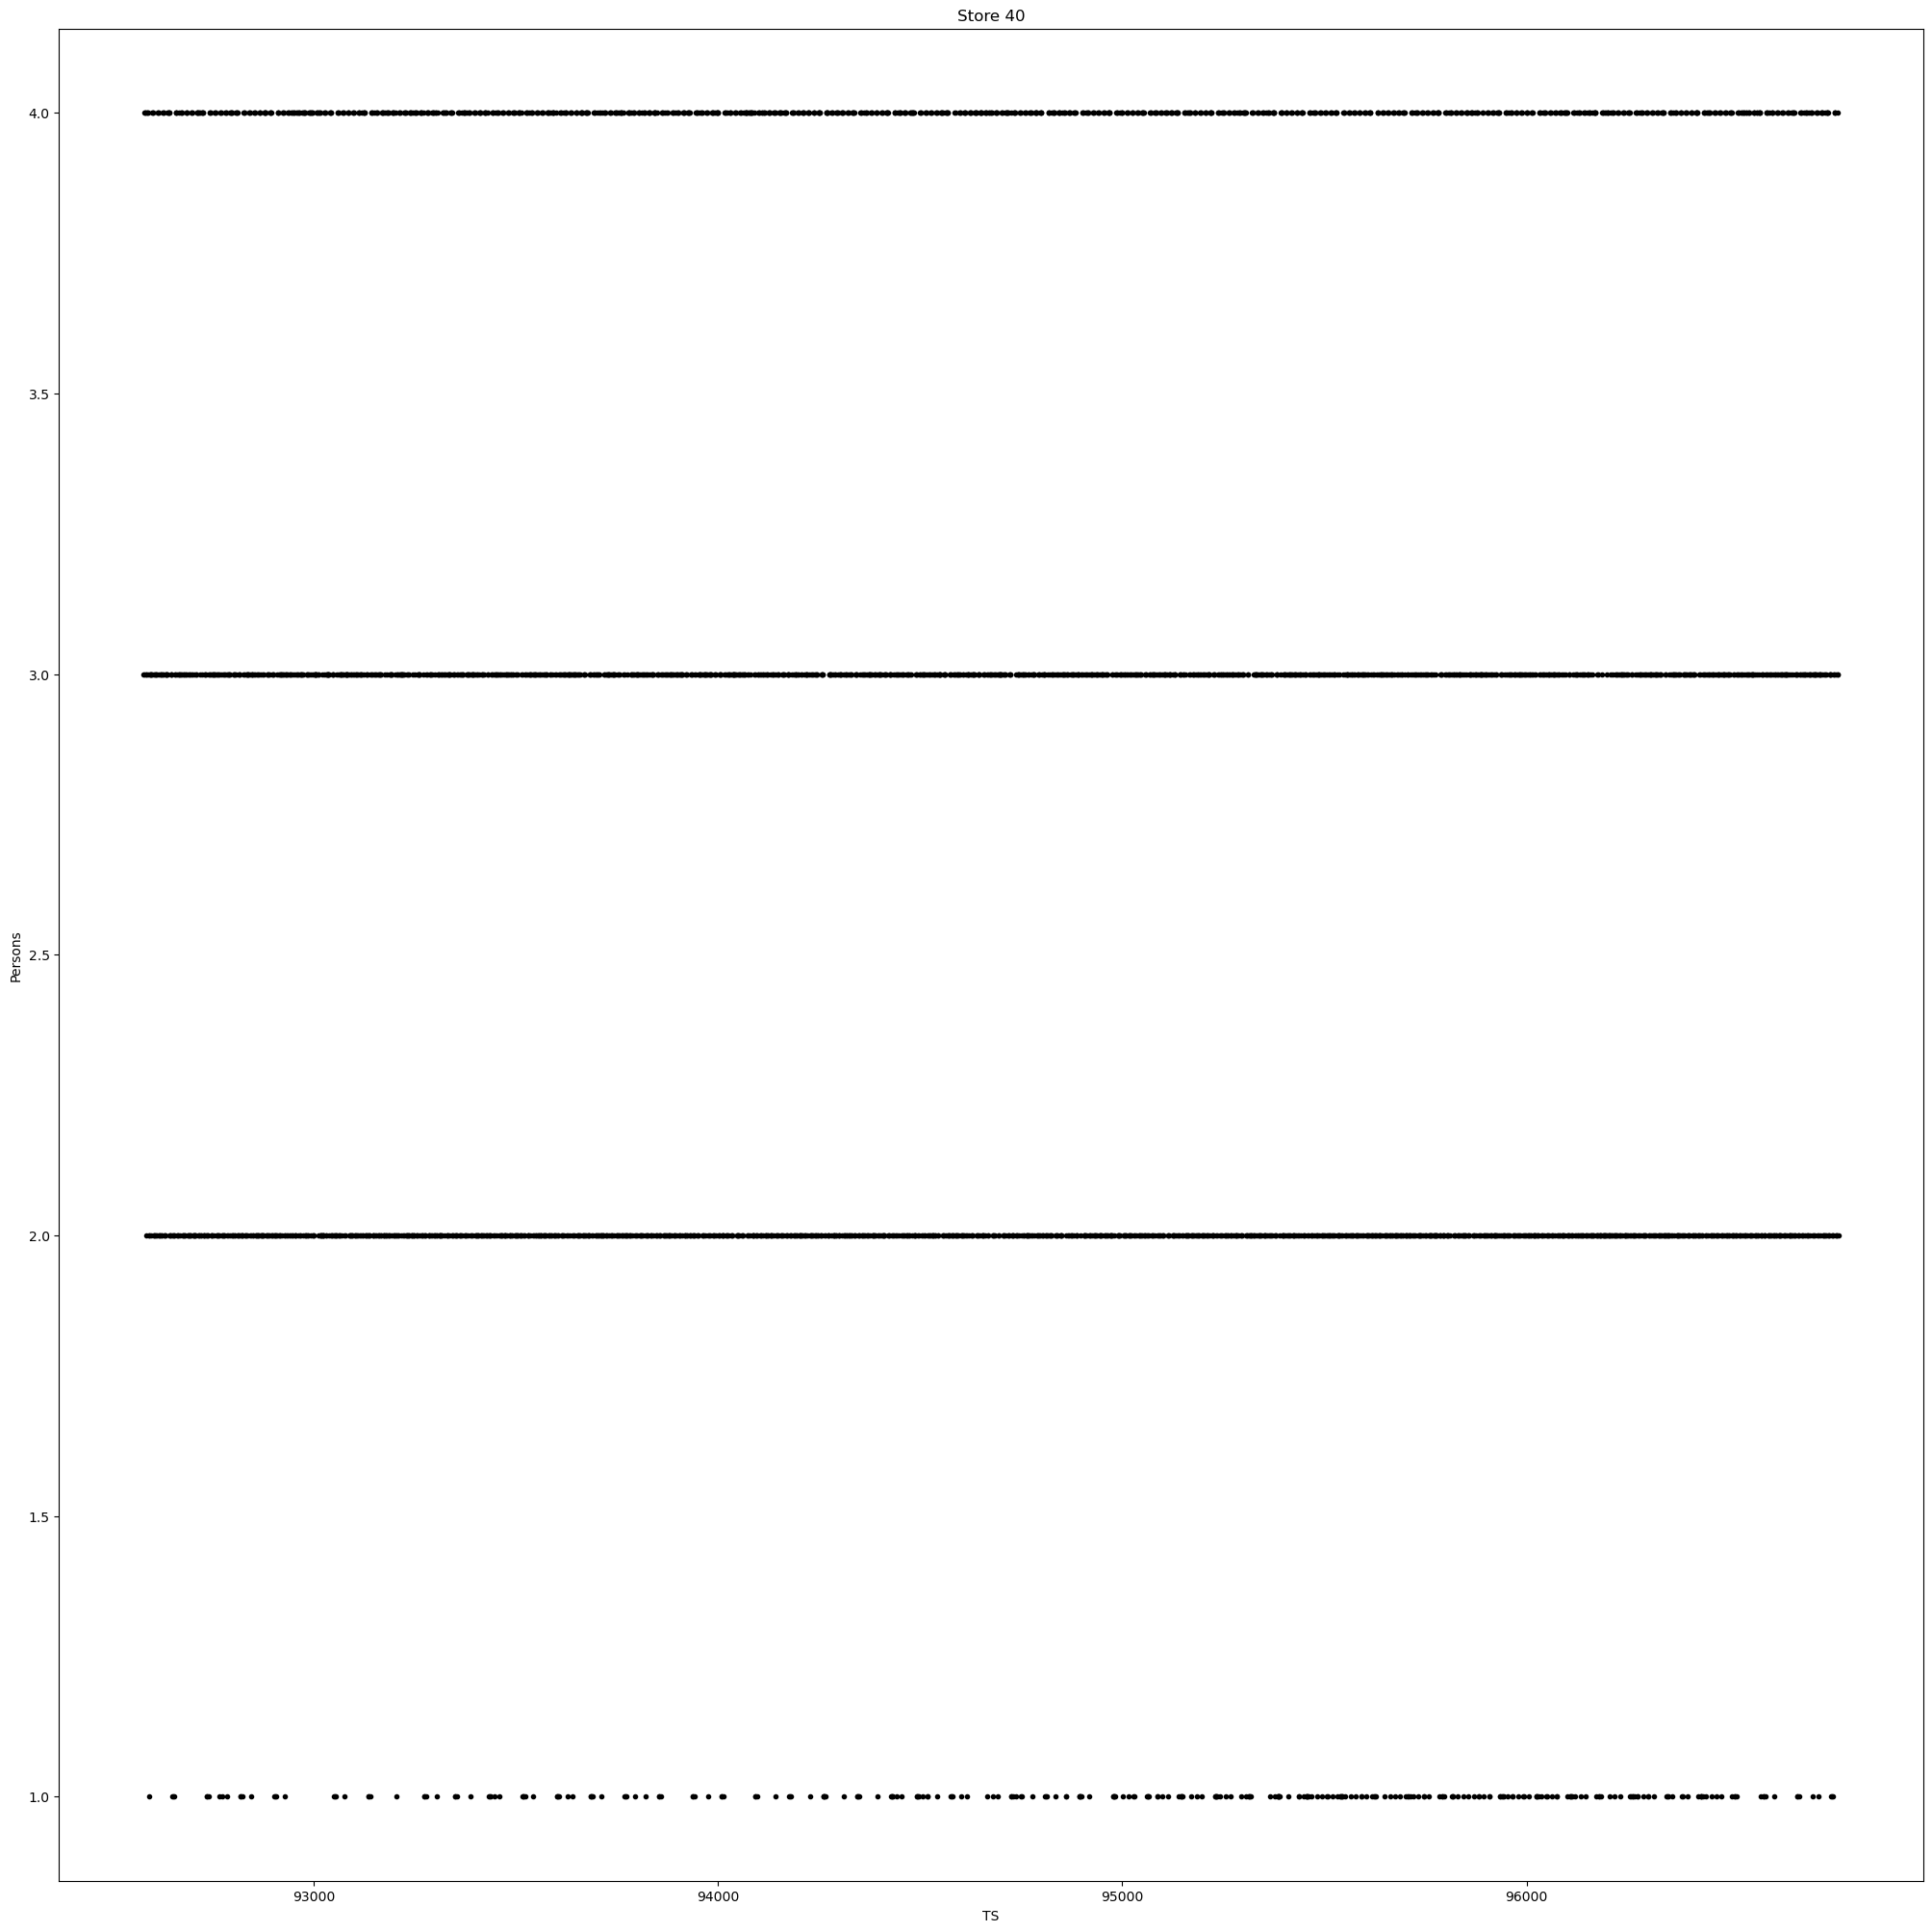

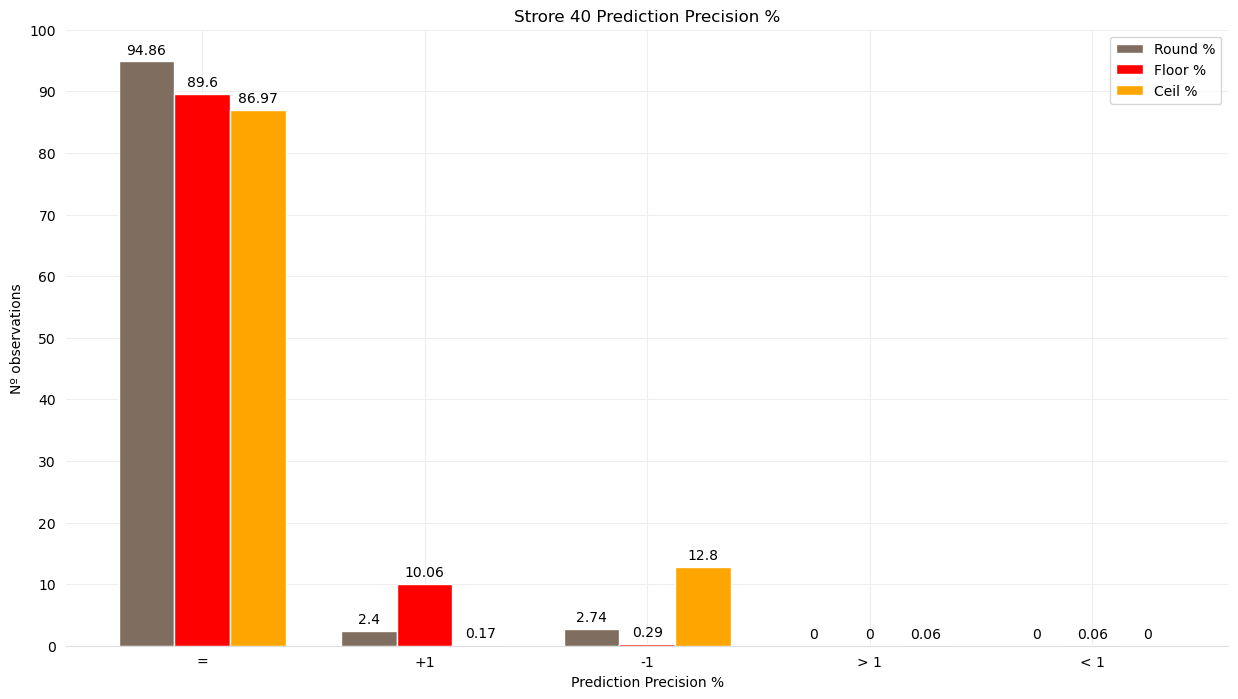

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       1660 |         42 |         48 |          0 |          0  
  Floor                |       1568 |        176 |          5 |          0 |          1  
  Ceil                 |       1522 |          3 |        224 |          1 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      94.86 |        2.4 |       2.74 |        0.0 |        0.0  
  Floor % 

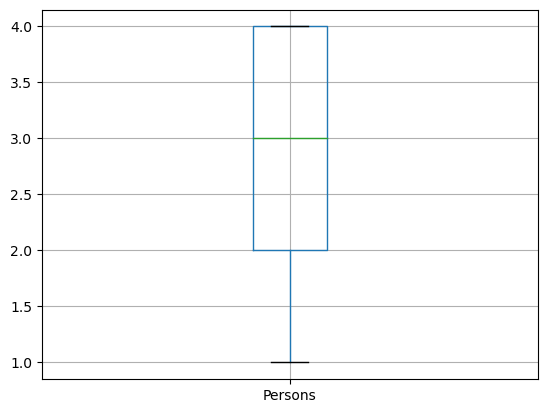

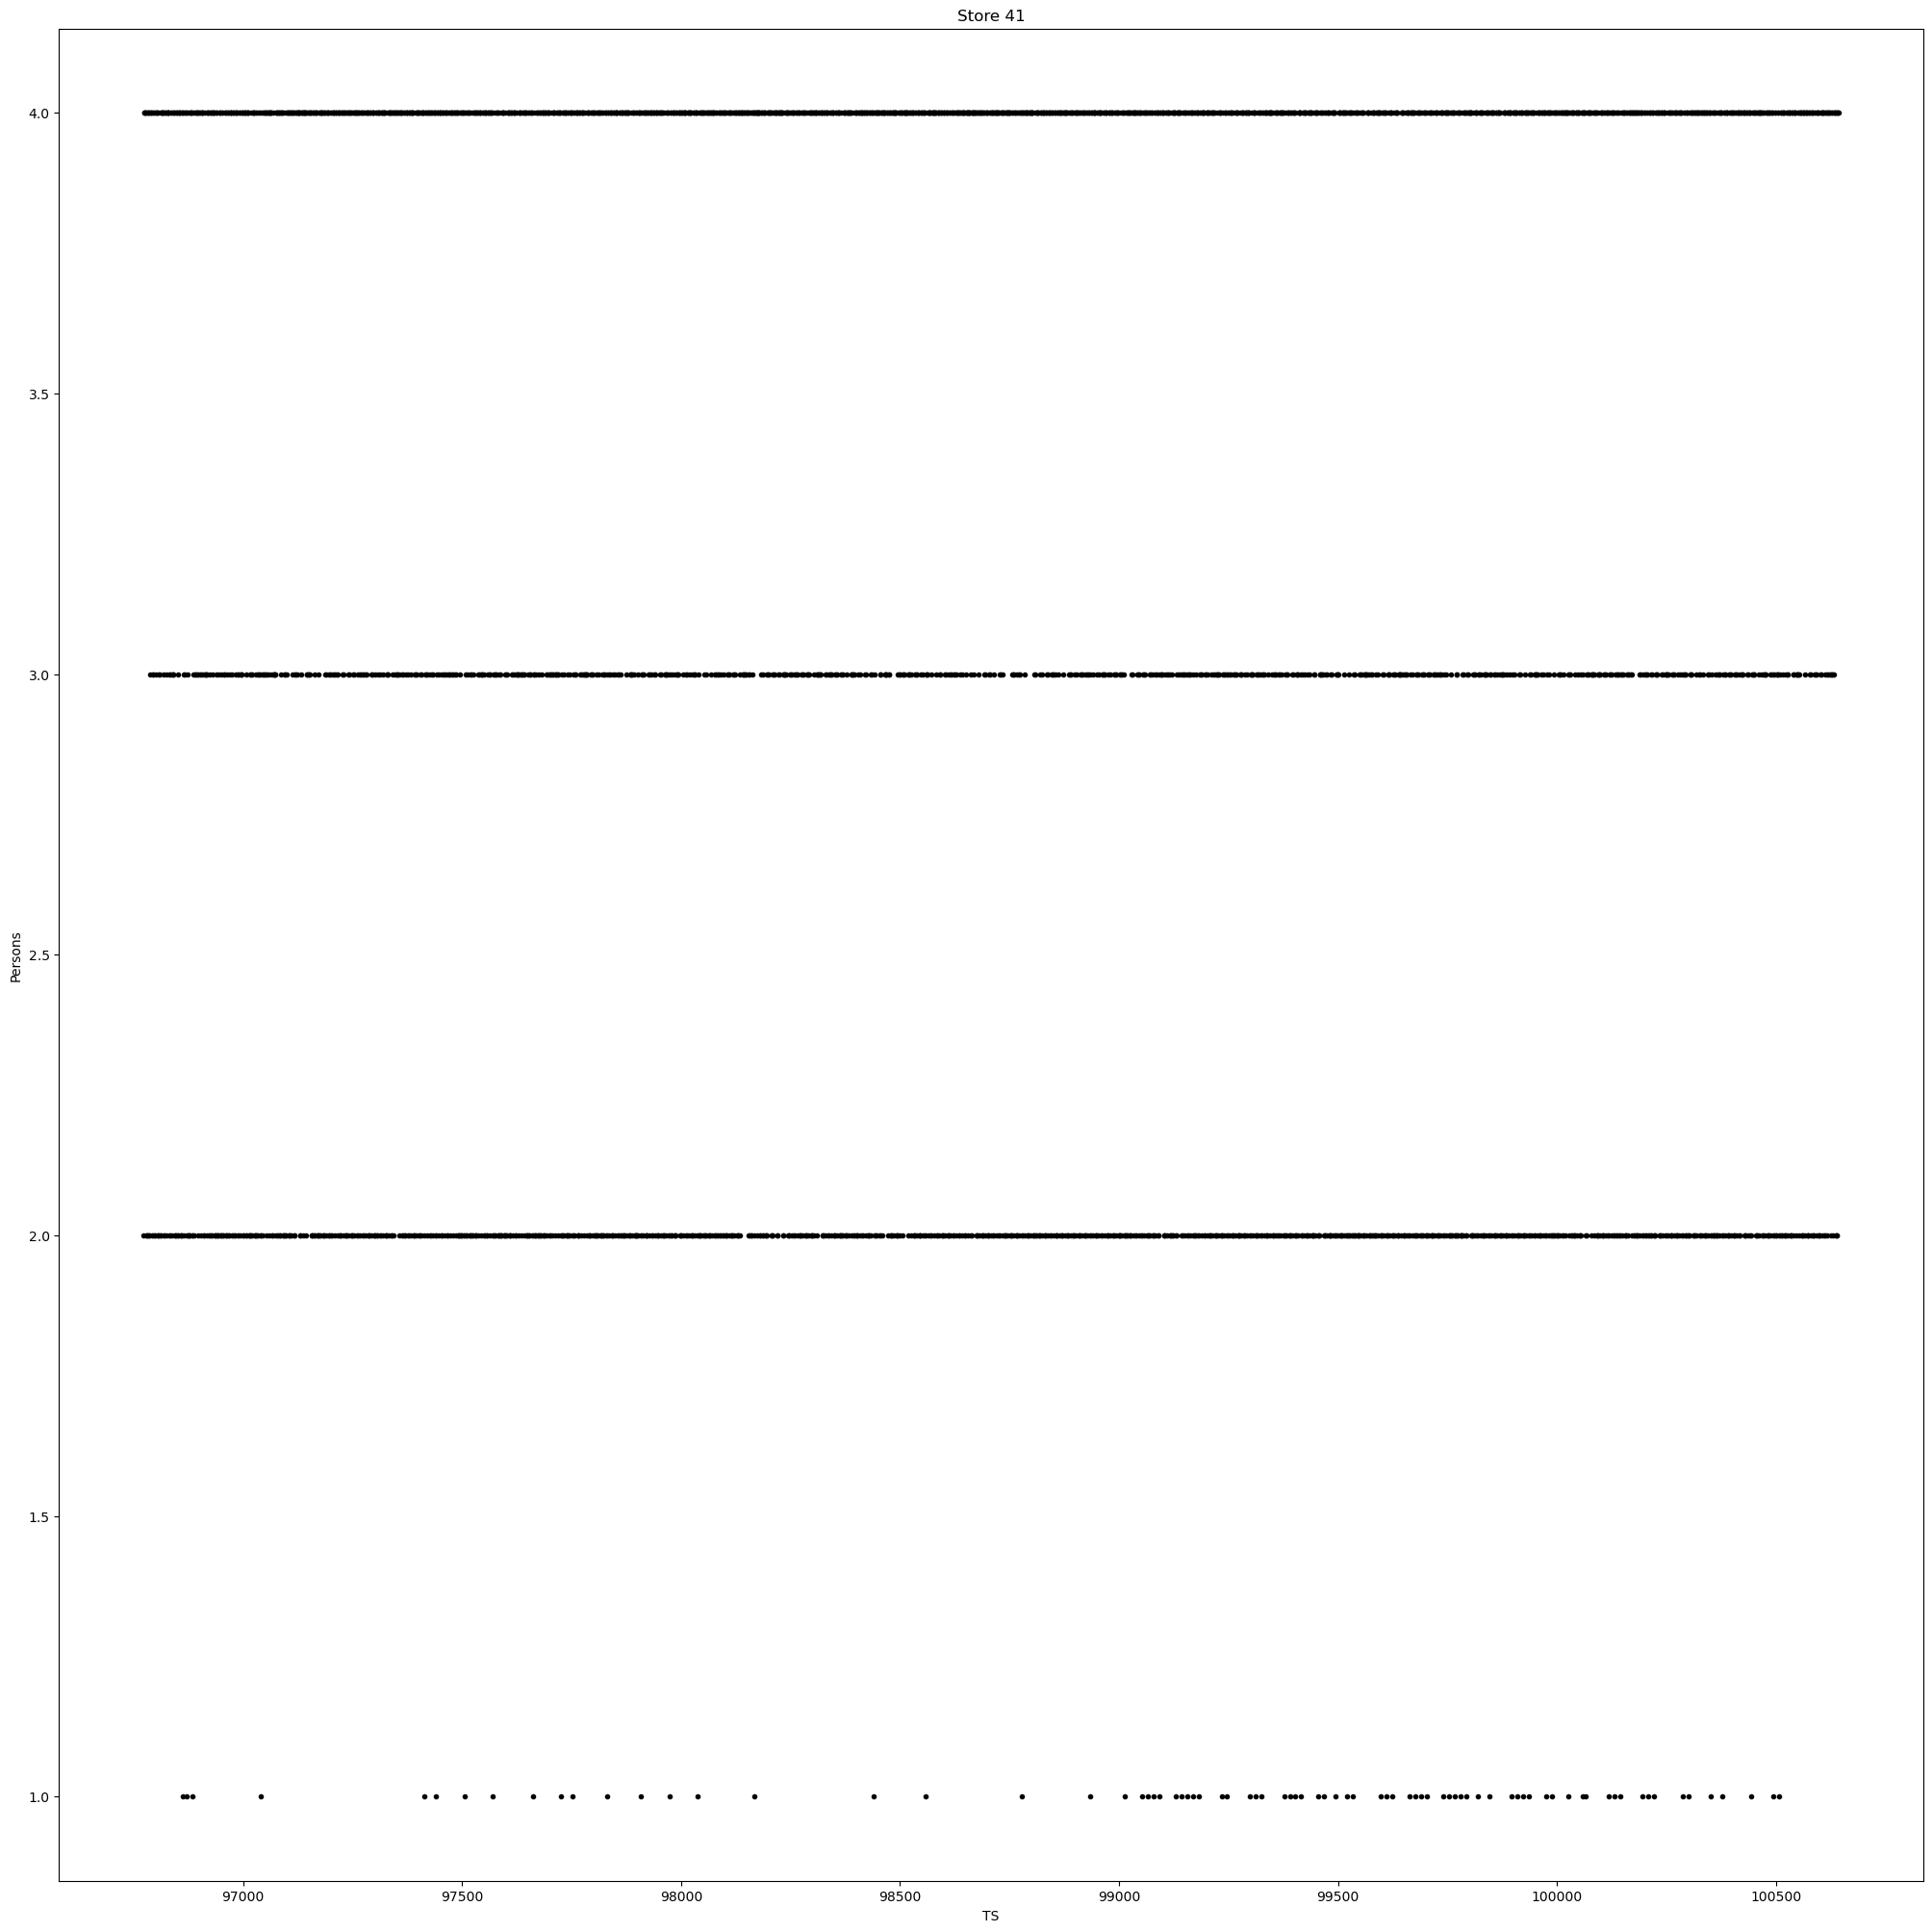

< 1: real: 4  estimated: 2
< 1: real: 4  estimated: 2


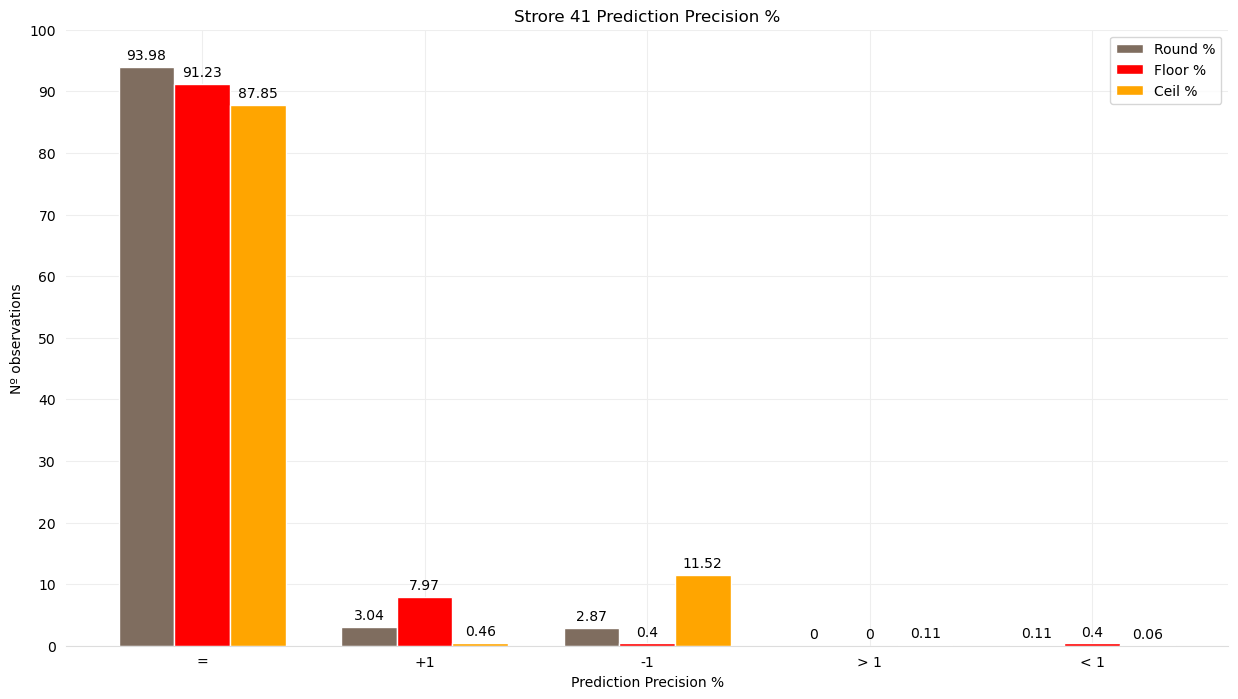

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       1640 |         53 |         50 |          0 |          2  
  Floor                |       1592 |        139 |          7 |          0 |          7  
  Ceil                 |       1533 |          8 |        201 |          2 |          1  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      93.98 |       3.04 |       2.87 |        0.0 |       0.11  
  Floor % 

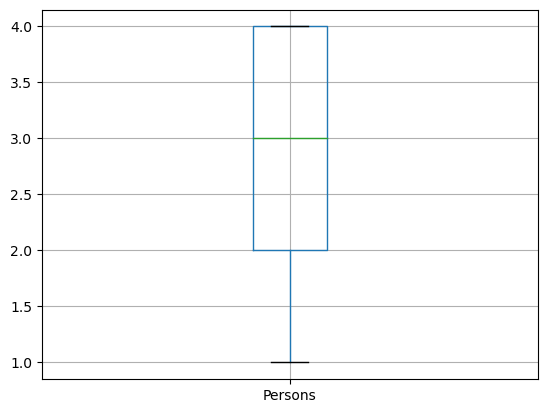

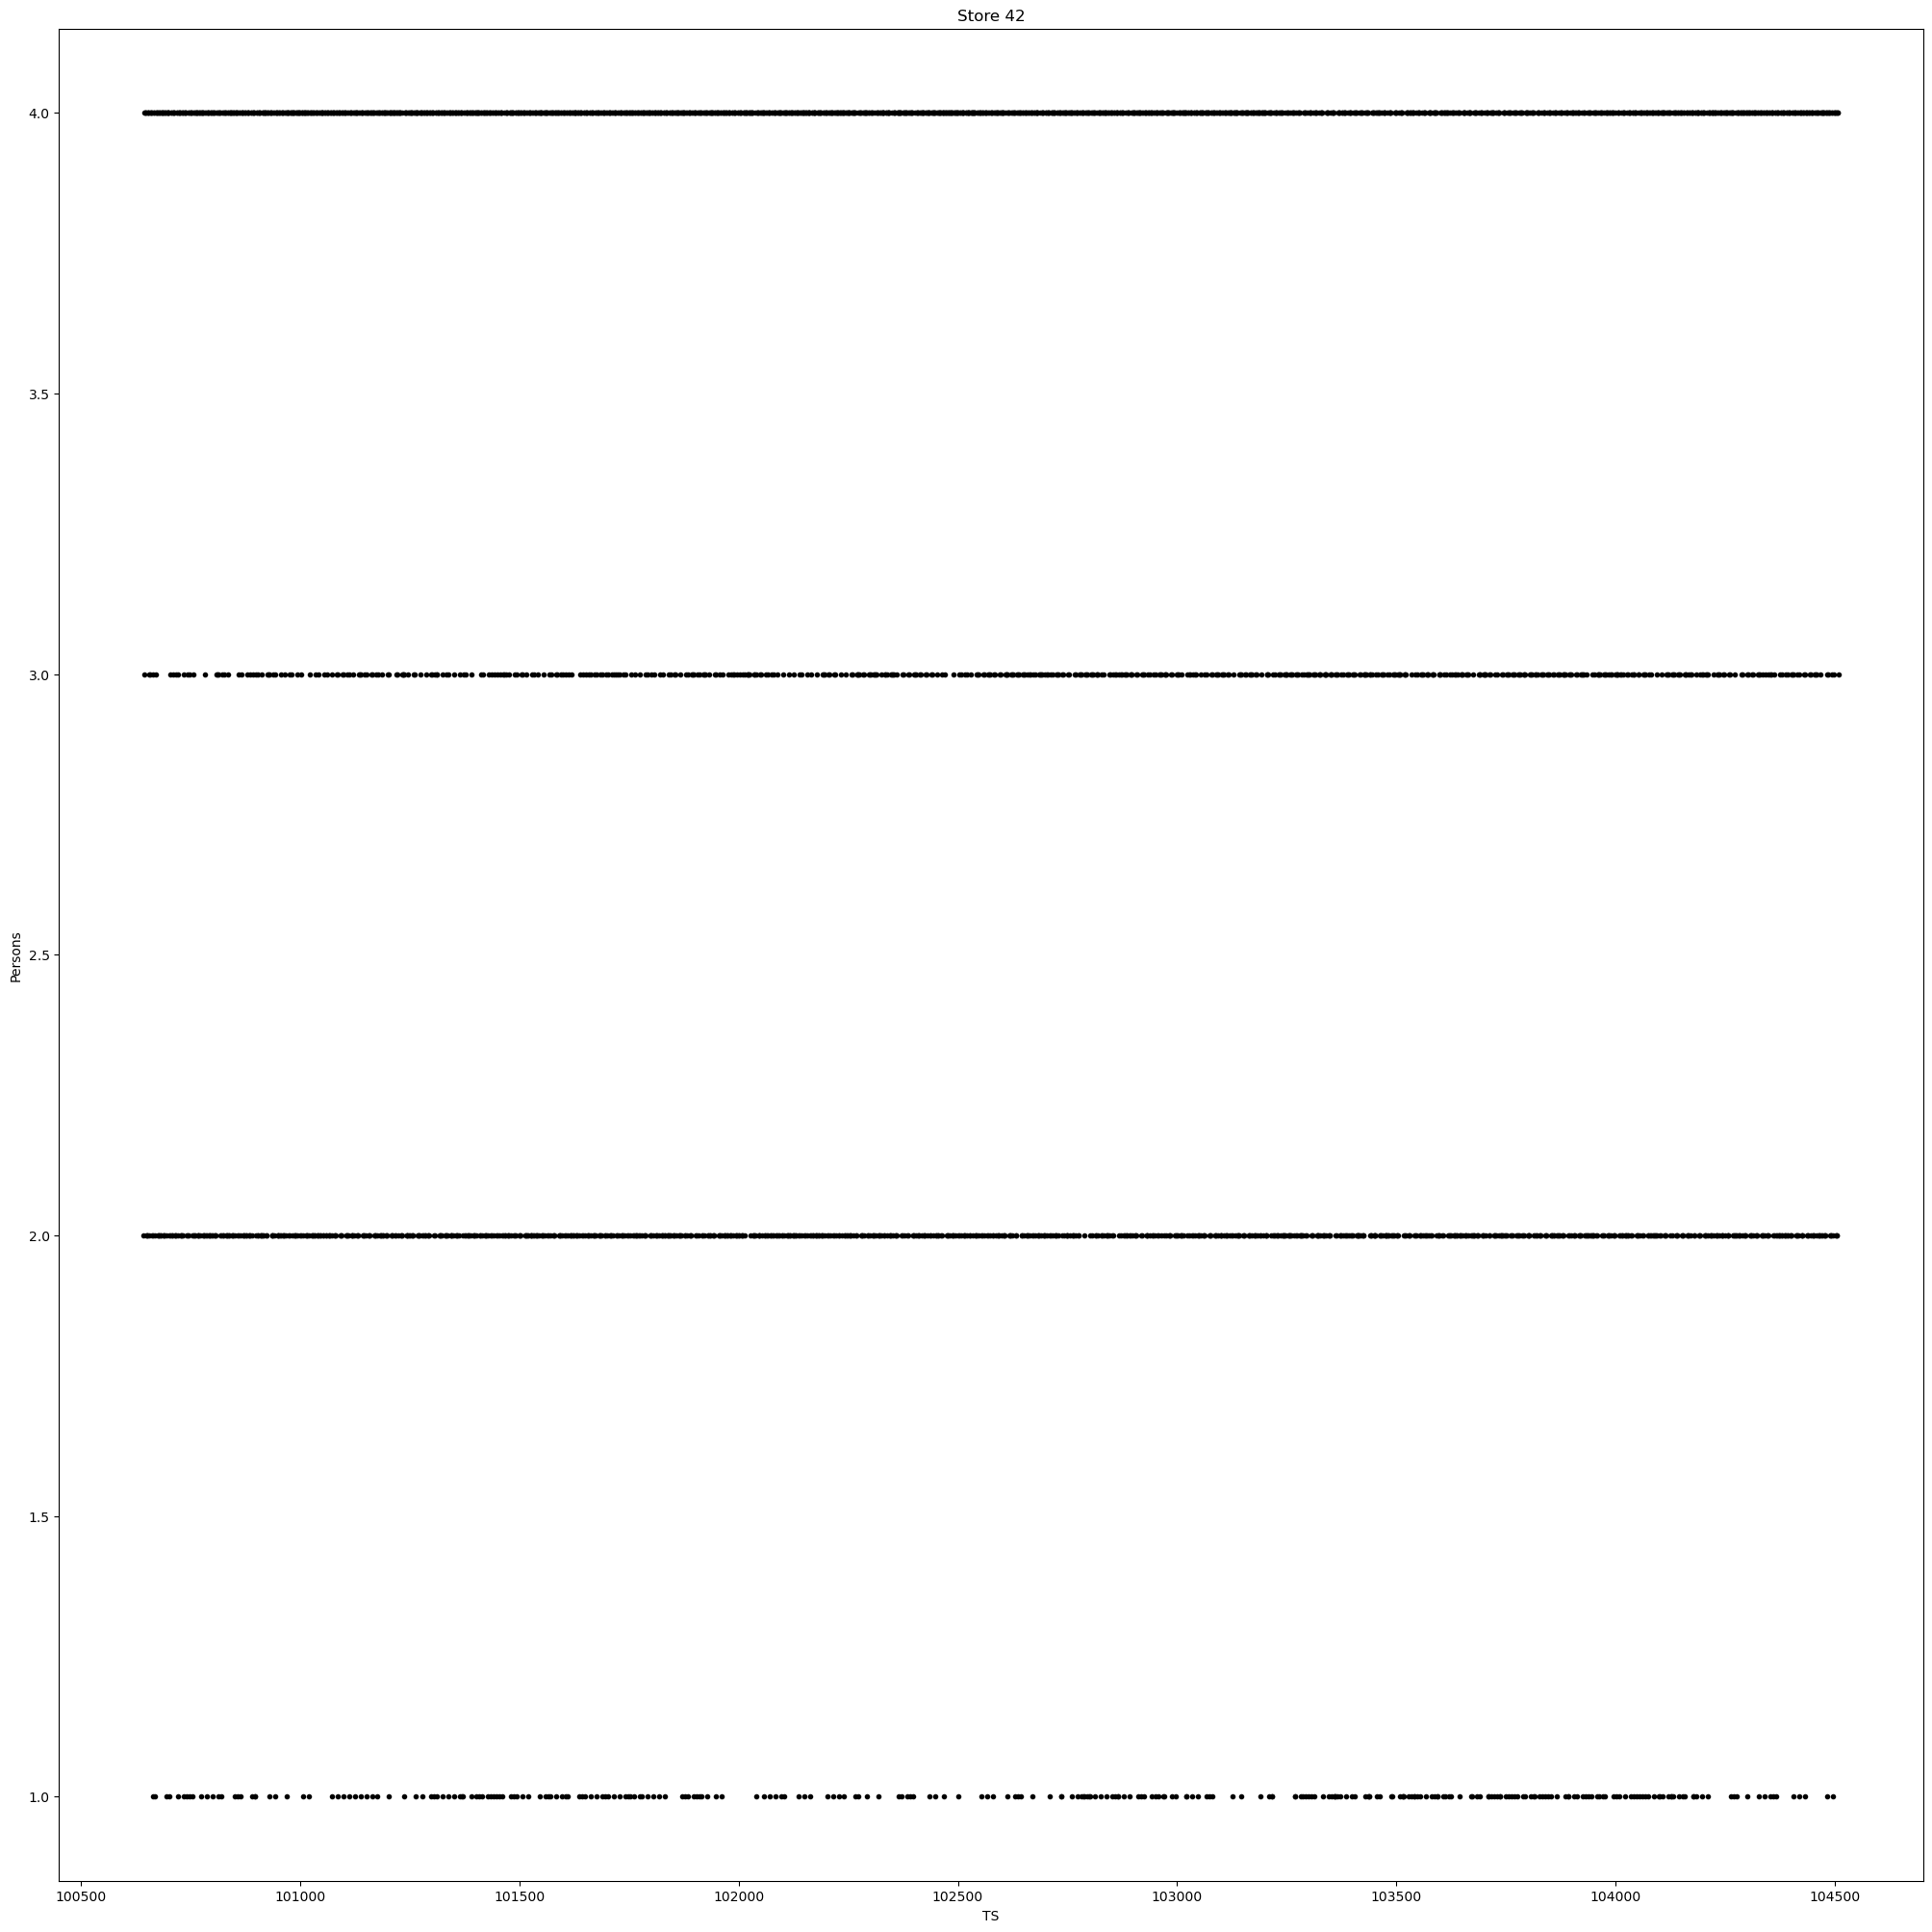

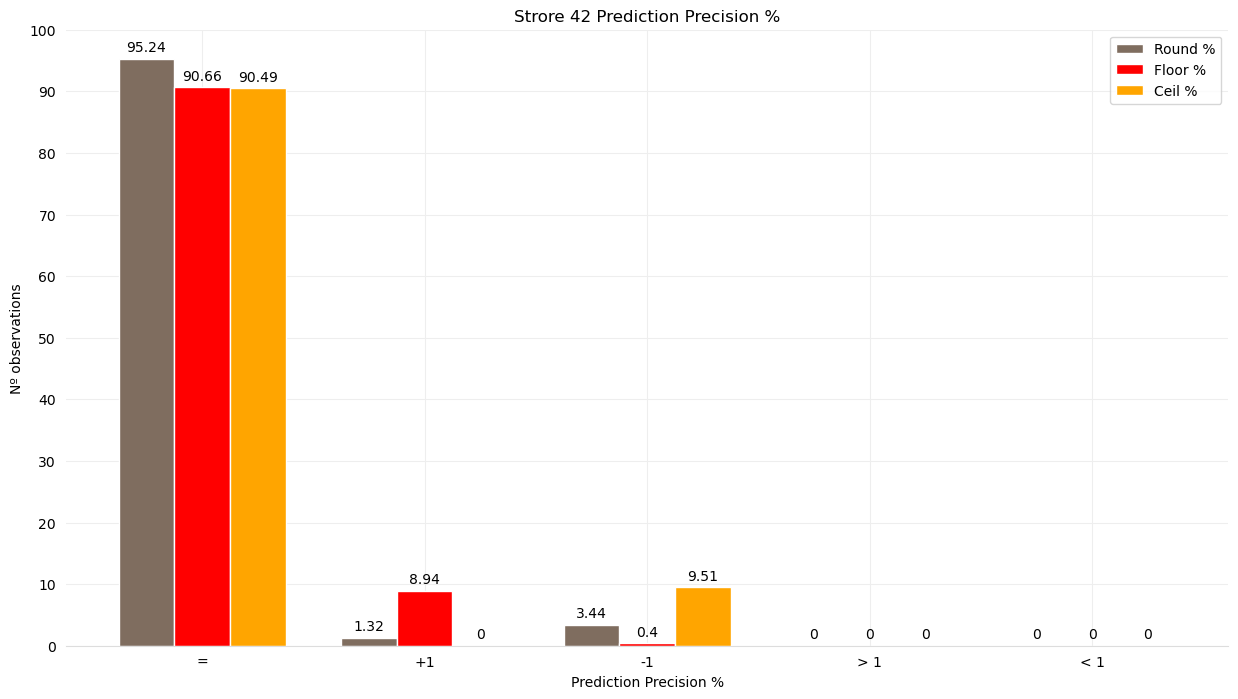

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       1662 |         23 |         60 |          0 |          0  
  Floor                |       1582 |        156 |          7 |          0 |          0  
  Ceil                 |       1579 |          0 |        166 |          0 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      95.24 |       1.32 |       3.44 |        0.0 |        0.0  
  Floor % 

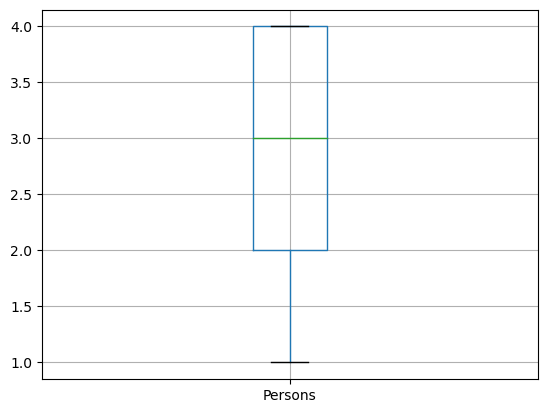

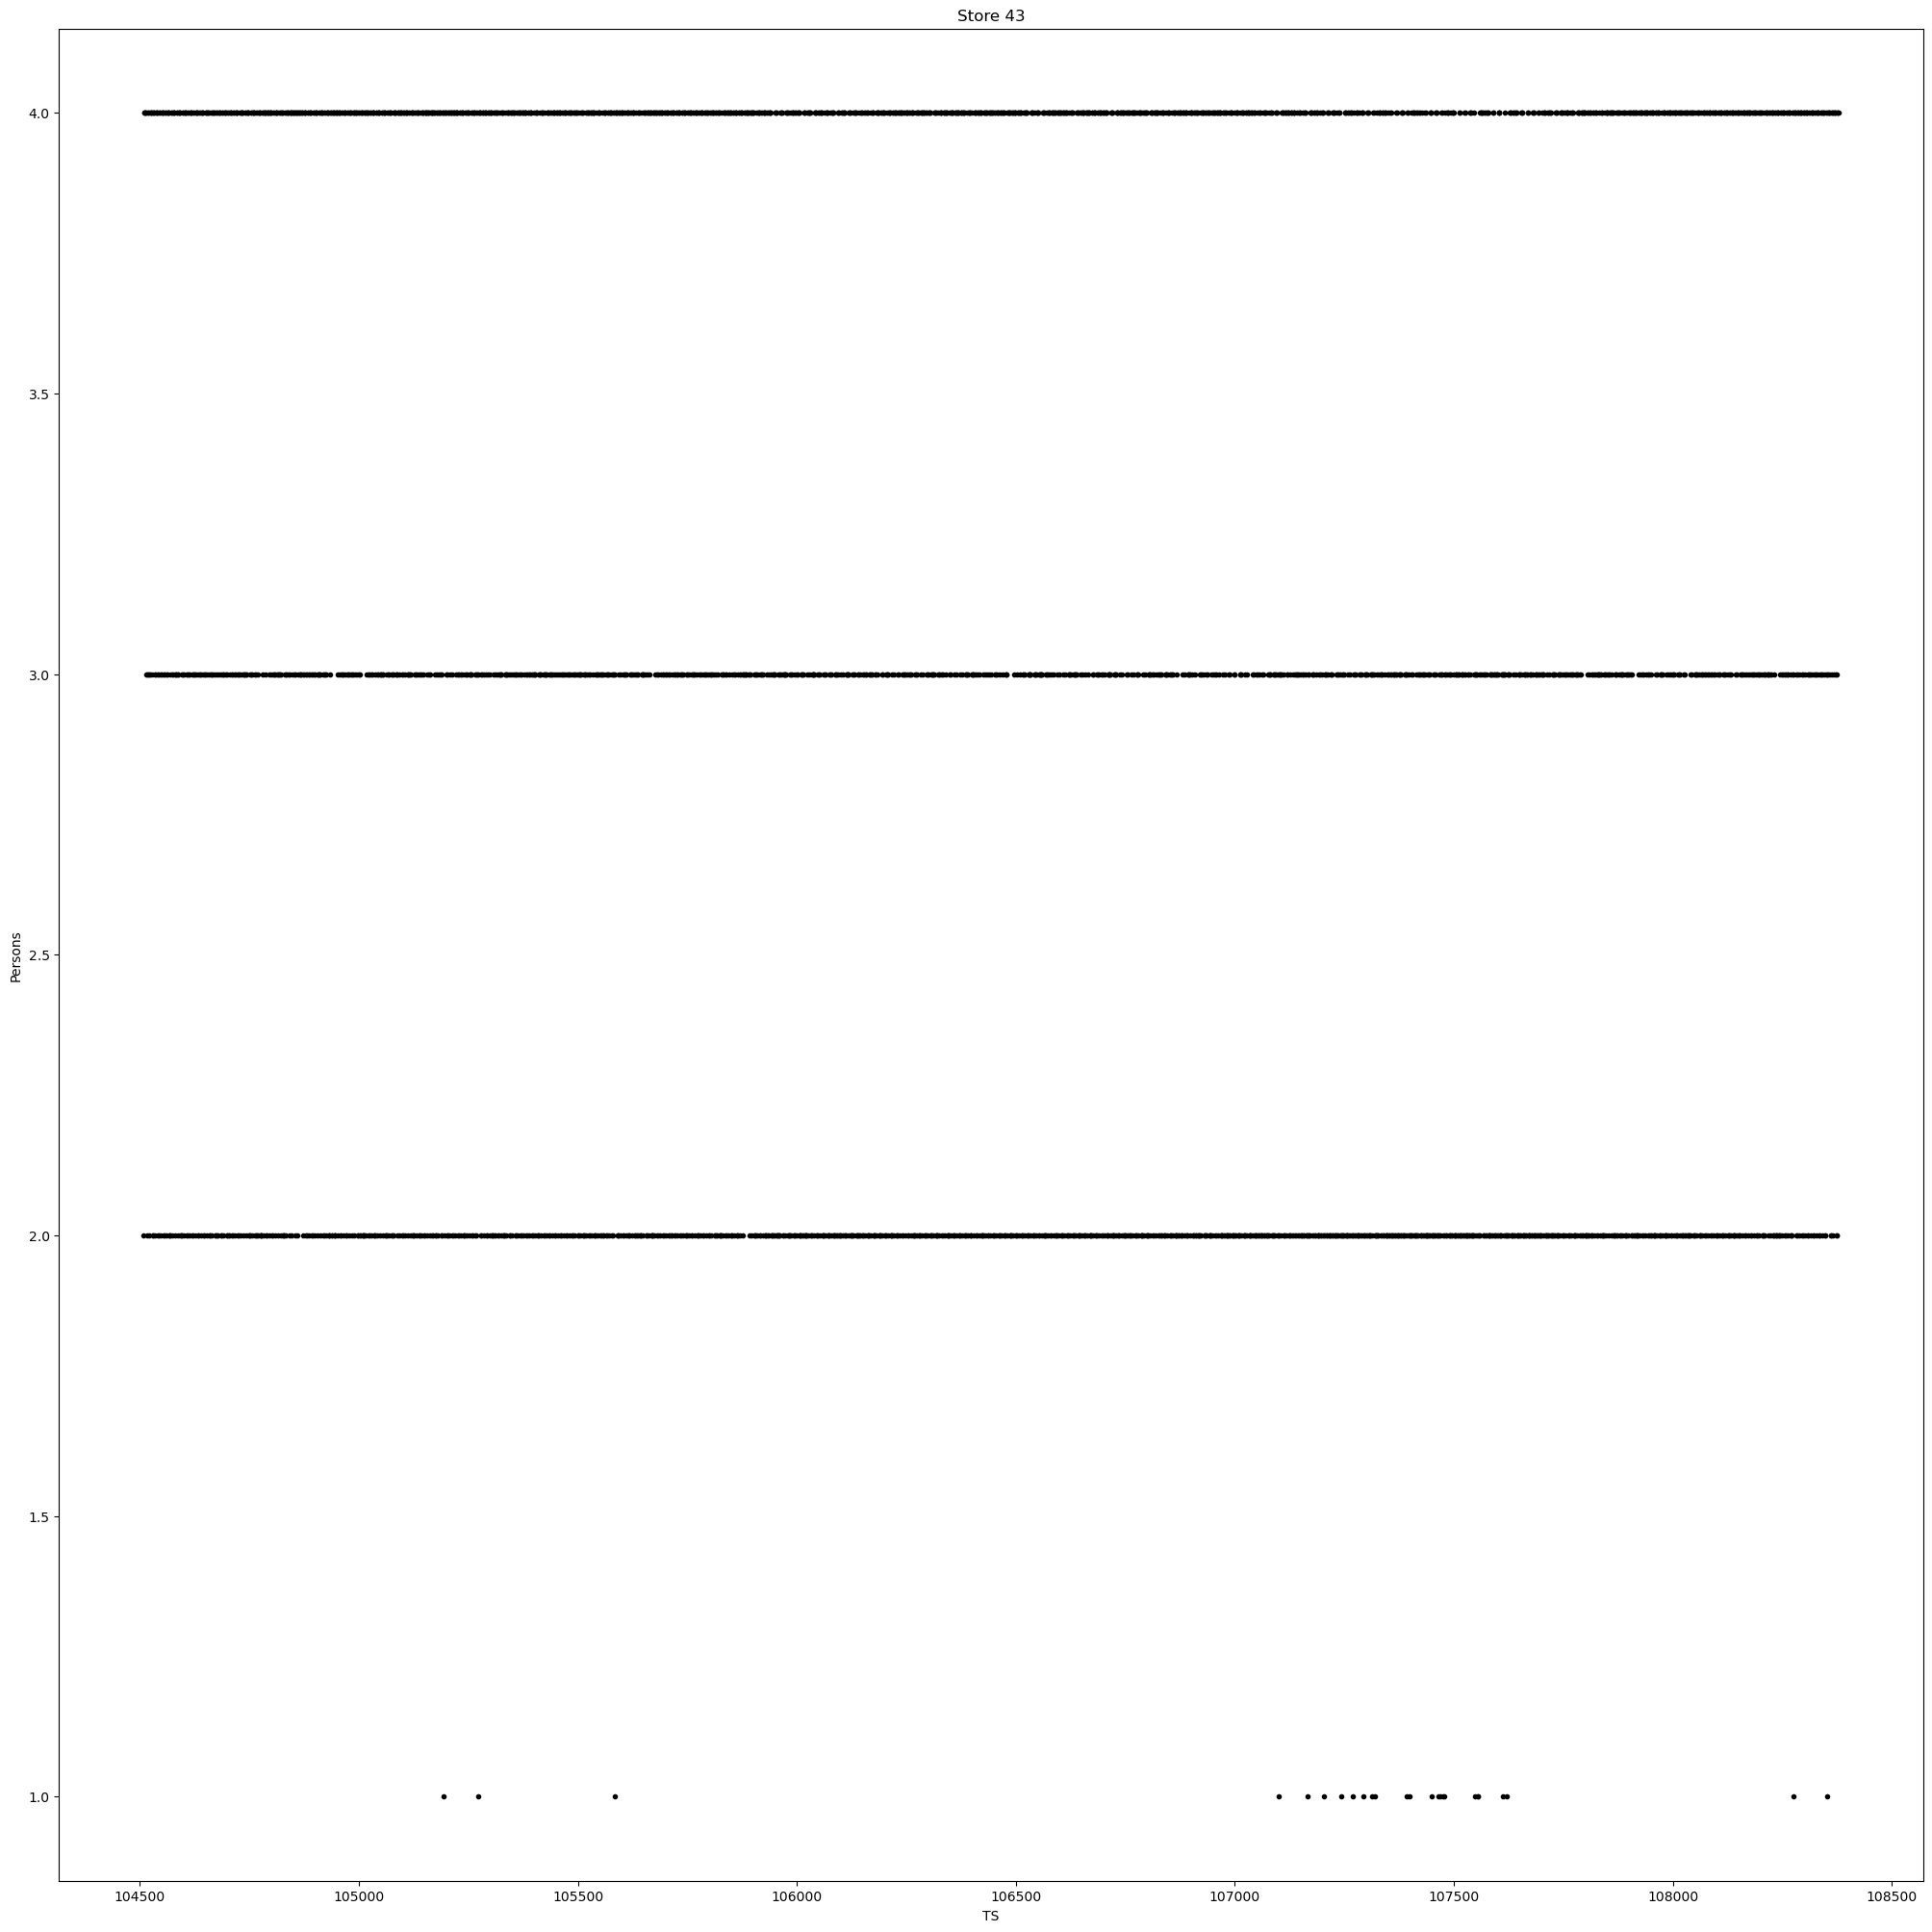

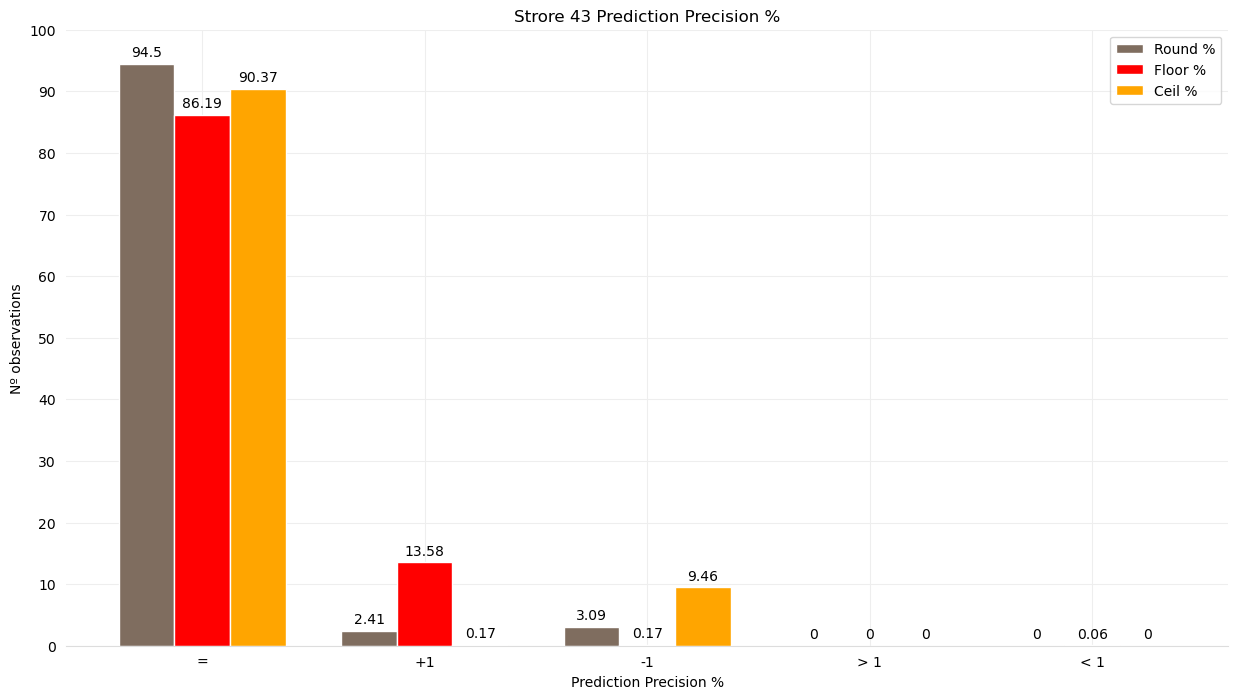

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       1649 |         42 |         54 |          0 |          0  
  Floor                |       1504 |        237 |          3 |          0 |          1  
  Ceil                 |       1577 |          3 |        165 |          0 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |       94.5 |       2.41 |       3.09 |        0.0 |        0.0  
  Floor % 

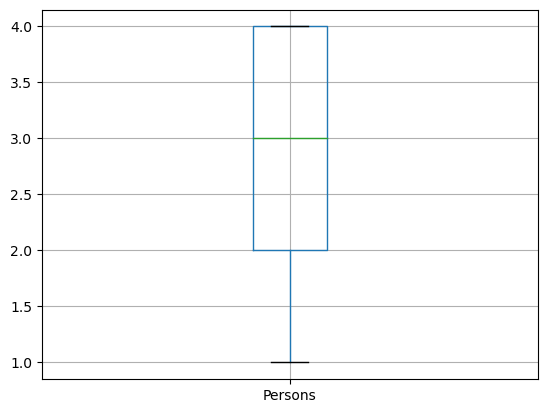

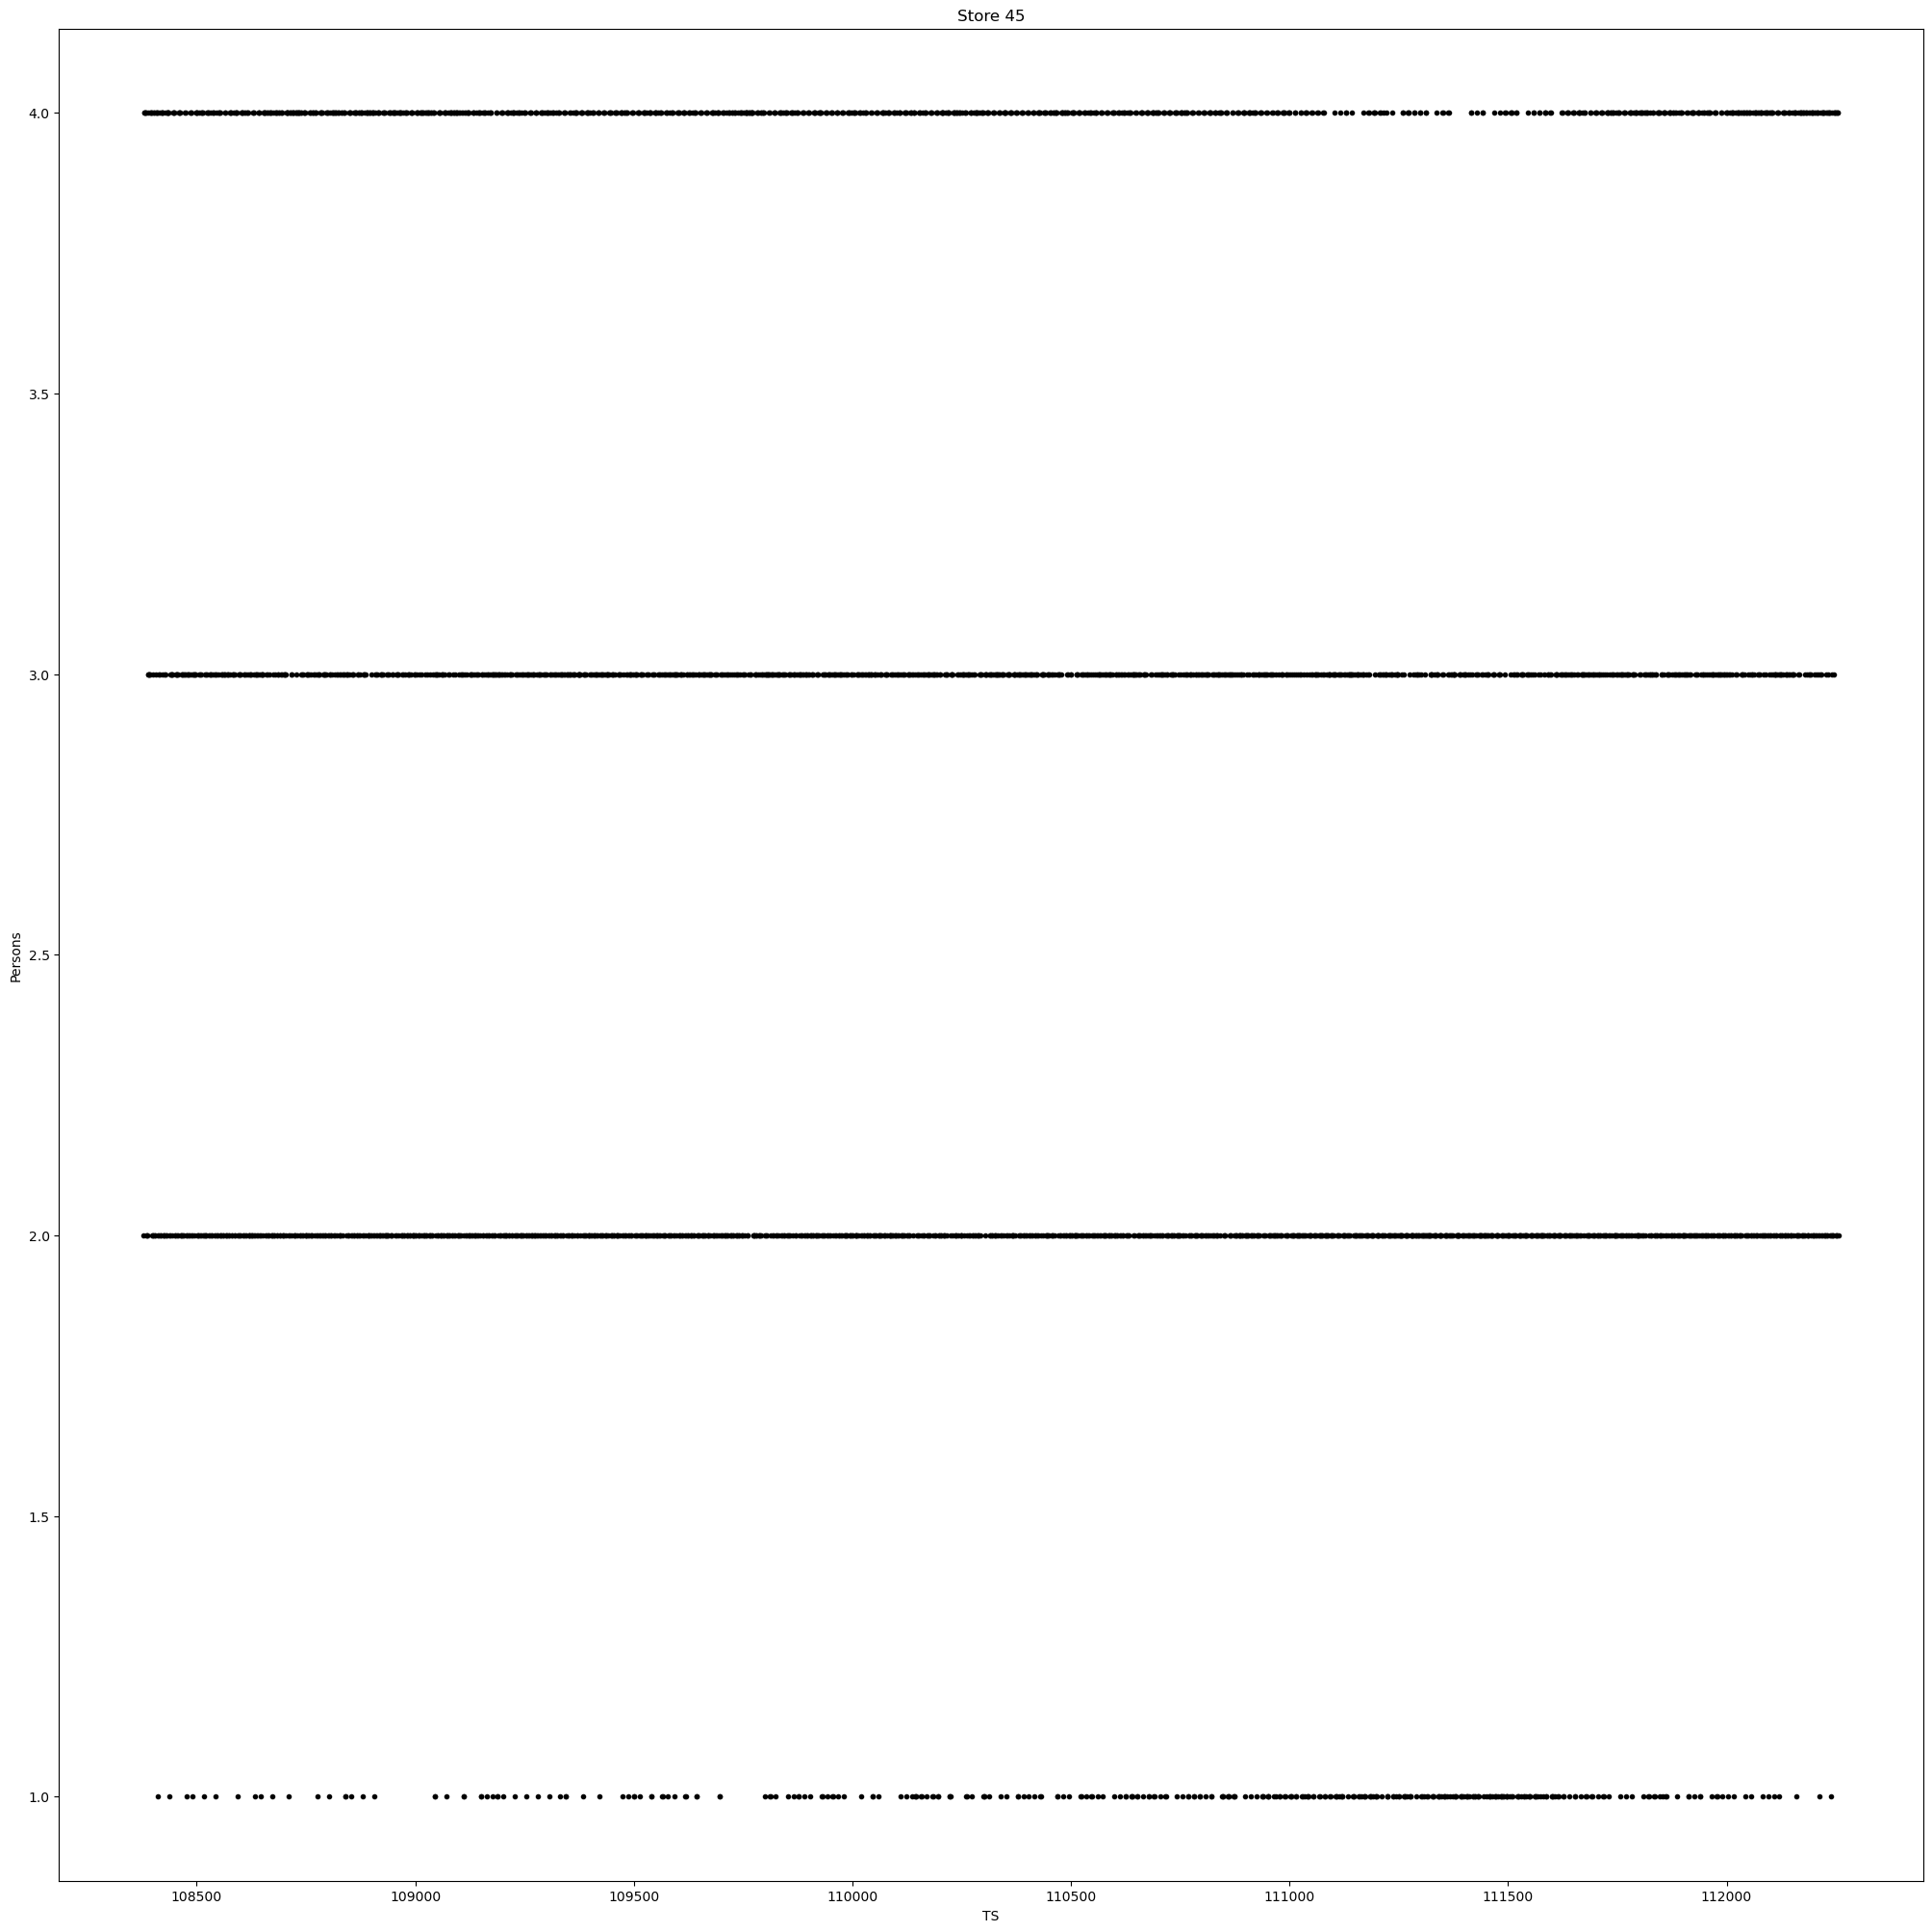

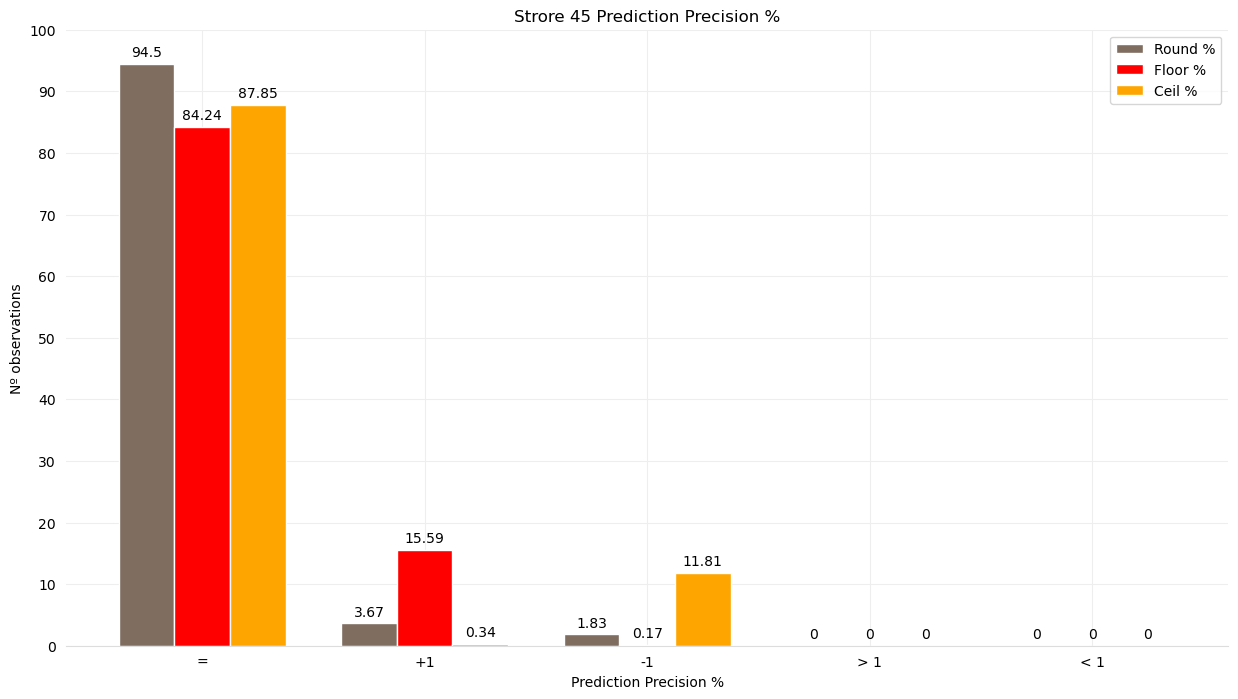

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       1649 |         64 |         32 |          0 |          0  
  Floor                |       1470 |        272 |          3 |          0 |          0  
  Ceil                 |       1533 |          6 |        206 |          0 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |       94.5 |       3.67 |       1.83 |        0.0 |        0.0  
  Floor % 

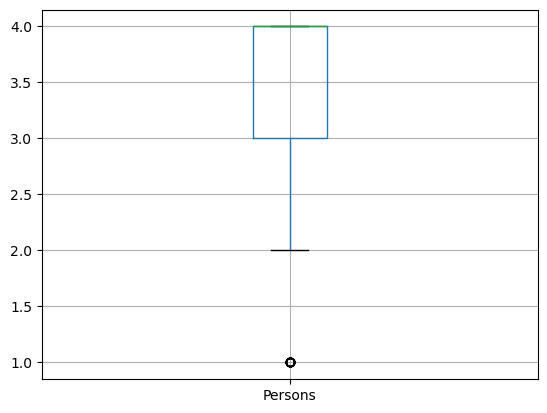

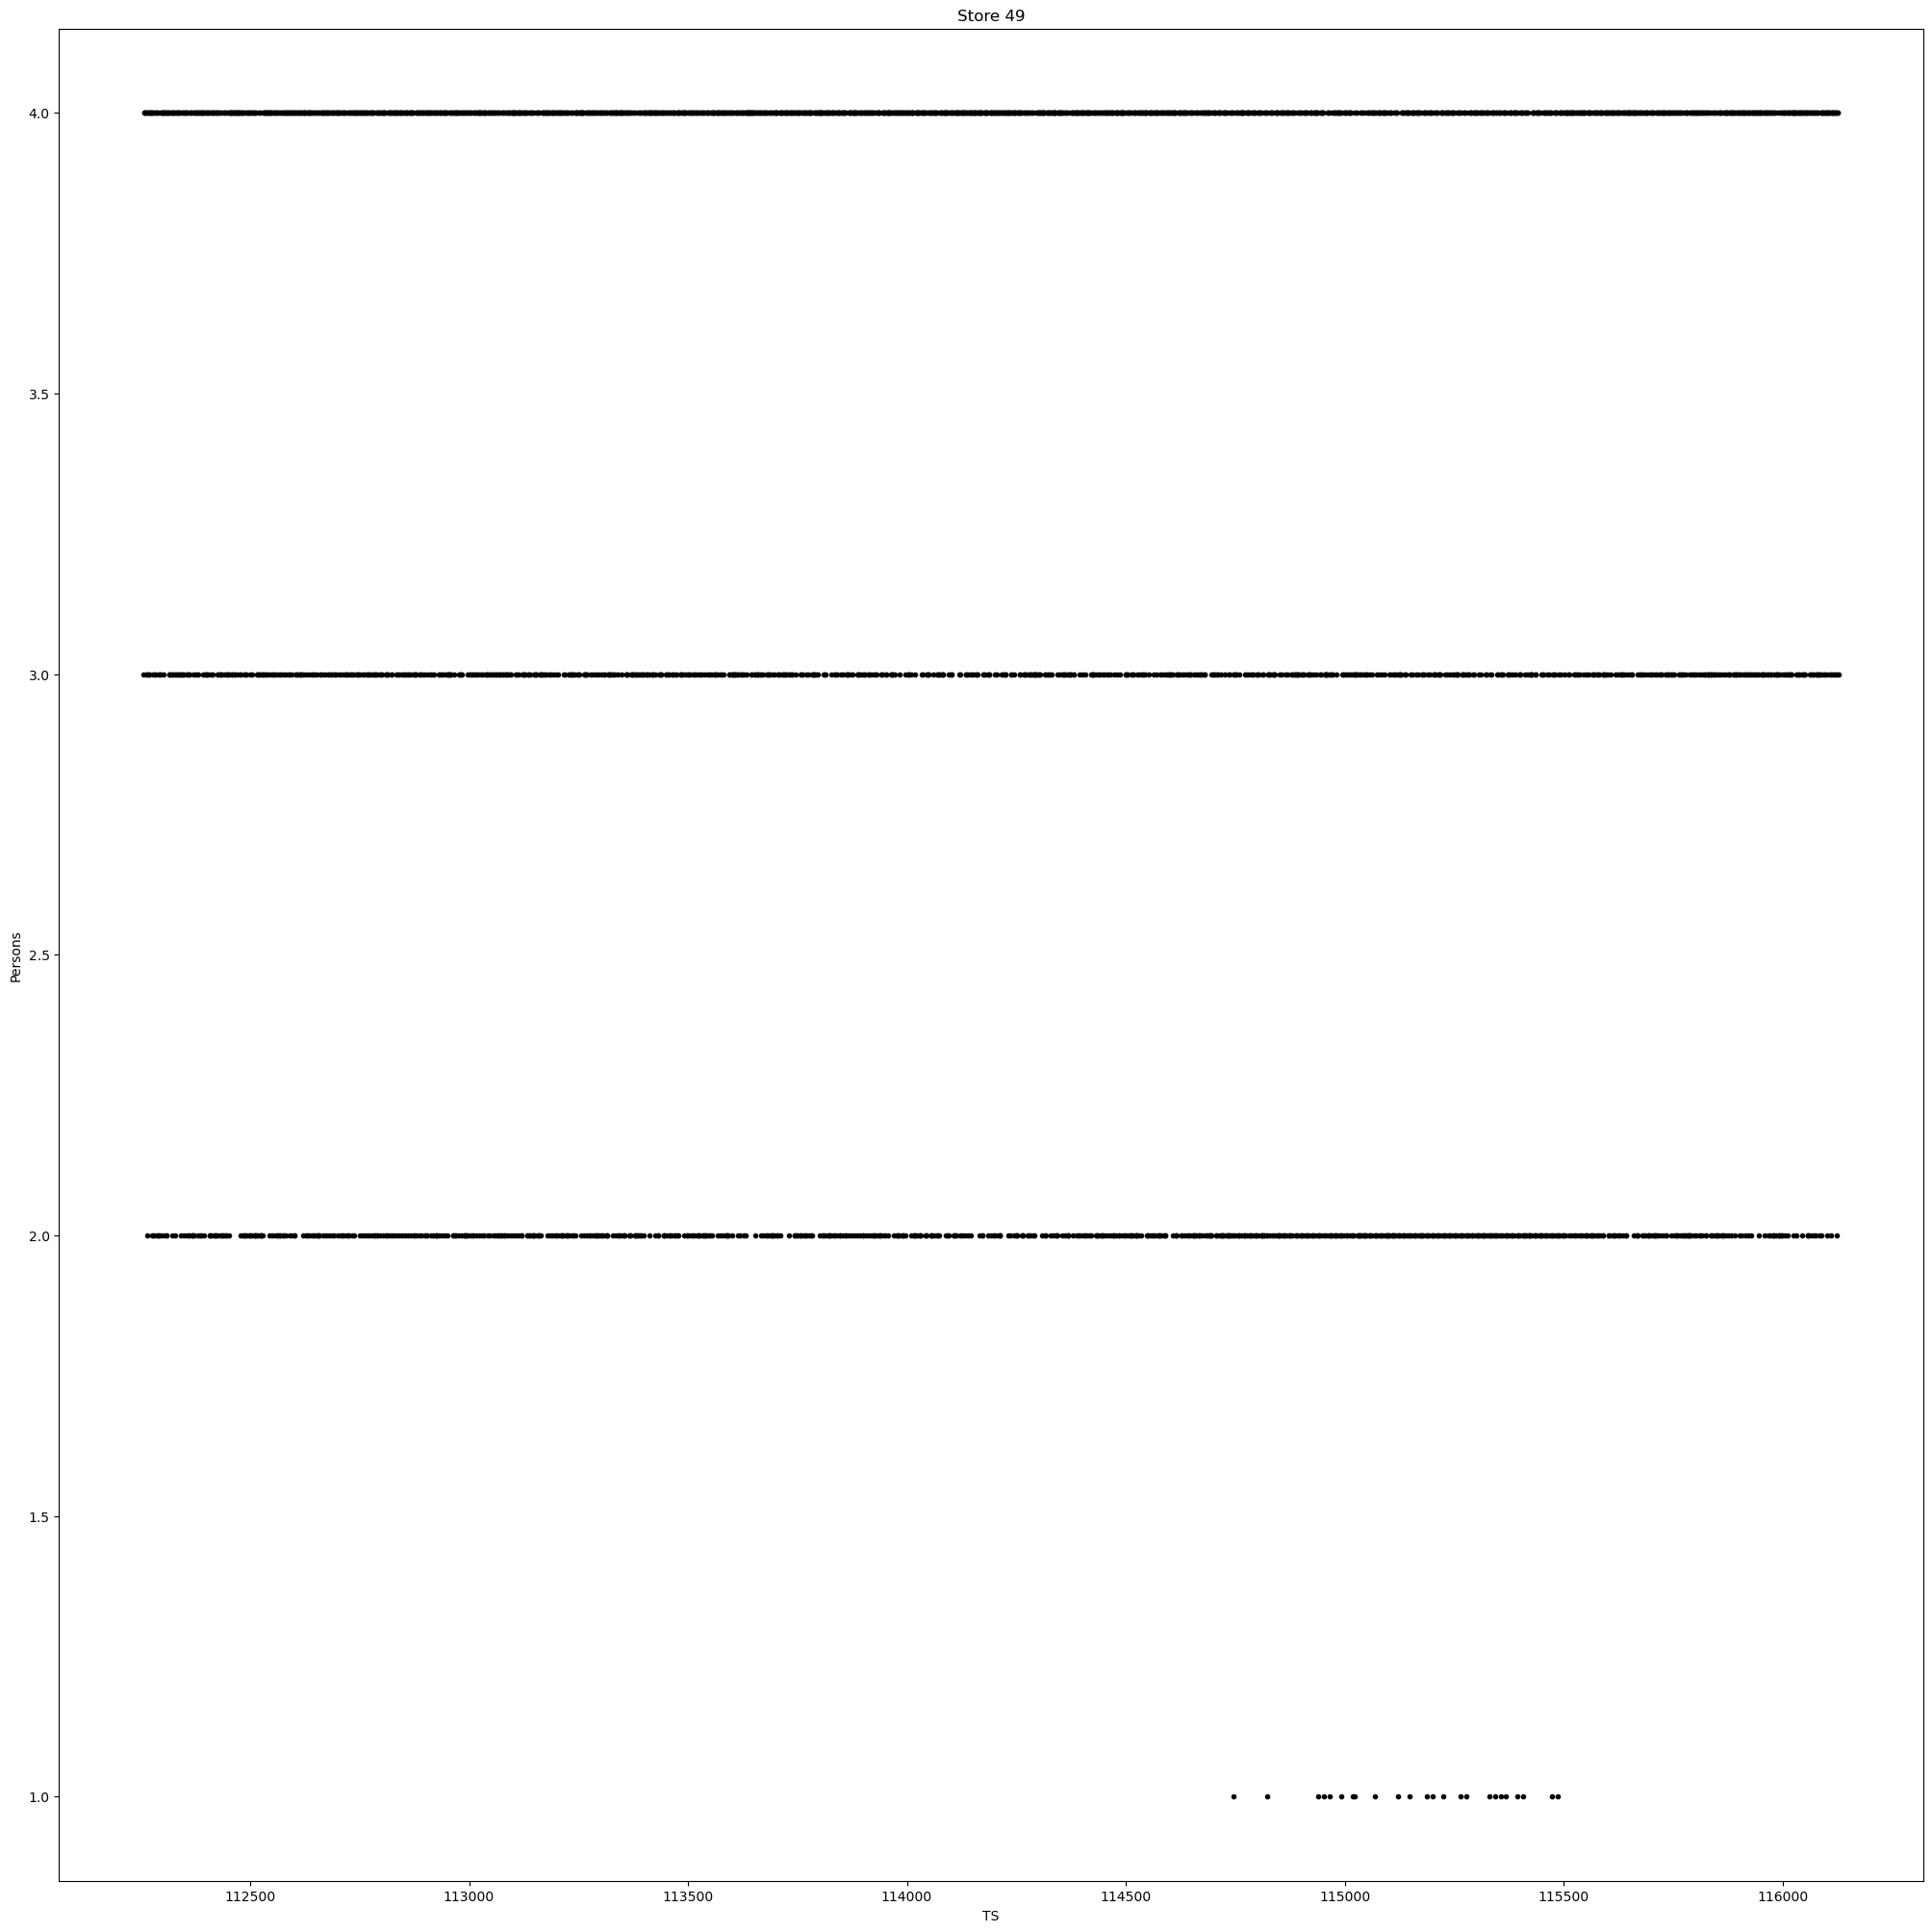

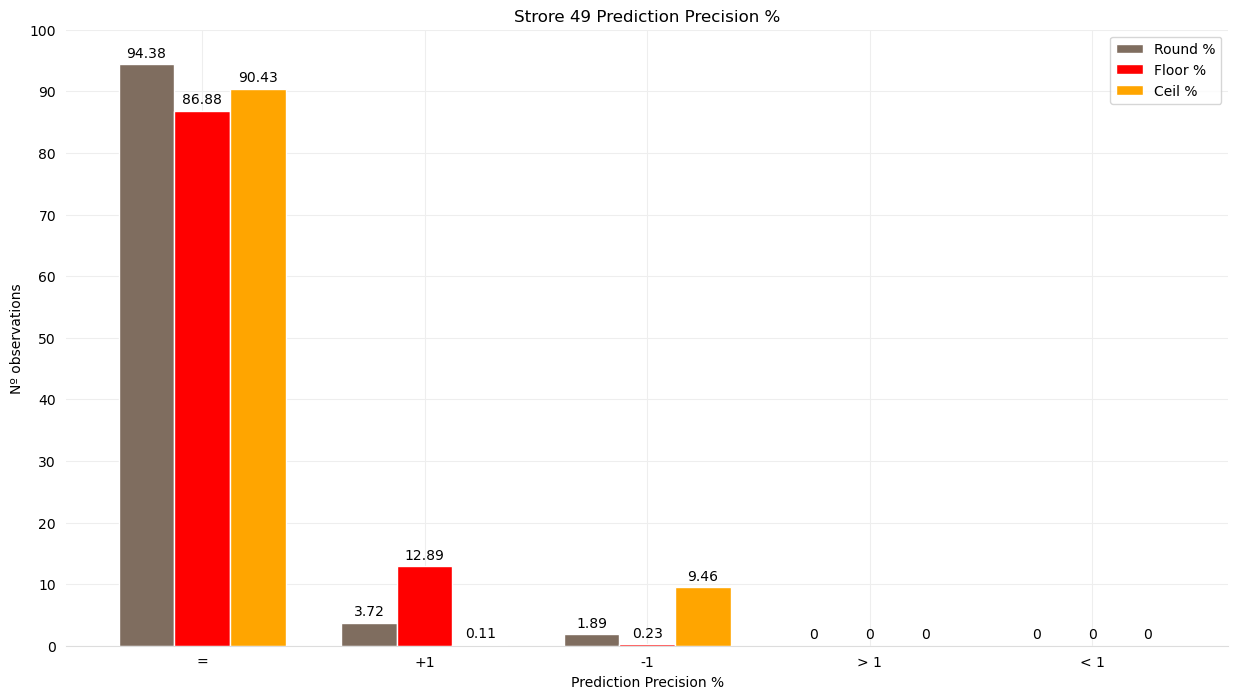

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       1647 |         65 |         33 |          0 |          0  
  Floor                |       1516 |        225 |          4 |          0 |          0  
  Ceil                 |       1578 |          2 |        165 |          0 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      94.38 |       3.72 |       1.89 |        0.0 |        0.0  
  Floor % 

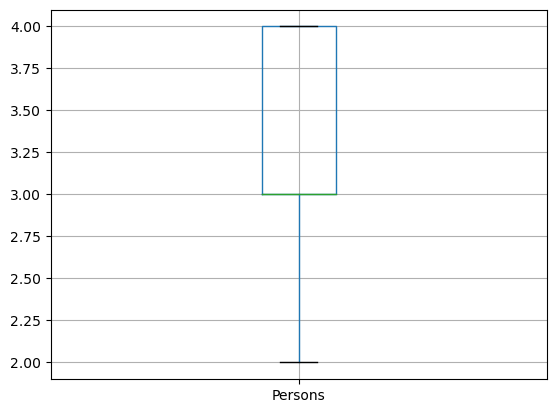

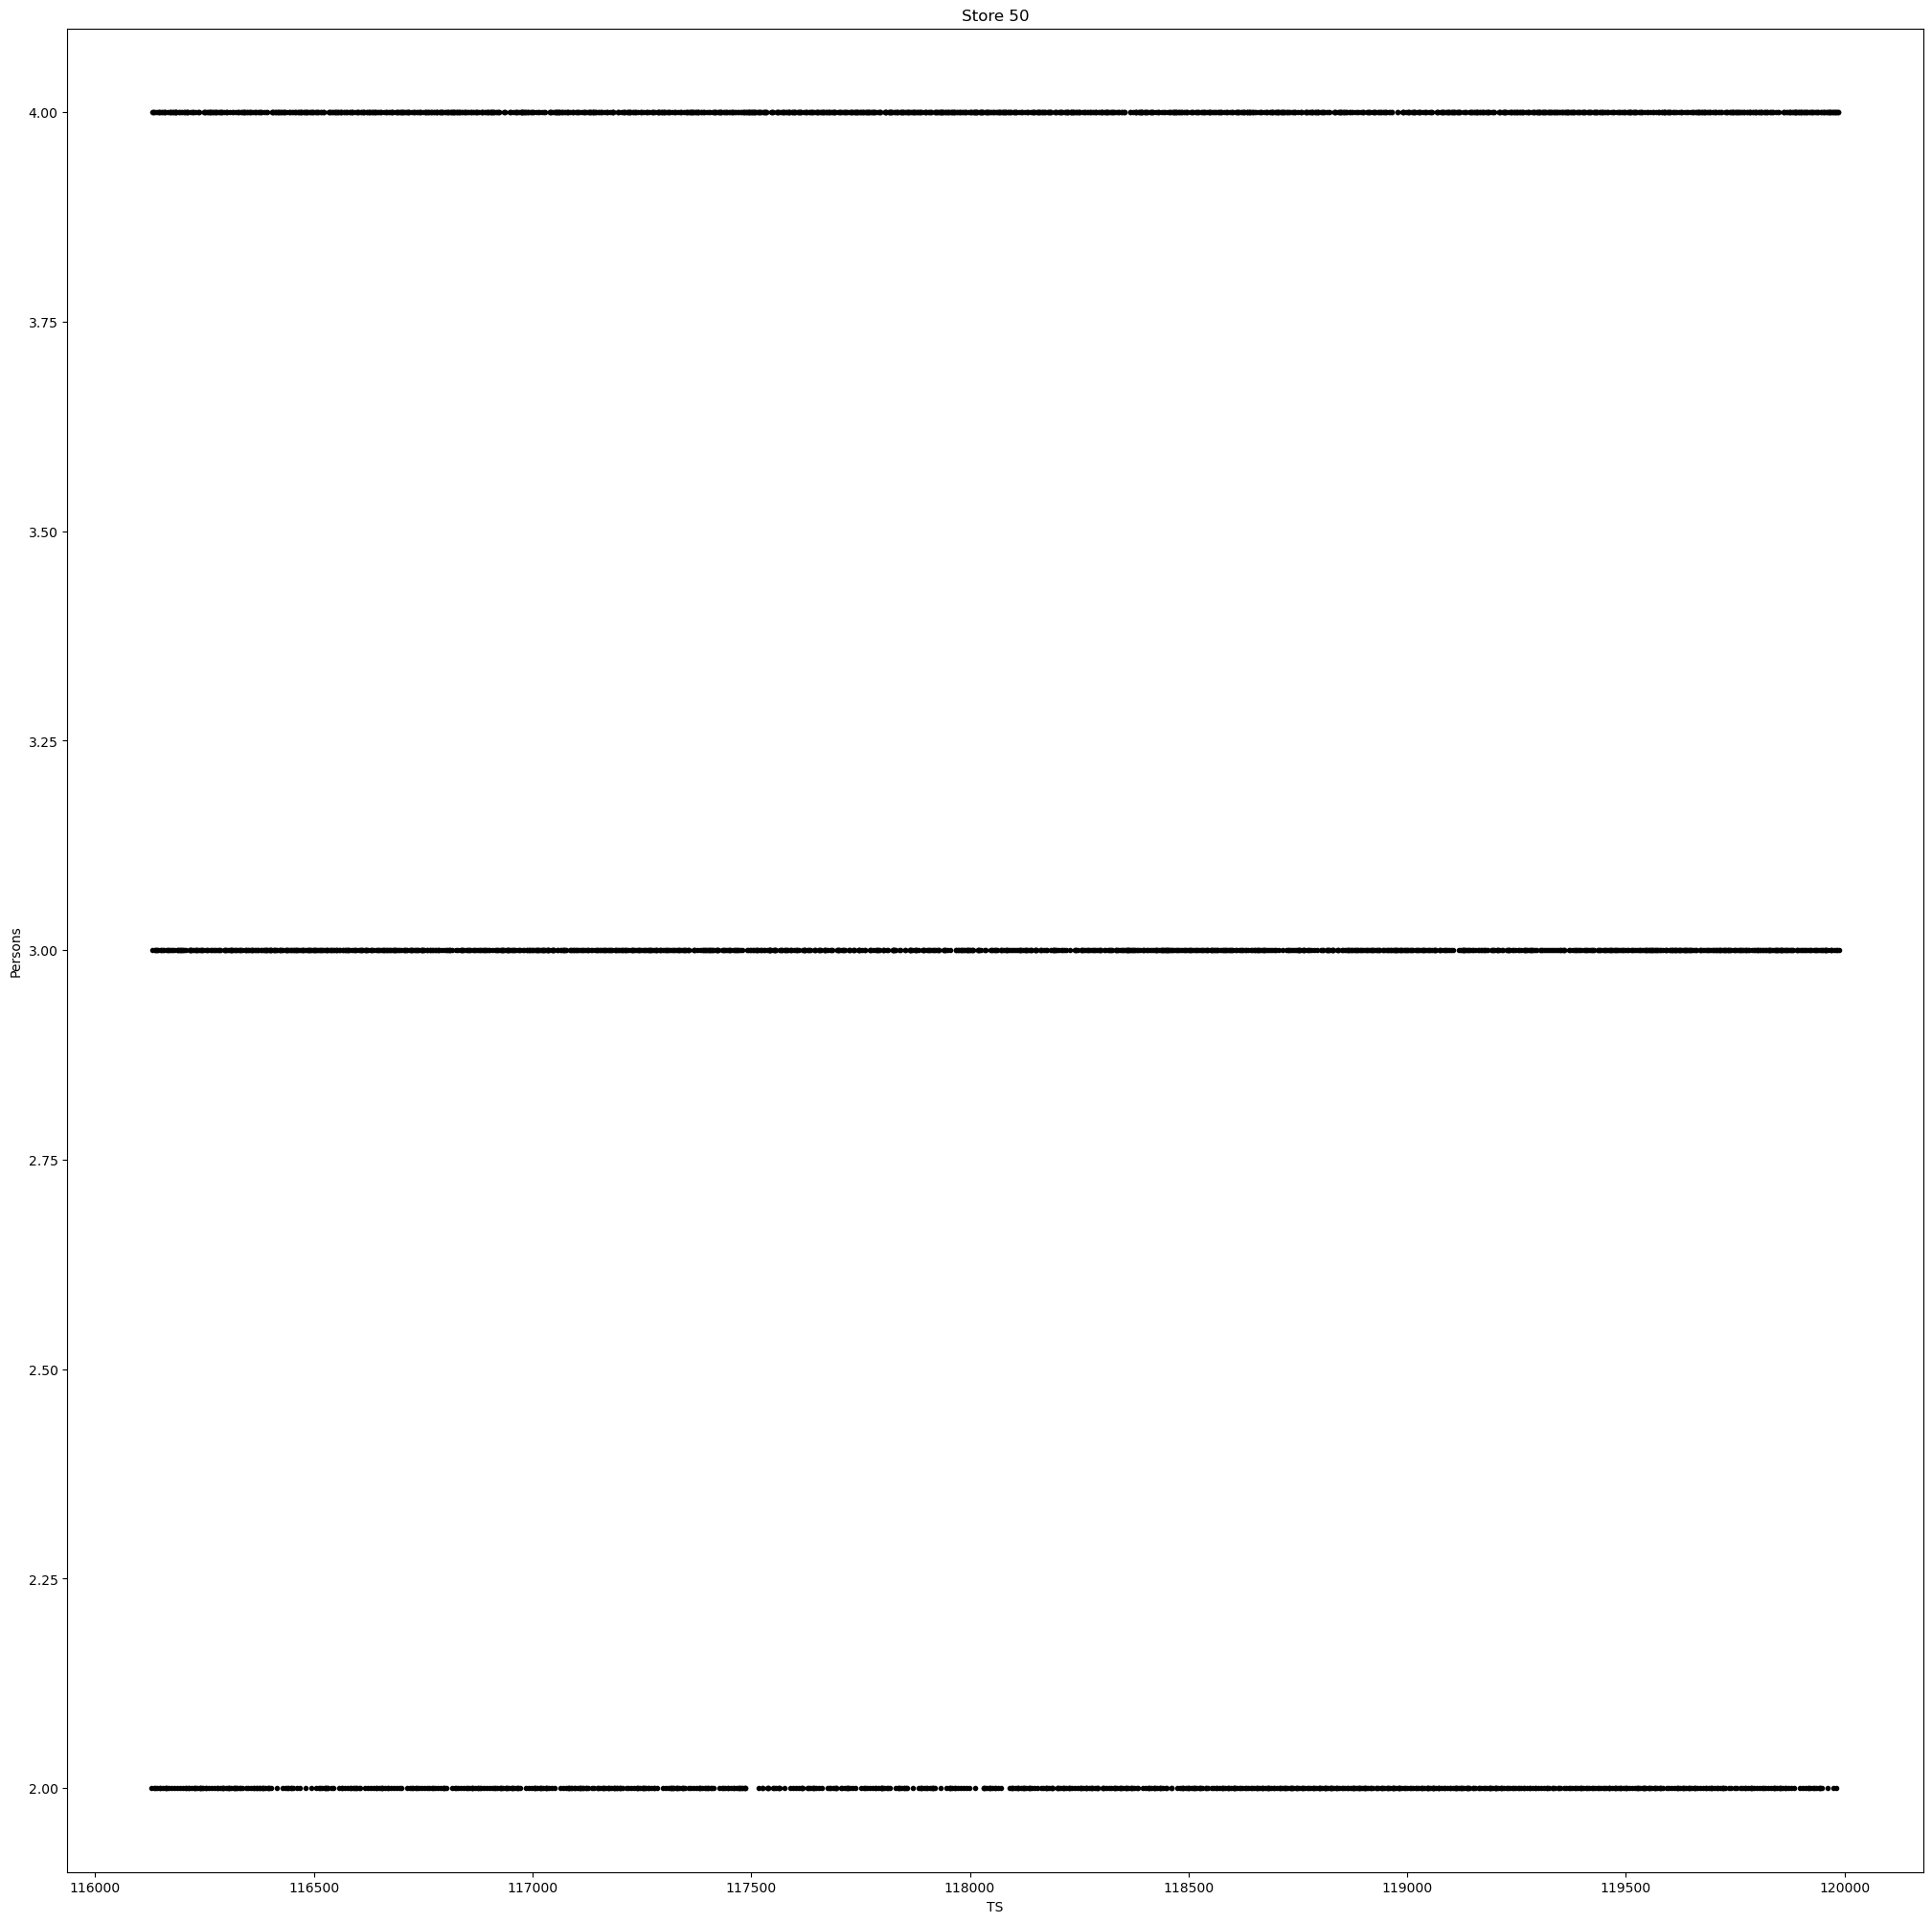

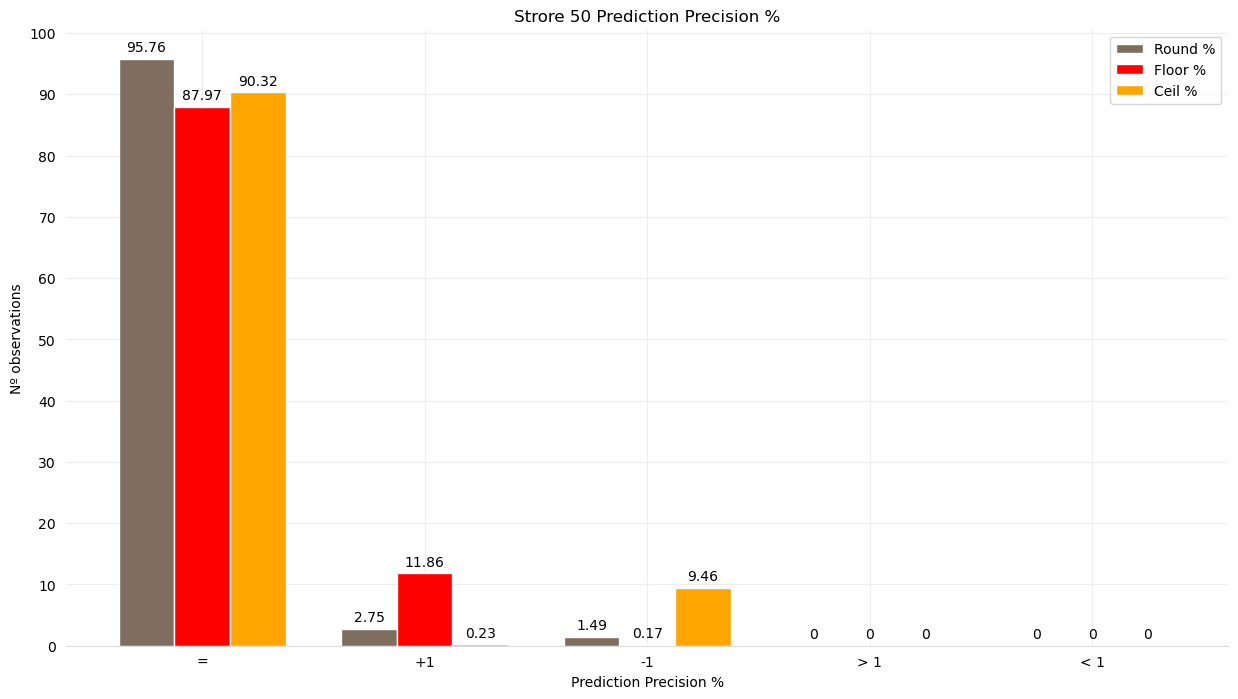

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       1671 |         48 |         26 |          0 |          0  
  Floor                |       1535 |        207 |          3 |          0 |          0  
  Ceil                 |       1576 |          4 |        165 |          0 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      95.76 |       2.75 |       1.49 |        0.0 |        0.0  
  Floor % 

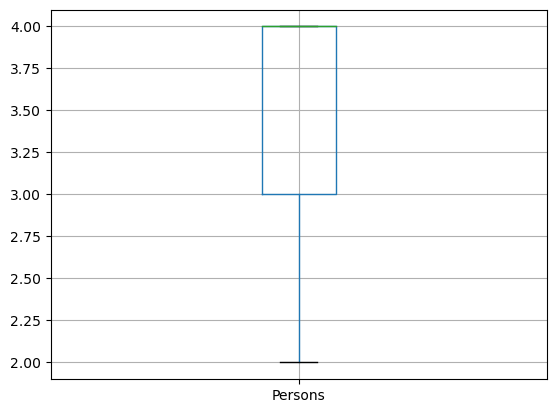

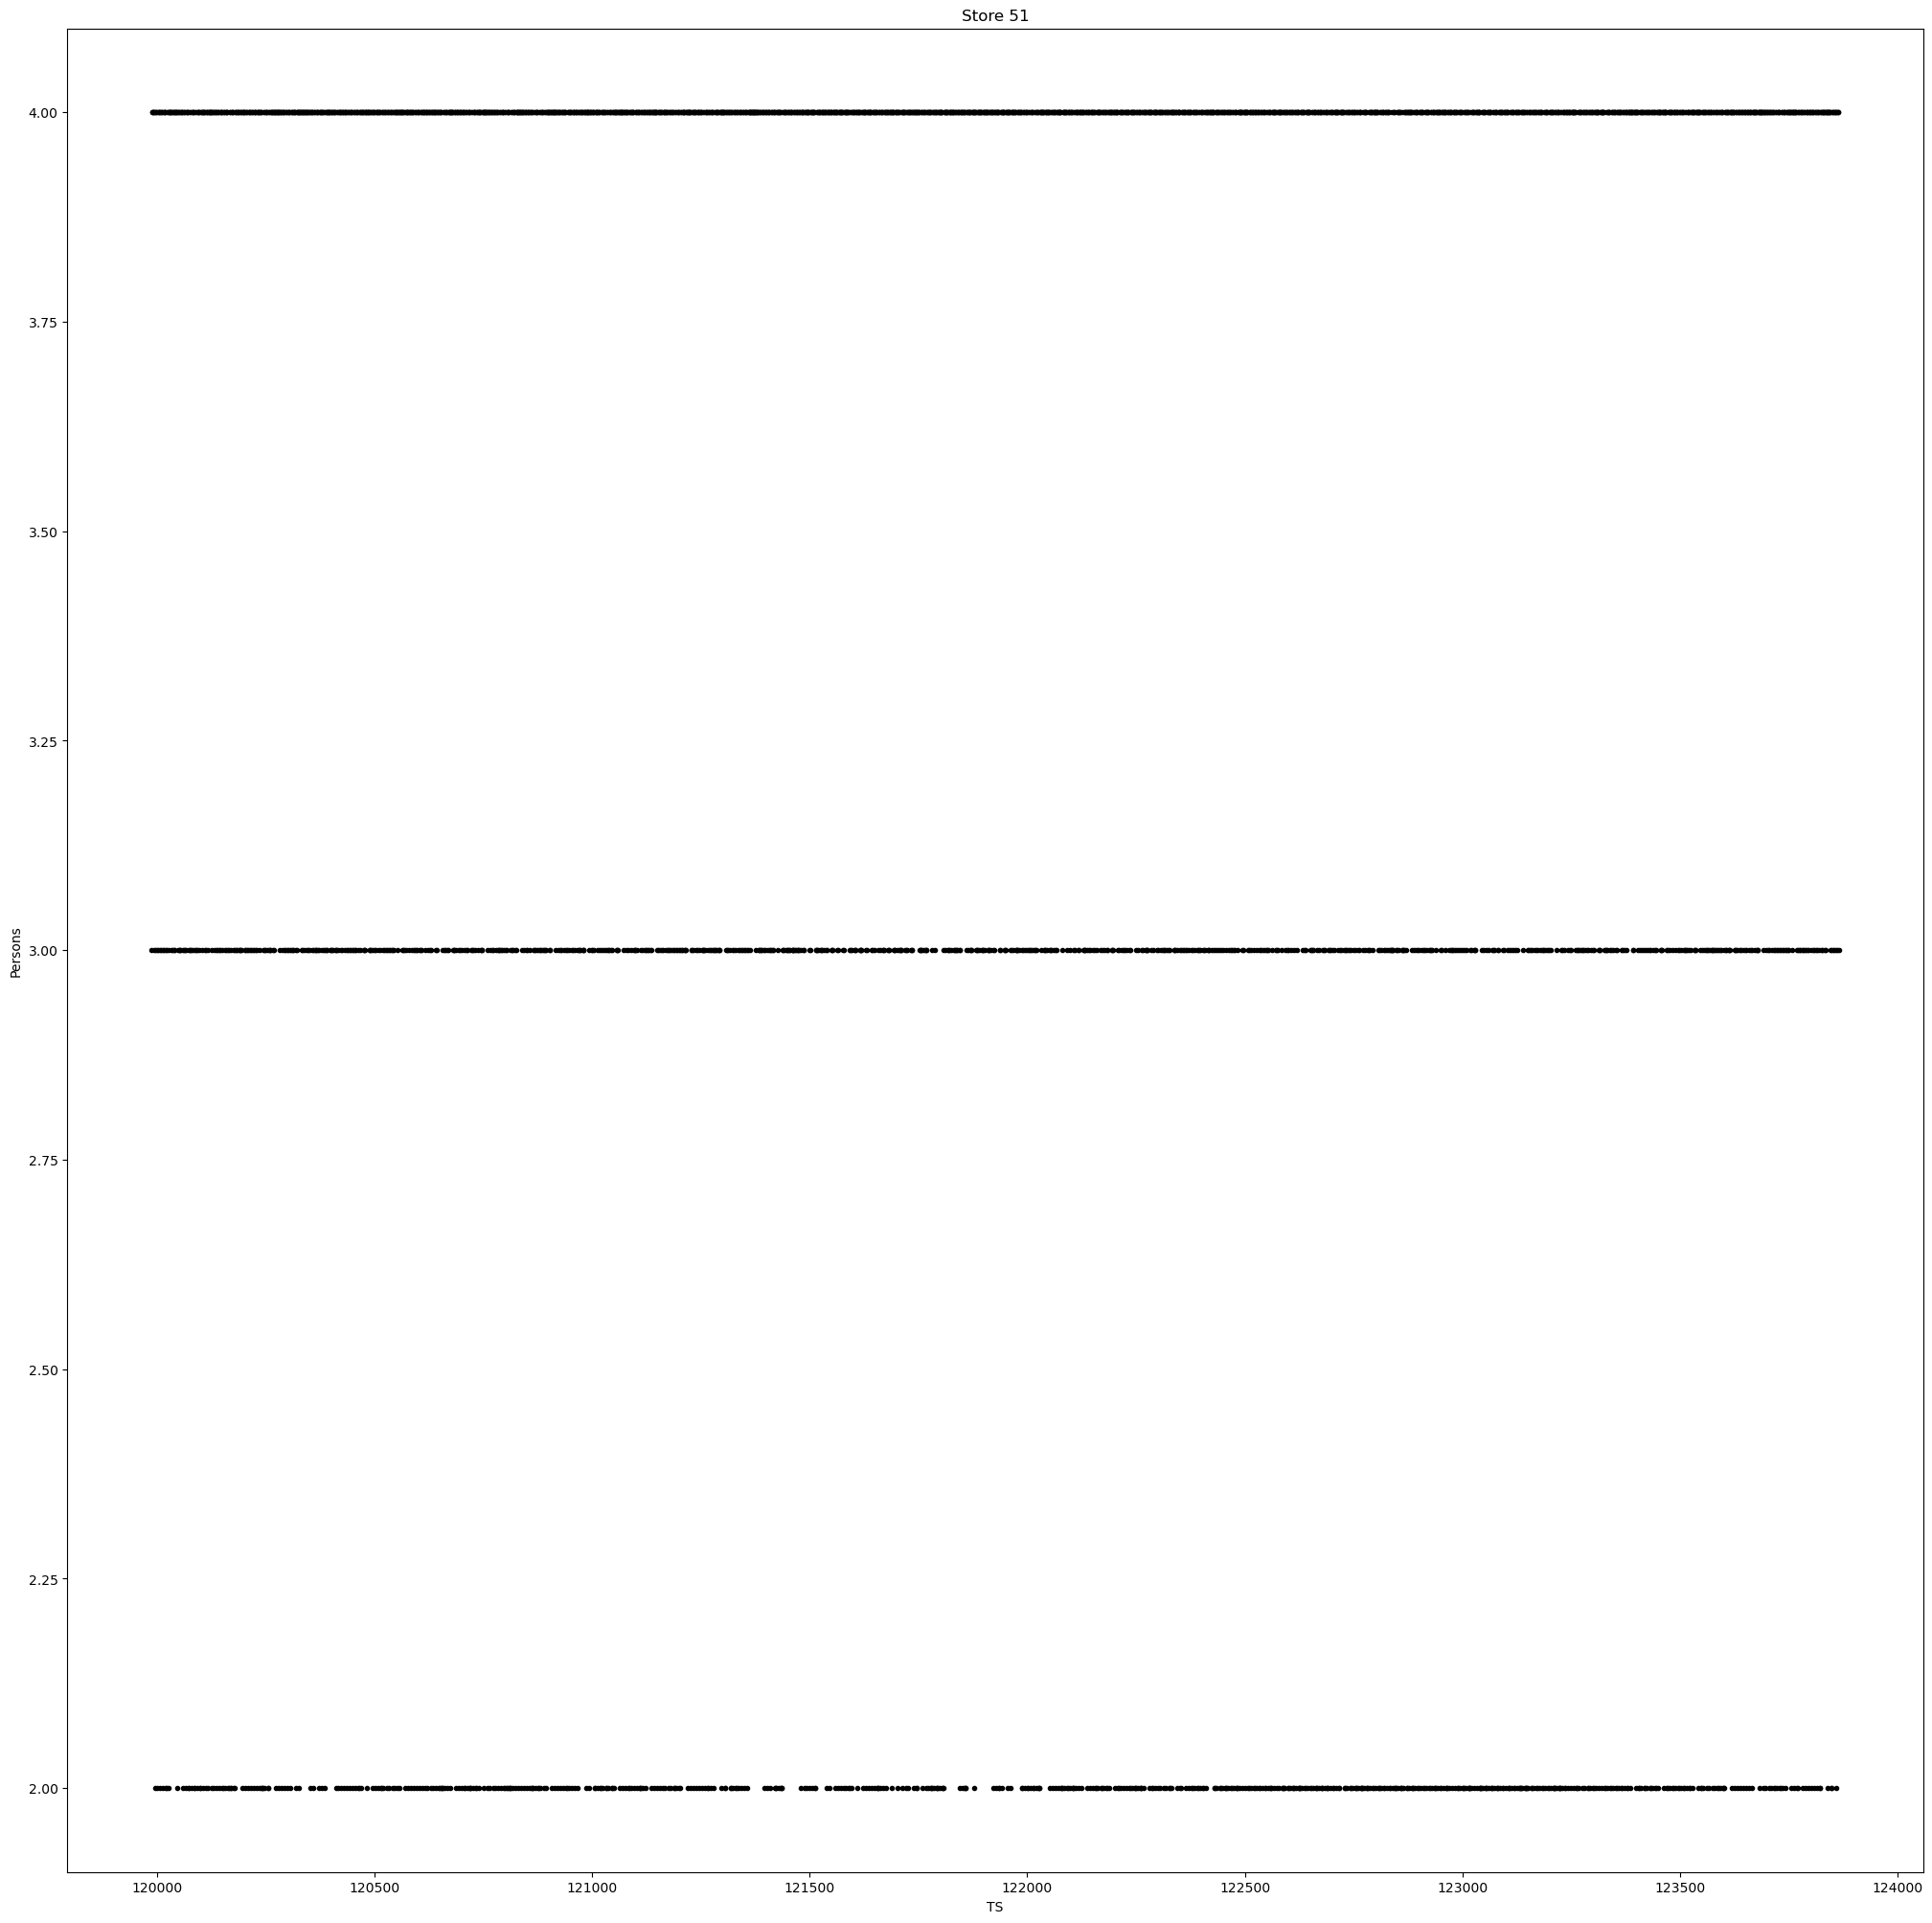

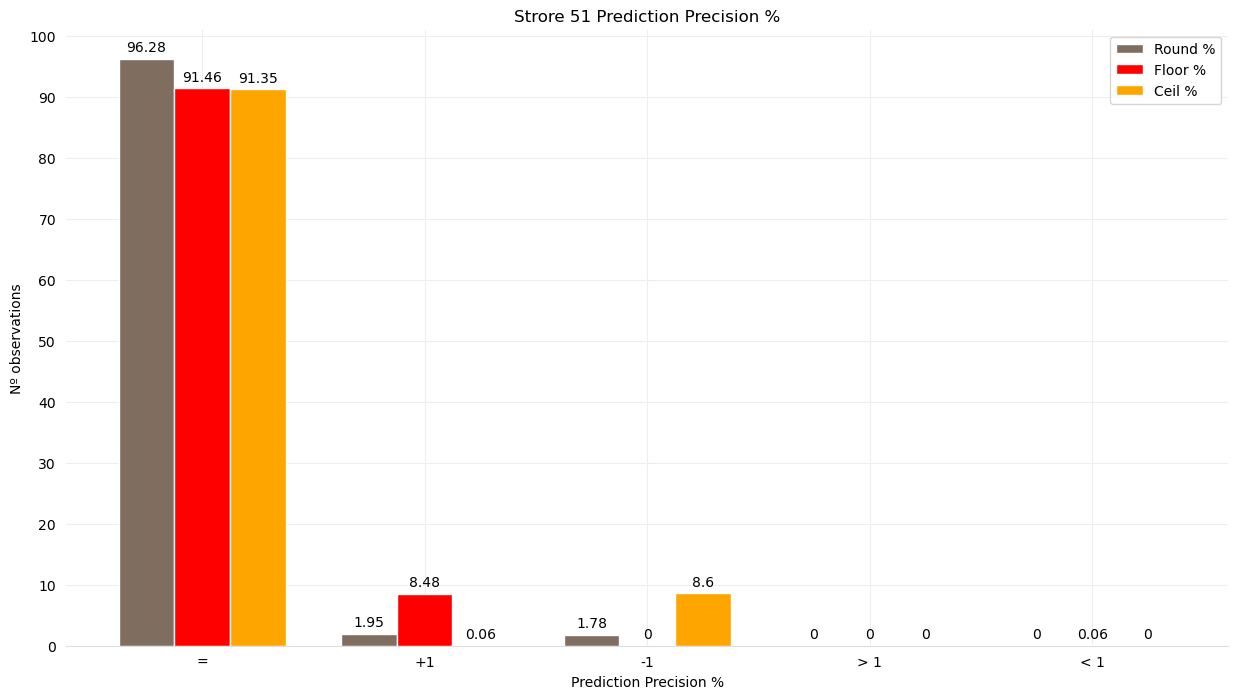

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       1680 |         34 |         31 |          0 |          0  
  Floor                |       1596 |        148 |          0 |          0 |          1  
  Ceil                 |       1594 |          1 |        150 |          0 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      96.28 |       1.95 |       1.78 |        0.0 |        0.0  
  Floor % 

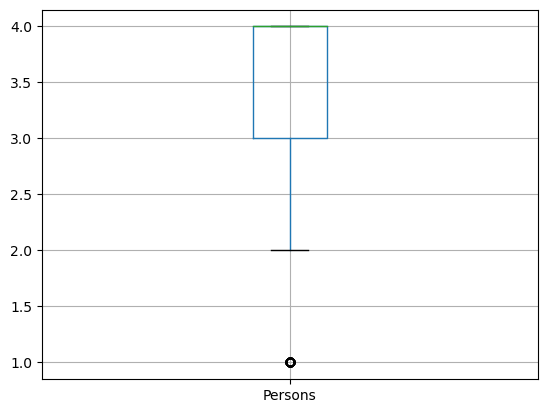

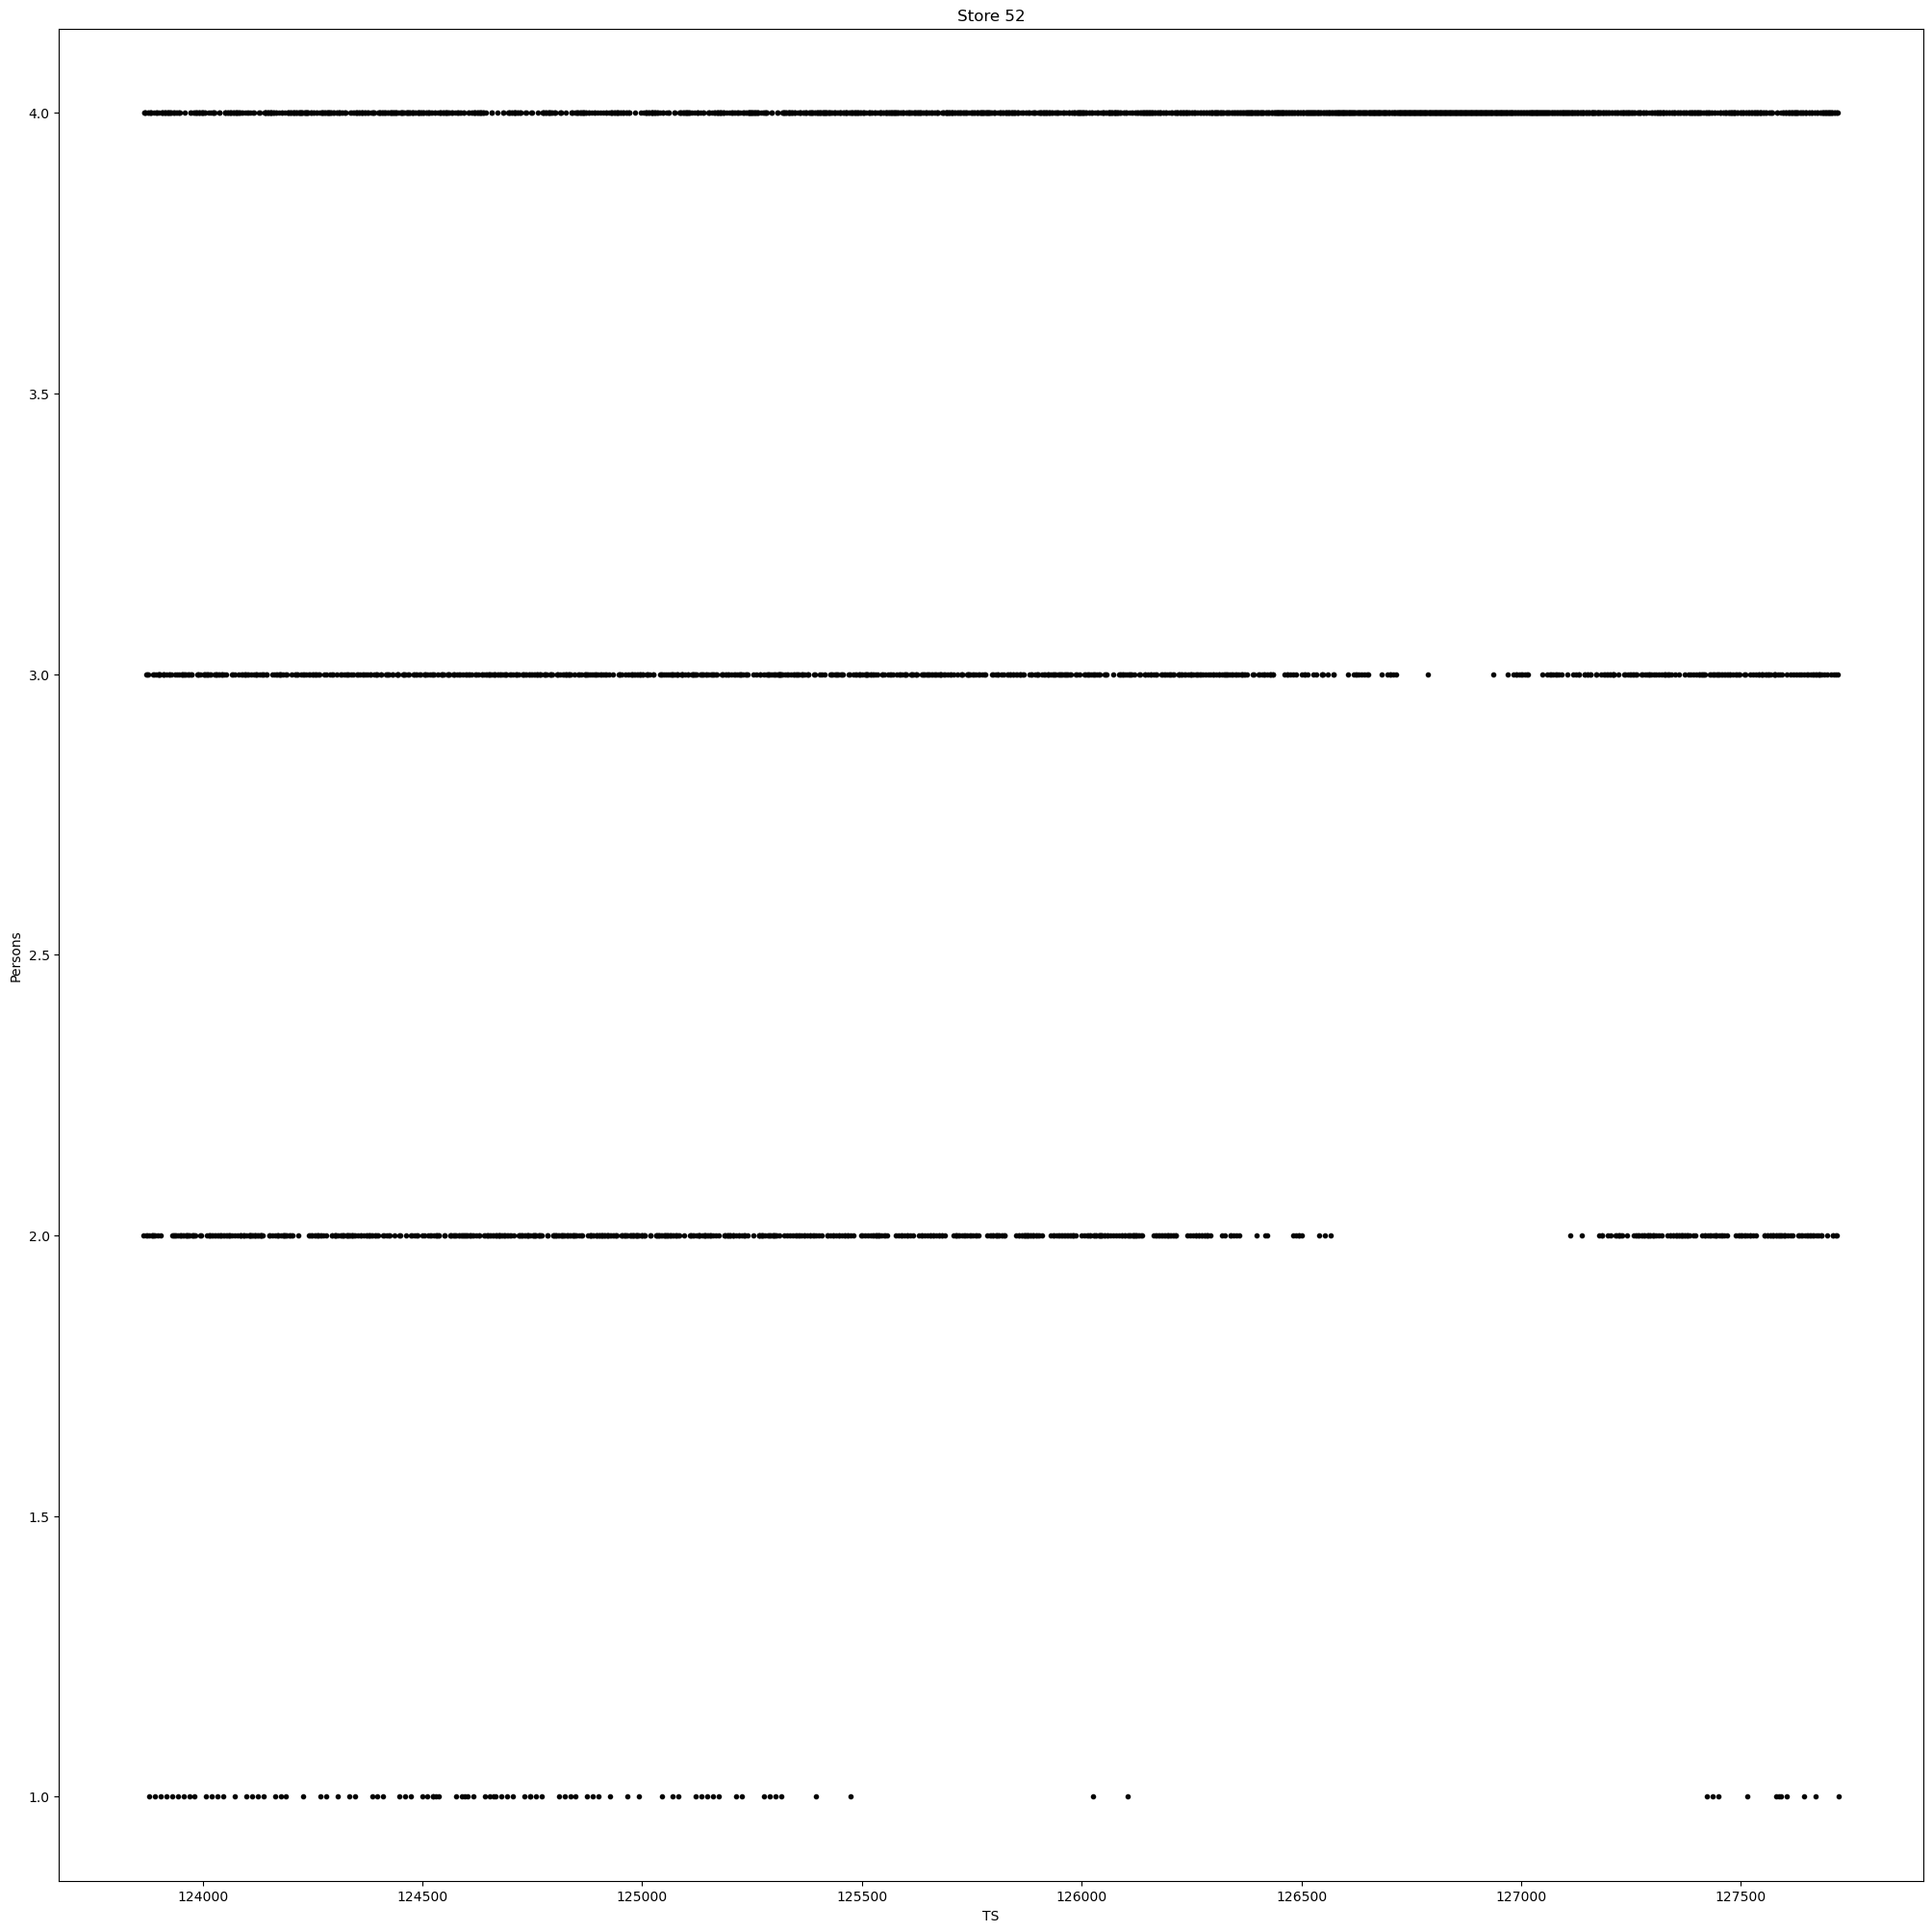

> 1: real: 2  estimated: 4


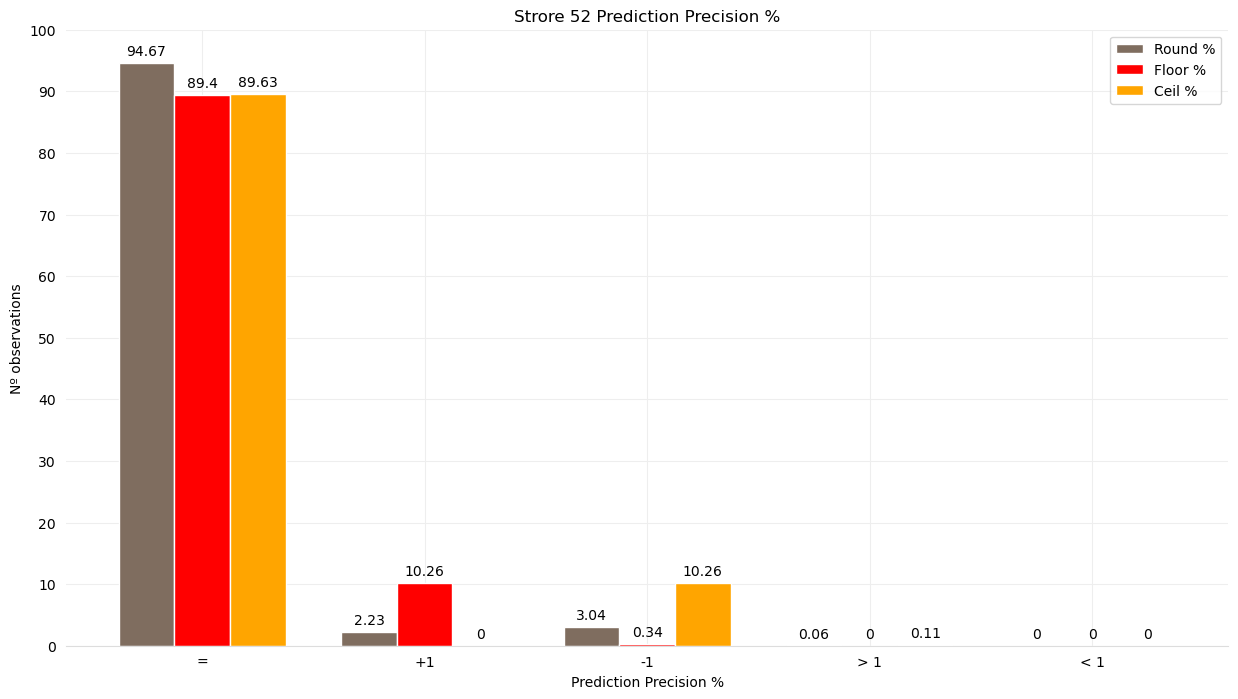

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       1652 |         39 |         53 |          1 |          0  
  Floor                |       1560 |        179 |          6 |          0 |          0  
  Ceil                 |       1564 |          0 |        179 |          2 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      94.67 |       2.23 |       3.04 |       0.06 |        0.0  
  Floor % 

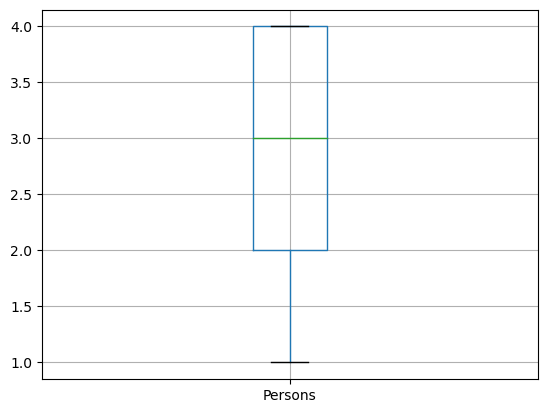

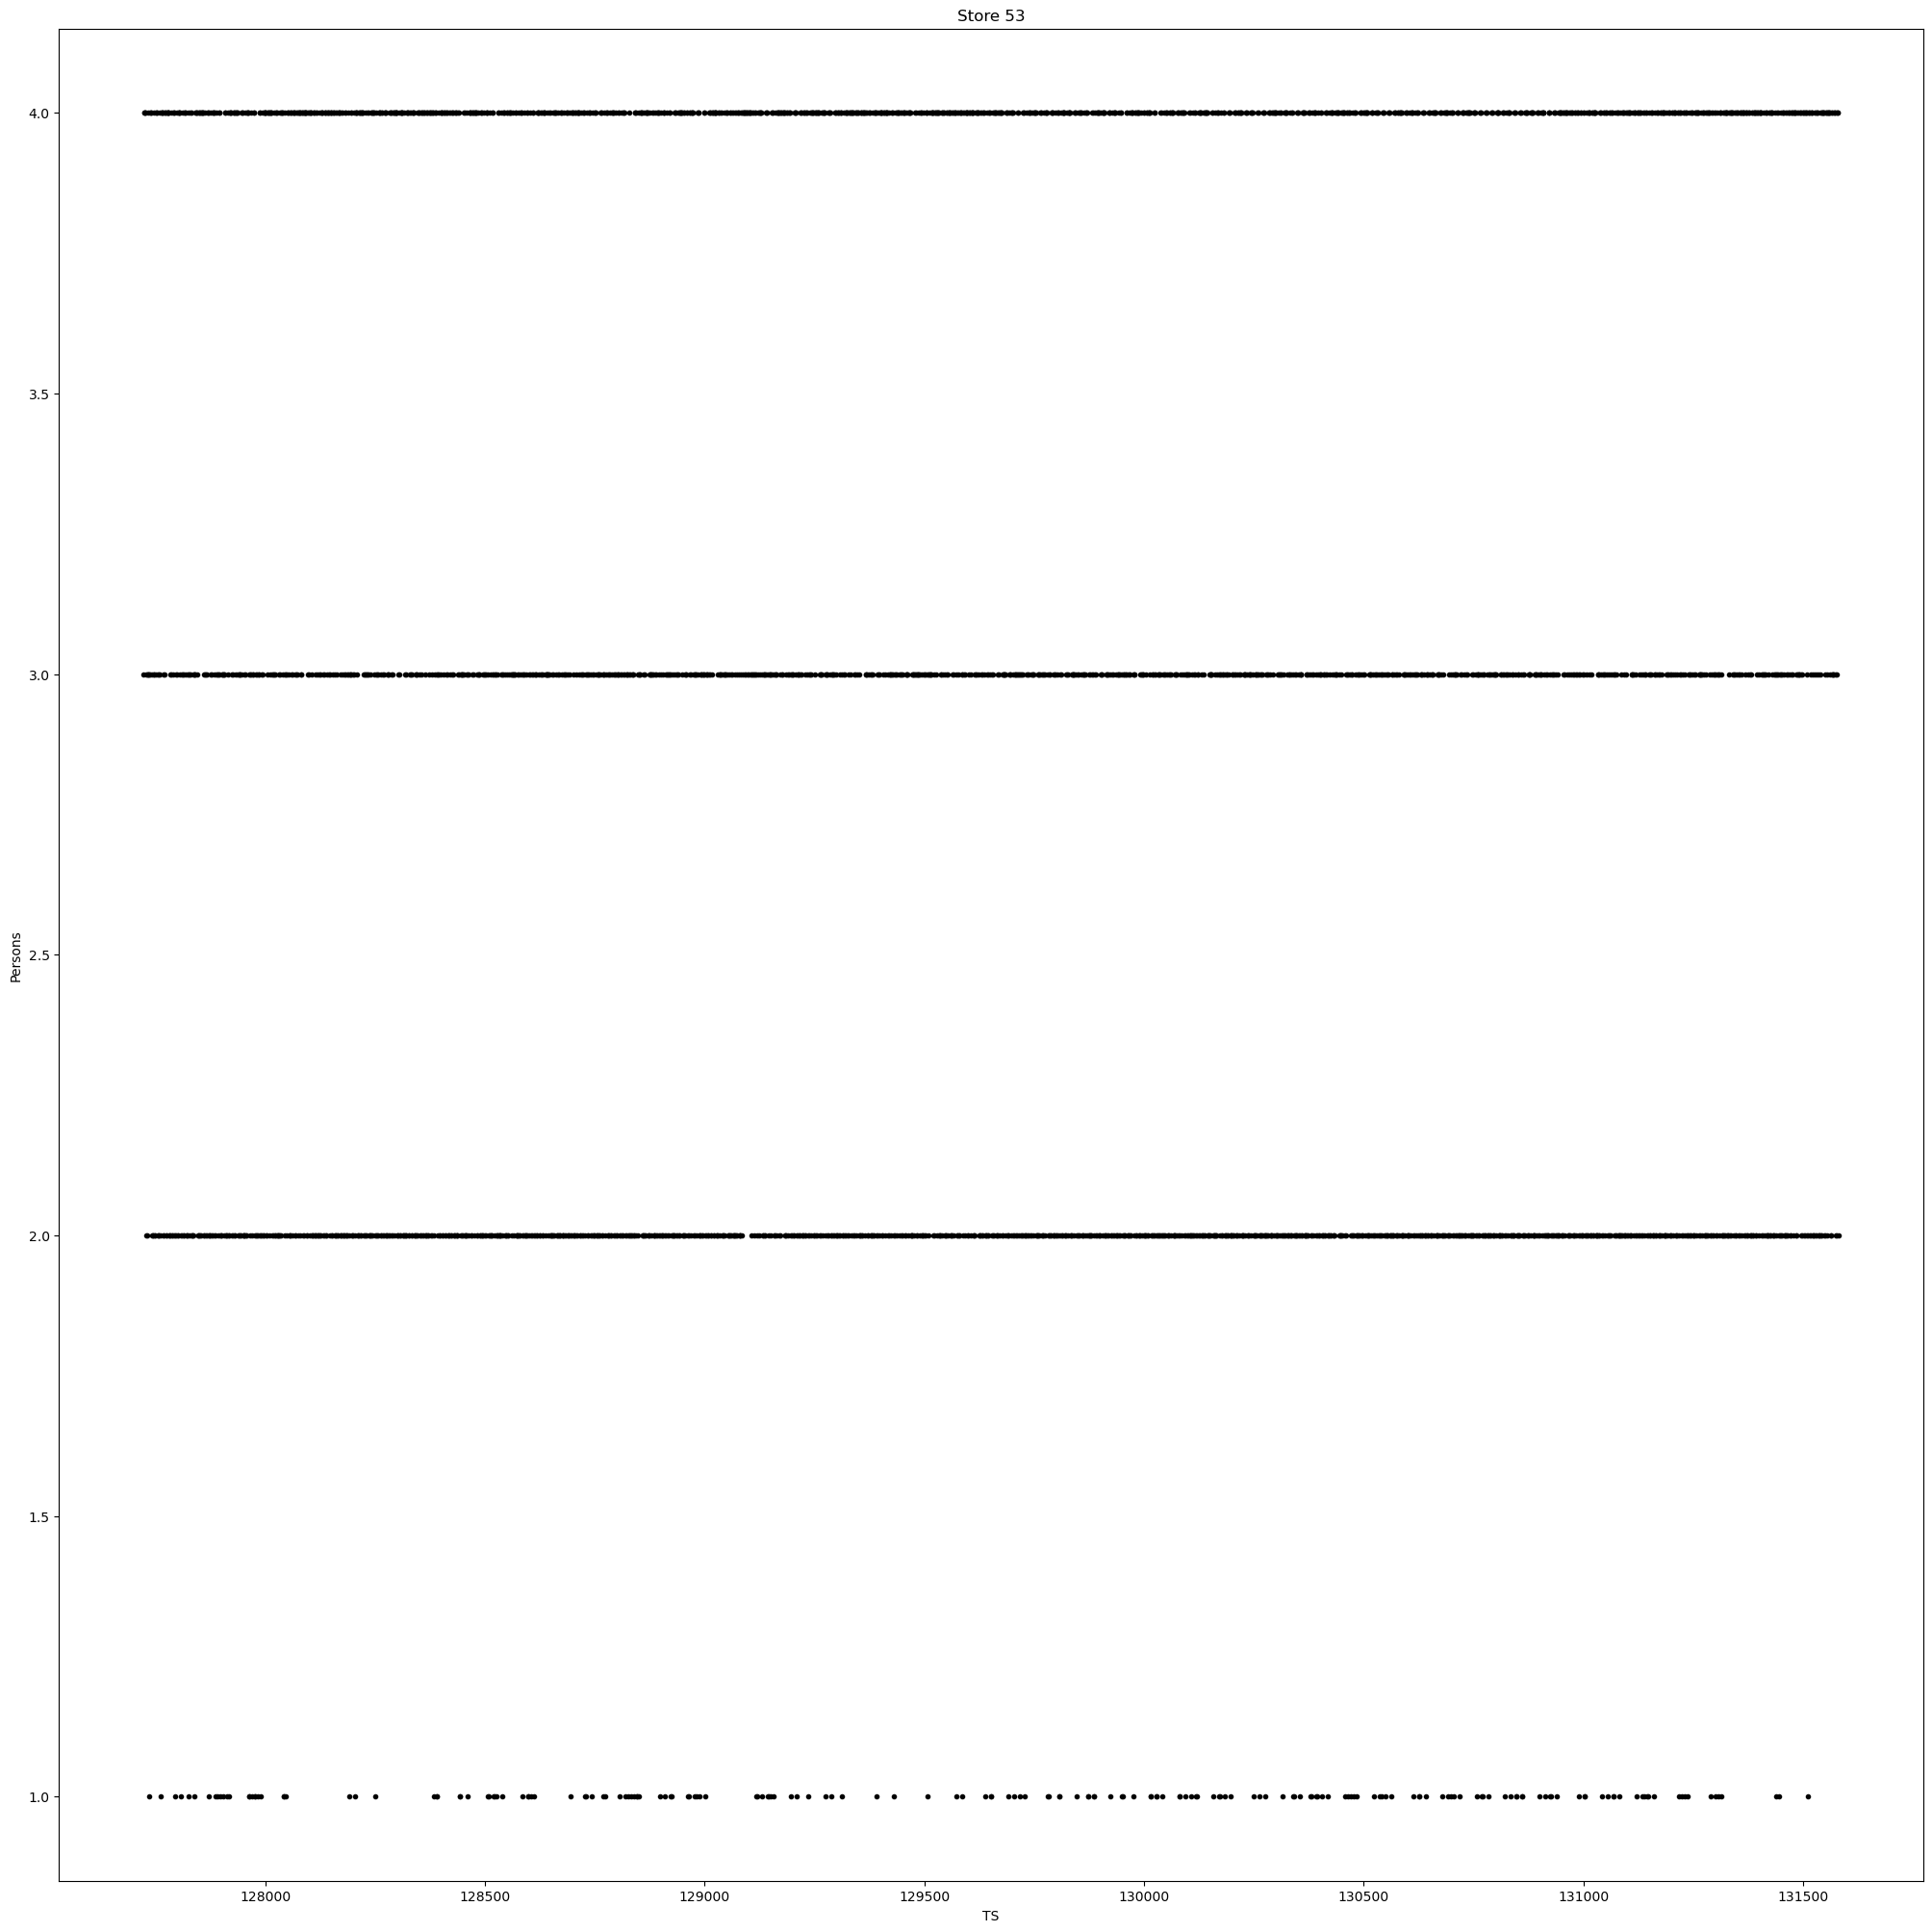

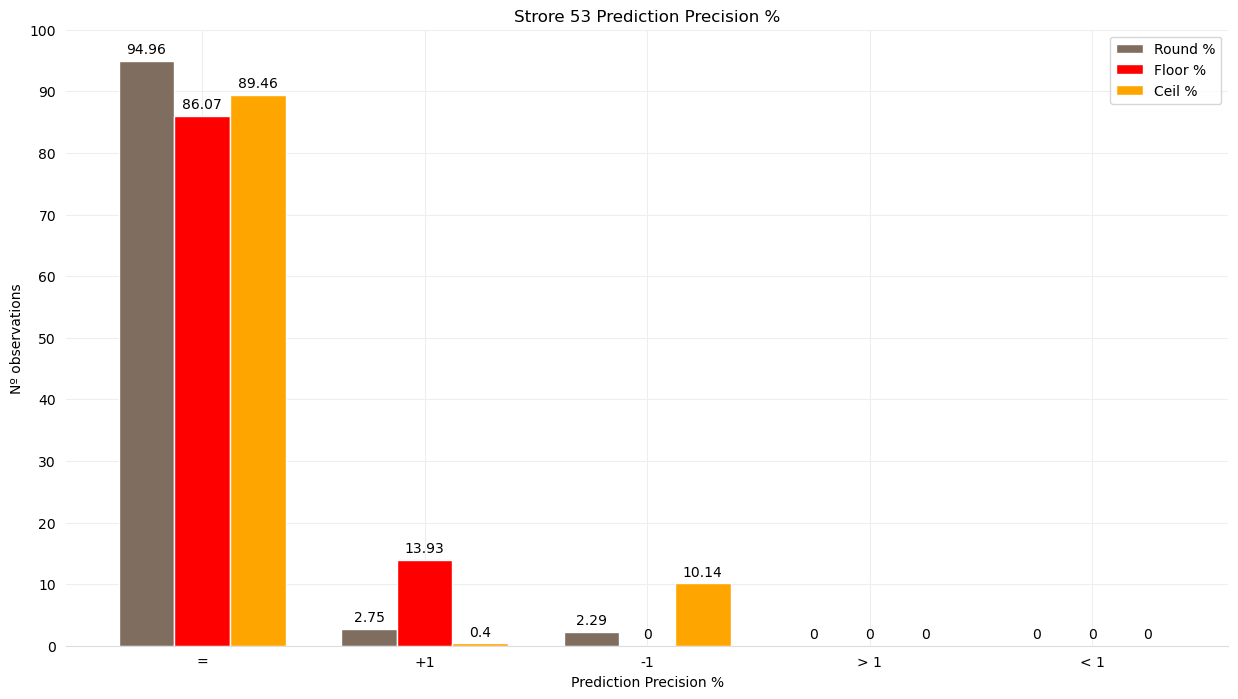

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       1657 |         48 |         40 |          0 |          0  
  Floor                |       1502 |        243 |          0 |          0 |          0  
  Ceil                 |       1561 |          7 |        177 |          0 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      94.96 |       2.75 |       2.29 |        0.0 |        0.0  
  Floor % 

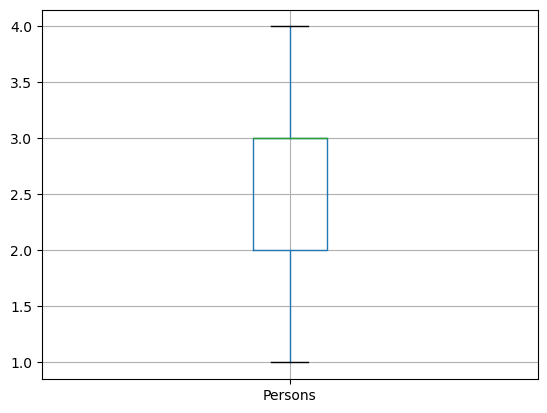

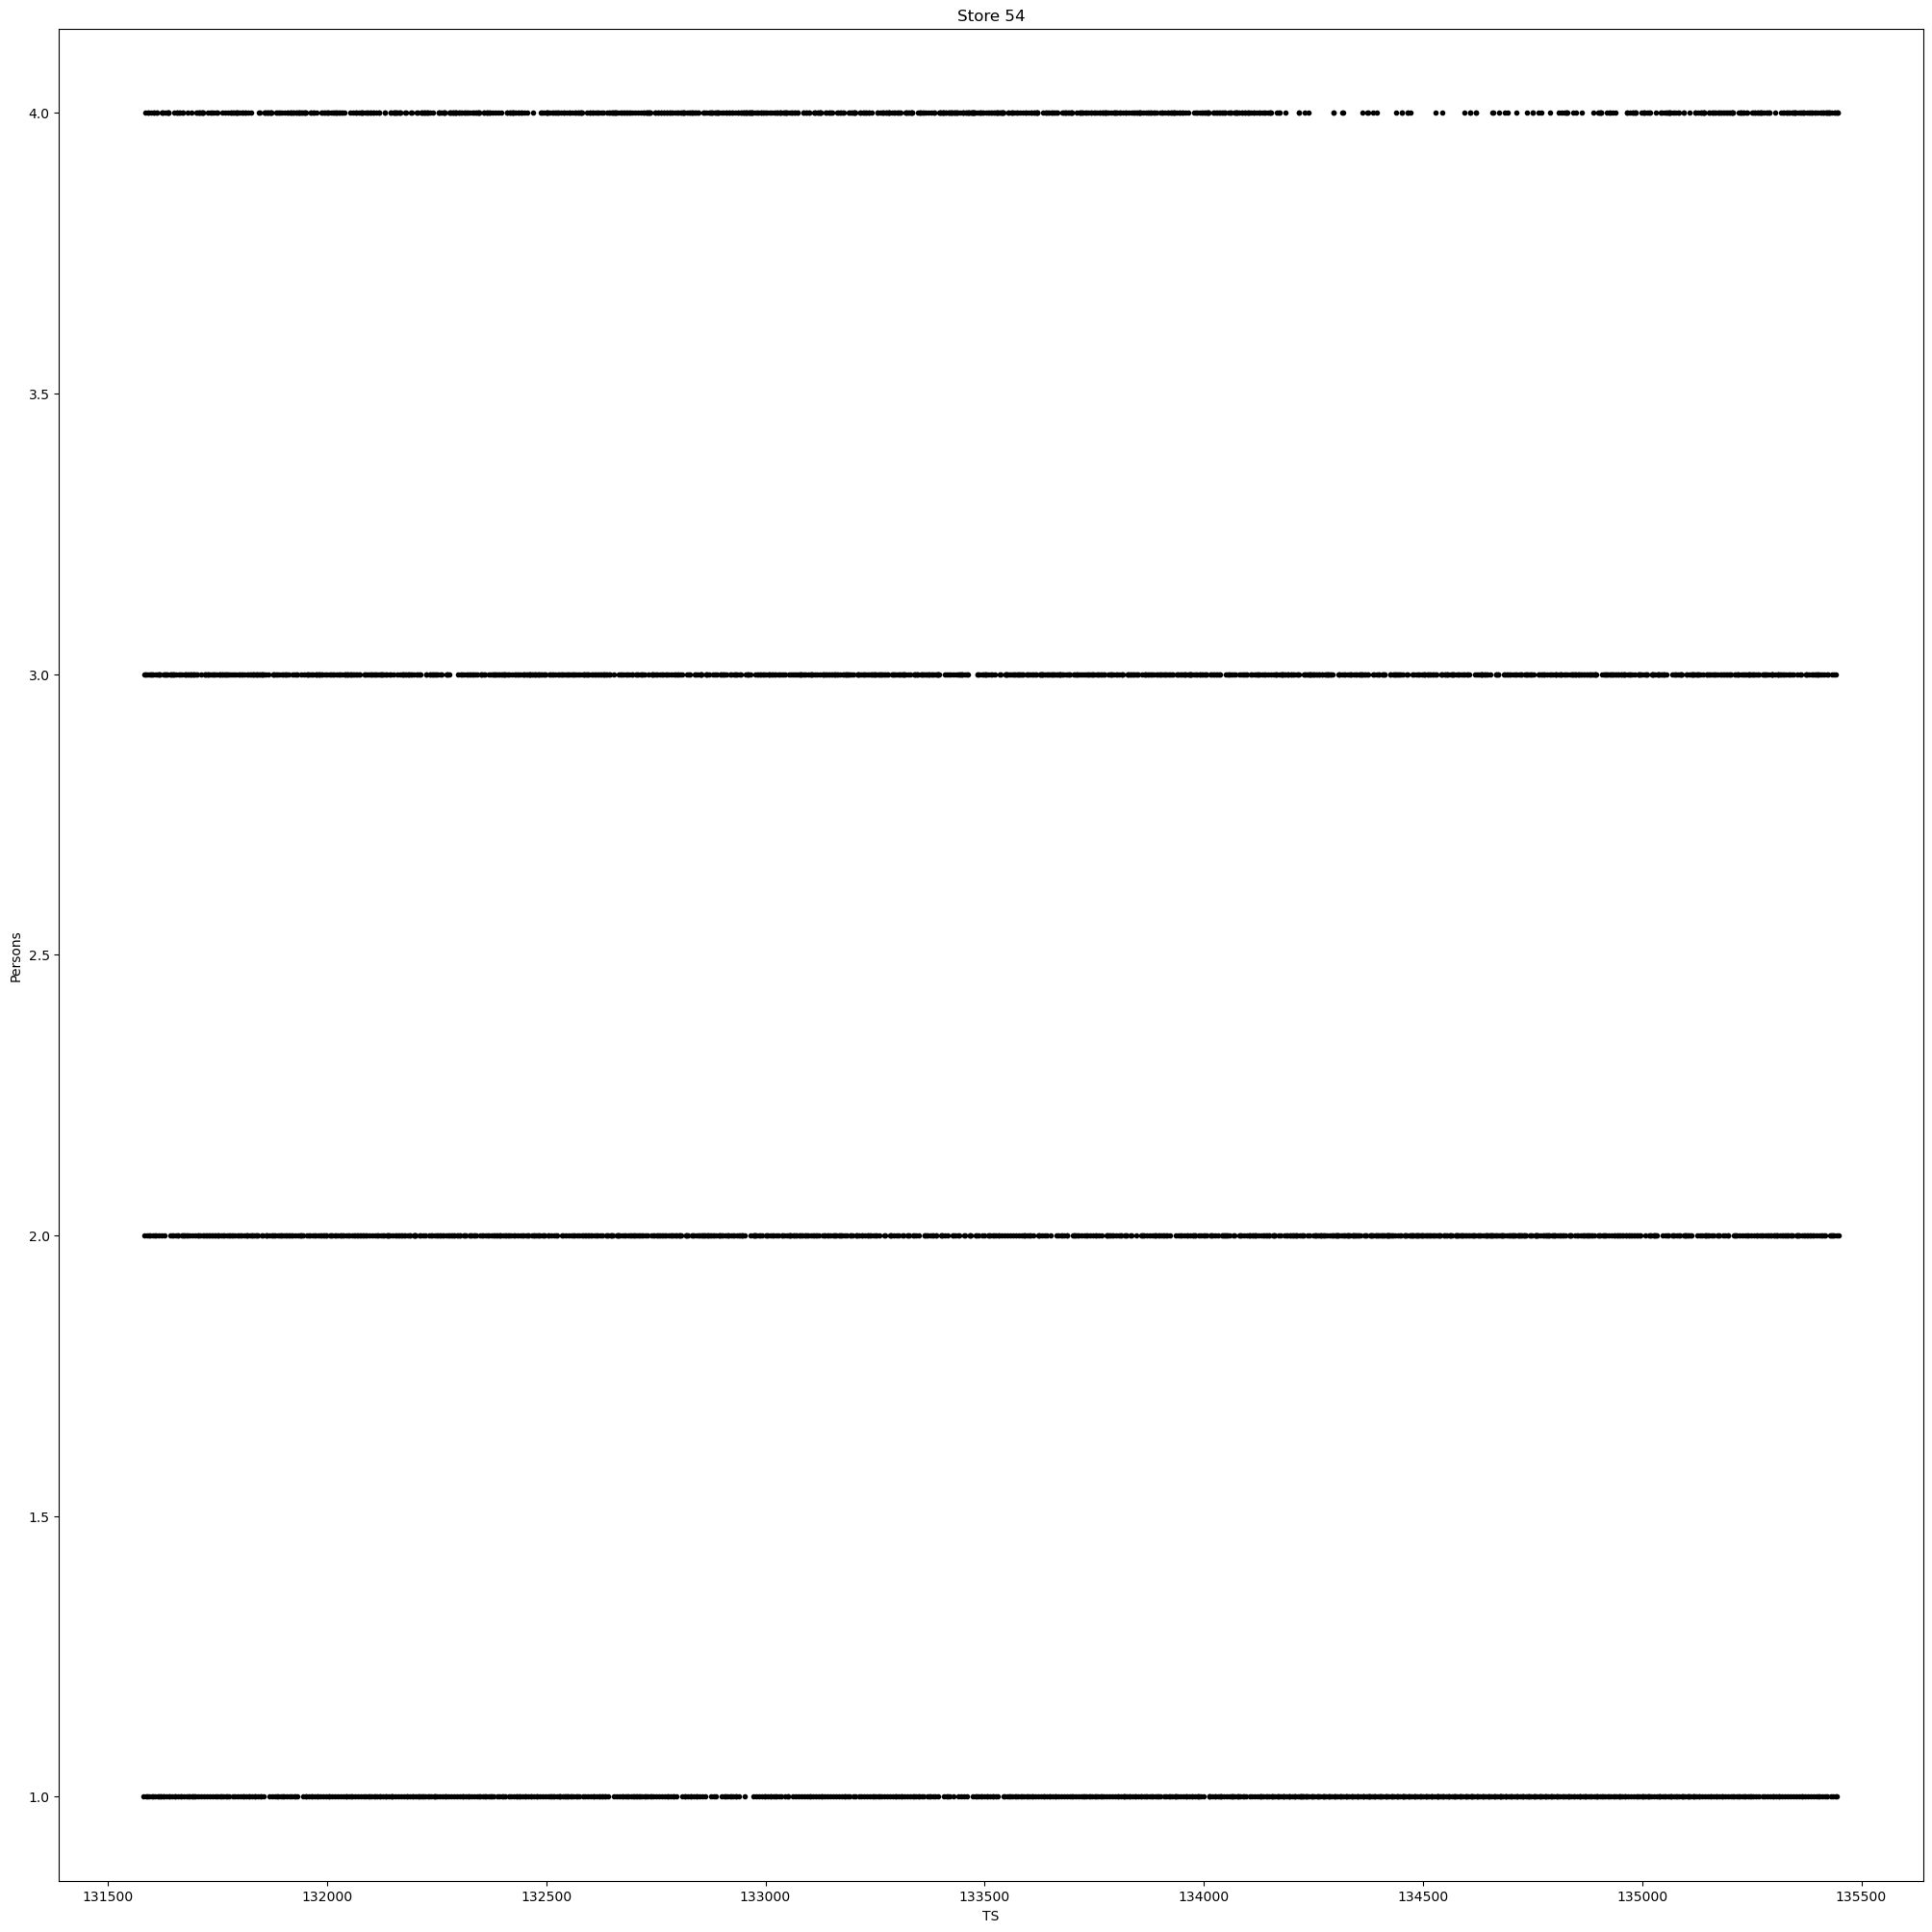

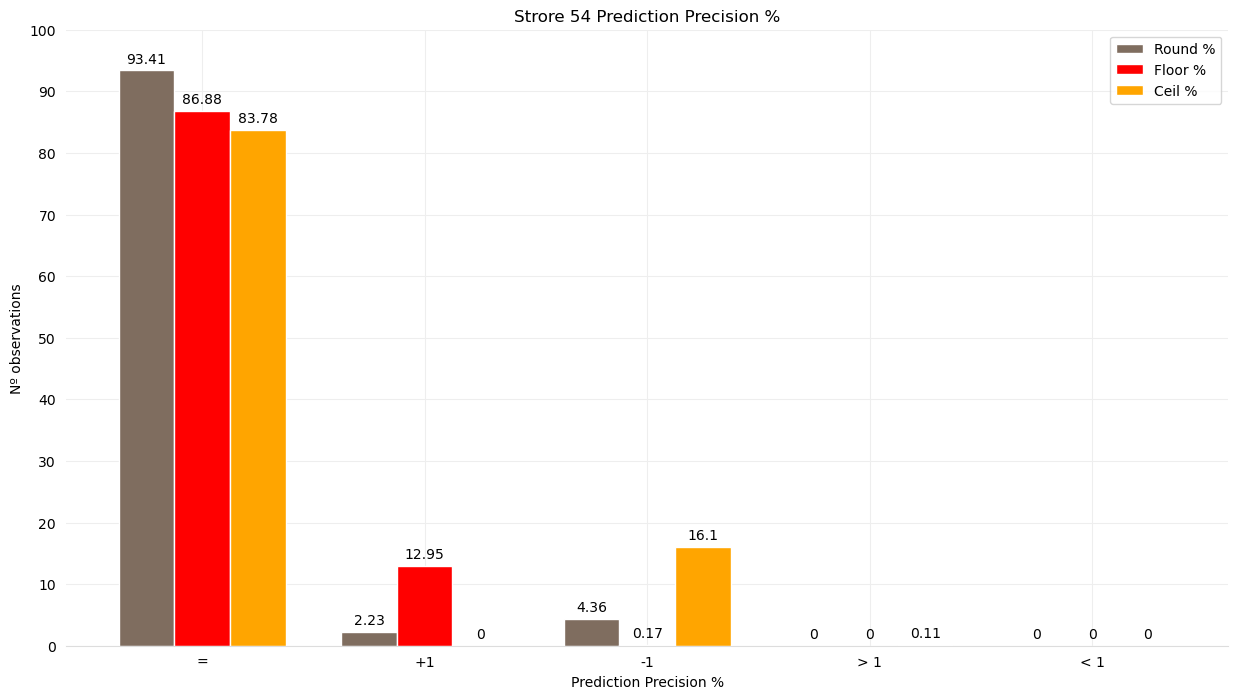

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       1630 |         39 |         76 |          0 |          0  
  Floor                |       1516 |        226 |          3 |          0 |          0  
  Ceil                 |       1462 |          0 |        281 |          2 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      93.41 |       2.23 |       4.36 |        0.0 |        0.0  
  Floor % 

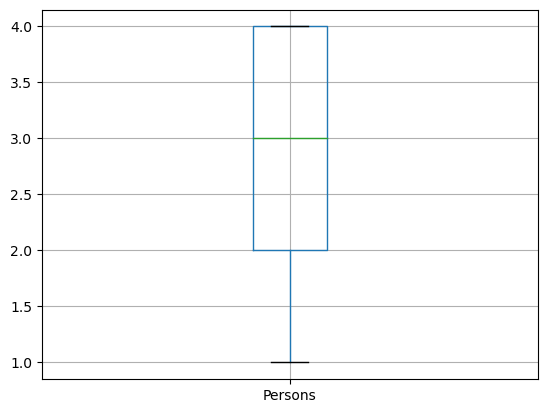

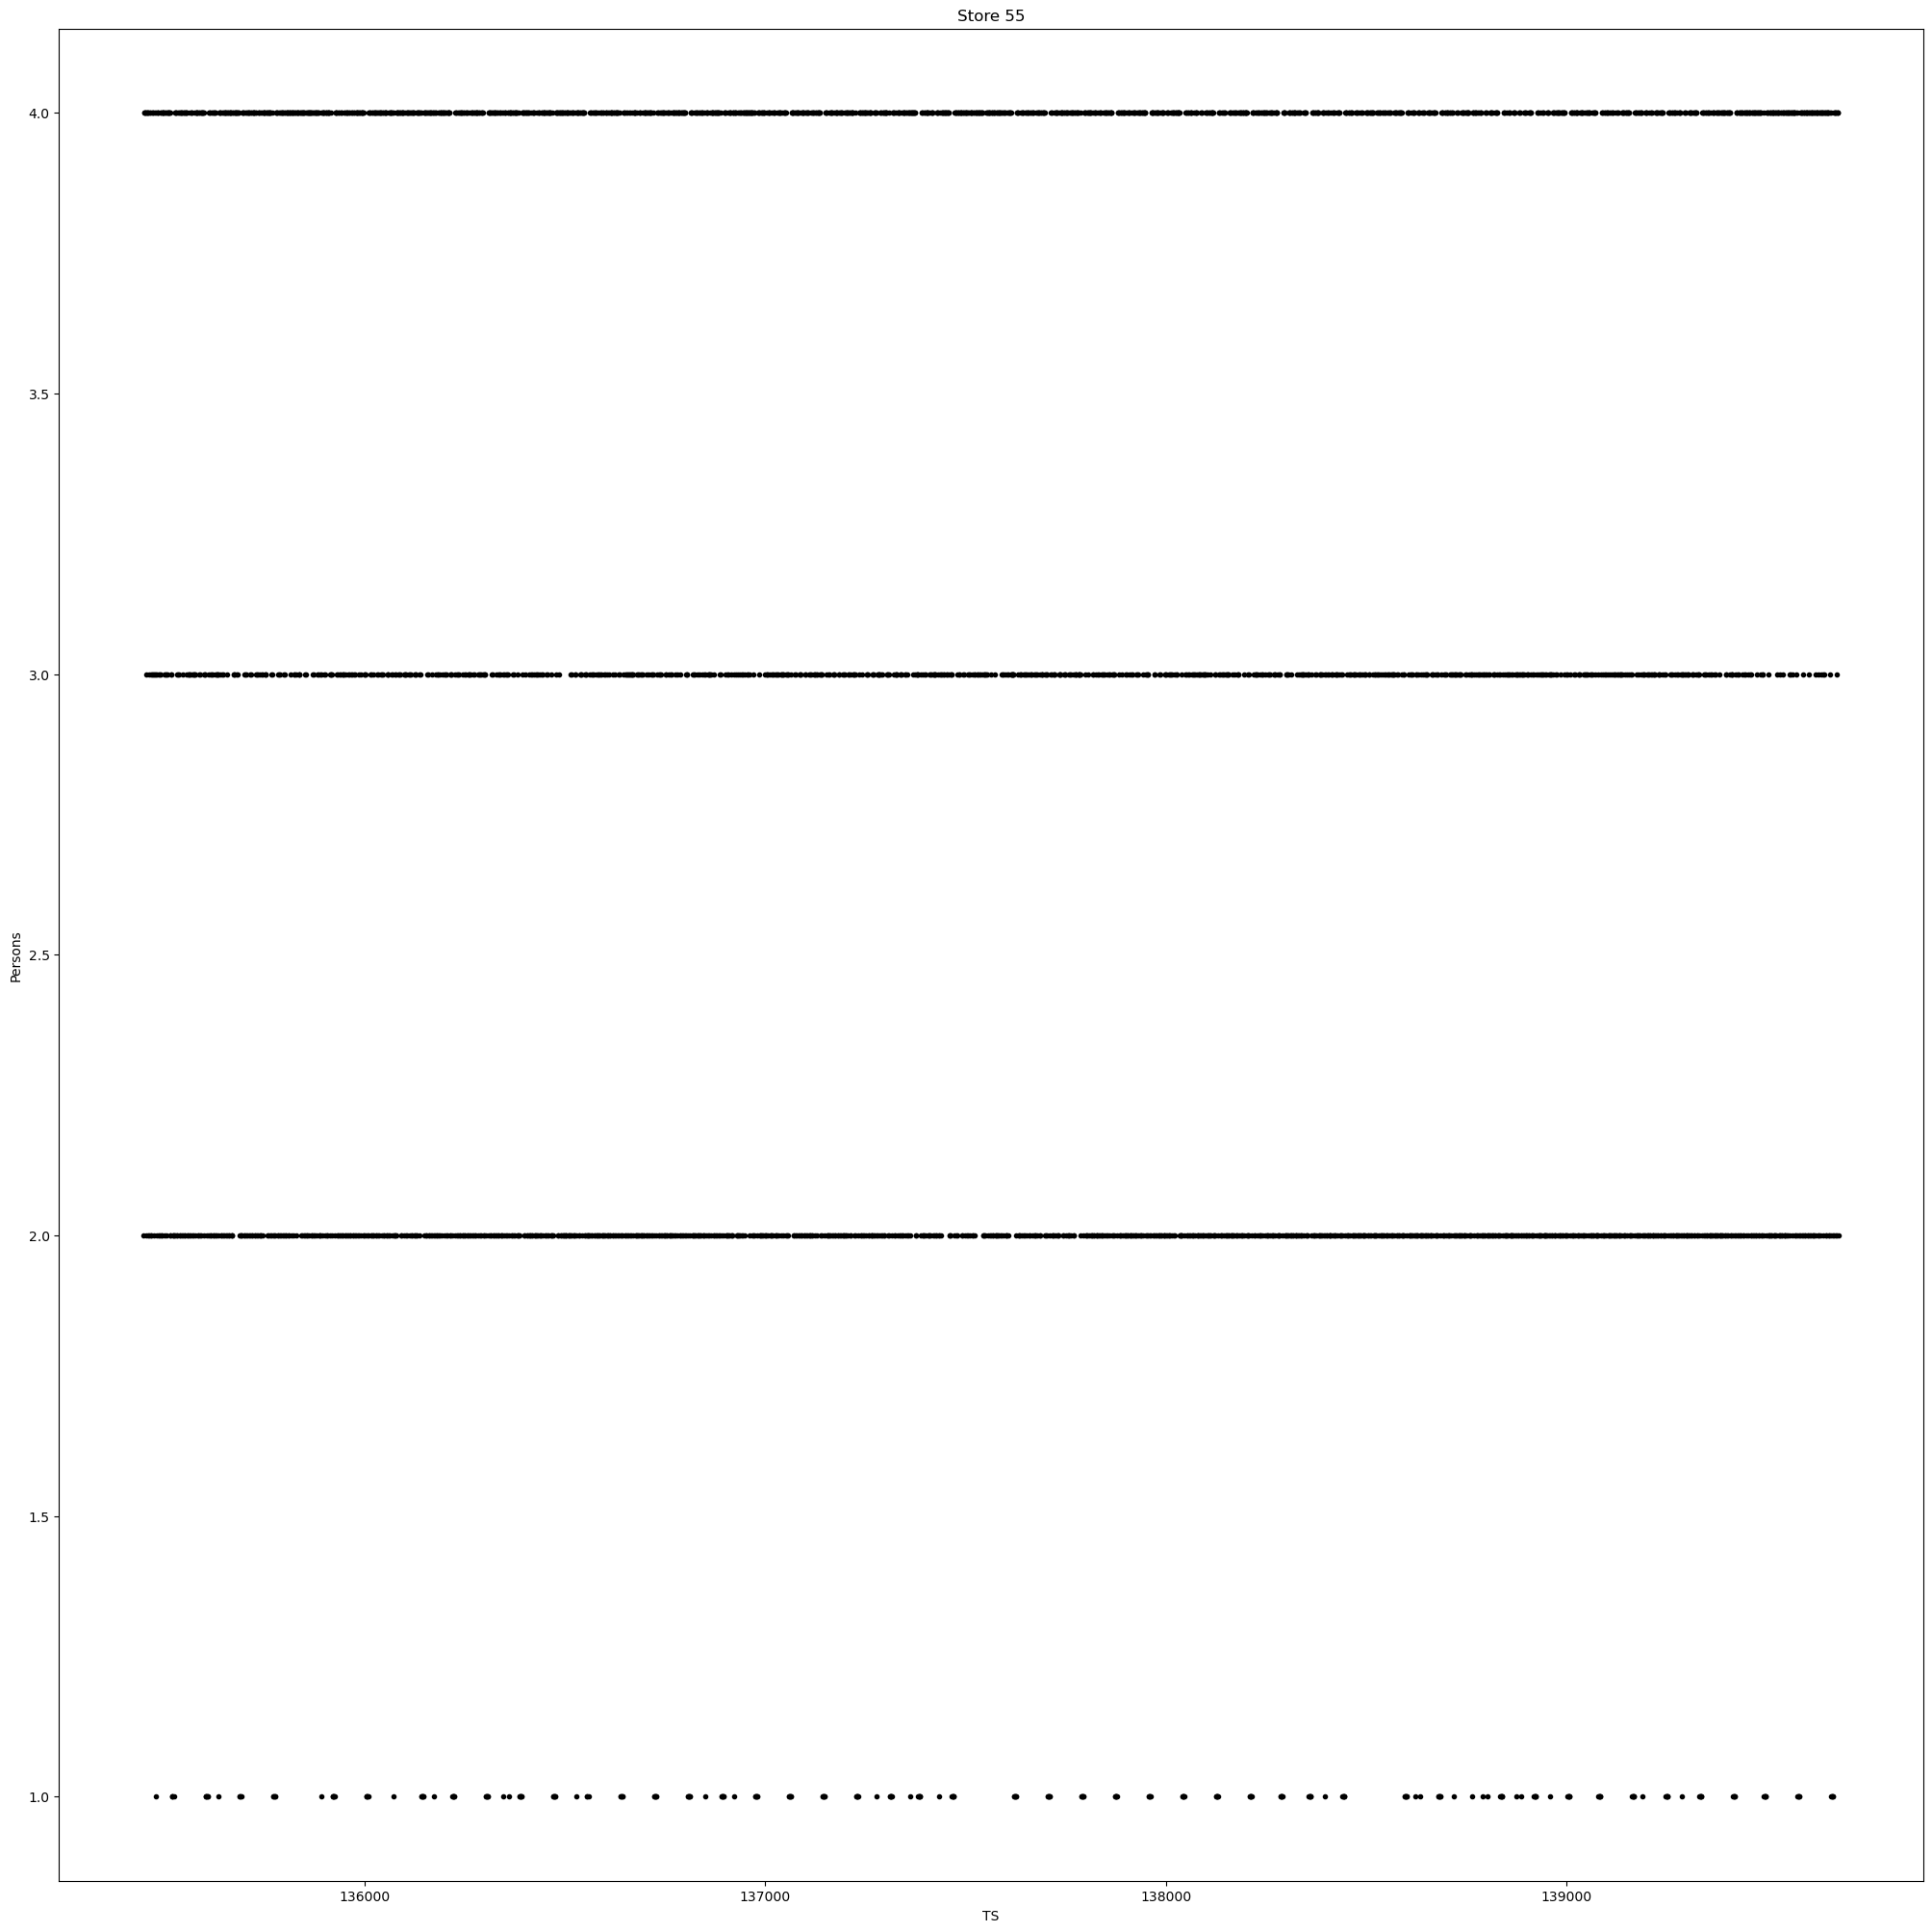

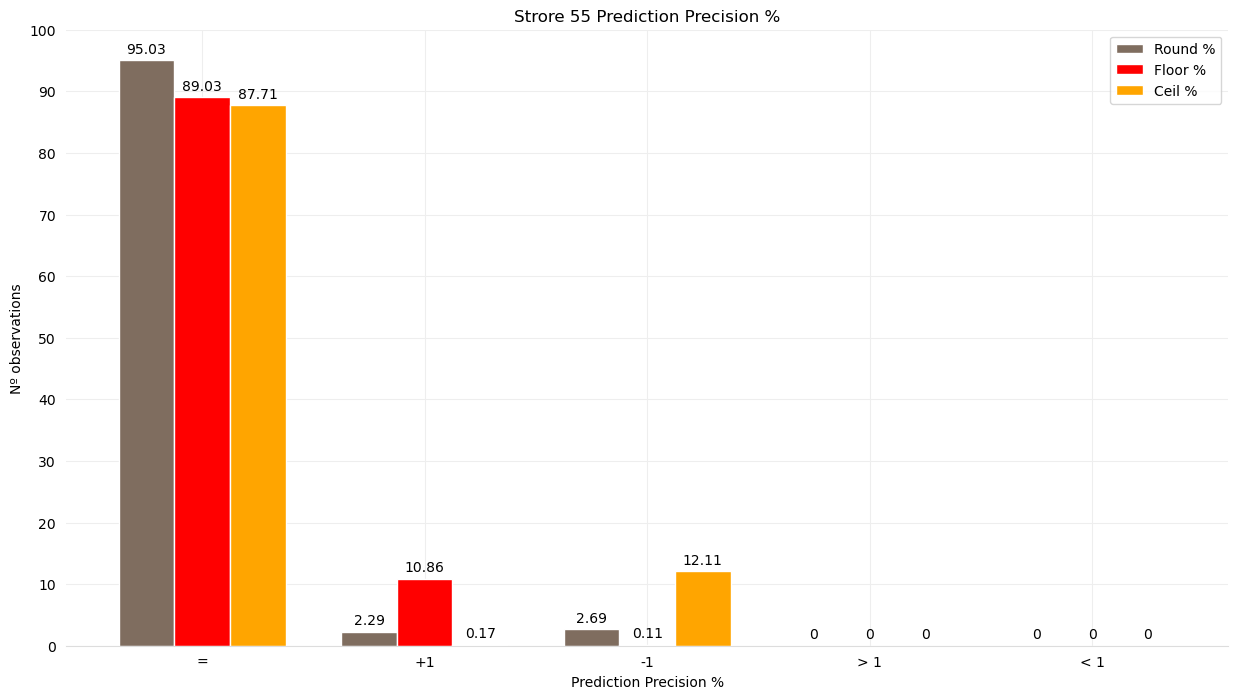

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       1663 |         40 |         47 |          0 |          0  
  Floor                |       1558 |        190 |          2 |          0 |          0  
  Ceil                 |       1535 |          3 |        212 |          0 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      95.03 |       2.29 |       2.69 |        0.0 |        0.0  
  Floor % 

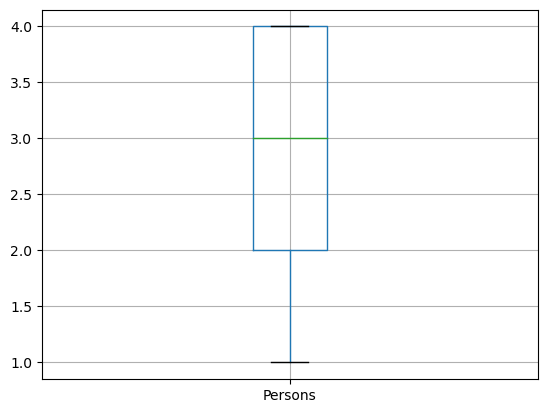

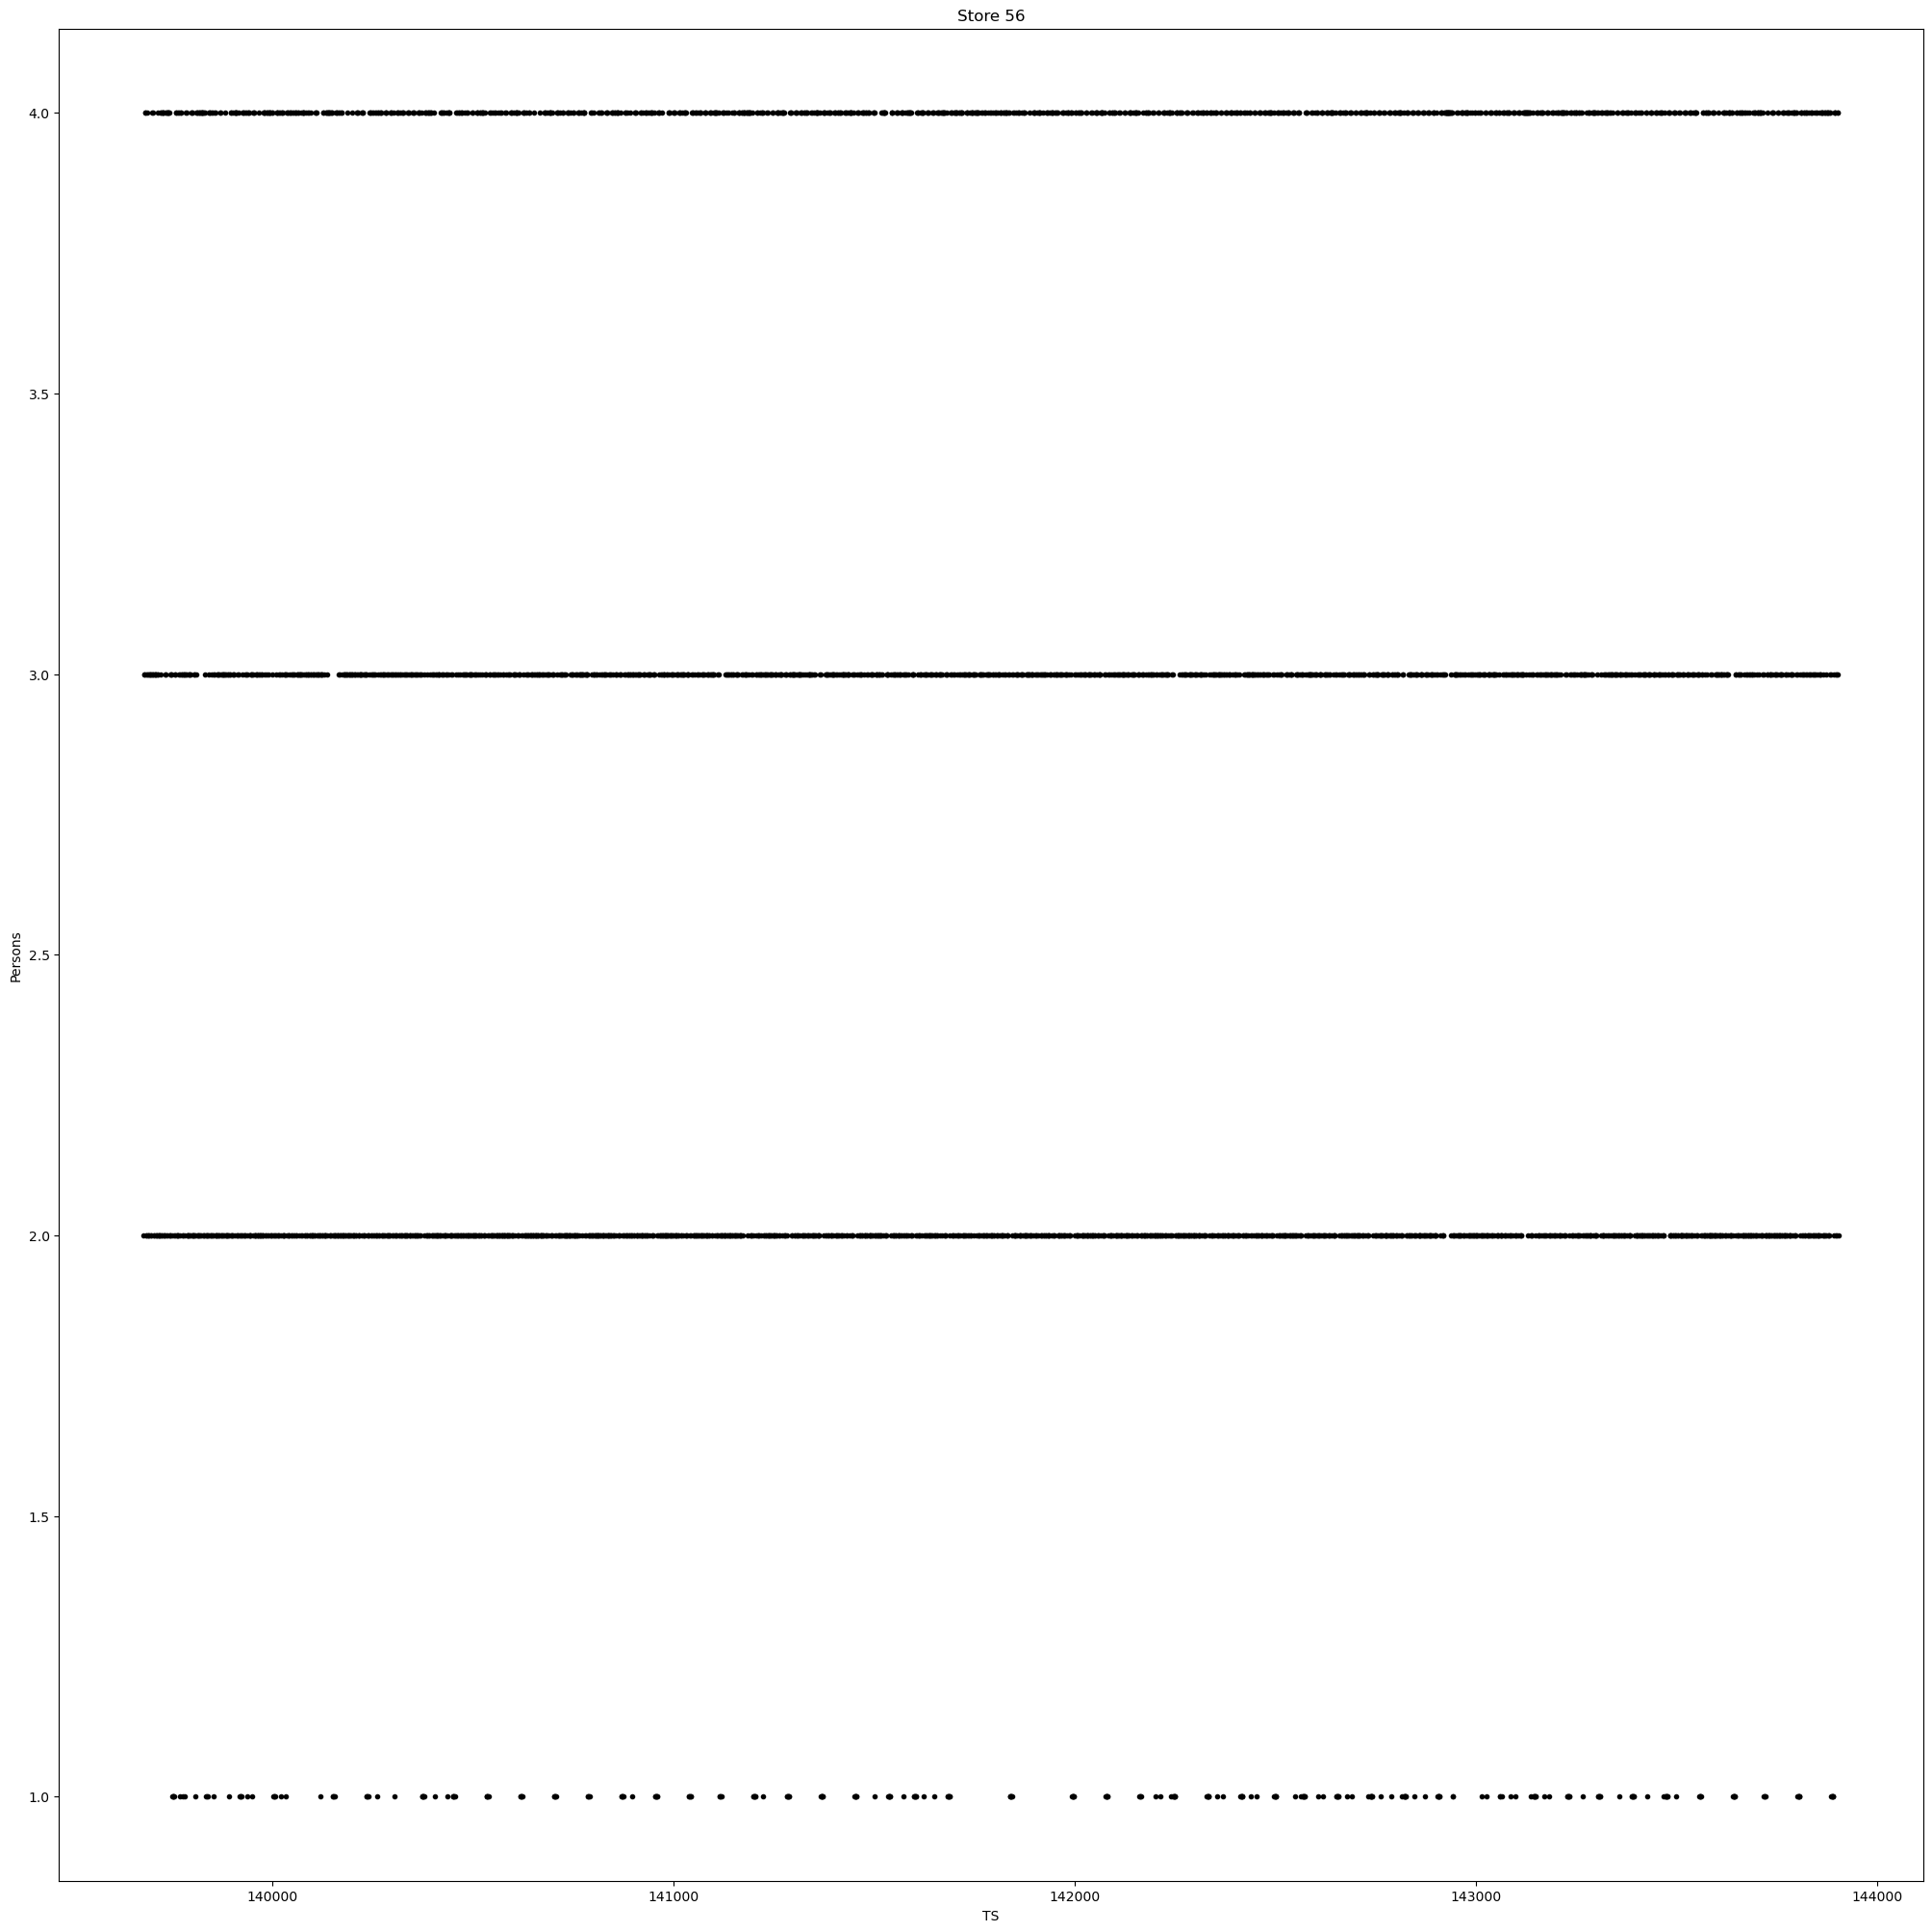

< 1: real: 4  estimated: 2
< 1: real: 4  estimated: 2


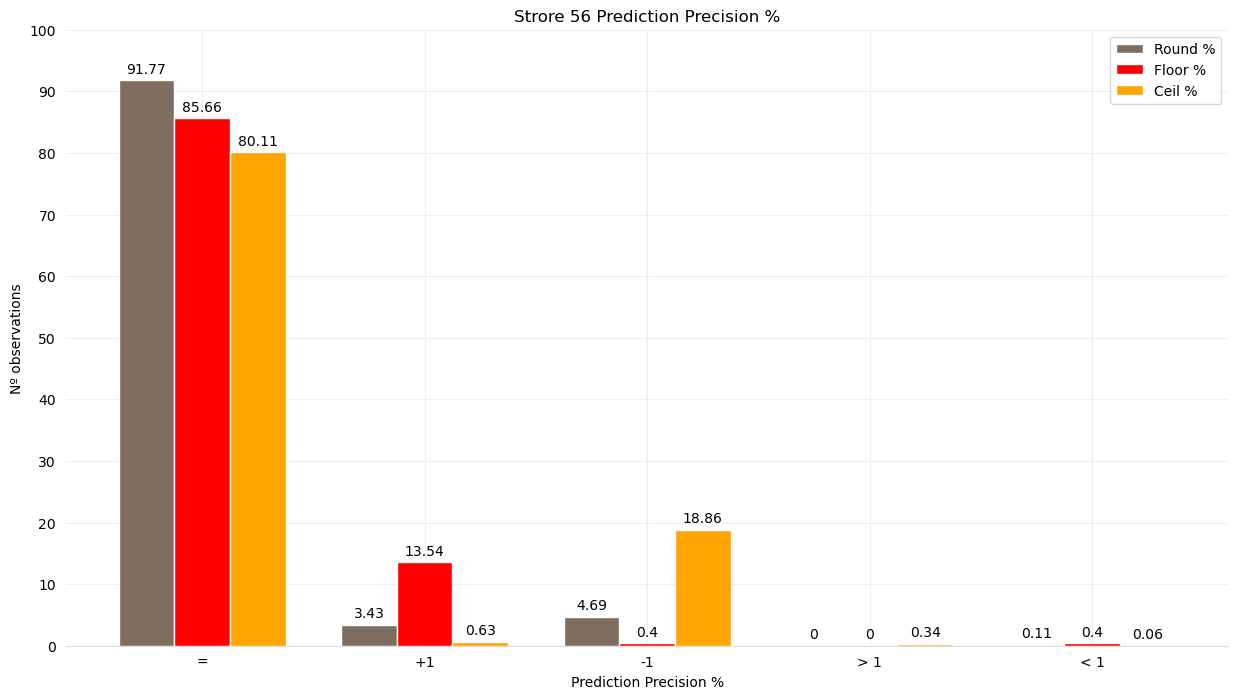

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       1606 |         60 |         82 |          0 |          2  
  Floor                |       1499 |        237 |          7 |          0 |          7  
  Ceil                 |       1402 |         11 |        330 |          6 |          1  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      91.77 |       3.43 |       4.69 |        0.0 |       0.11  
  Floor % 

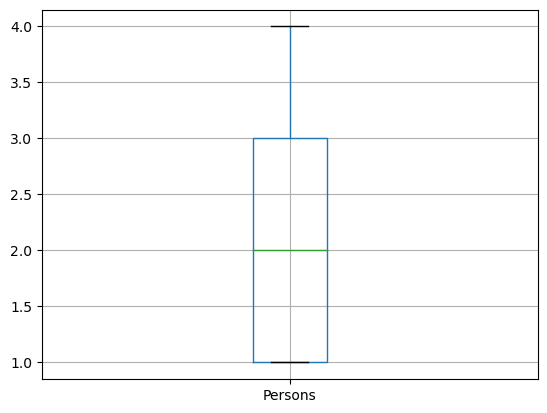

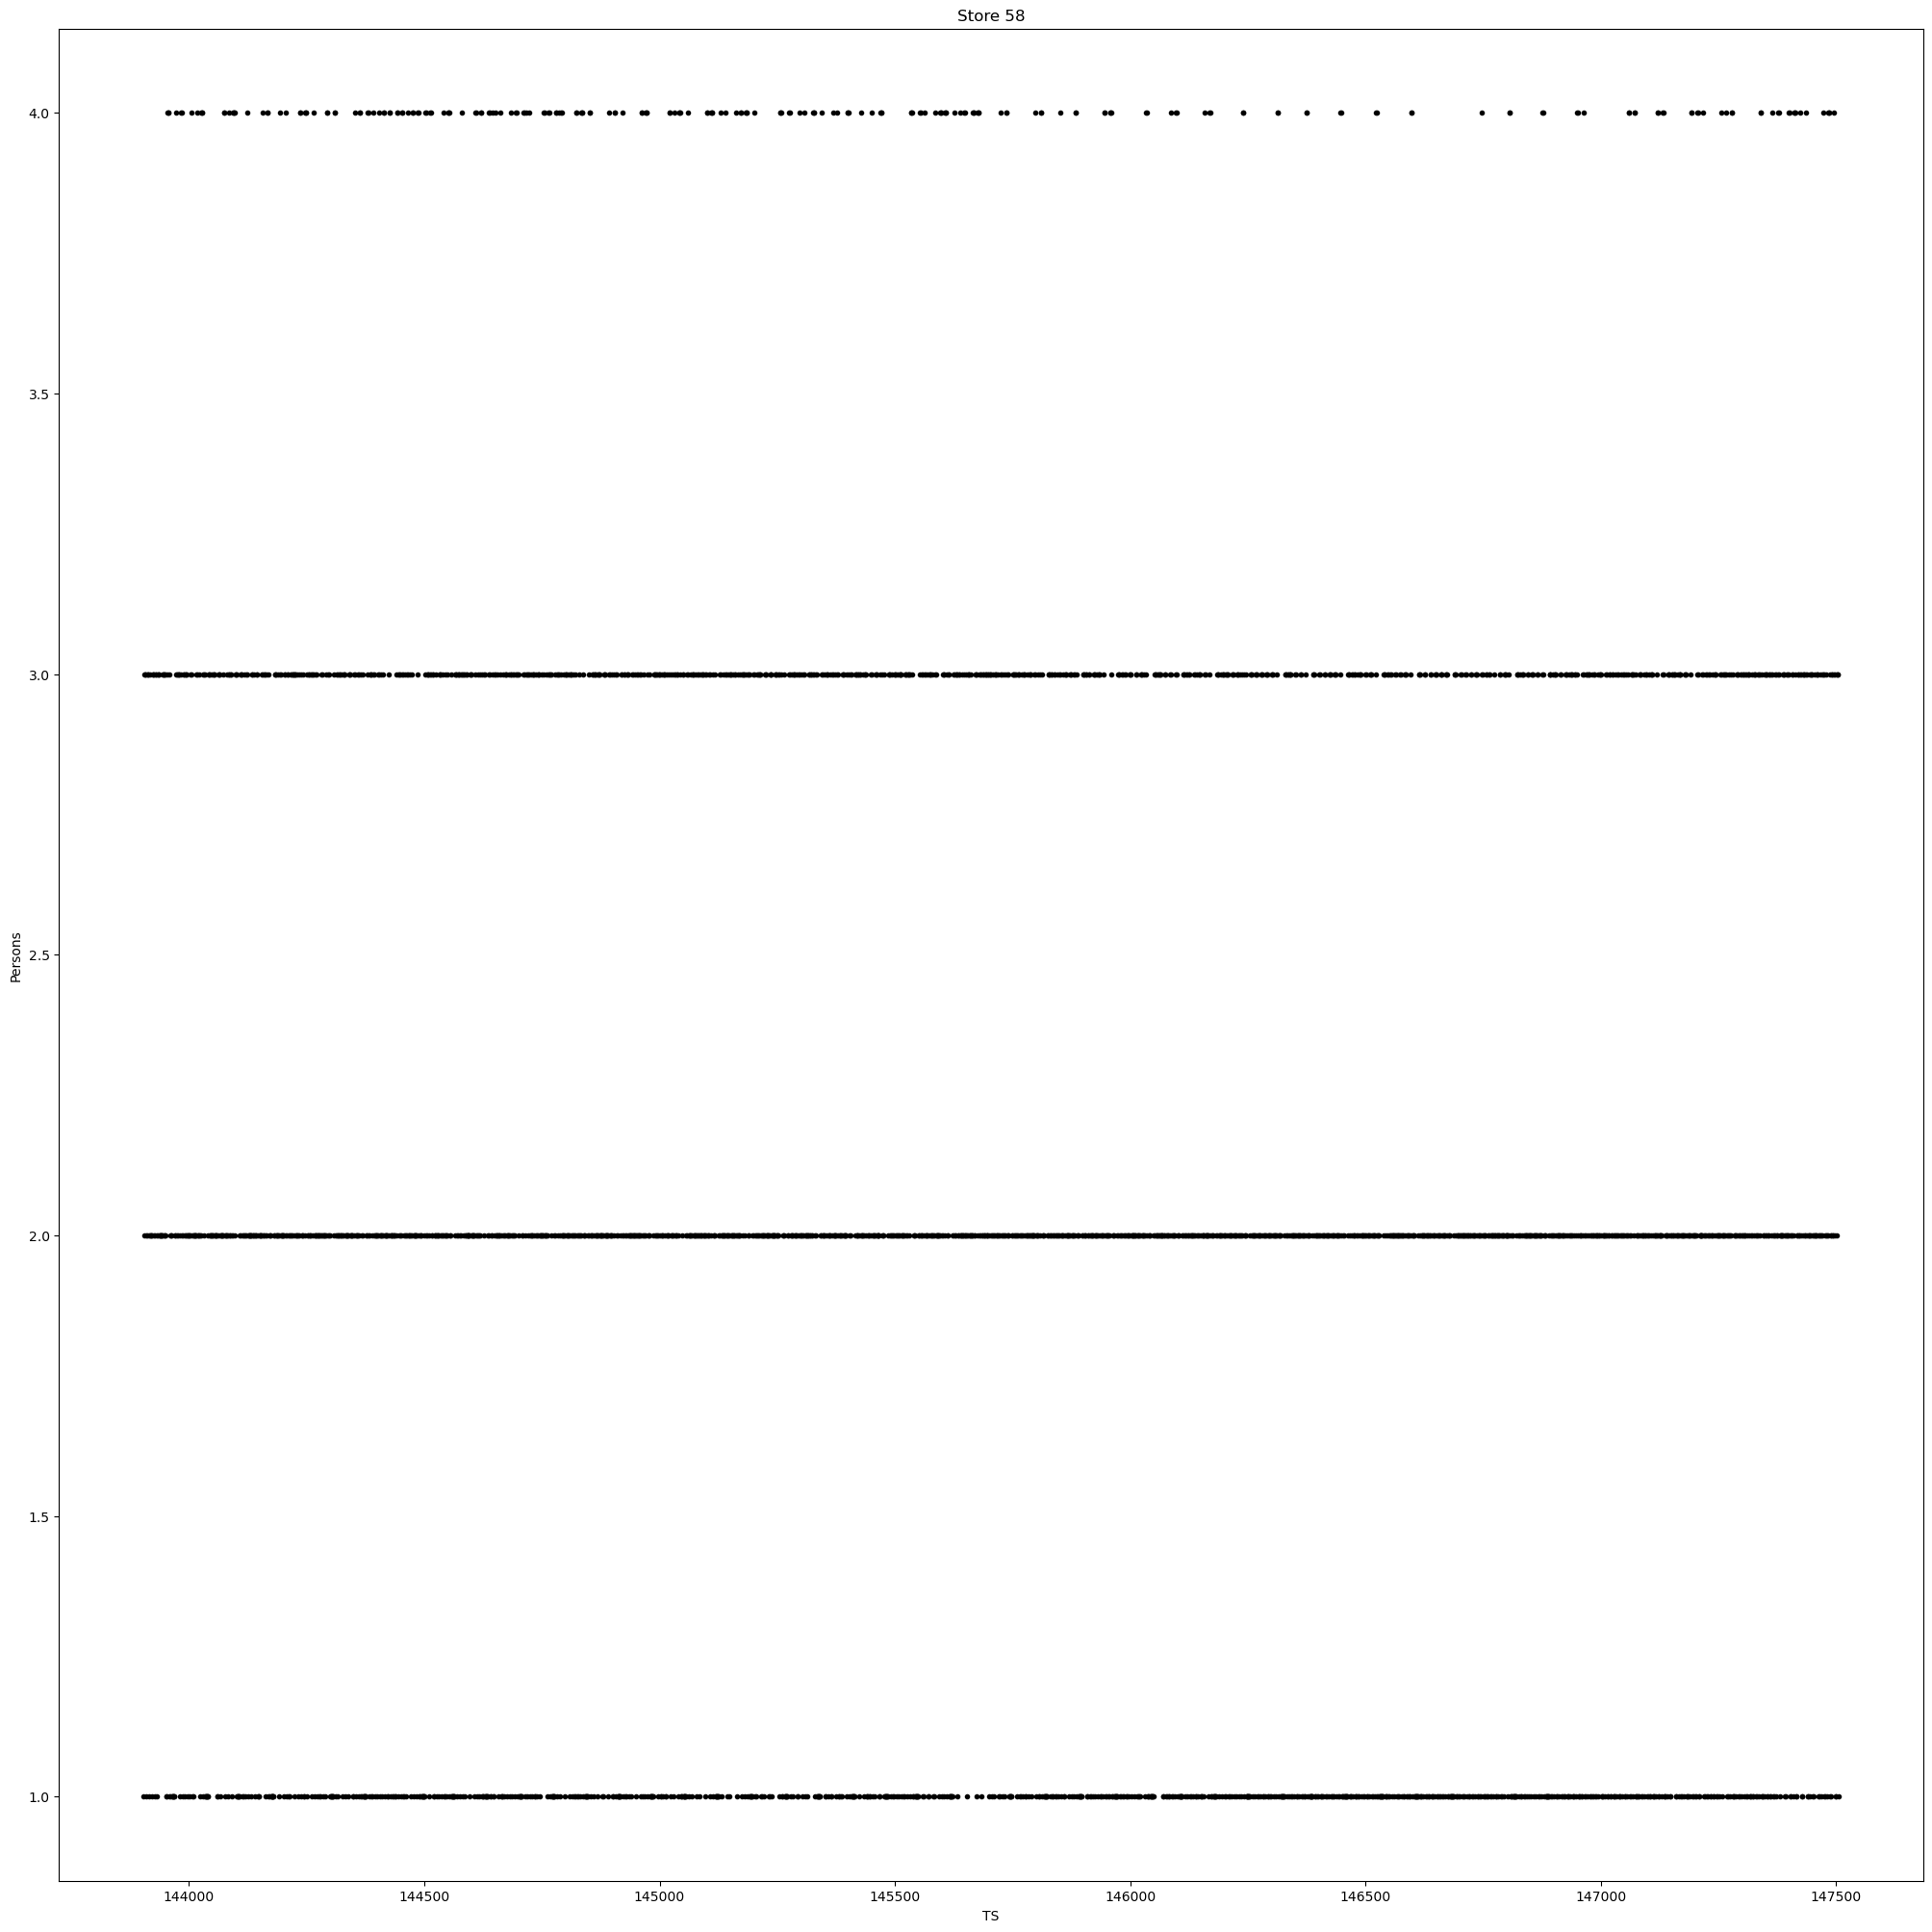

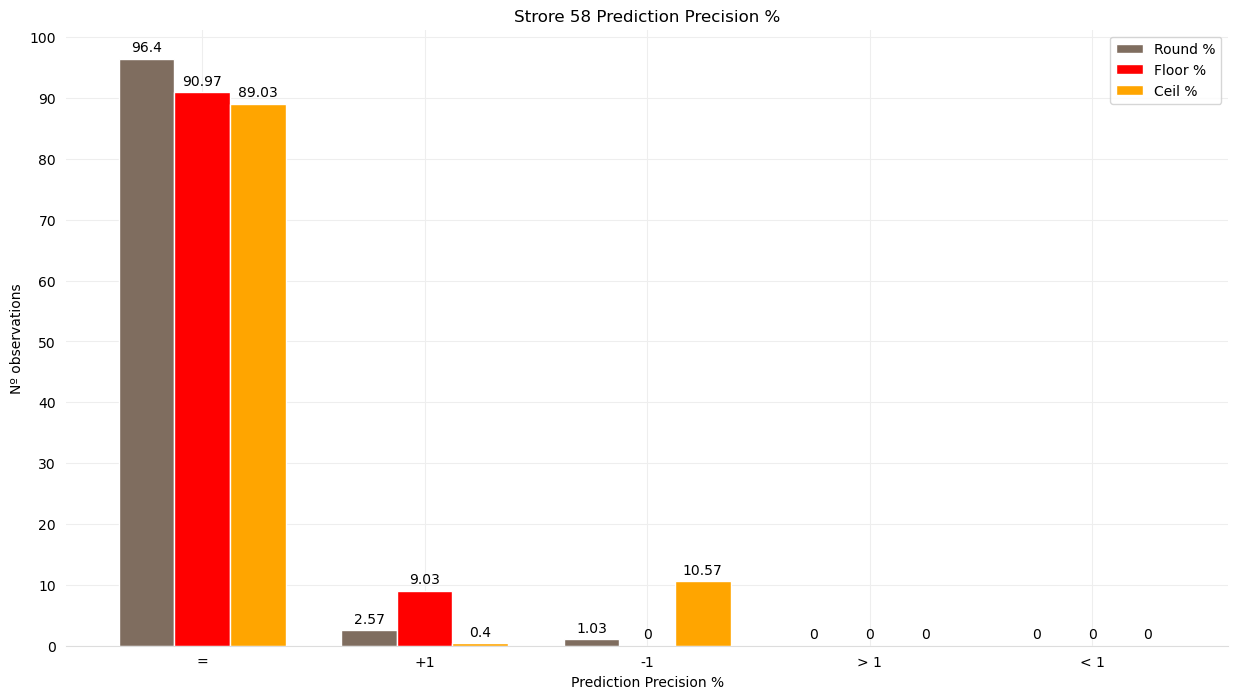

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       1687 |         45 |         18 |          0 |          0  
  Floor                |       1592 |        158 |          0 |          0 |          0  
  Ceil                 |       1558 |          7 |        185 |          0 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |       96.4 |       2.57 |       1.03 |        0.0 |        0.0  
  Floor % 

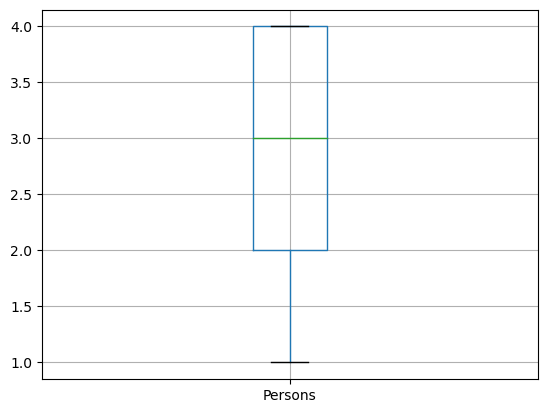

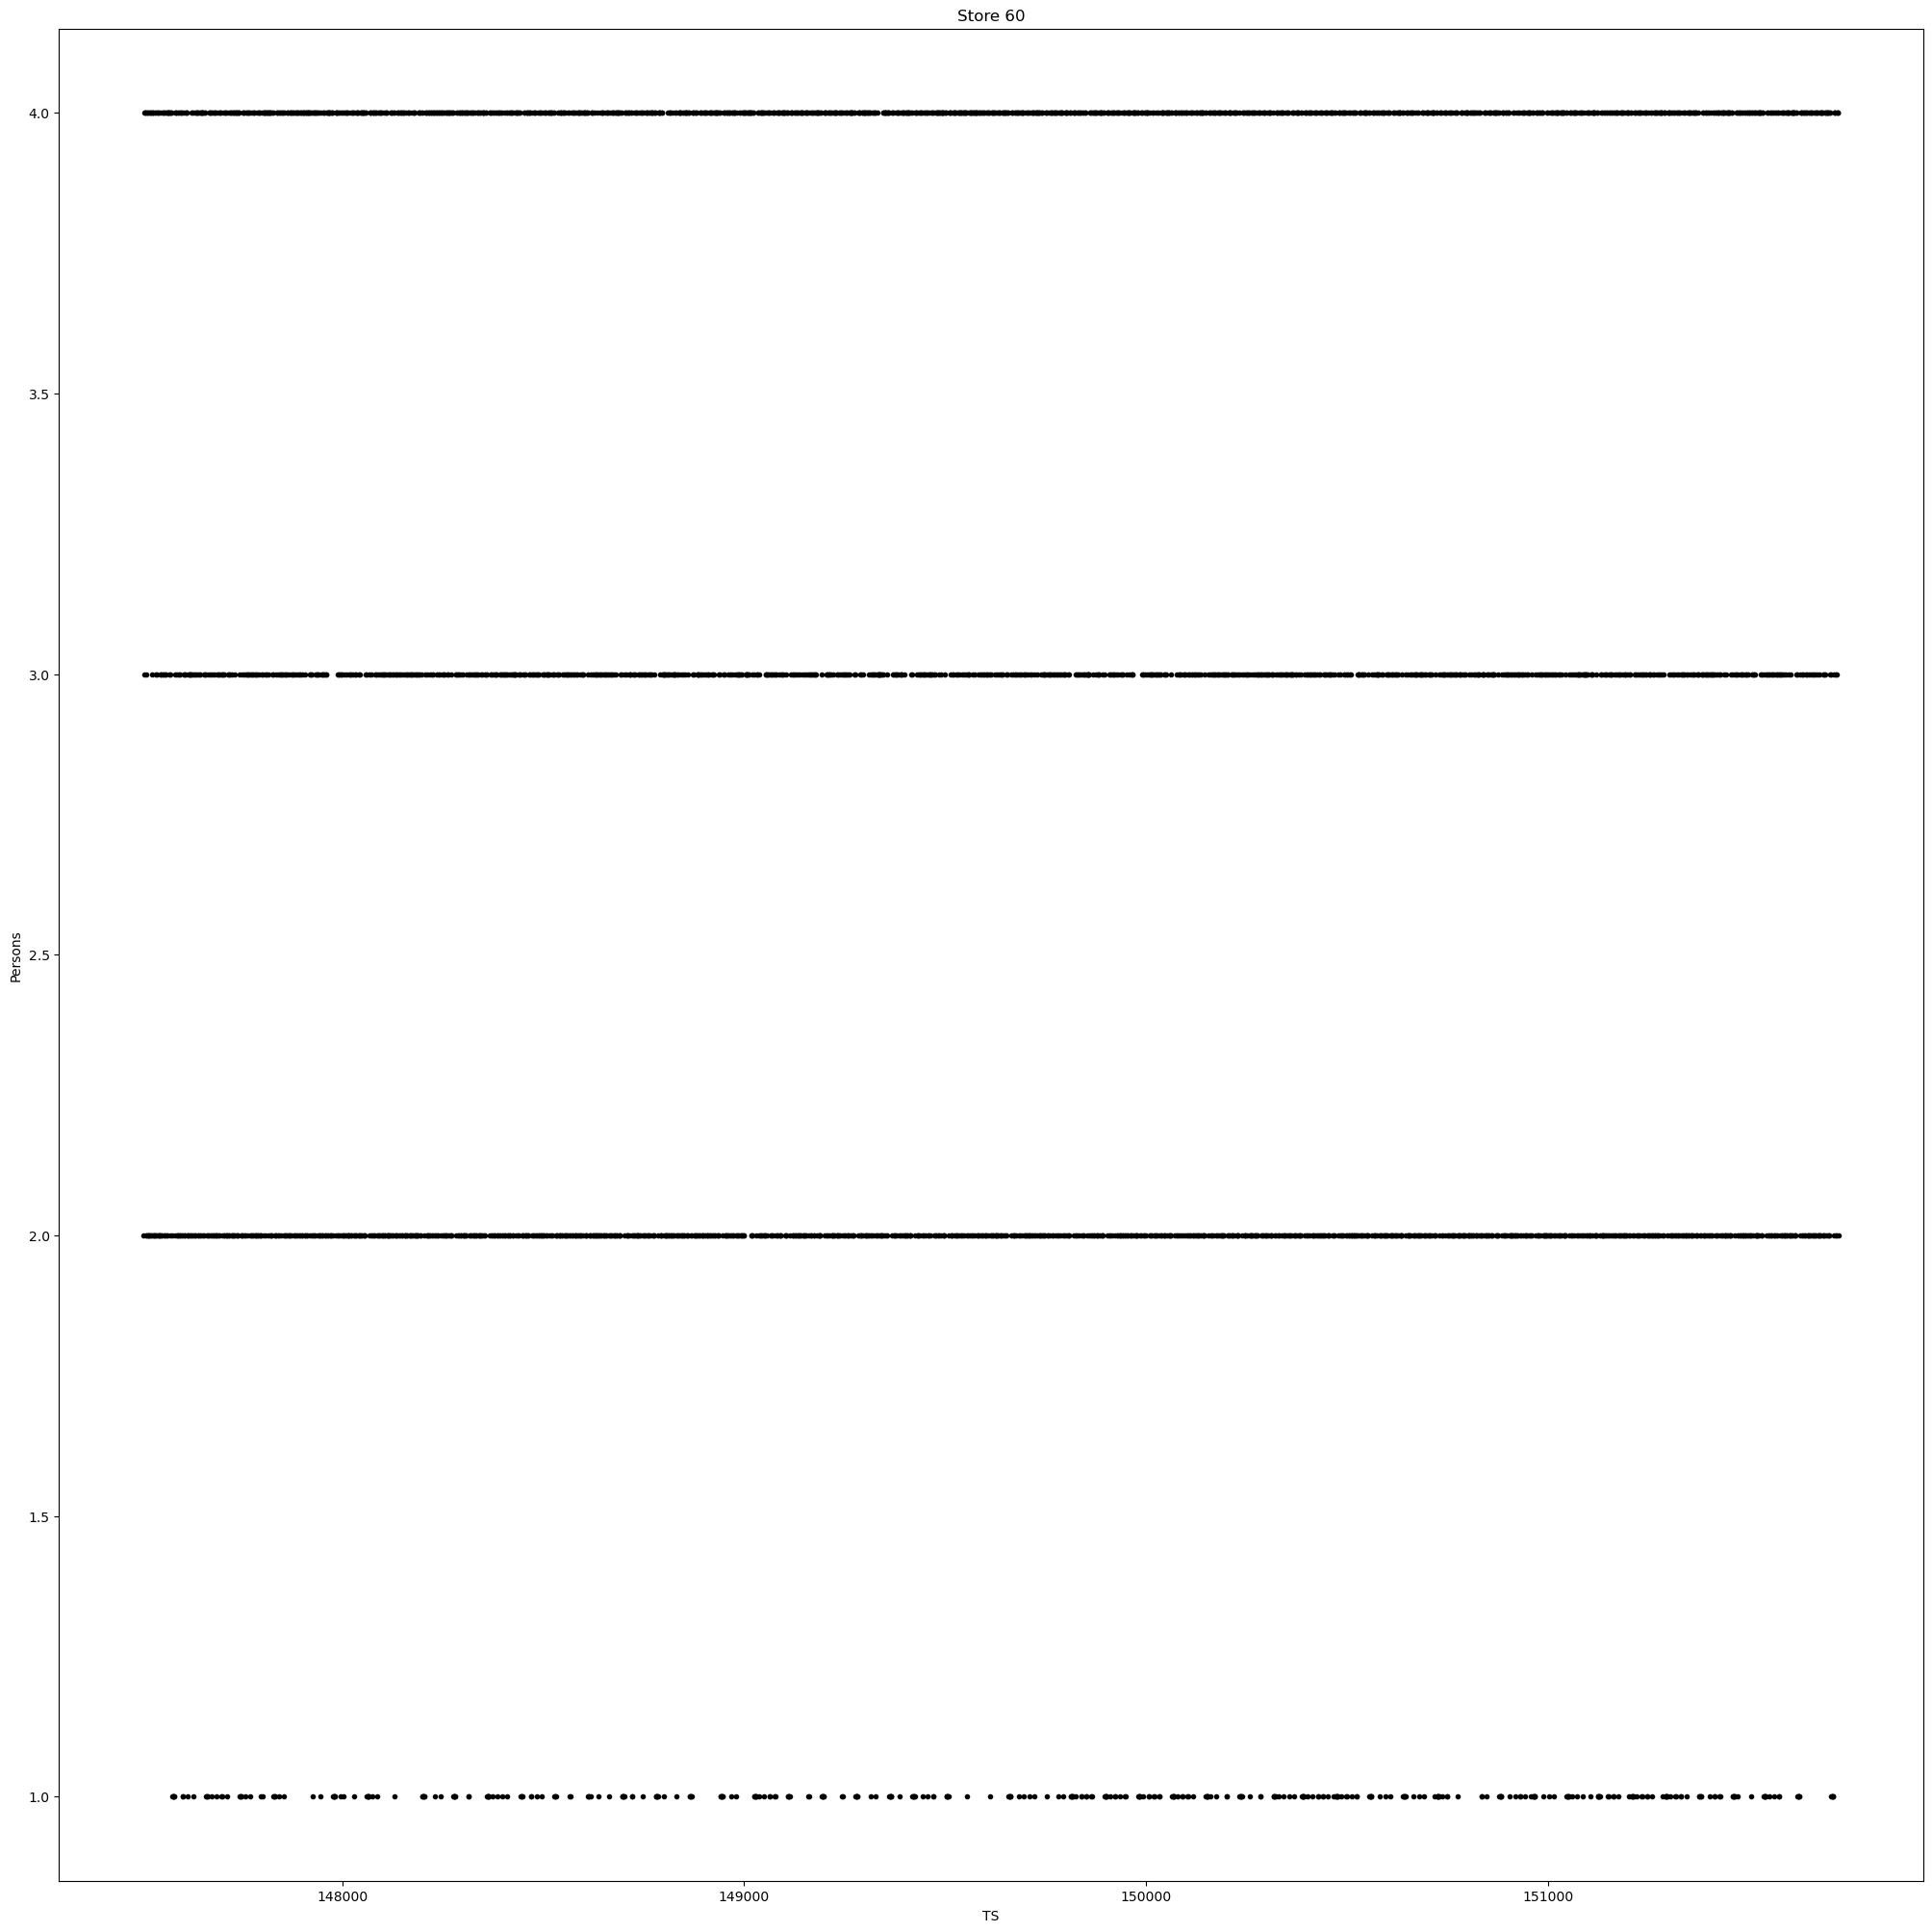

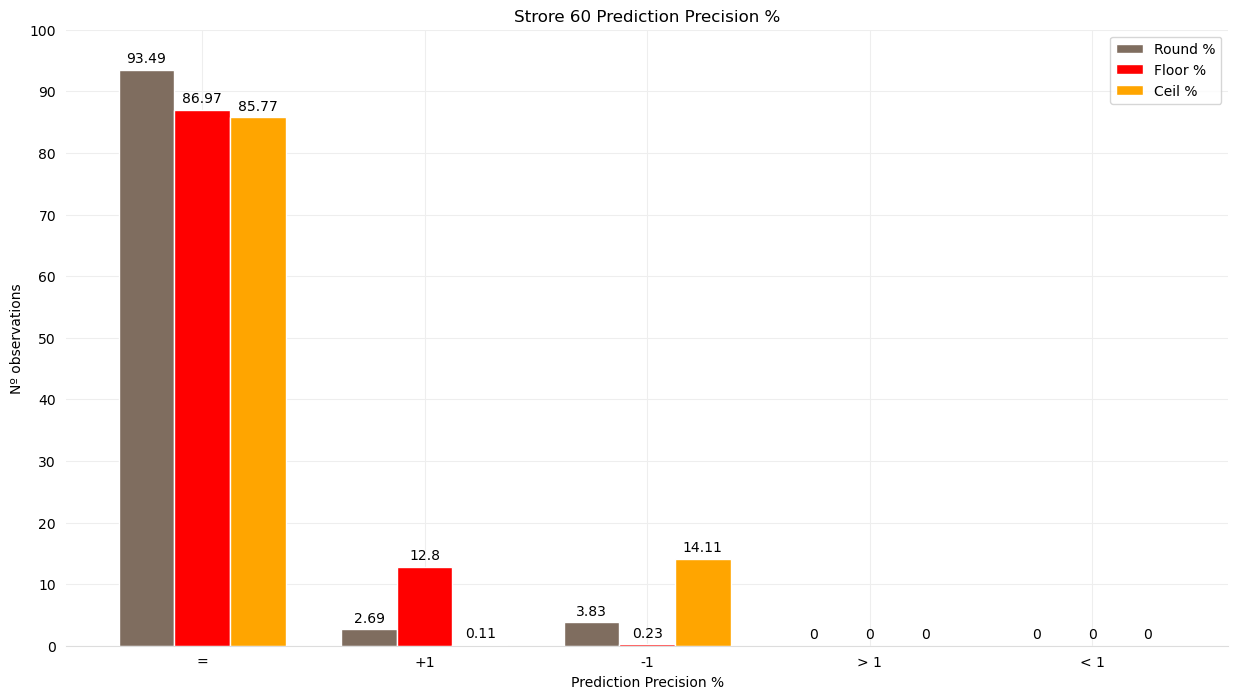

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       1636 |         47 |         67 |          0 |          0  
  Floor                |       1522 |        224 |          4 |          0 |          0  
  Ceil                 |       1501 |          2 |        247 |          0 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      93.49 |       2.69 |       3.83 |        0.0 |        0.0  
  Floor % 

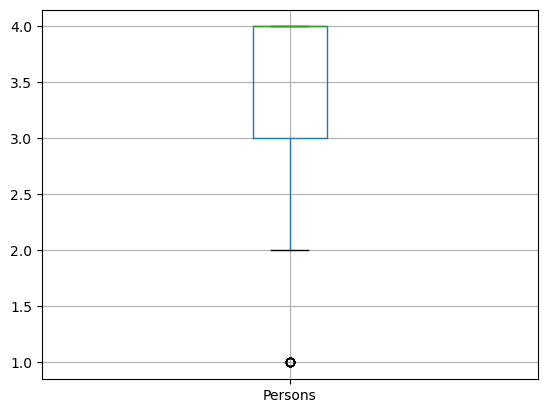

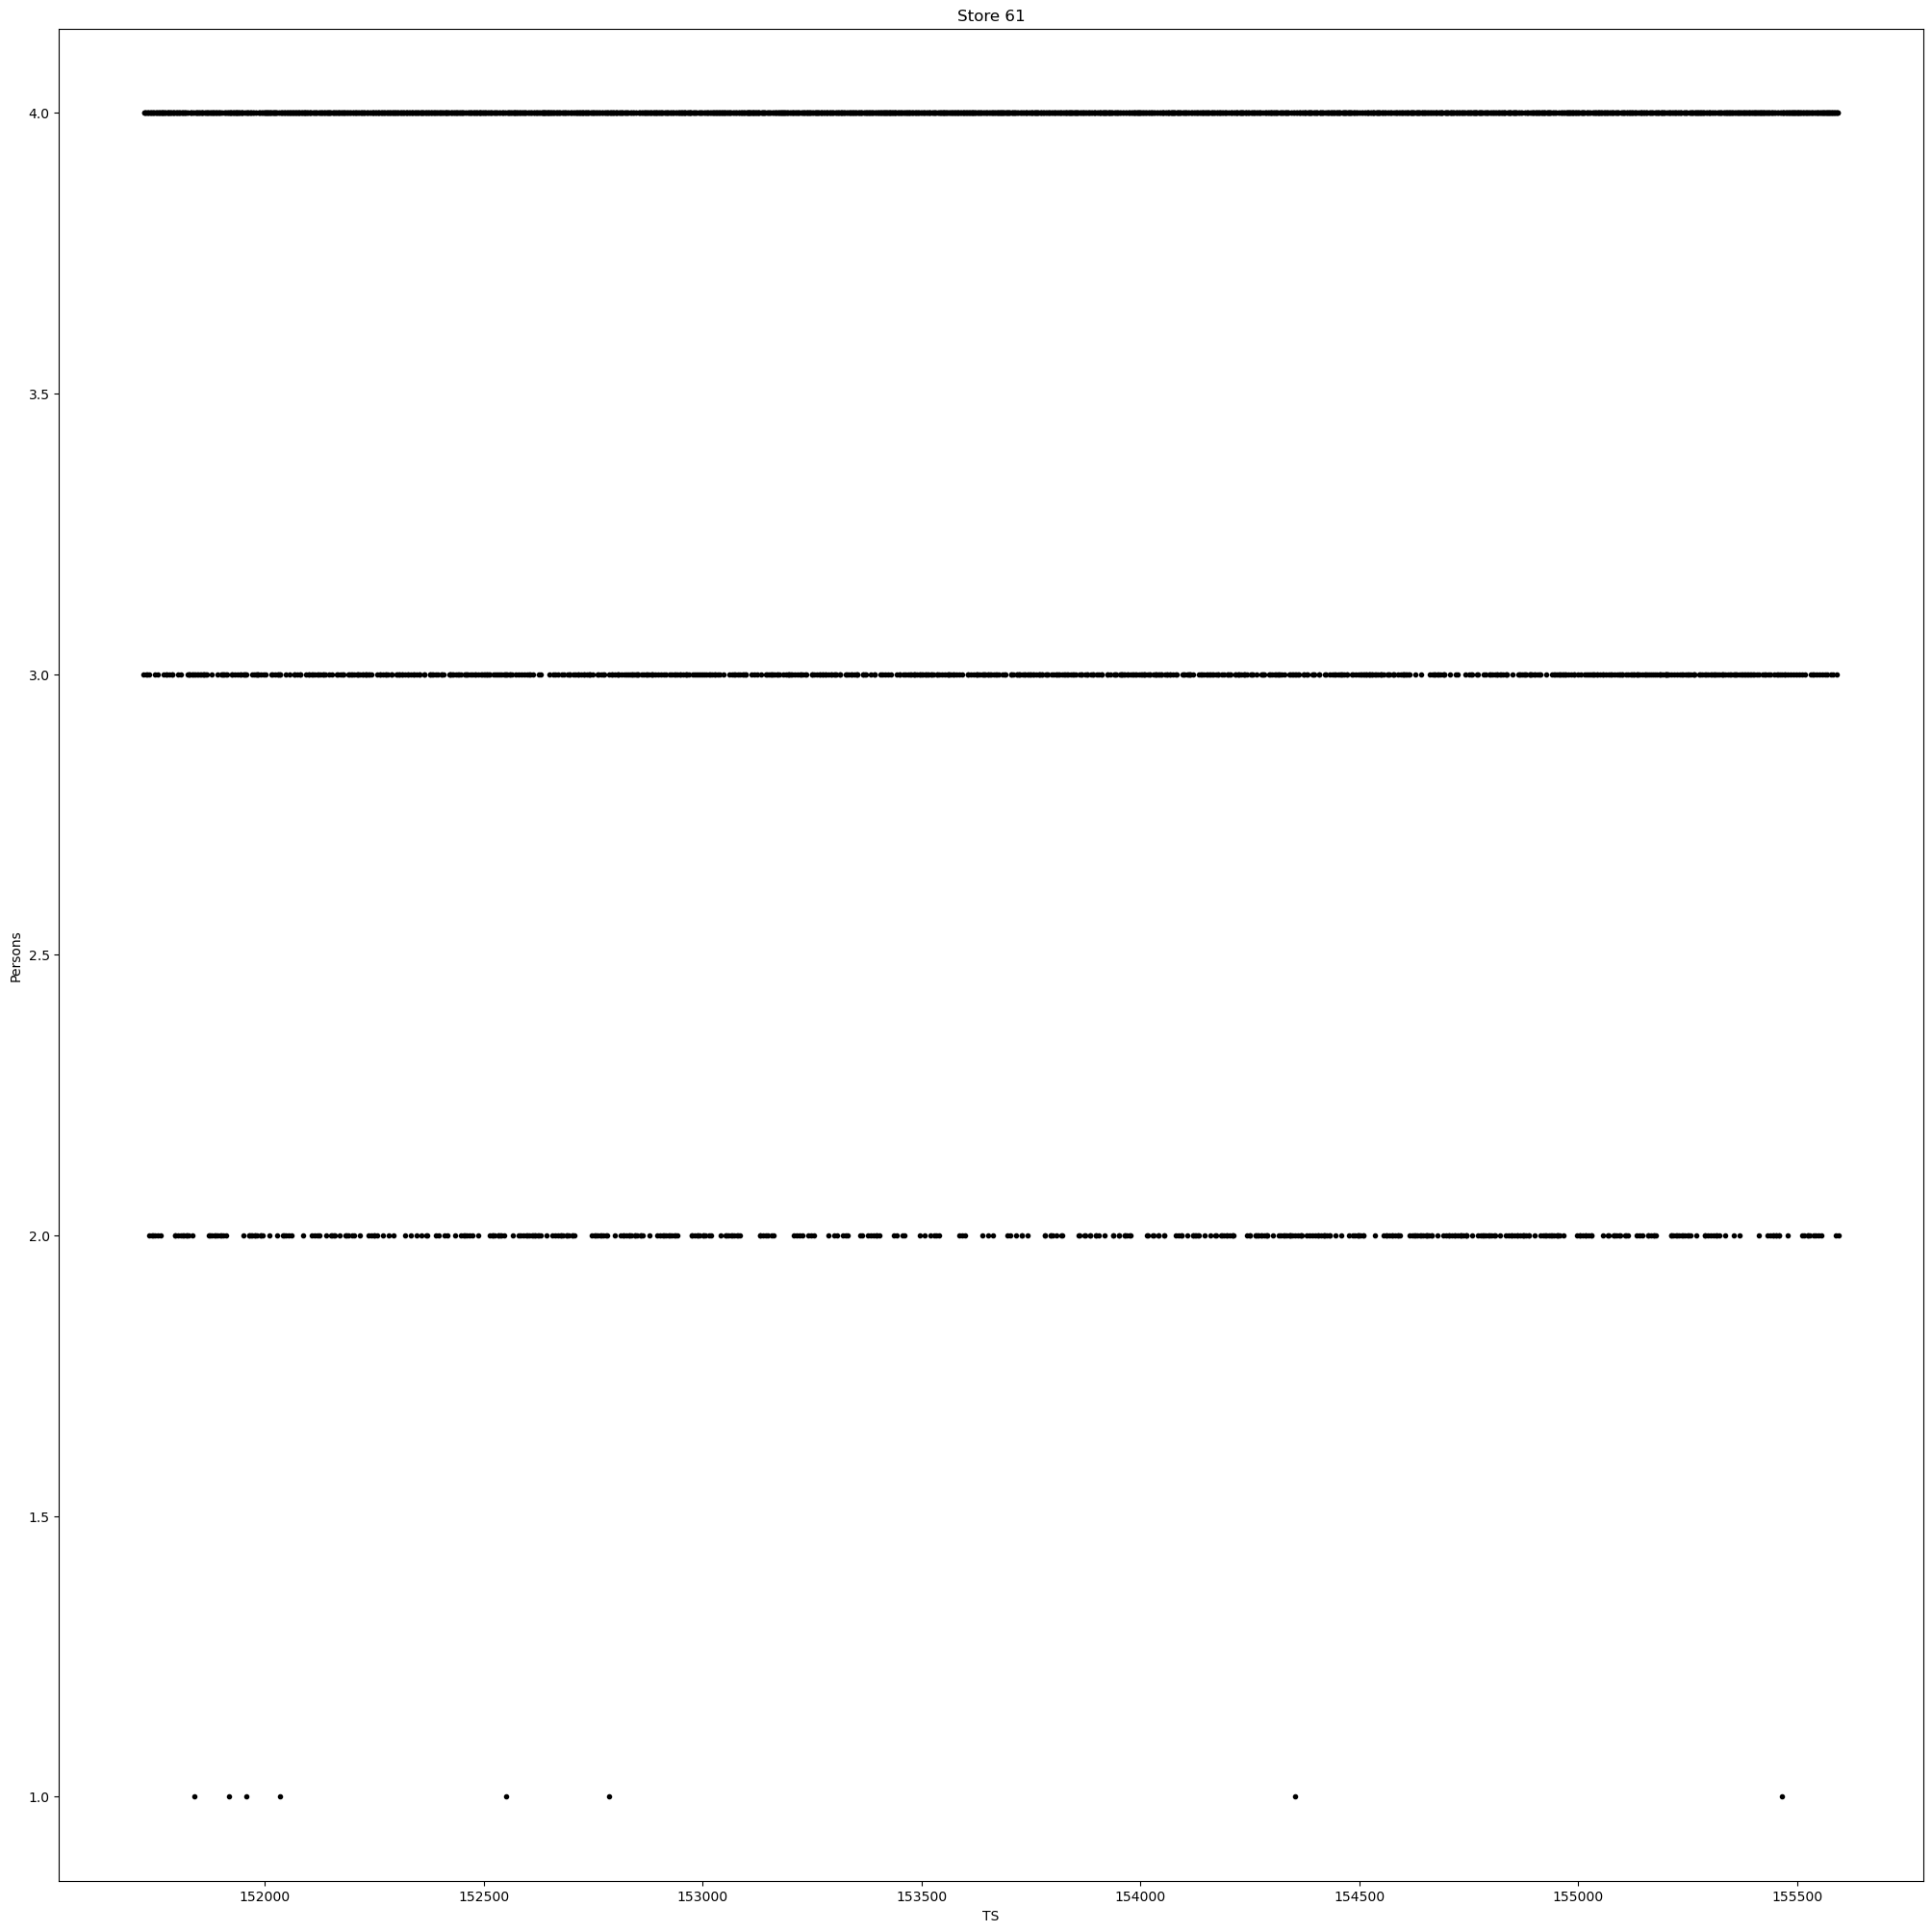

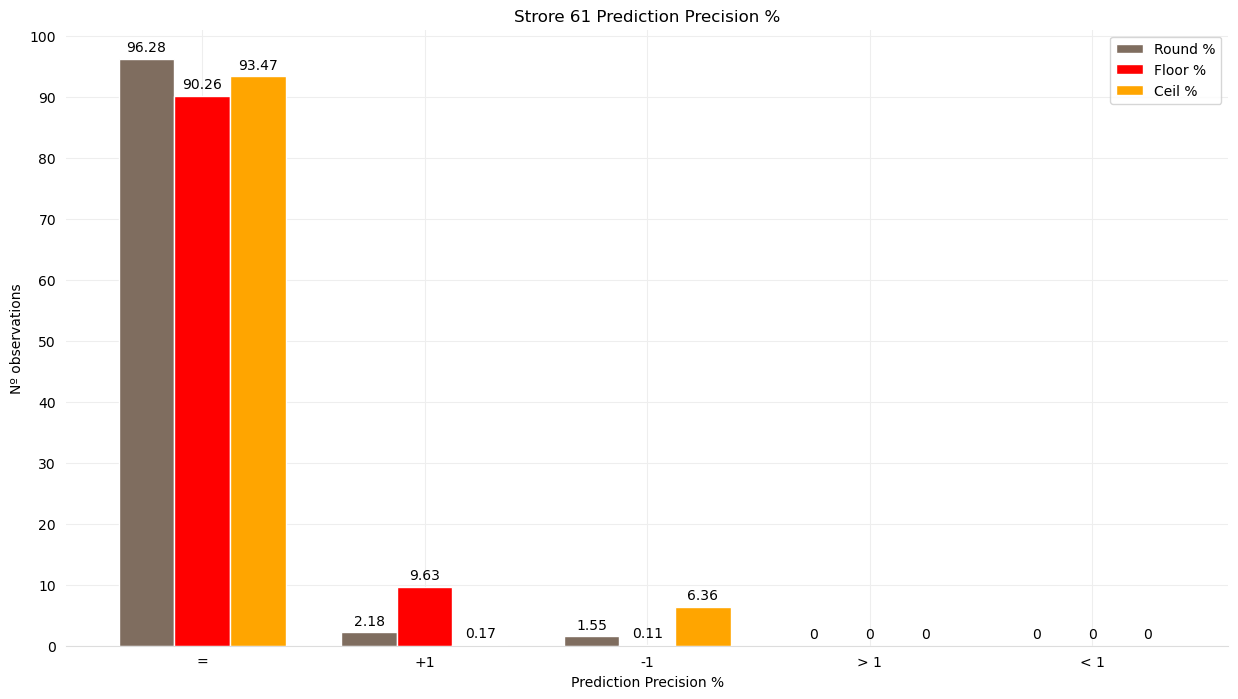

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       1680 |         38 |         27 |          0 |          0  
  Floor                |       1575 |        168 |          2 |          0 |          0  
  Ceil                 |       1631 |          3 |        111 |          0 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      96.28 |       2.18 |       1.55 |        0.0 |        0.0  
  Floor % 

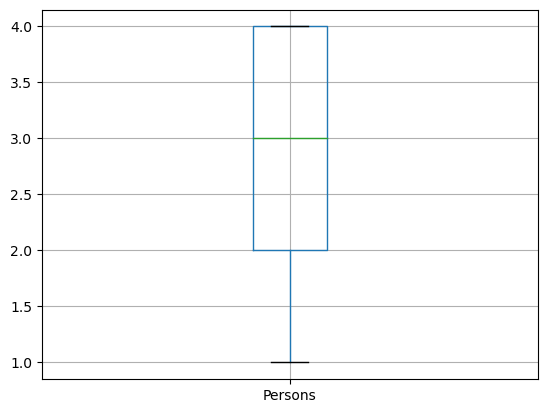

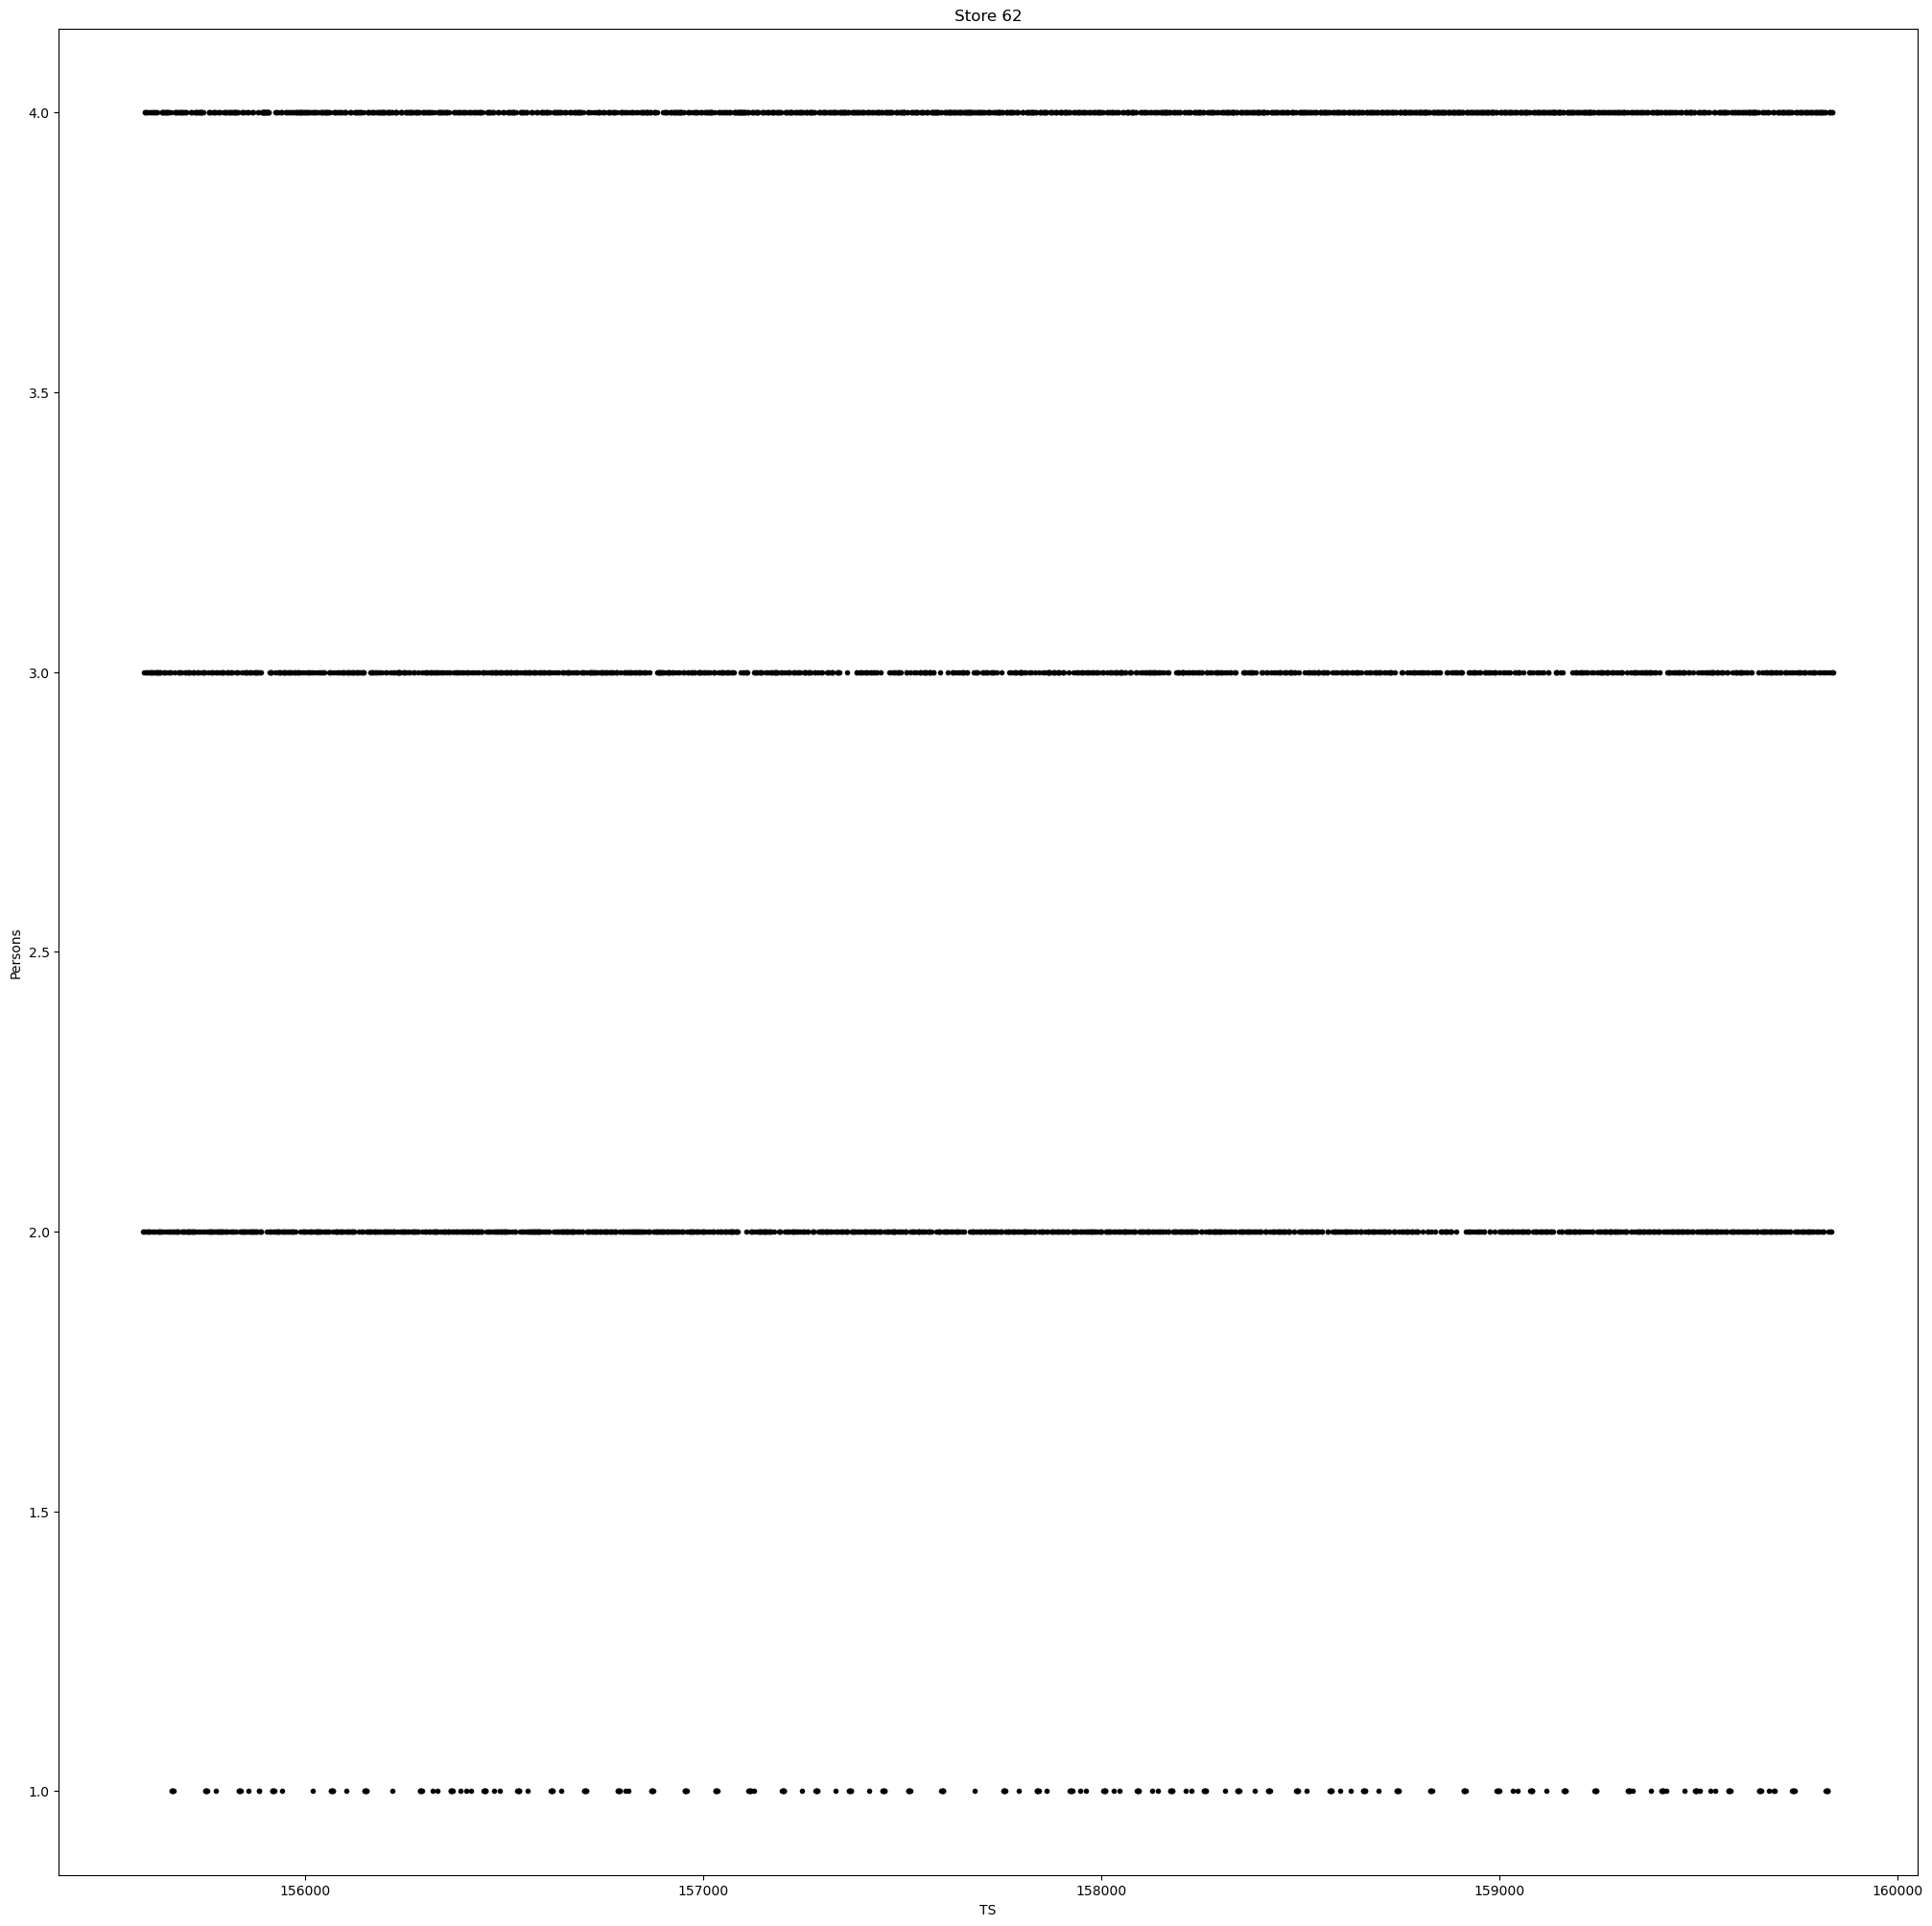

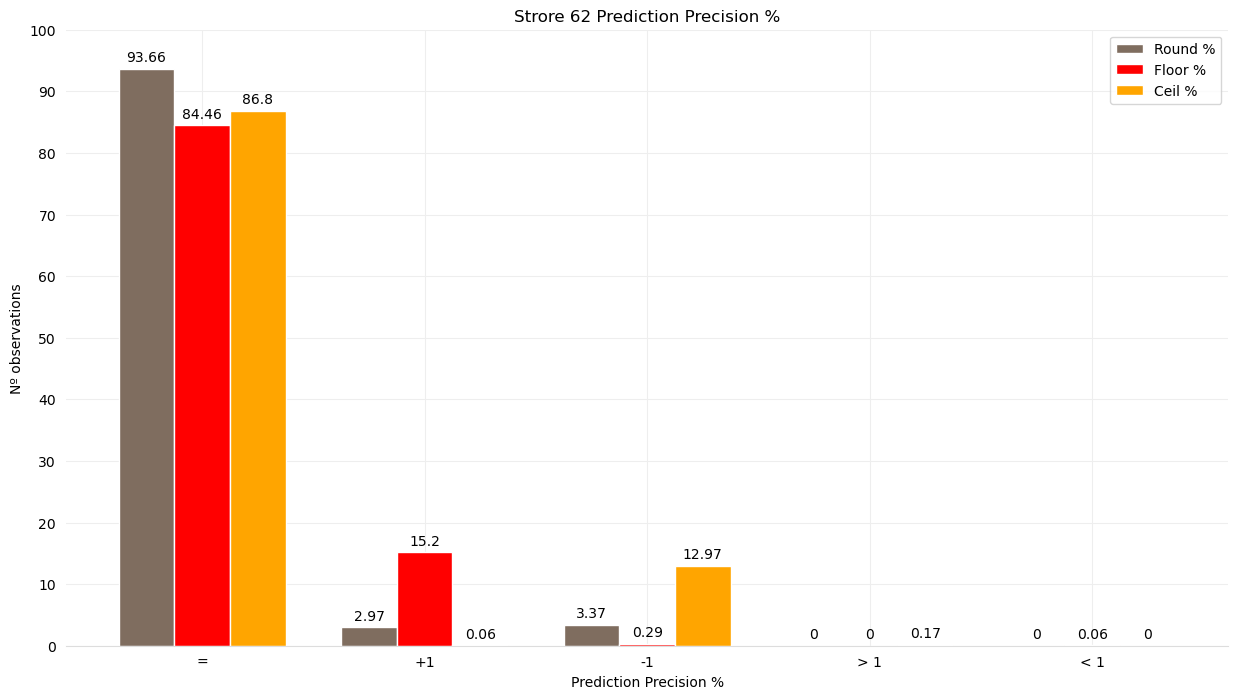

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       1639 |         52 |         59 |          0 |          0  
  Floor                |       1478 |        266 |          5 |          0 |          1  
  Ceil                 |       1519 |          1 |        227 |          3 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      93.66 |       2.97 |       3.37 |        0.0 |        0.0  
  Floor % 

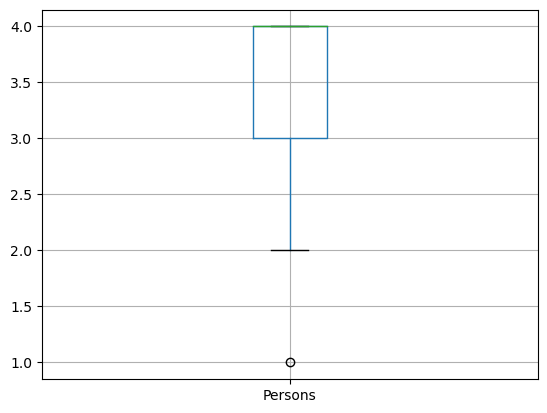

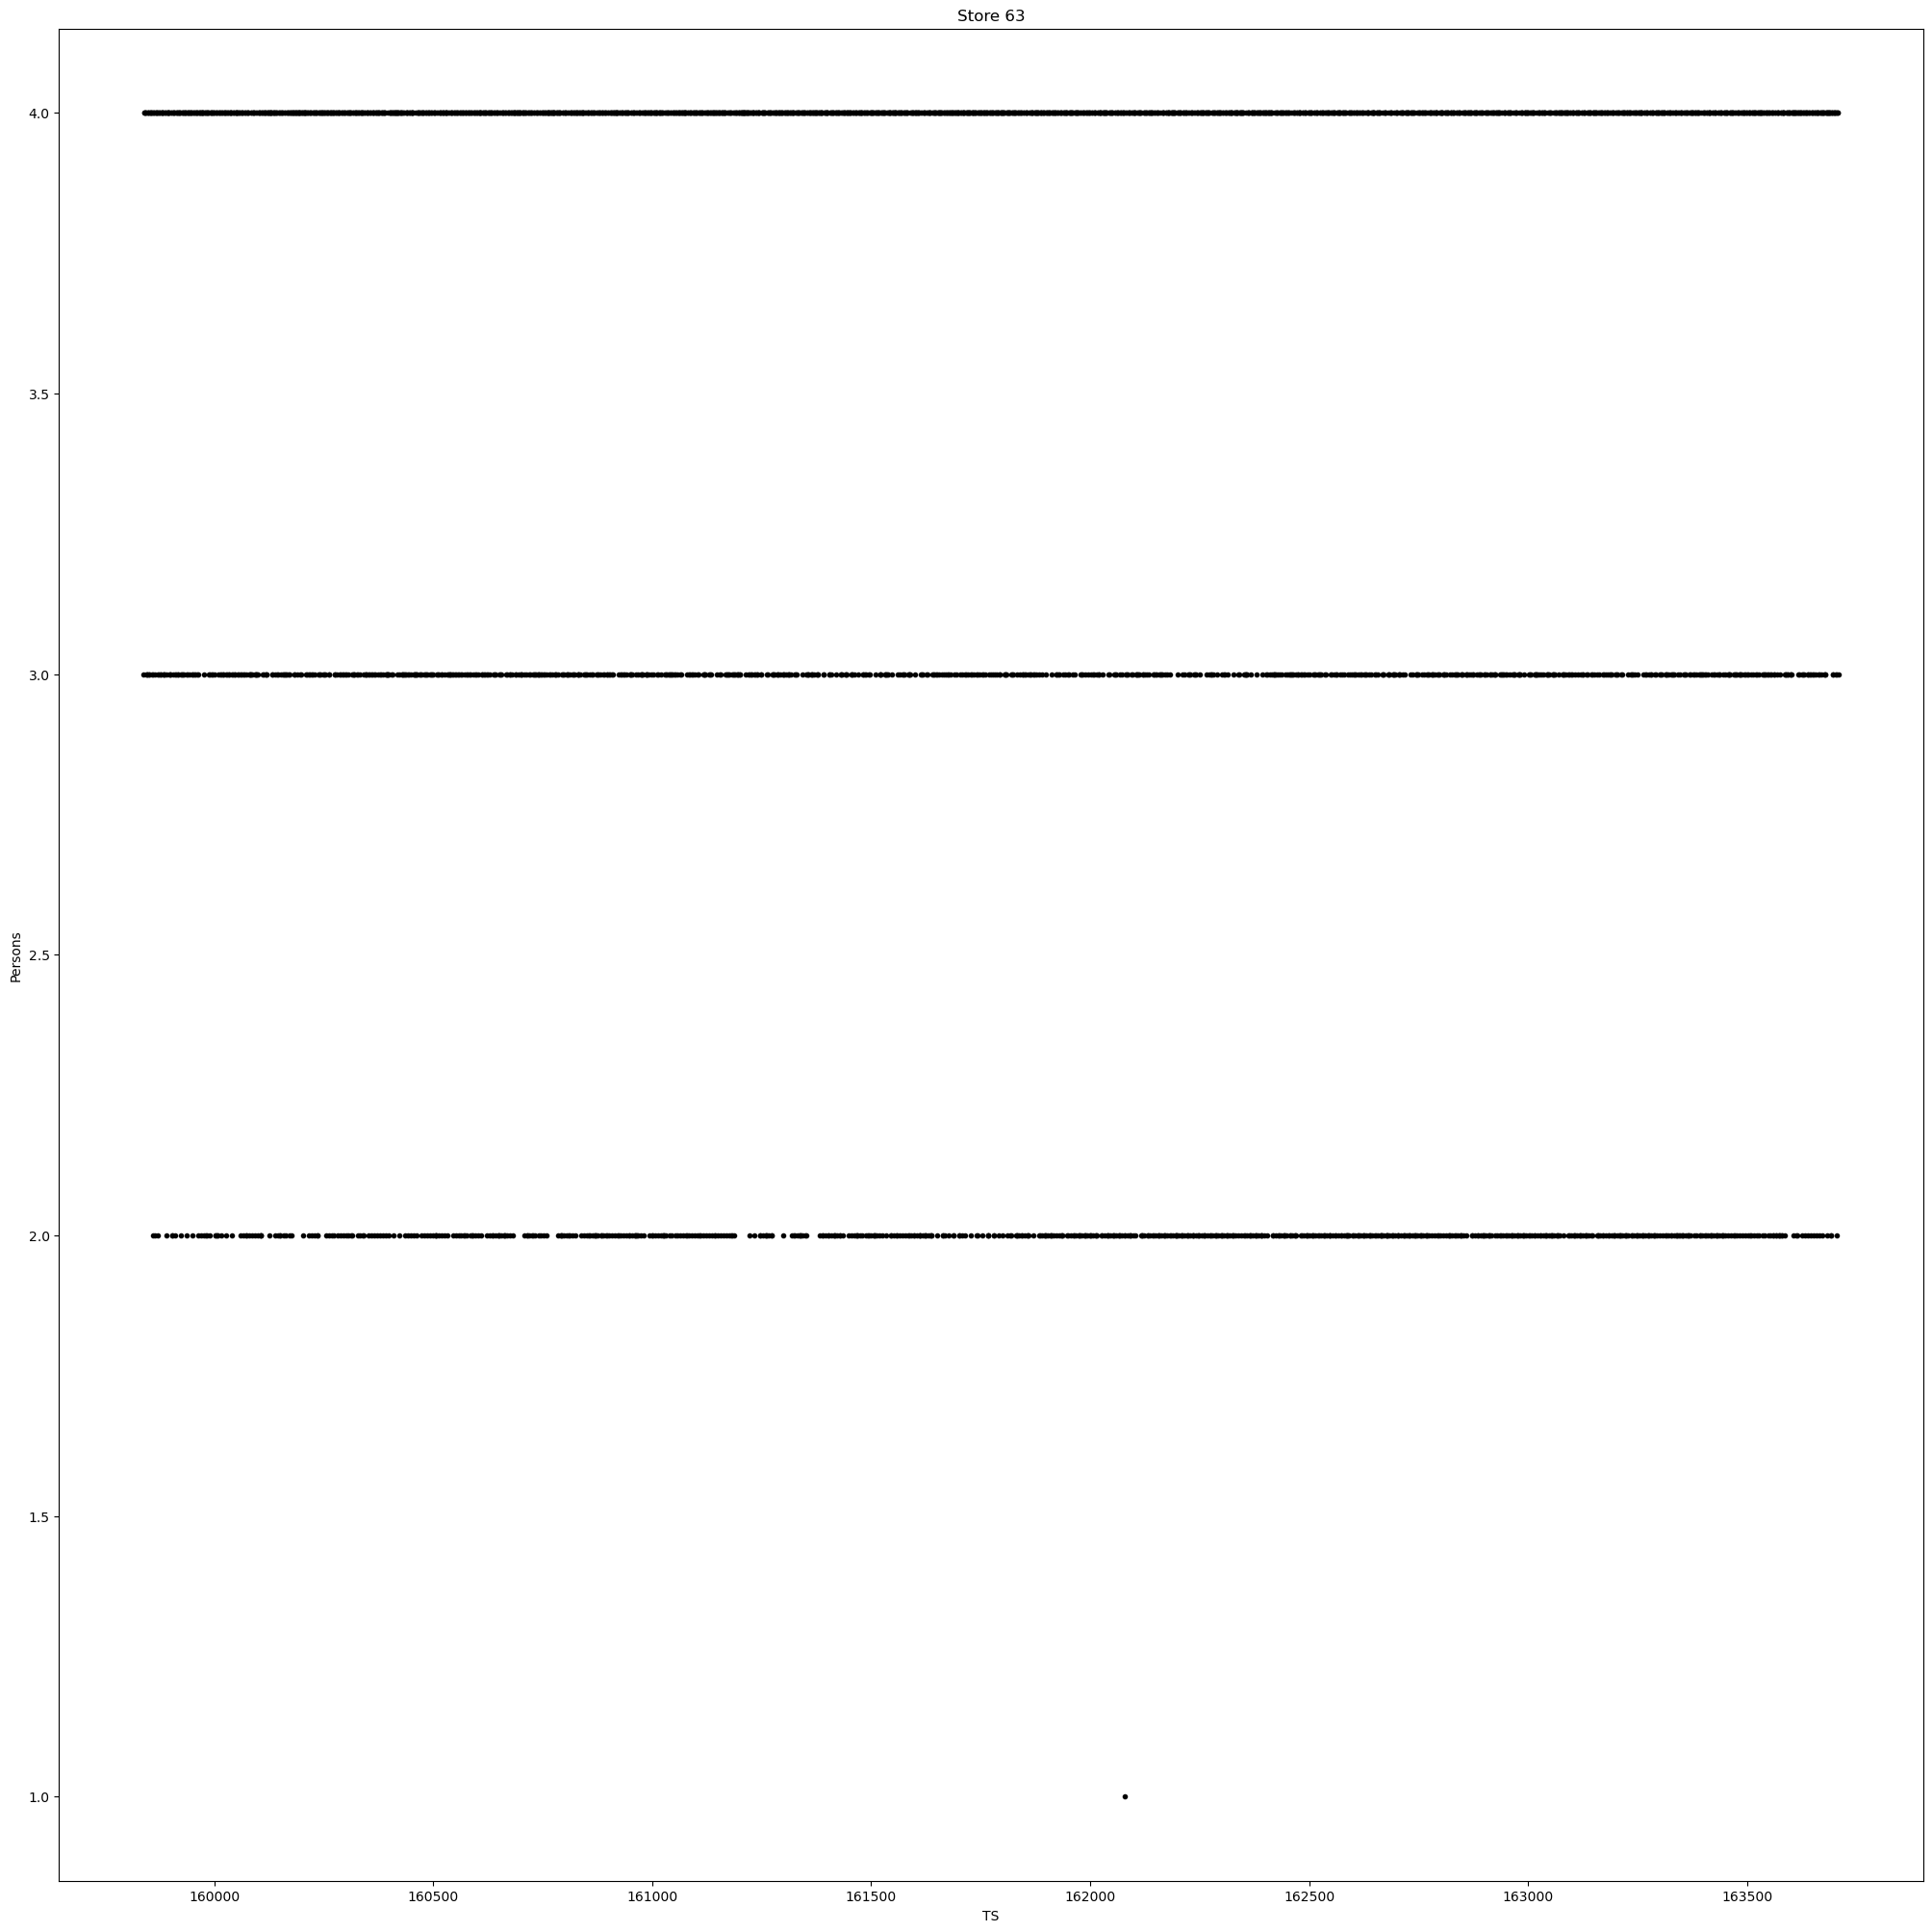

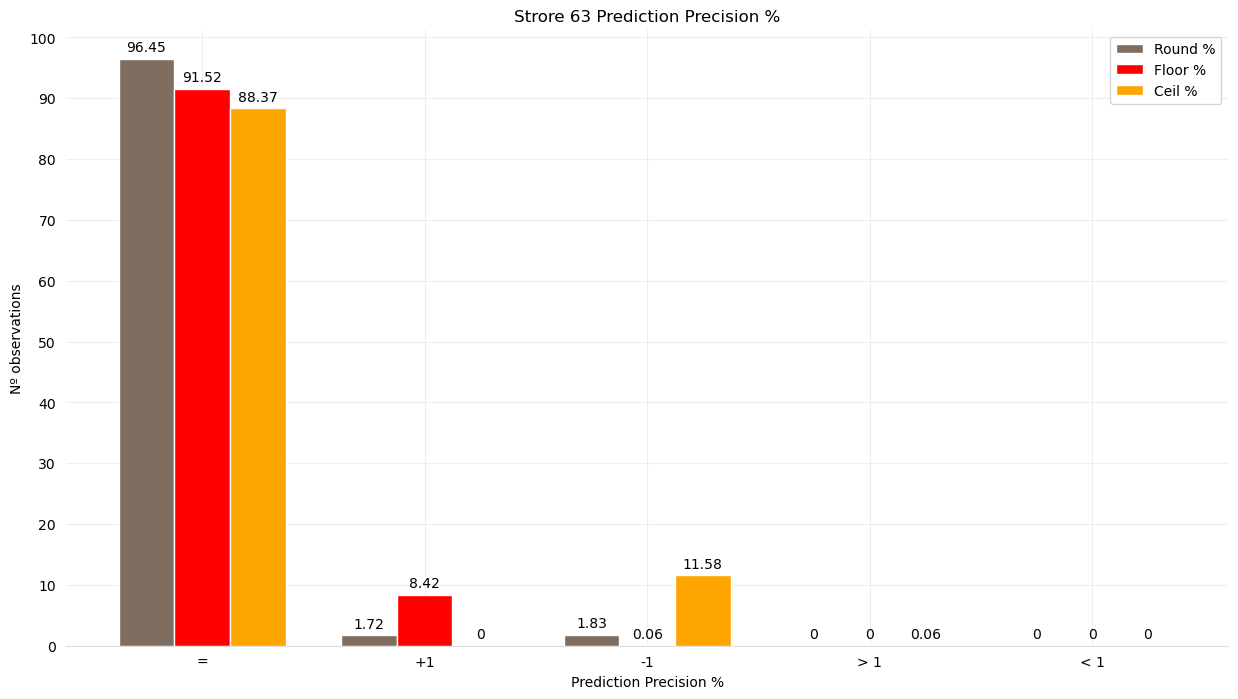

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       1683 |         30 |         32 |          0 |          0  
  Floor                |       1597 |        147 |          1 |          0 |          0  
  Ceil                 |       1542 |          0 |        202 |          1 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      96.45 |       1.72 |       1.83 |        0.0 |        0.0  
  Floor % 

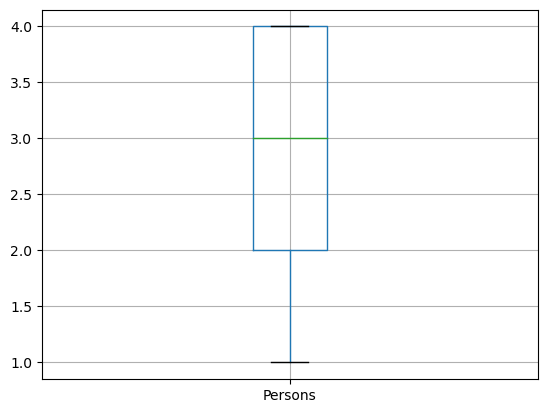

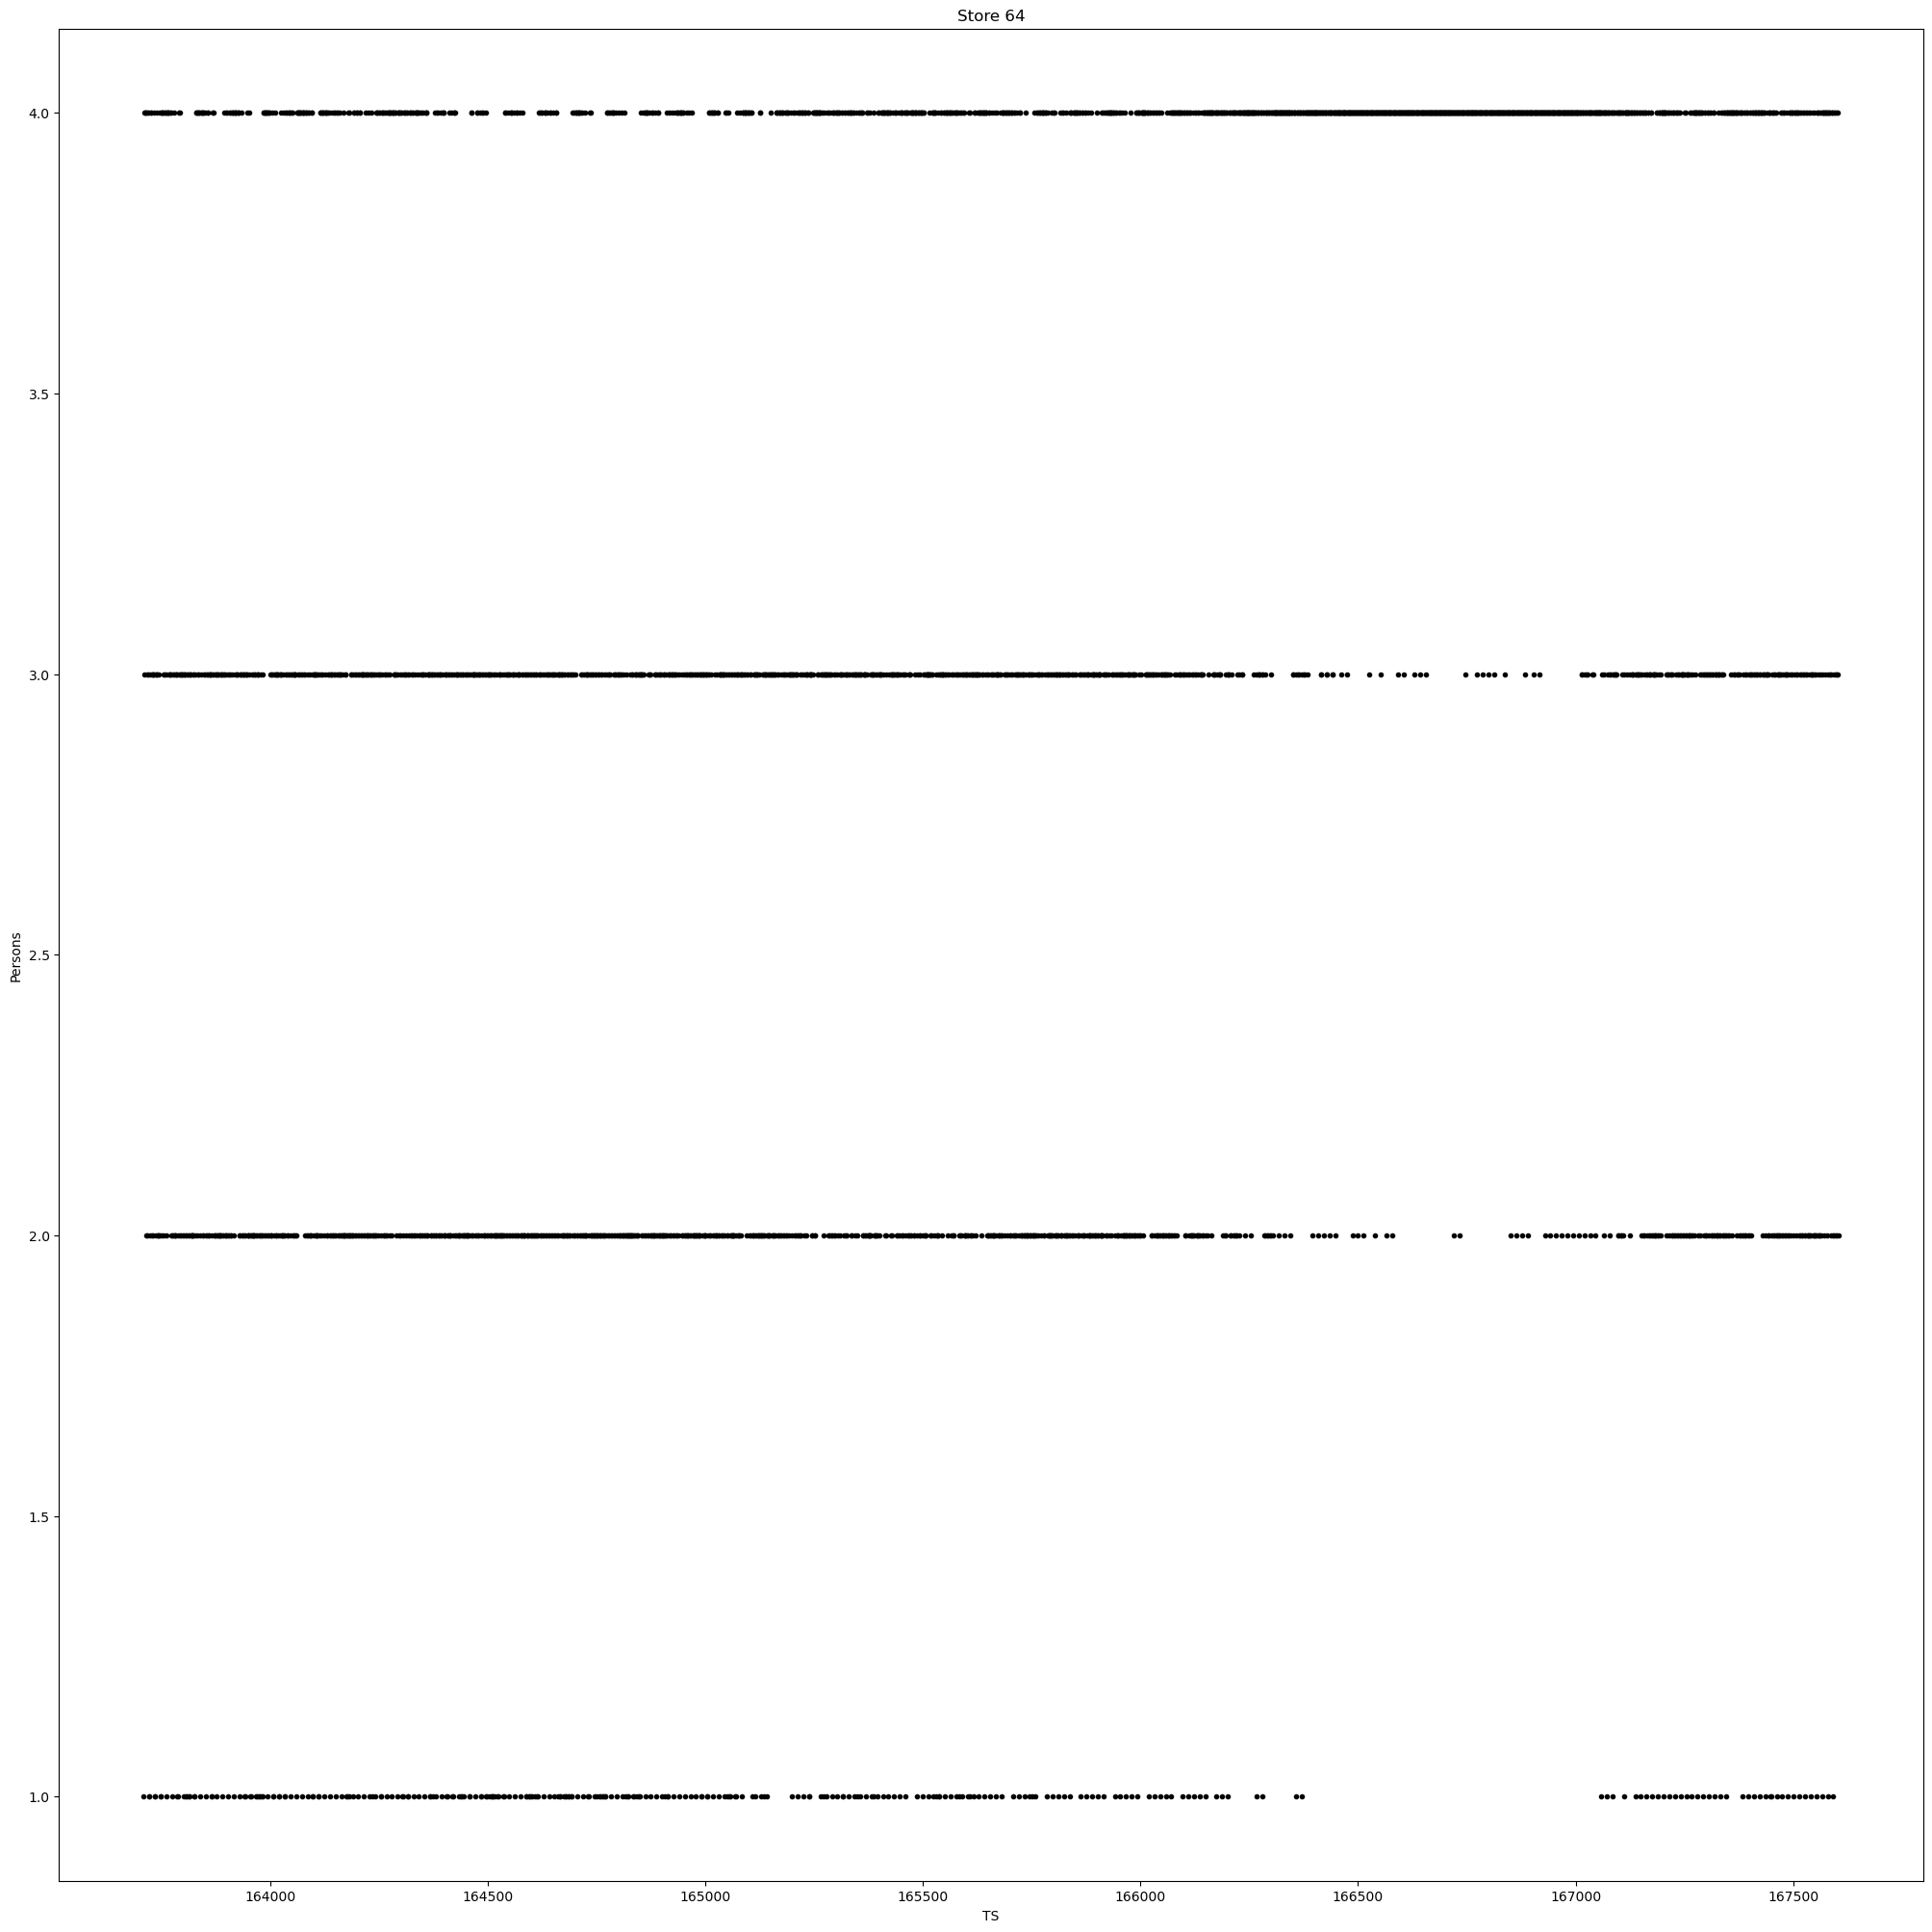

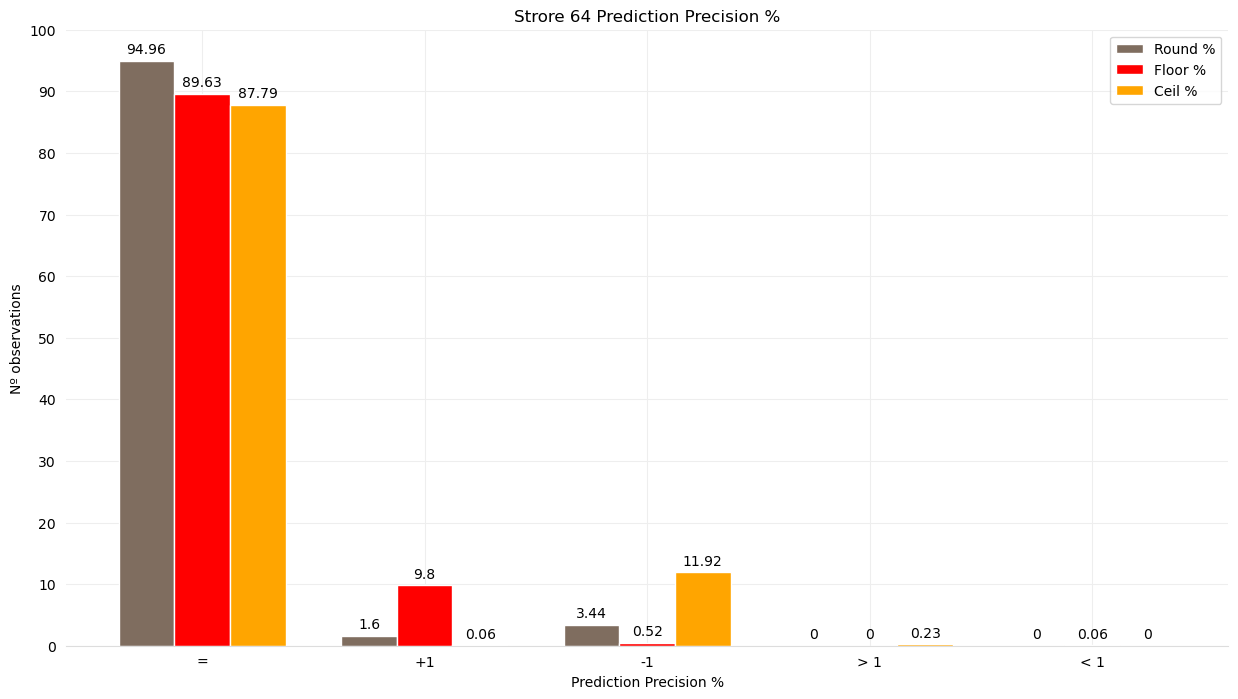

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       1657 |         28 |         60 |          0 |          0  
  Floor                |       1564 |        171 |          9 |          0 |          1  
  Ceil                 |       1532 |          1 |        208 |          4 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      94.96 |        1.6 |       3.44 |        0.0 |        0.0  
  Floor % 

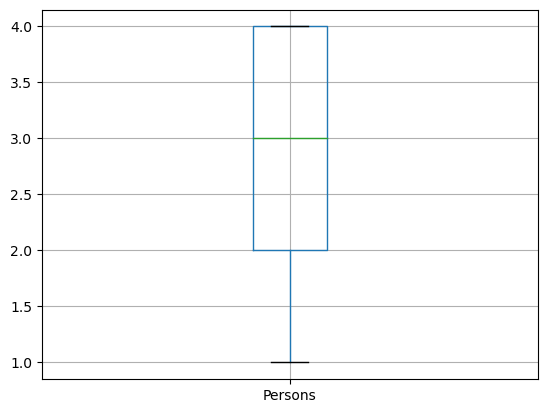

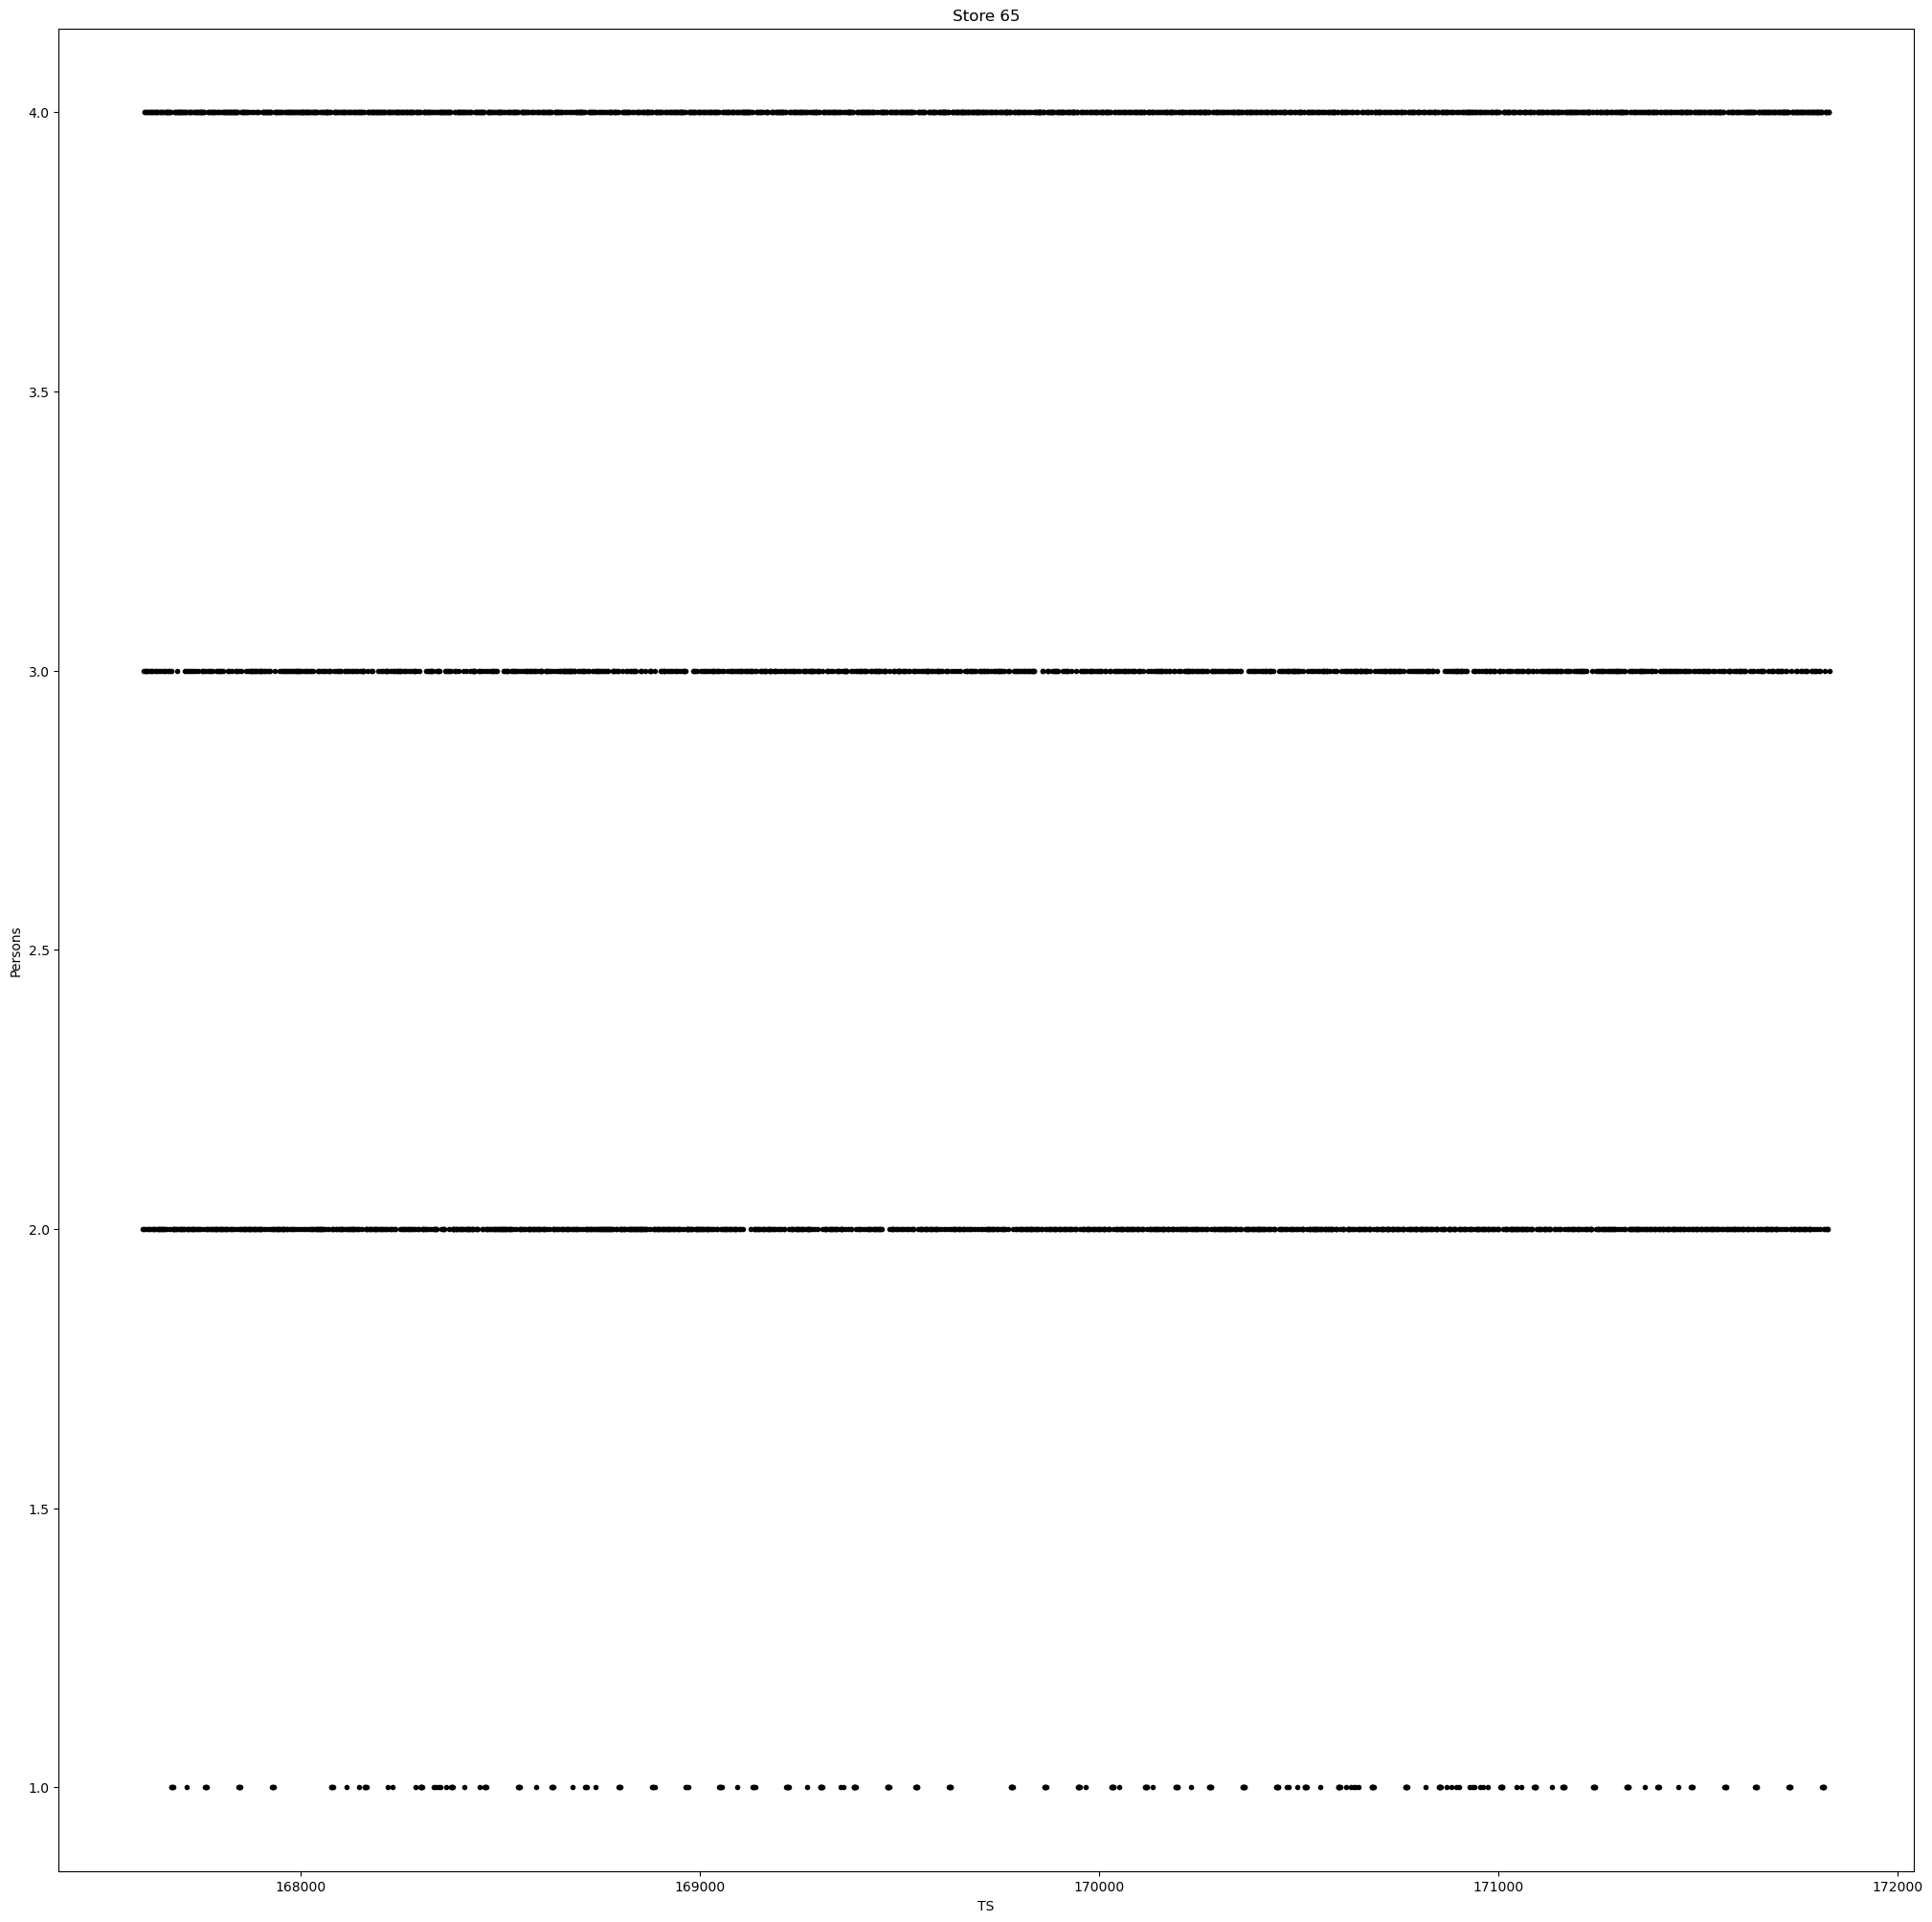

> 1: real: 2  estimated: 4


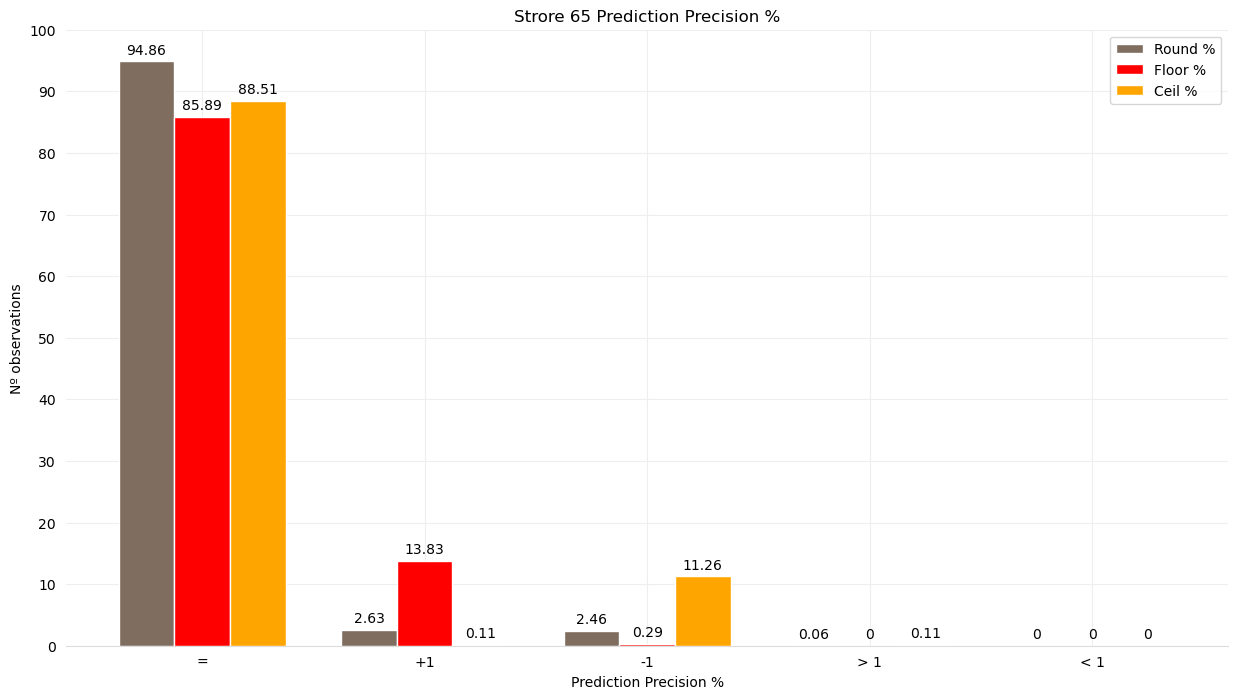

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       1660 |         46 |         43 |          1 |          0  
  Floor                |       1503 |        242 |          5 |          0 |          0  
  Ceil                 |       1549 |          2 |        197 |          2 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      94.86 |       2.63 |       2.46 |       0.06 |        0.0  
  Floor % 

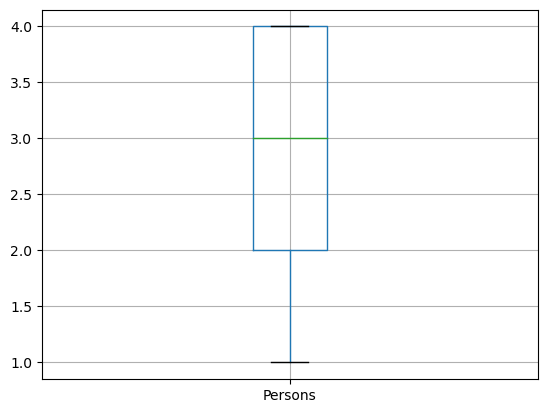

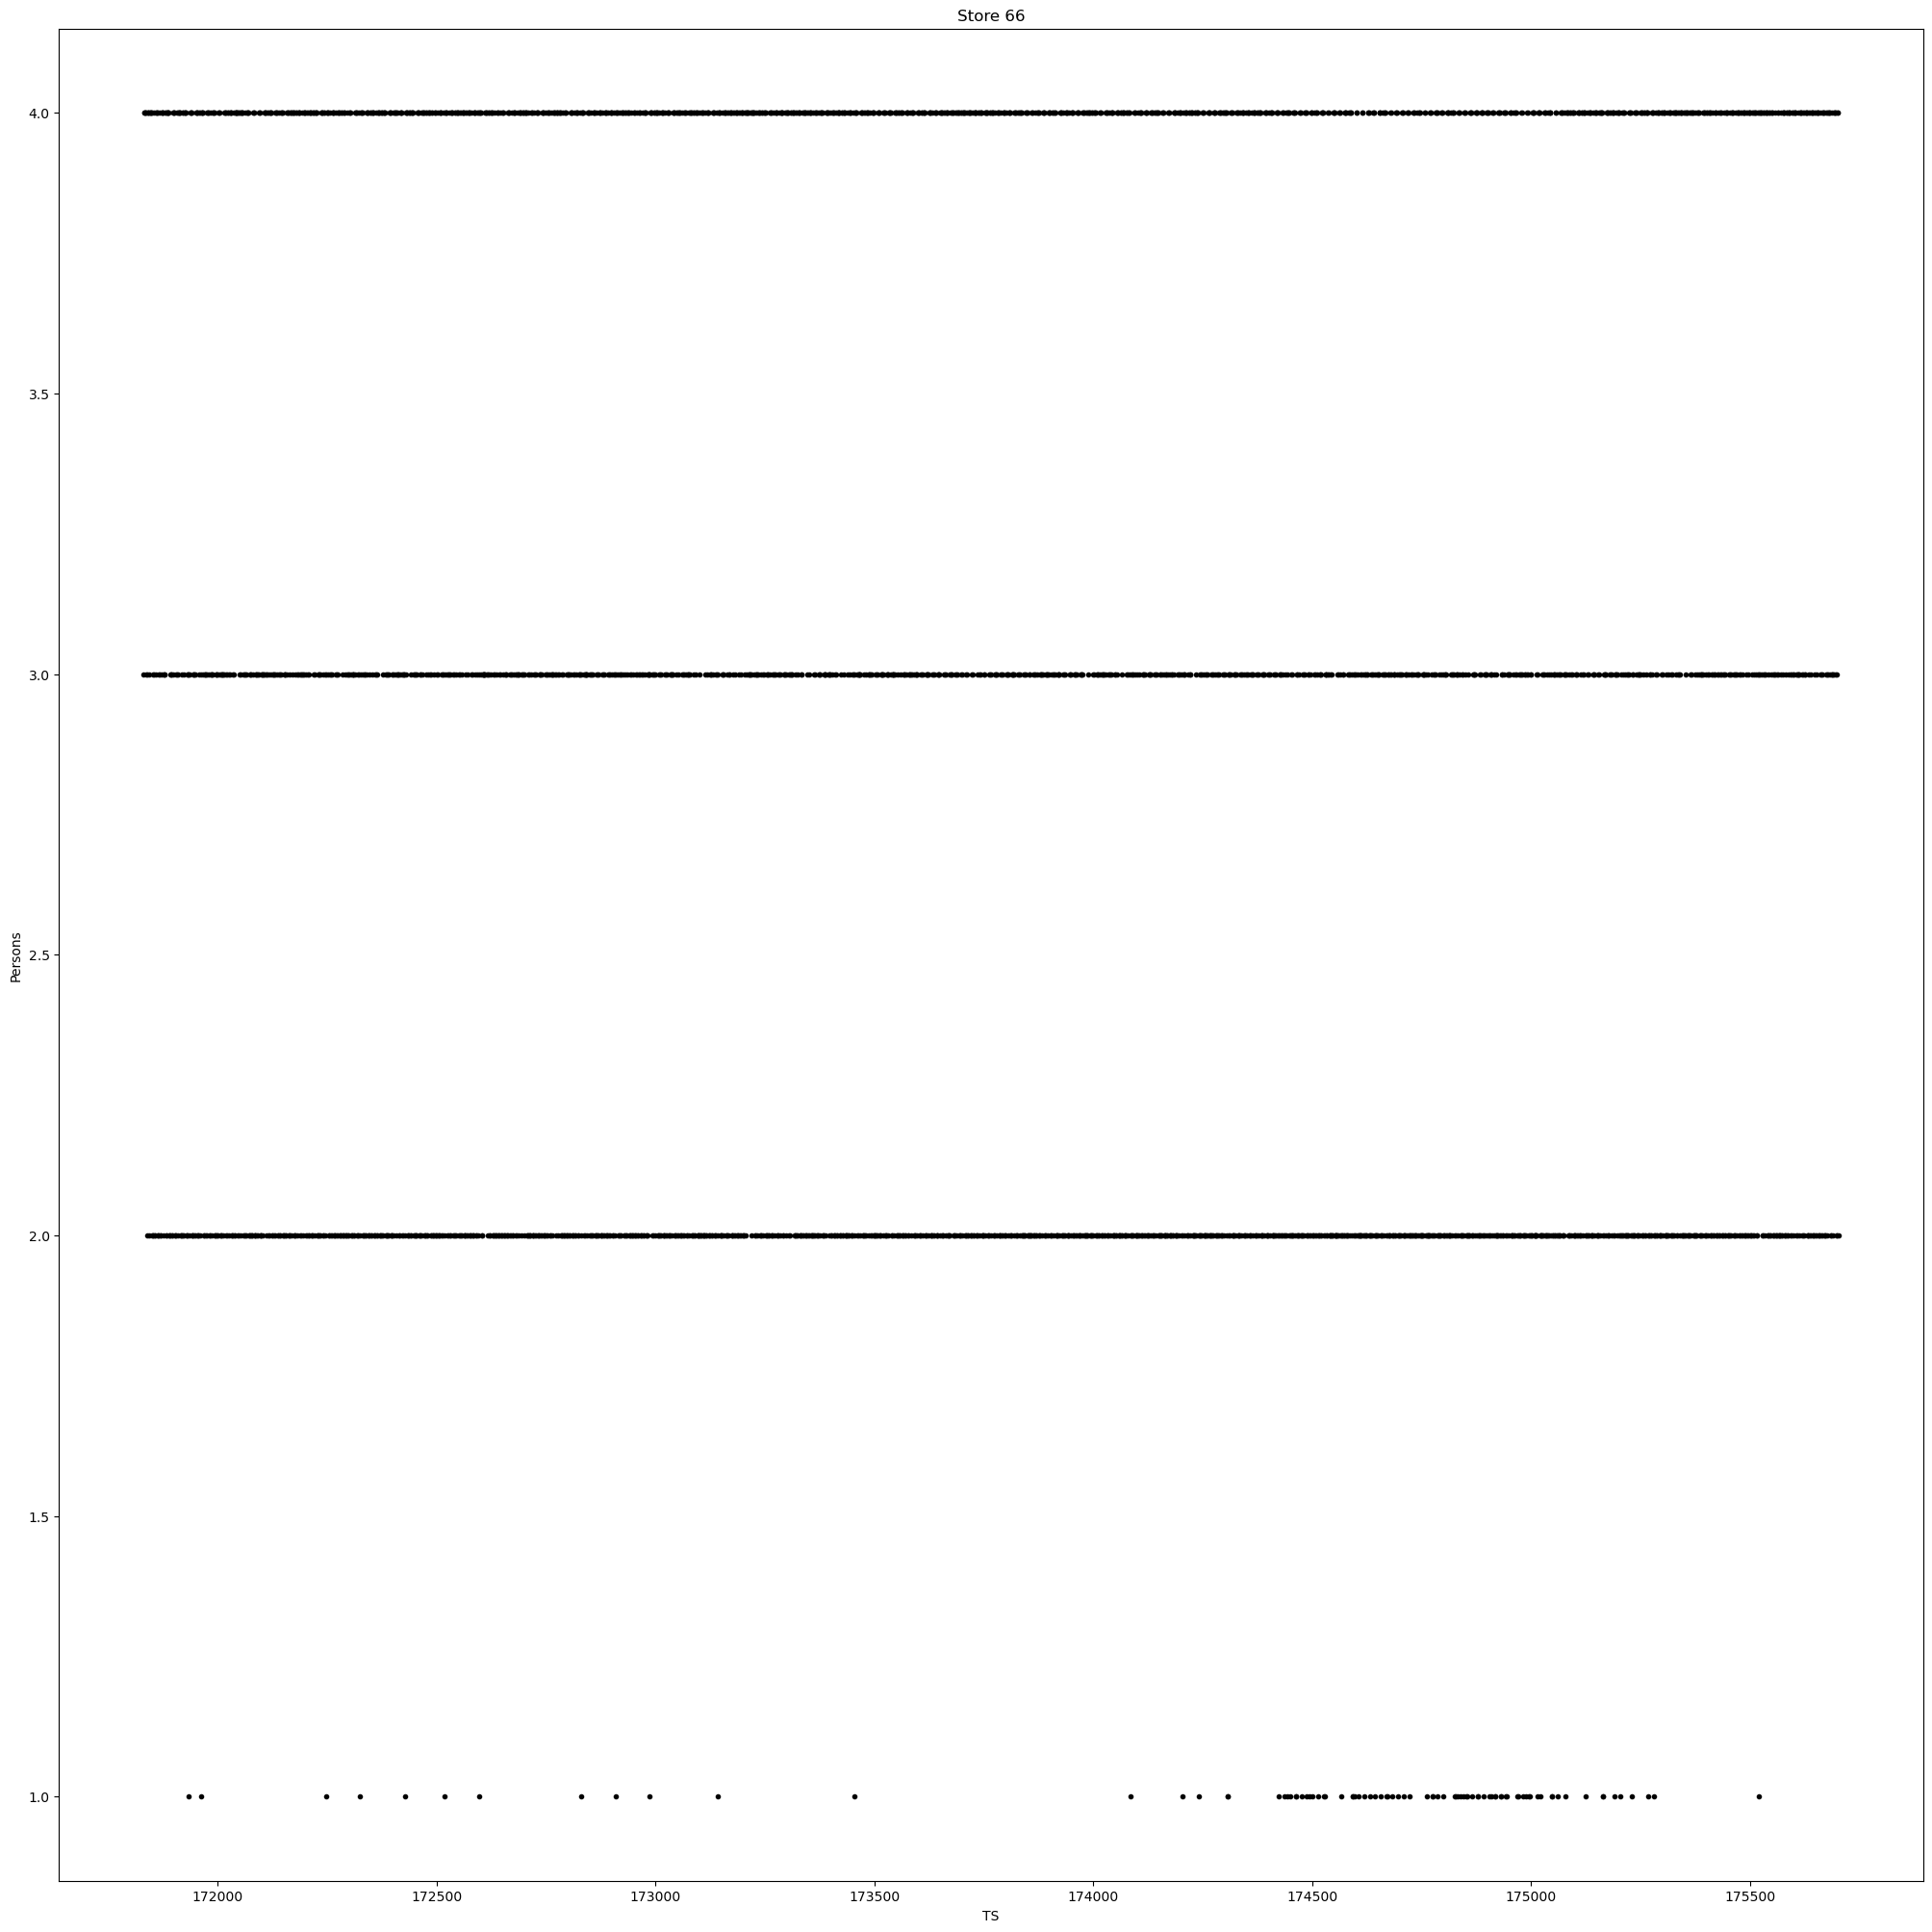

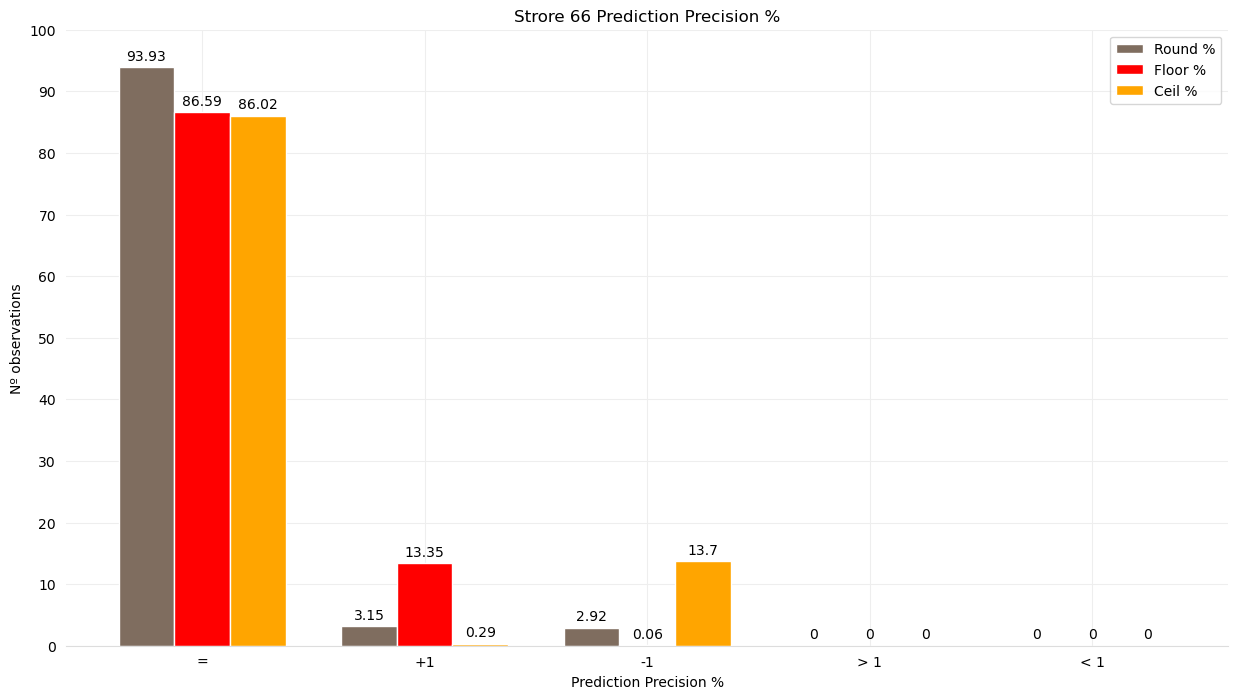

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       1639 |         55 |         51 |          0 |          0  
  Floor                |       1511 |        233 |          1 |          0 |          0  
  Ceil                 |       1501 |          5 |        239 |          0 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      93.93 |       3.15 |       2.92 |        0.0 |        0.0  
  Floor % 

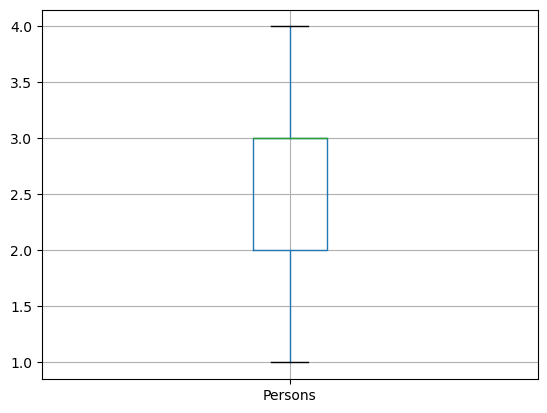

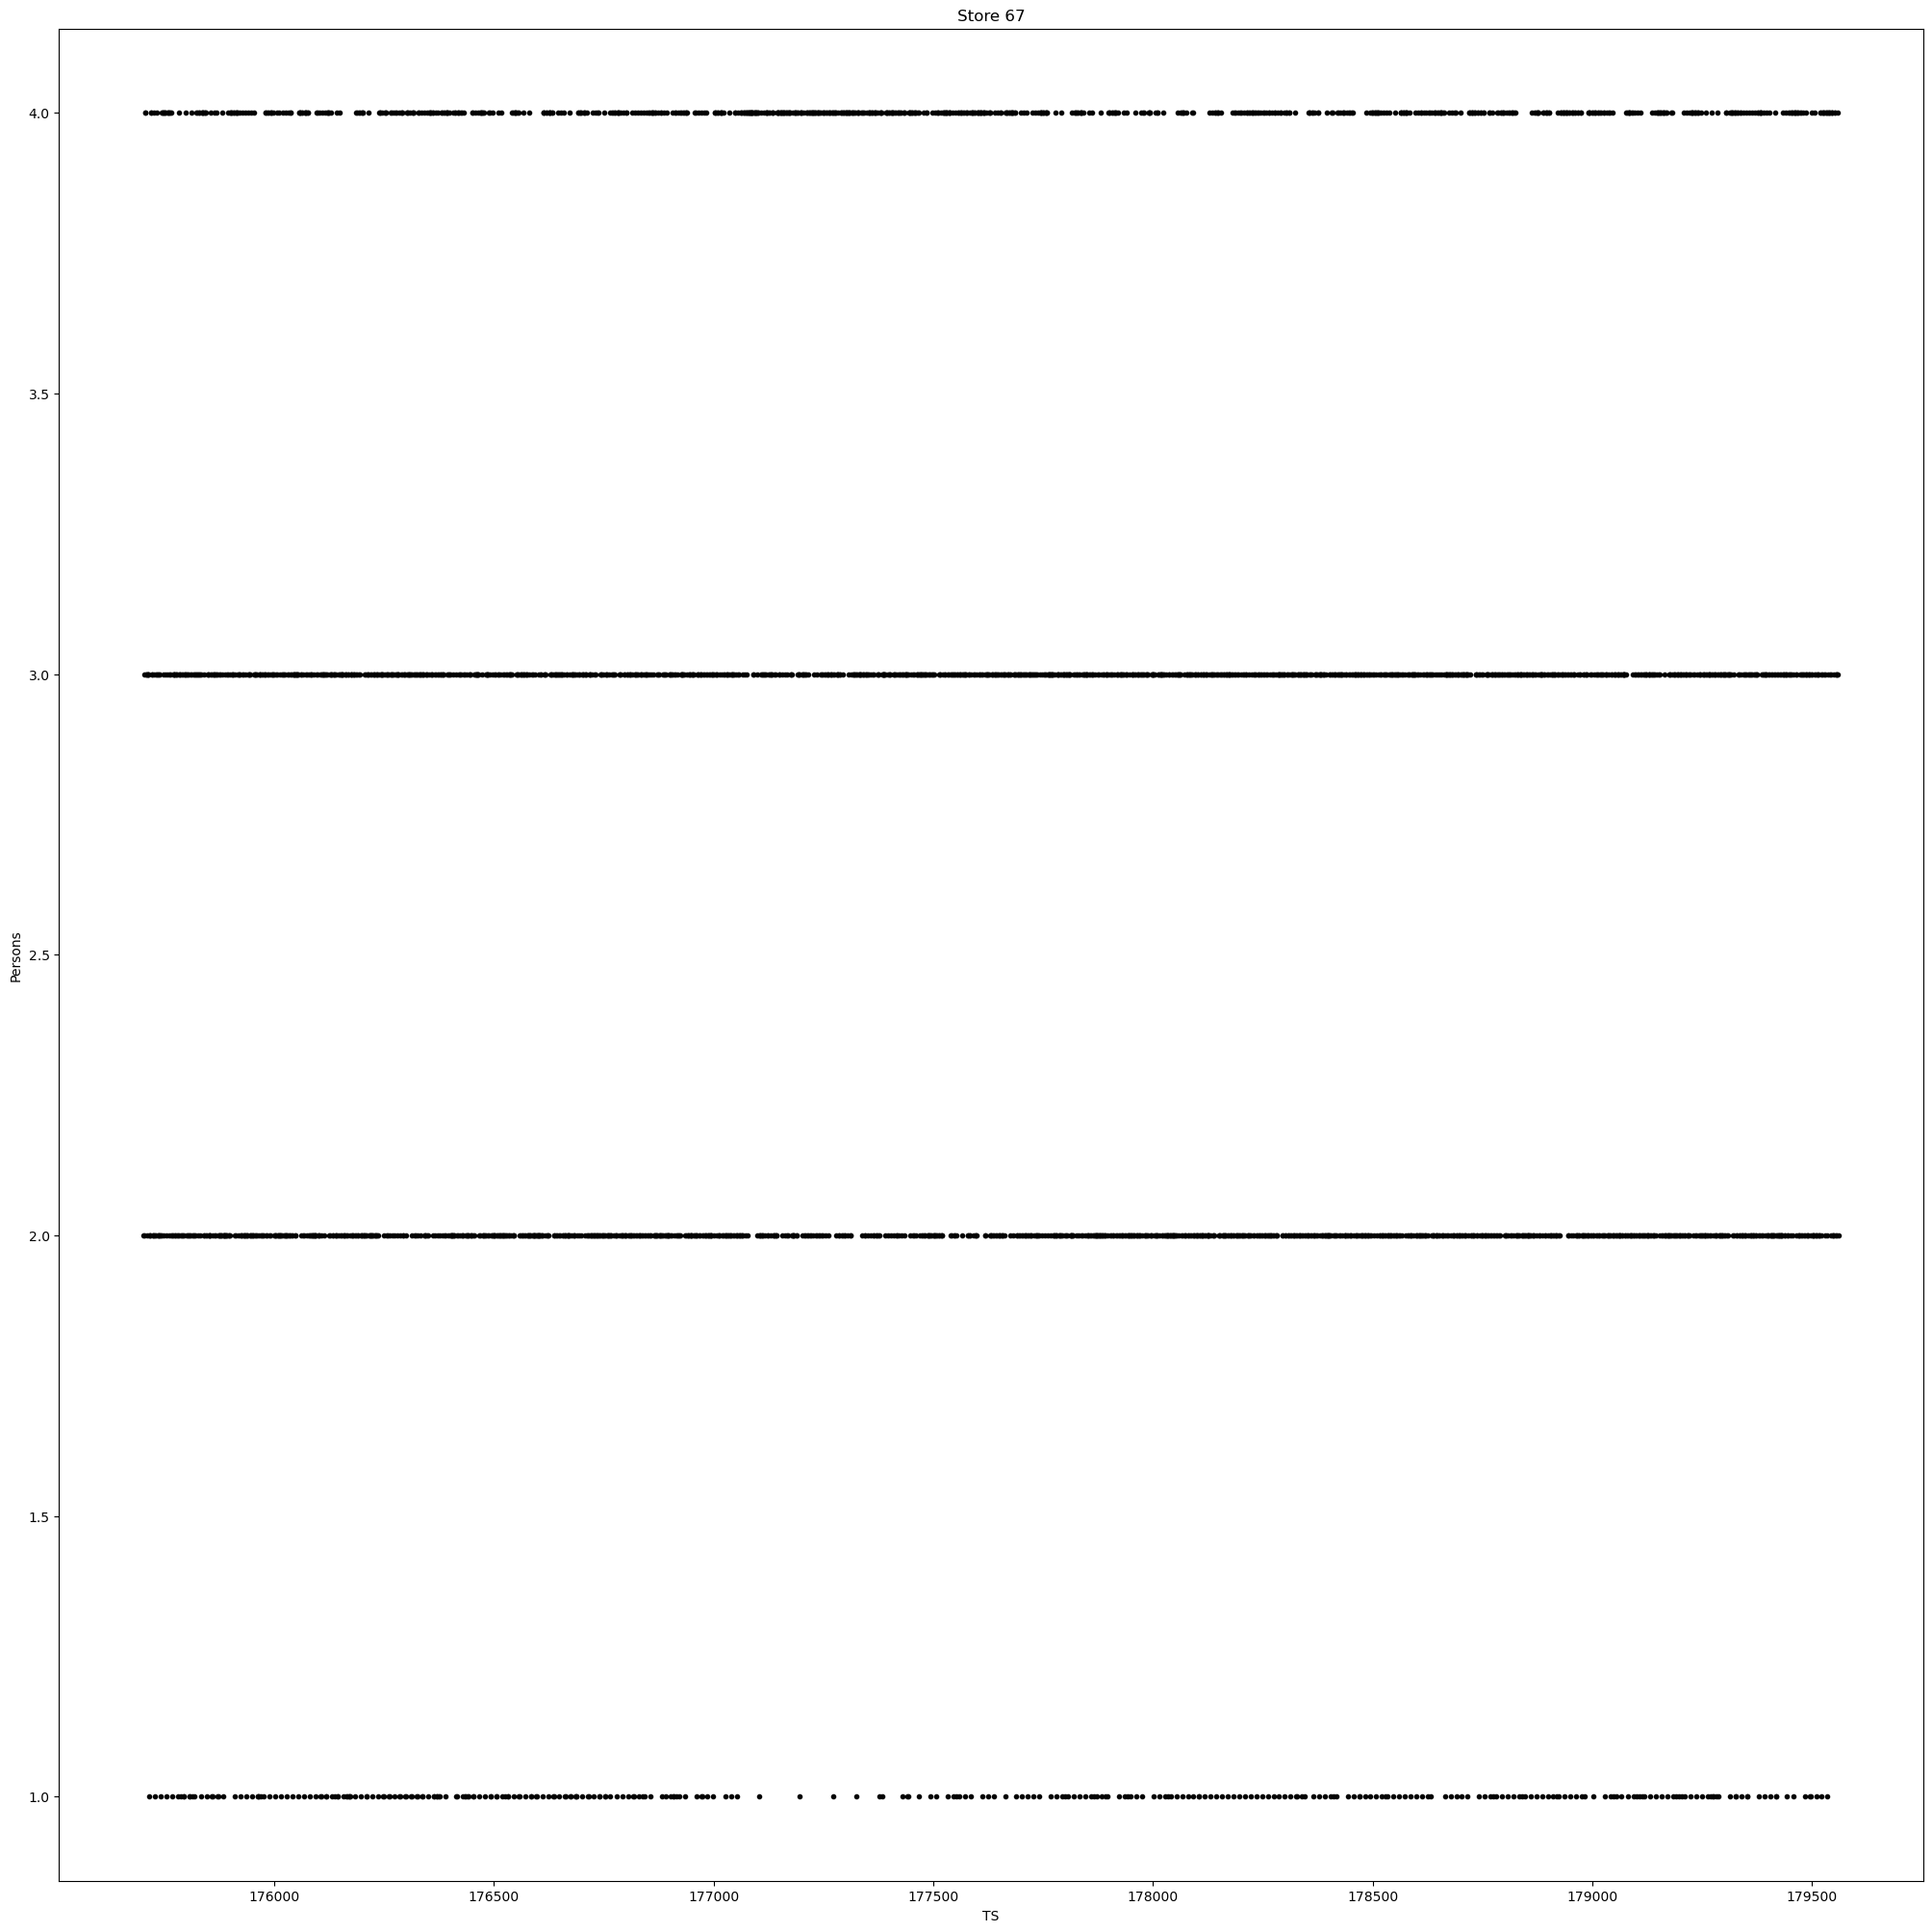

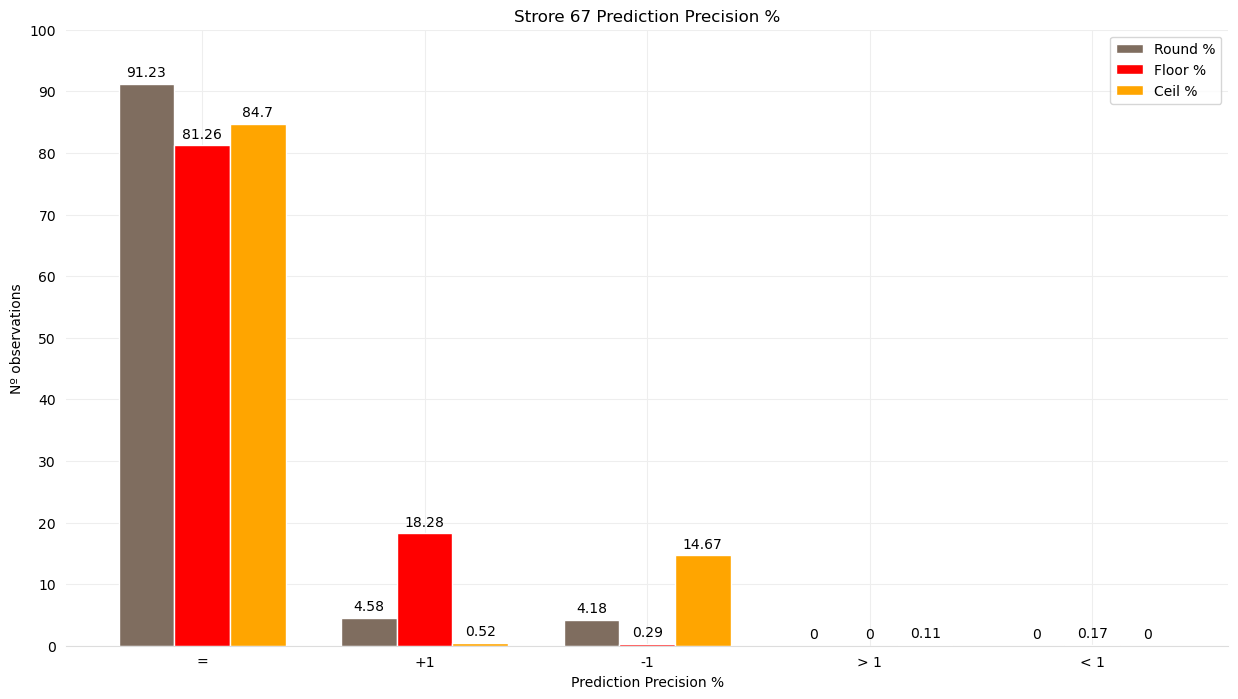

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       1592 |         80 |         73 |          0 |          0  
  Floor                |       1418 |        319 |          5 |          0 |          3  
  Ceil                 |       1478 |          9 |        256 |          2 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      91.23 |       4.58 |       4.18 |        0.0 |        0.0  
  Floor % 

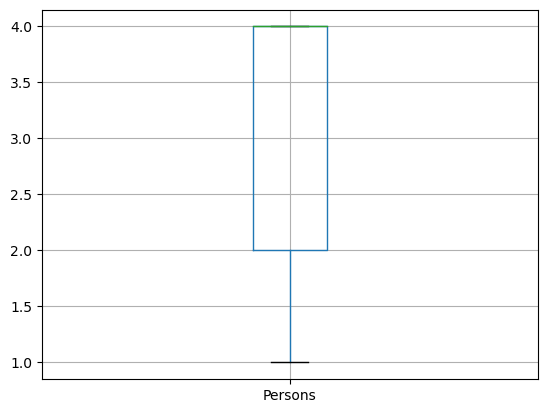

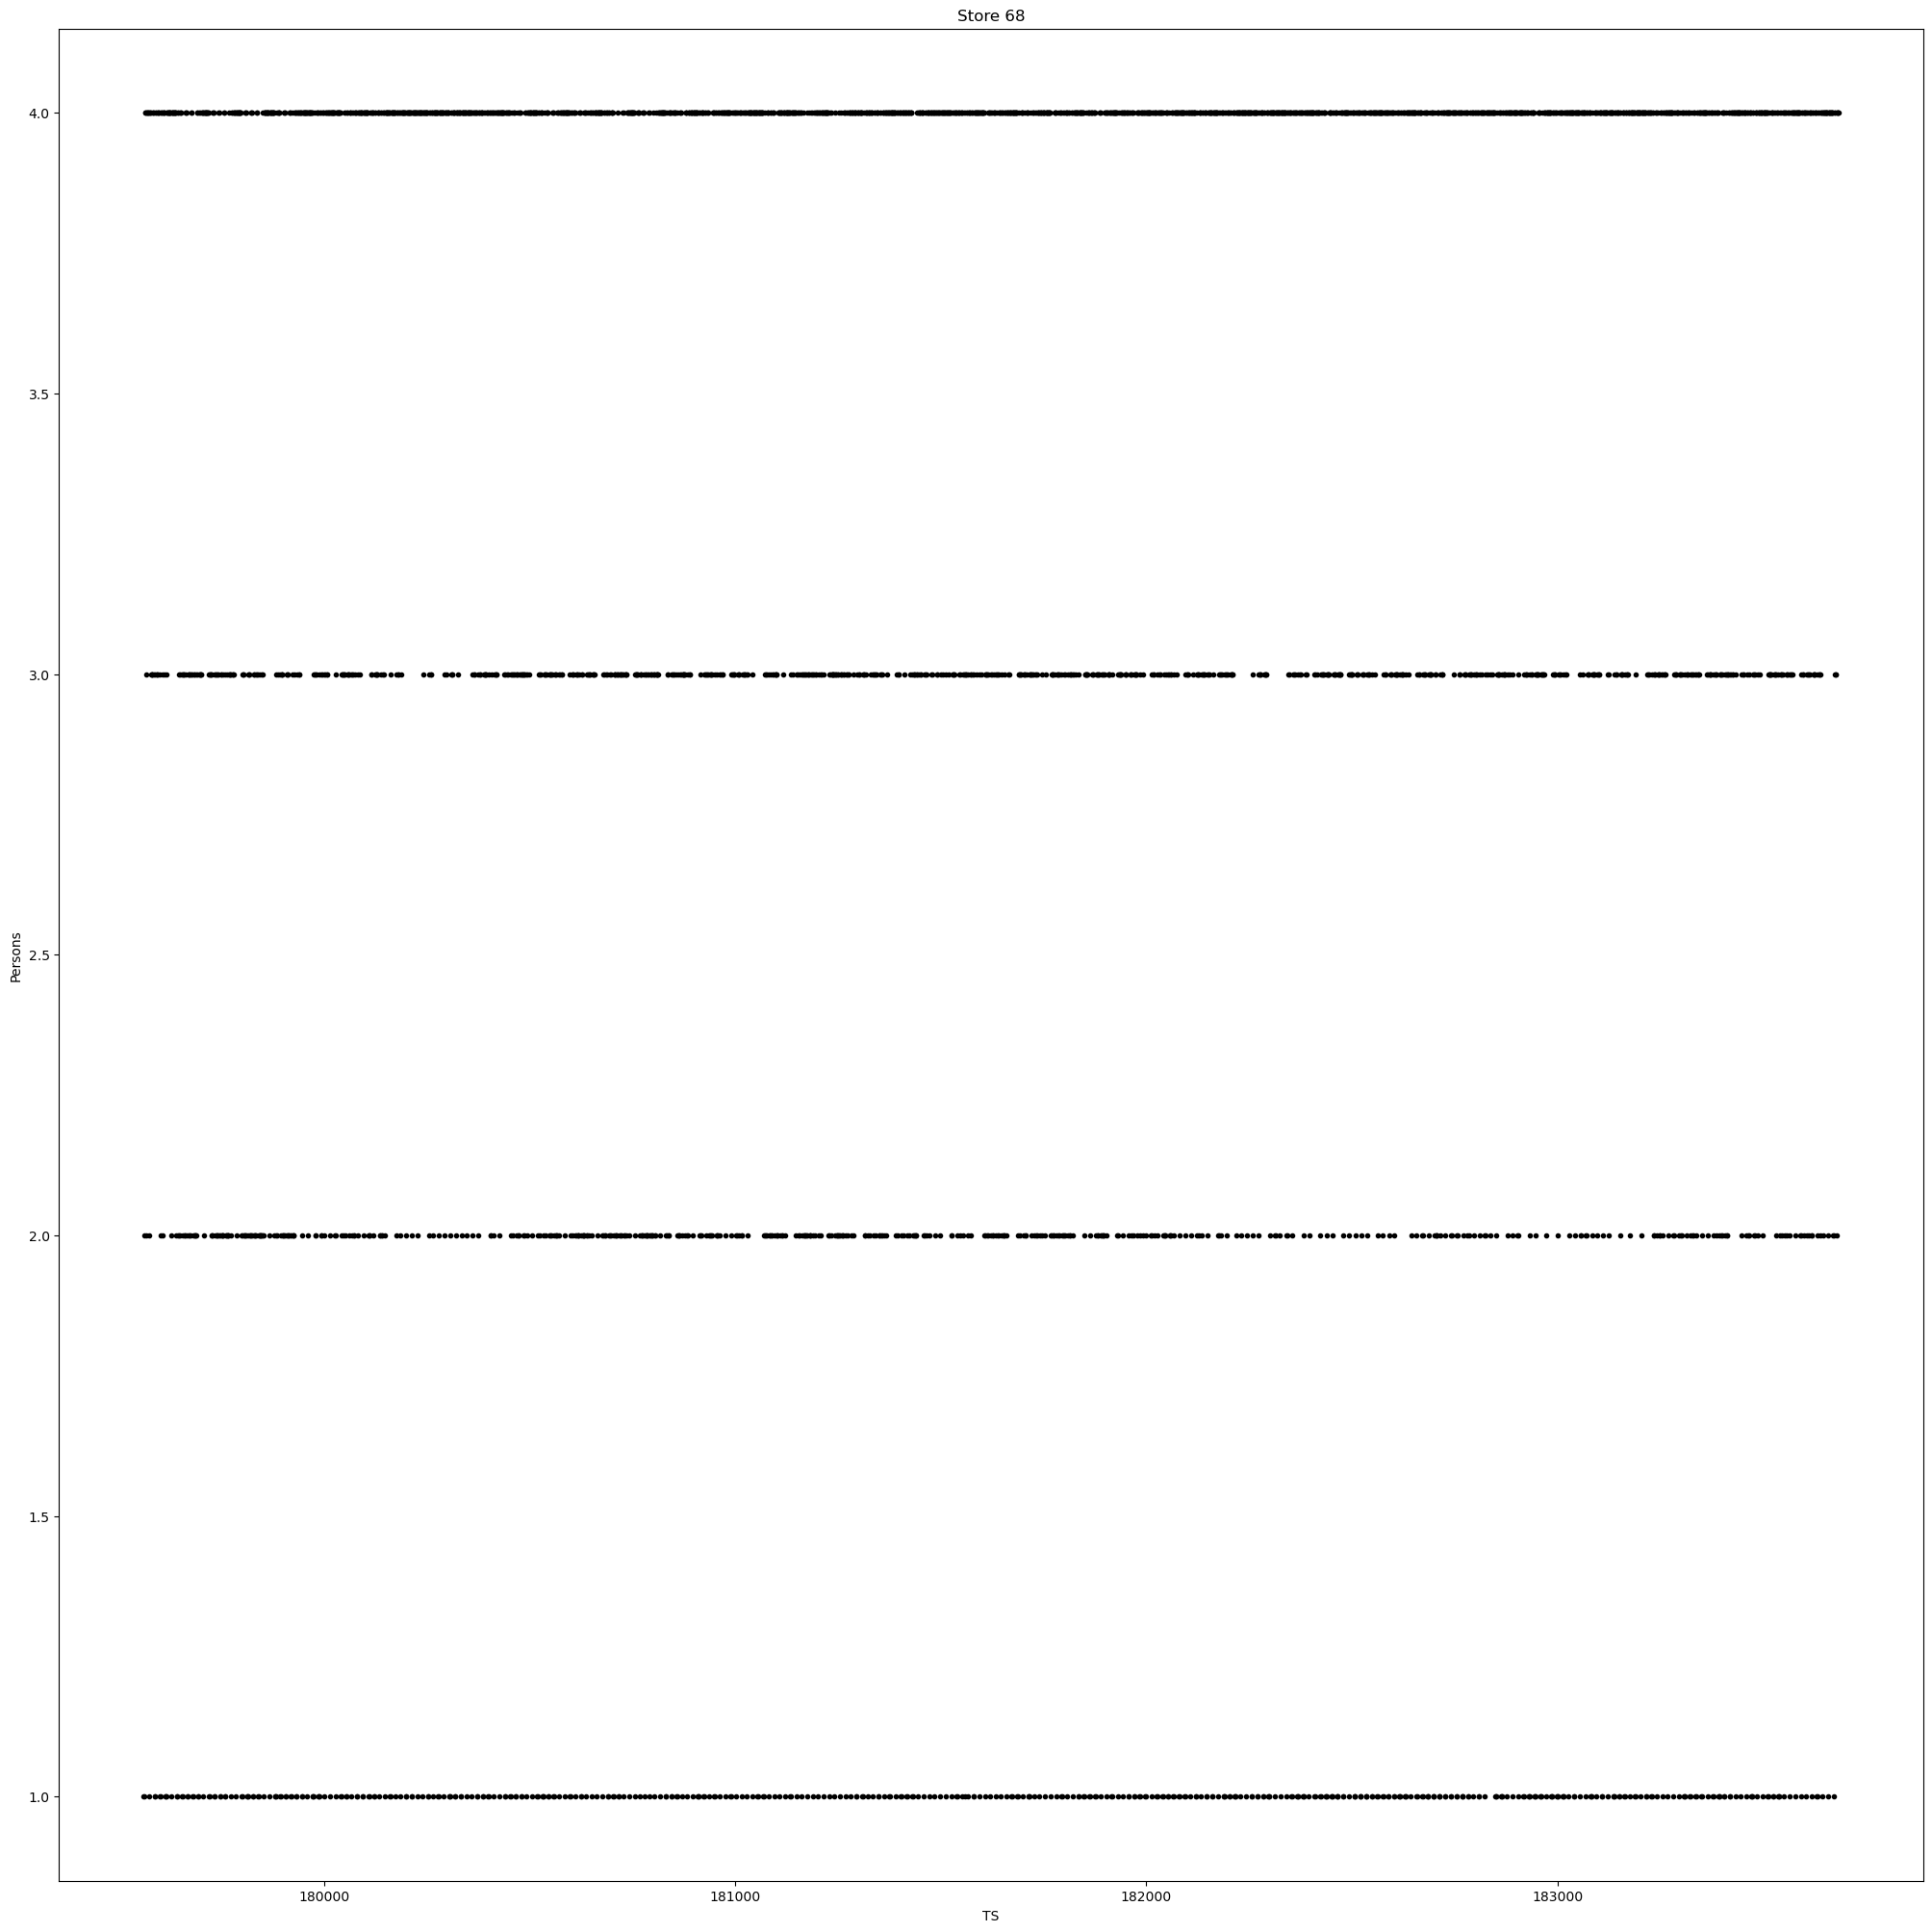

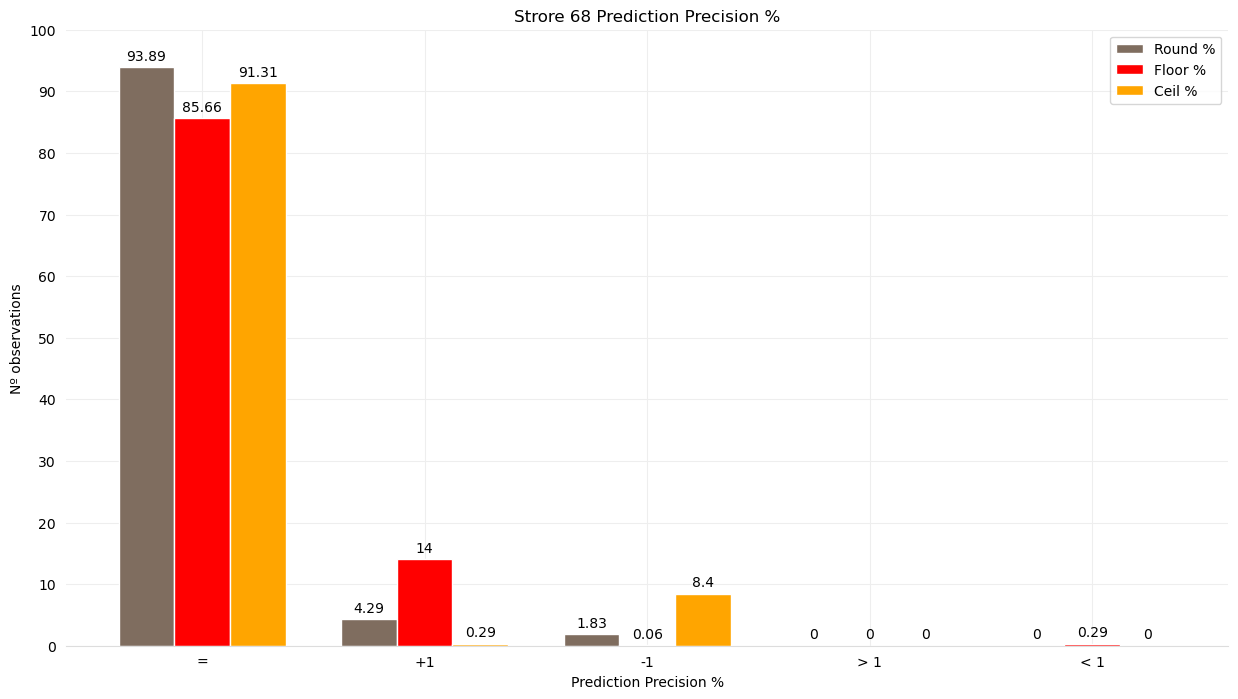

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       1643 |         75 |         32 |          0 |          0  
  Floor                |       1499 |        245 |          1 |          0 |          5  
  Ceil                 |       1598 |          5 |        147 |          0 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      93.89 |       4.29 |       1.83 |        0.0 |        0.0  
  Floor % 

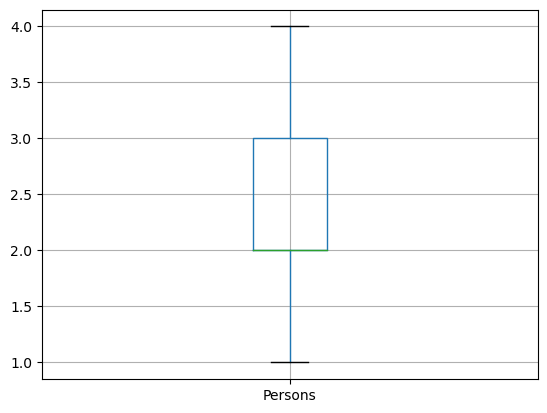

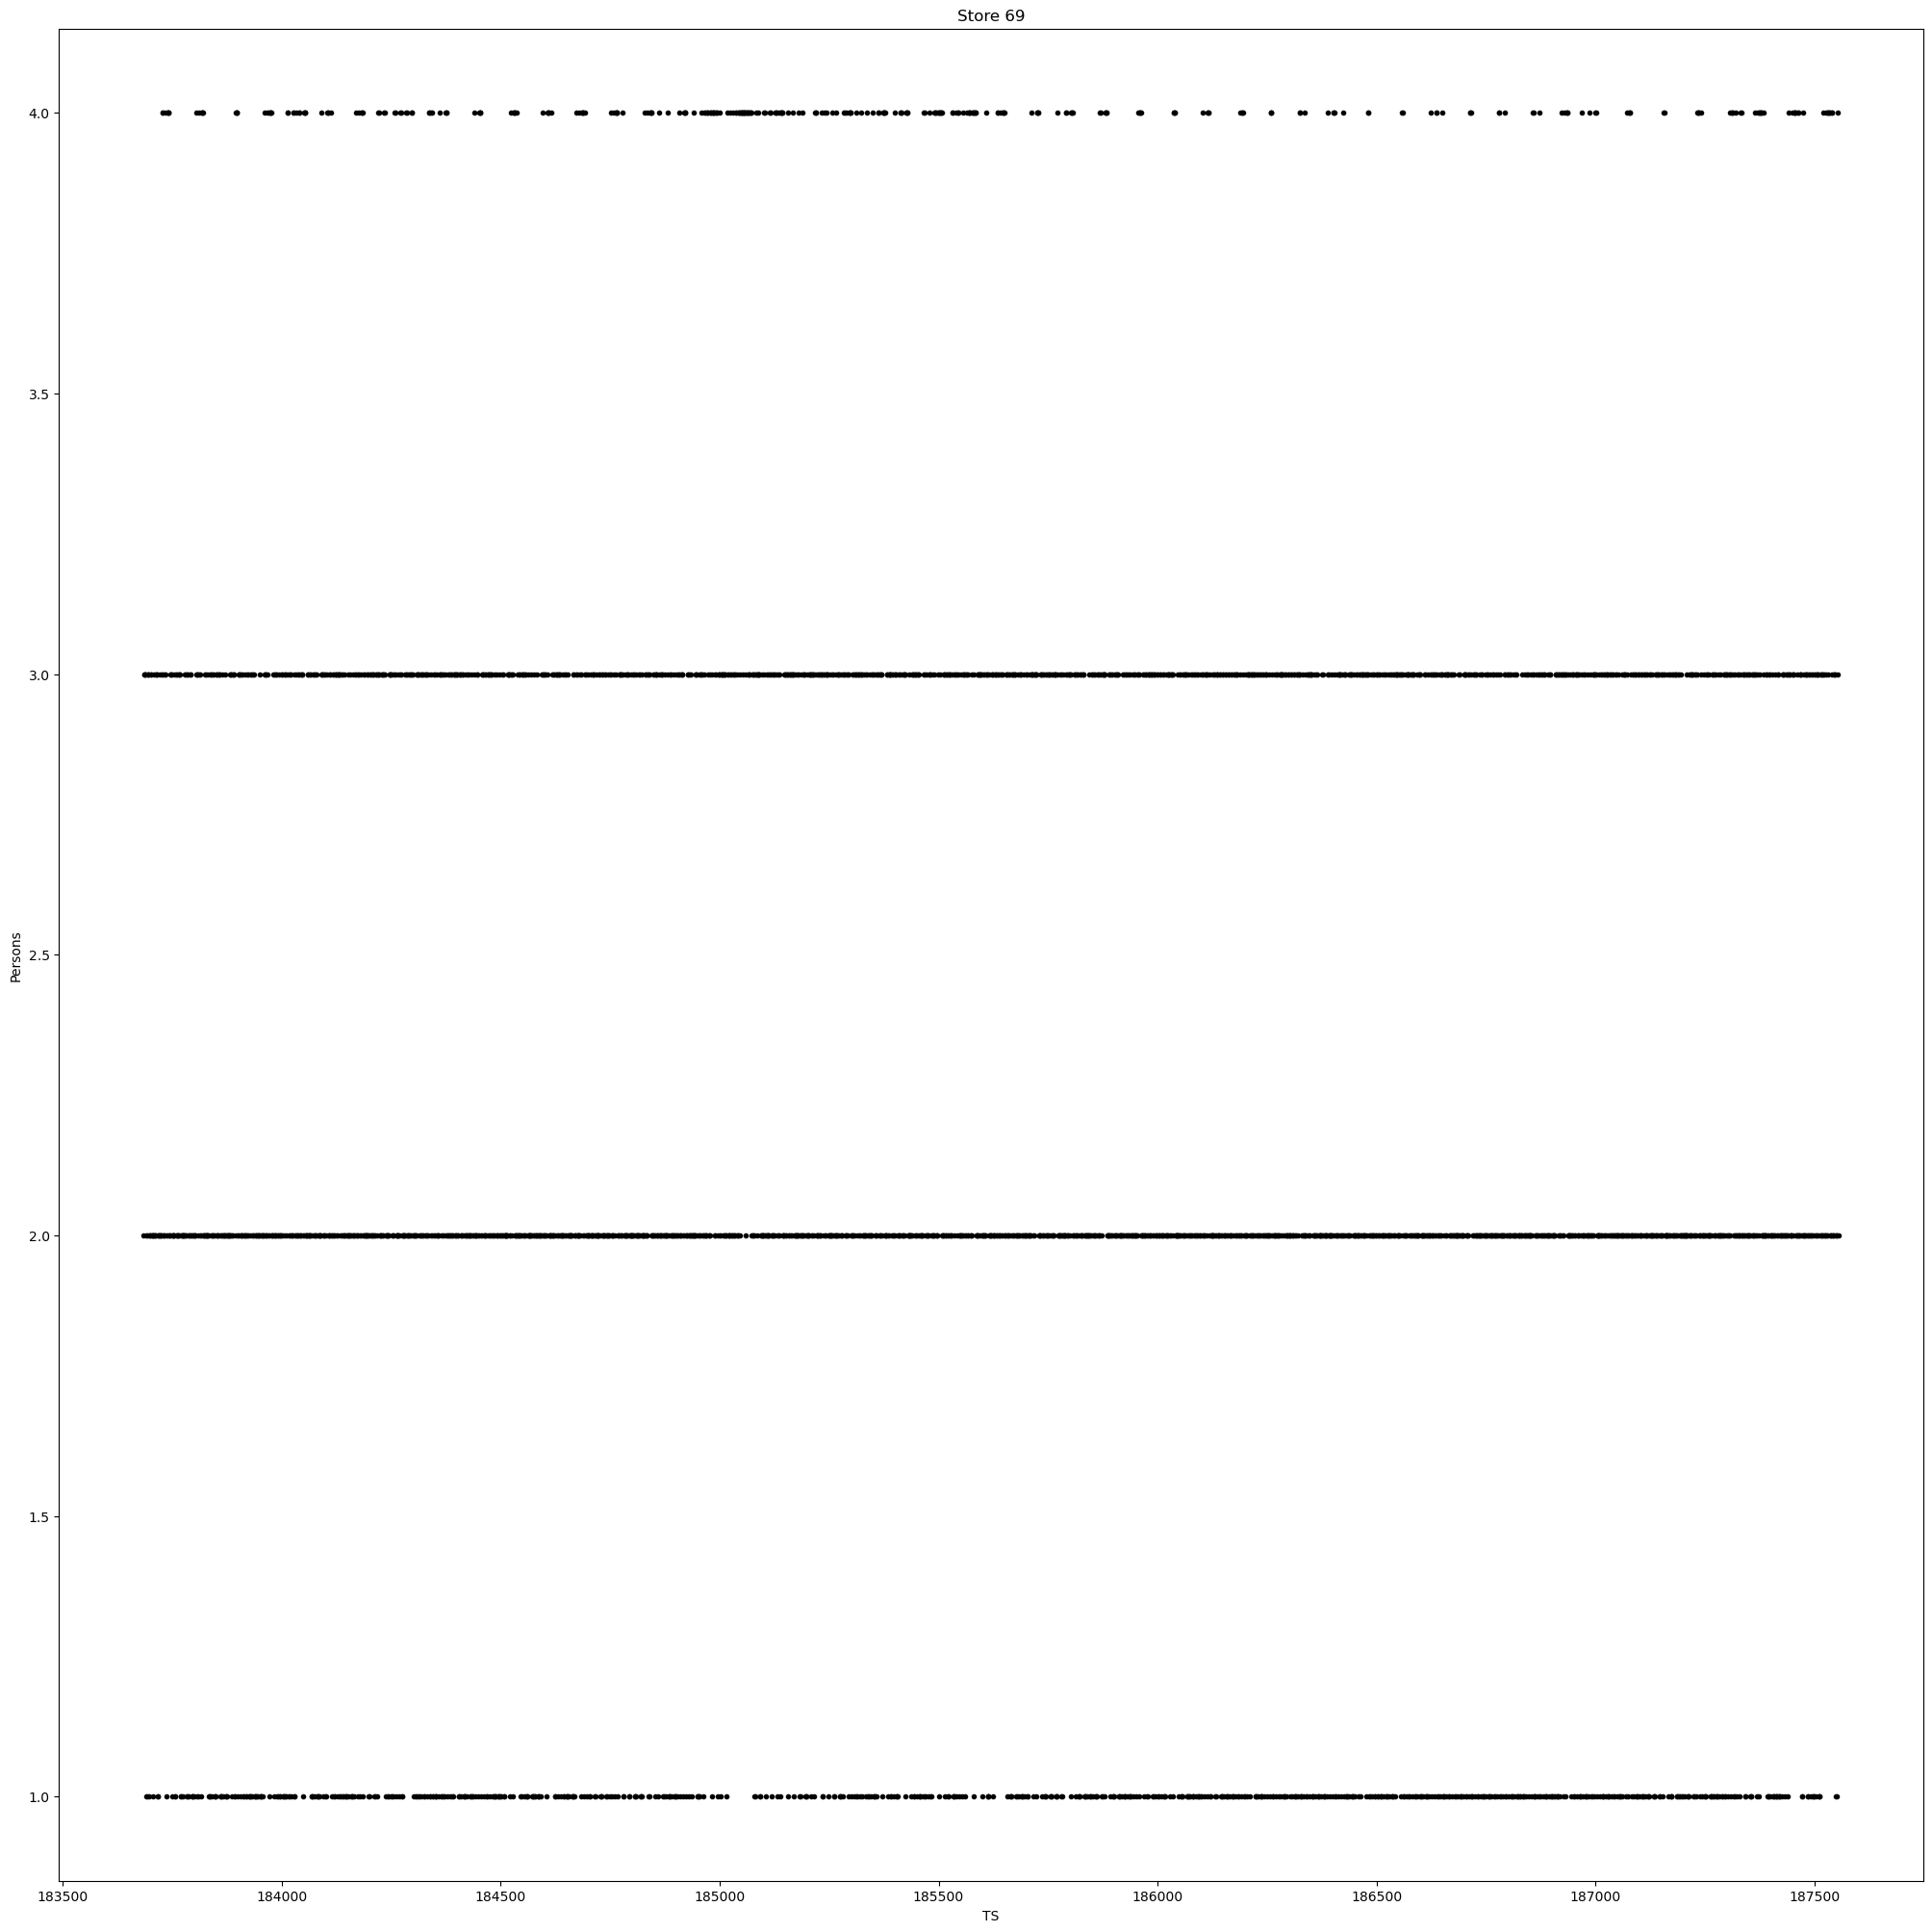

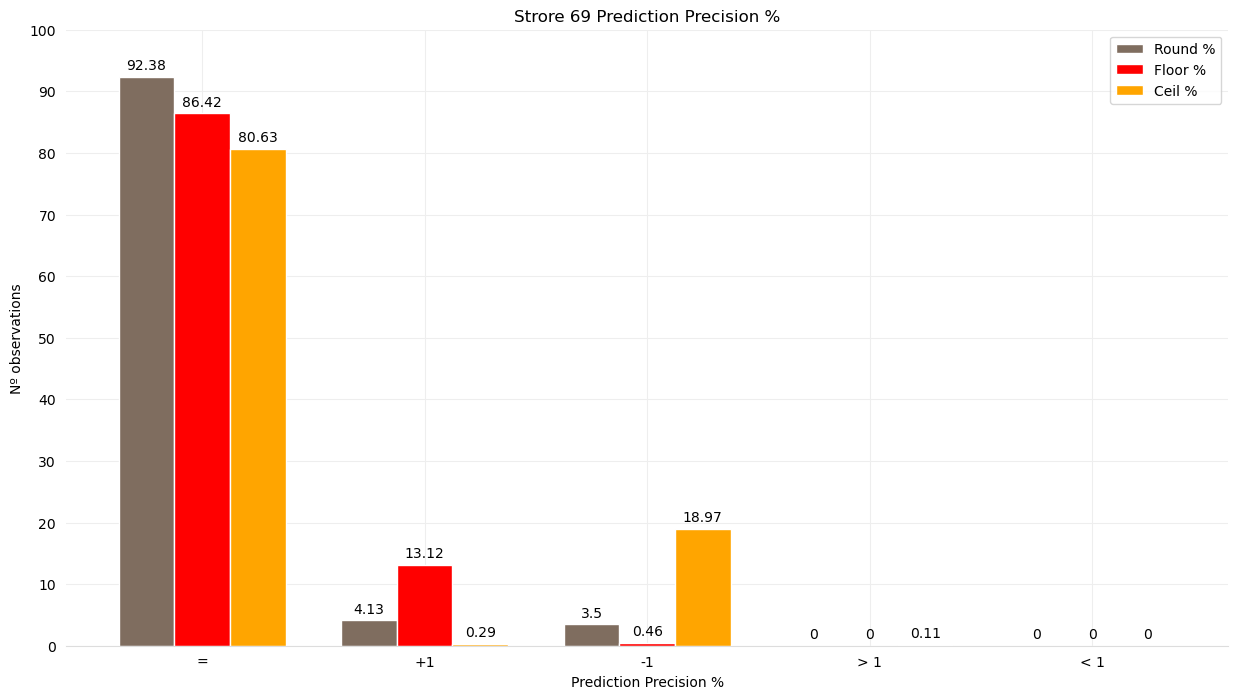

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       1612 |         72 |         61 |          0 |          0  
  Floor                |       1508 |        229 |          8 |          0 |          0  
  Ceil                 |       1407 |          5 |        331 |          2 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      92.38 |       4.13 |        3.5 |        0.0 |        0.0  
  Floor % 

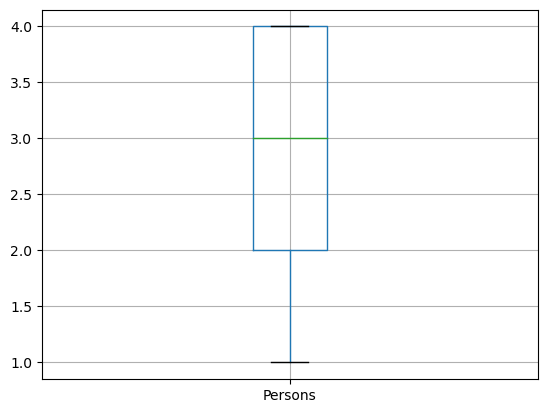

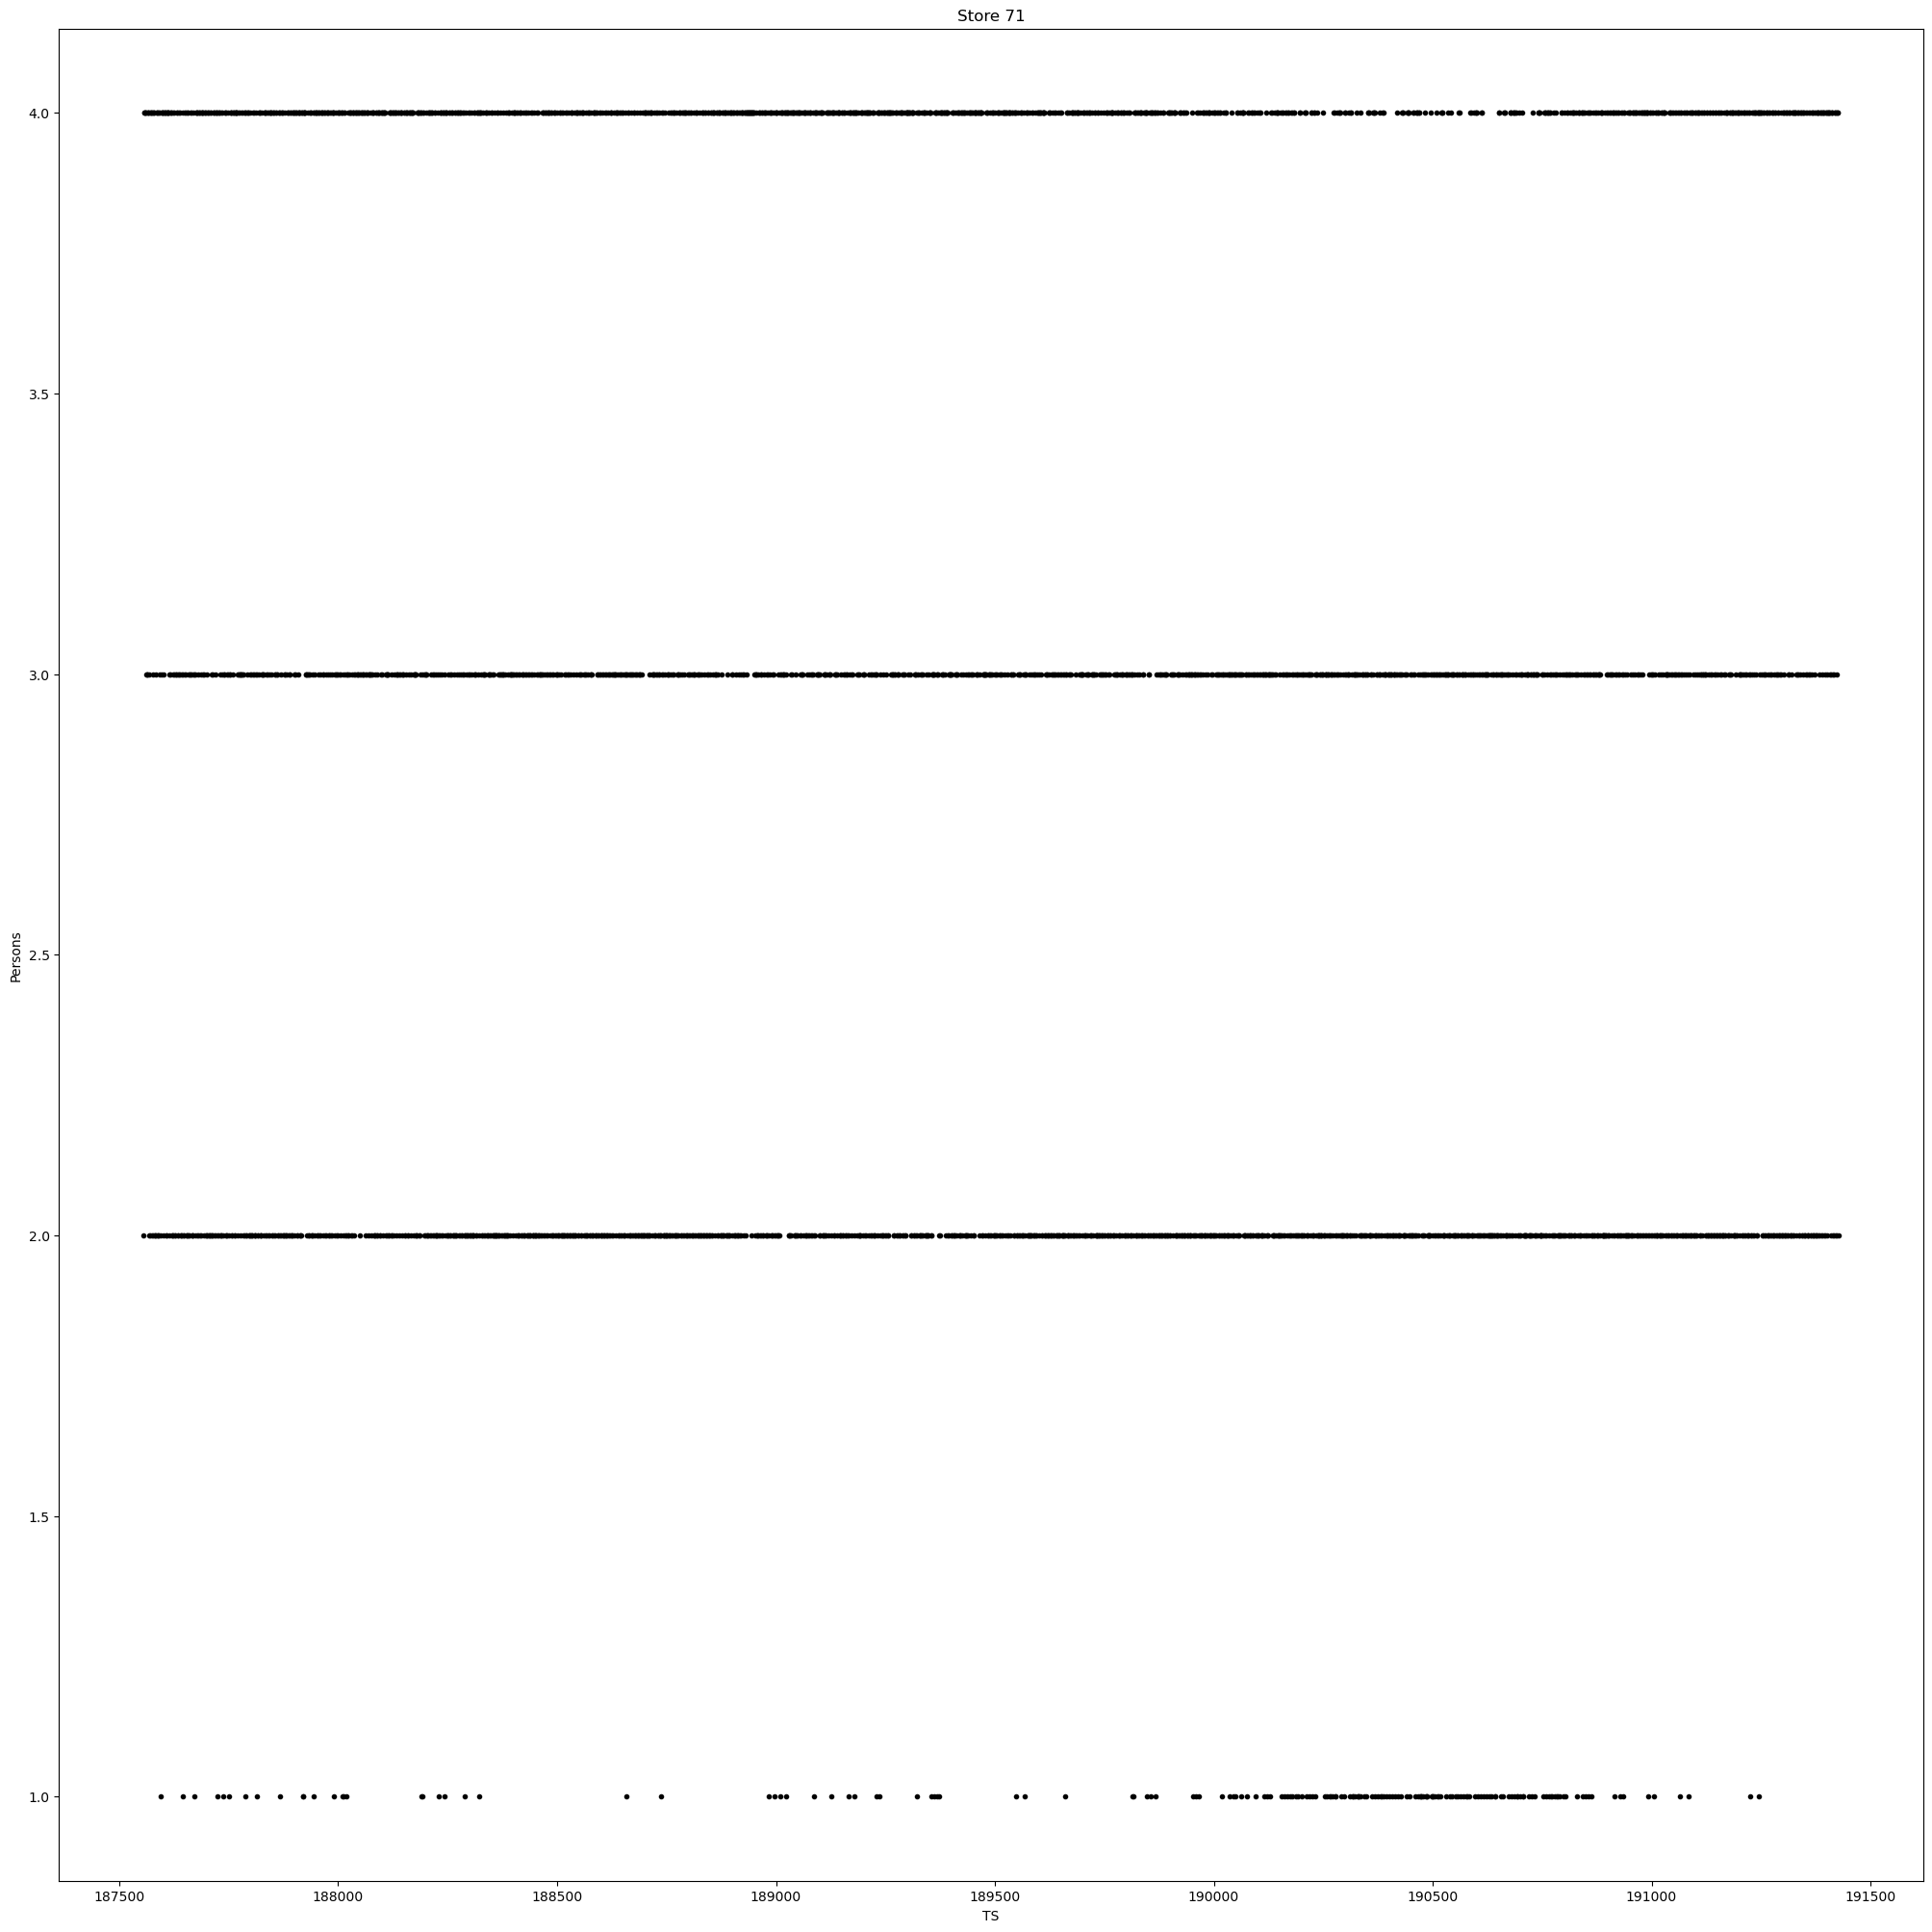

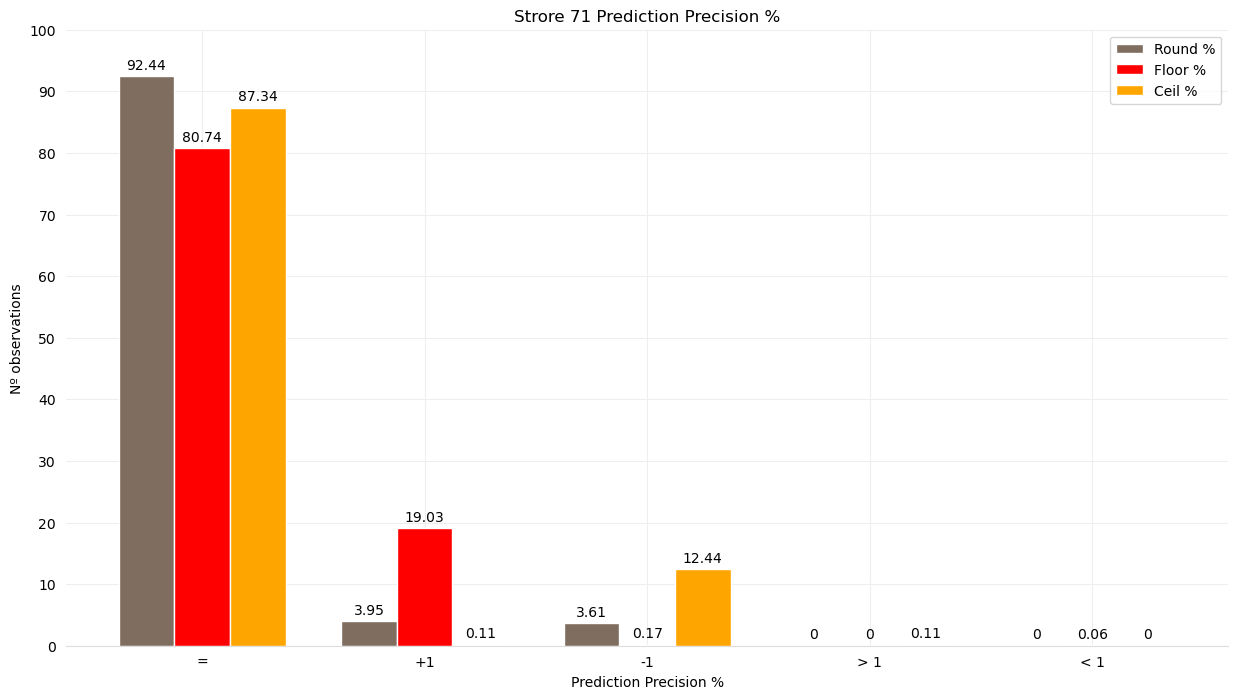

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       1613 |         69 |         63 |          0 |          0  
  Floor                |       1409 |        332 |          3 |          0 |          1  
  Ceil                 |       1524 |          2 |        217 |          2 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      92.44 |       3.95 |       3.61 |        0.0 |        0.0  
  Floor % 

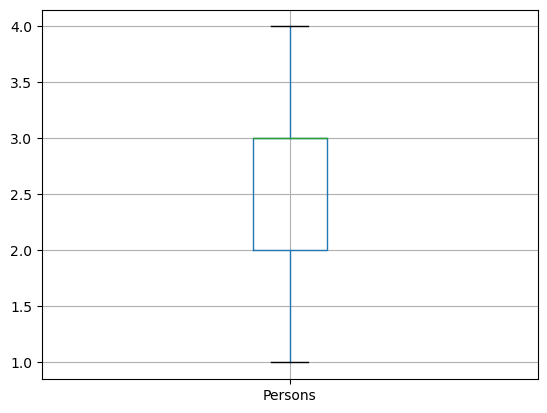

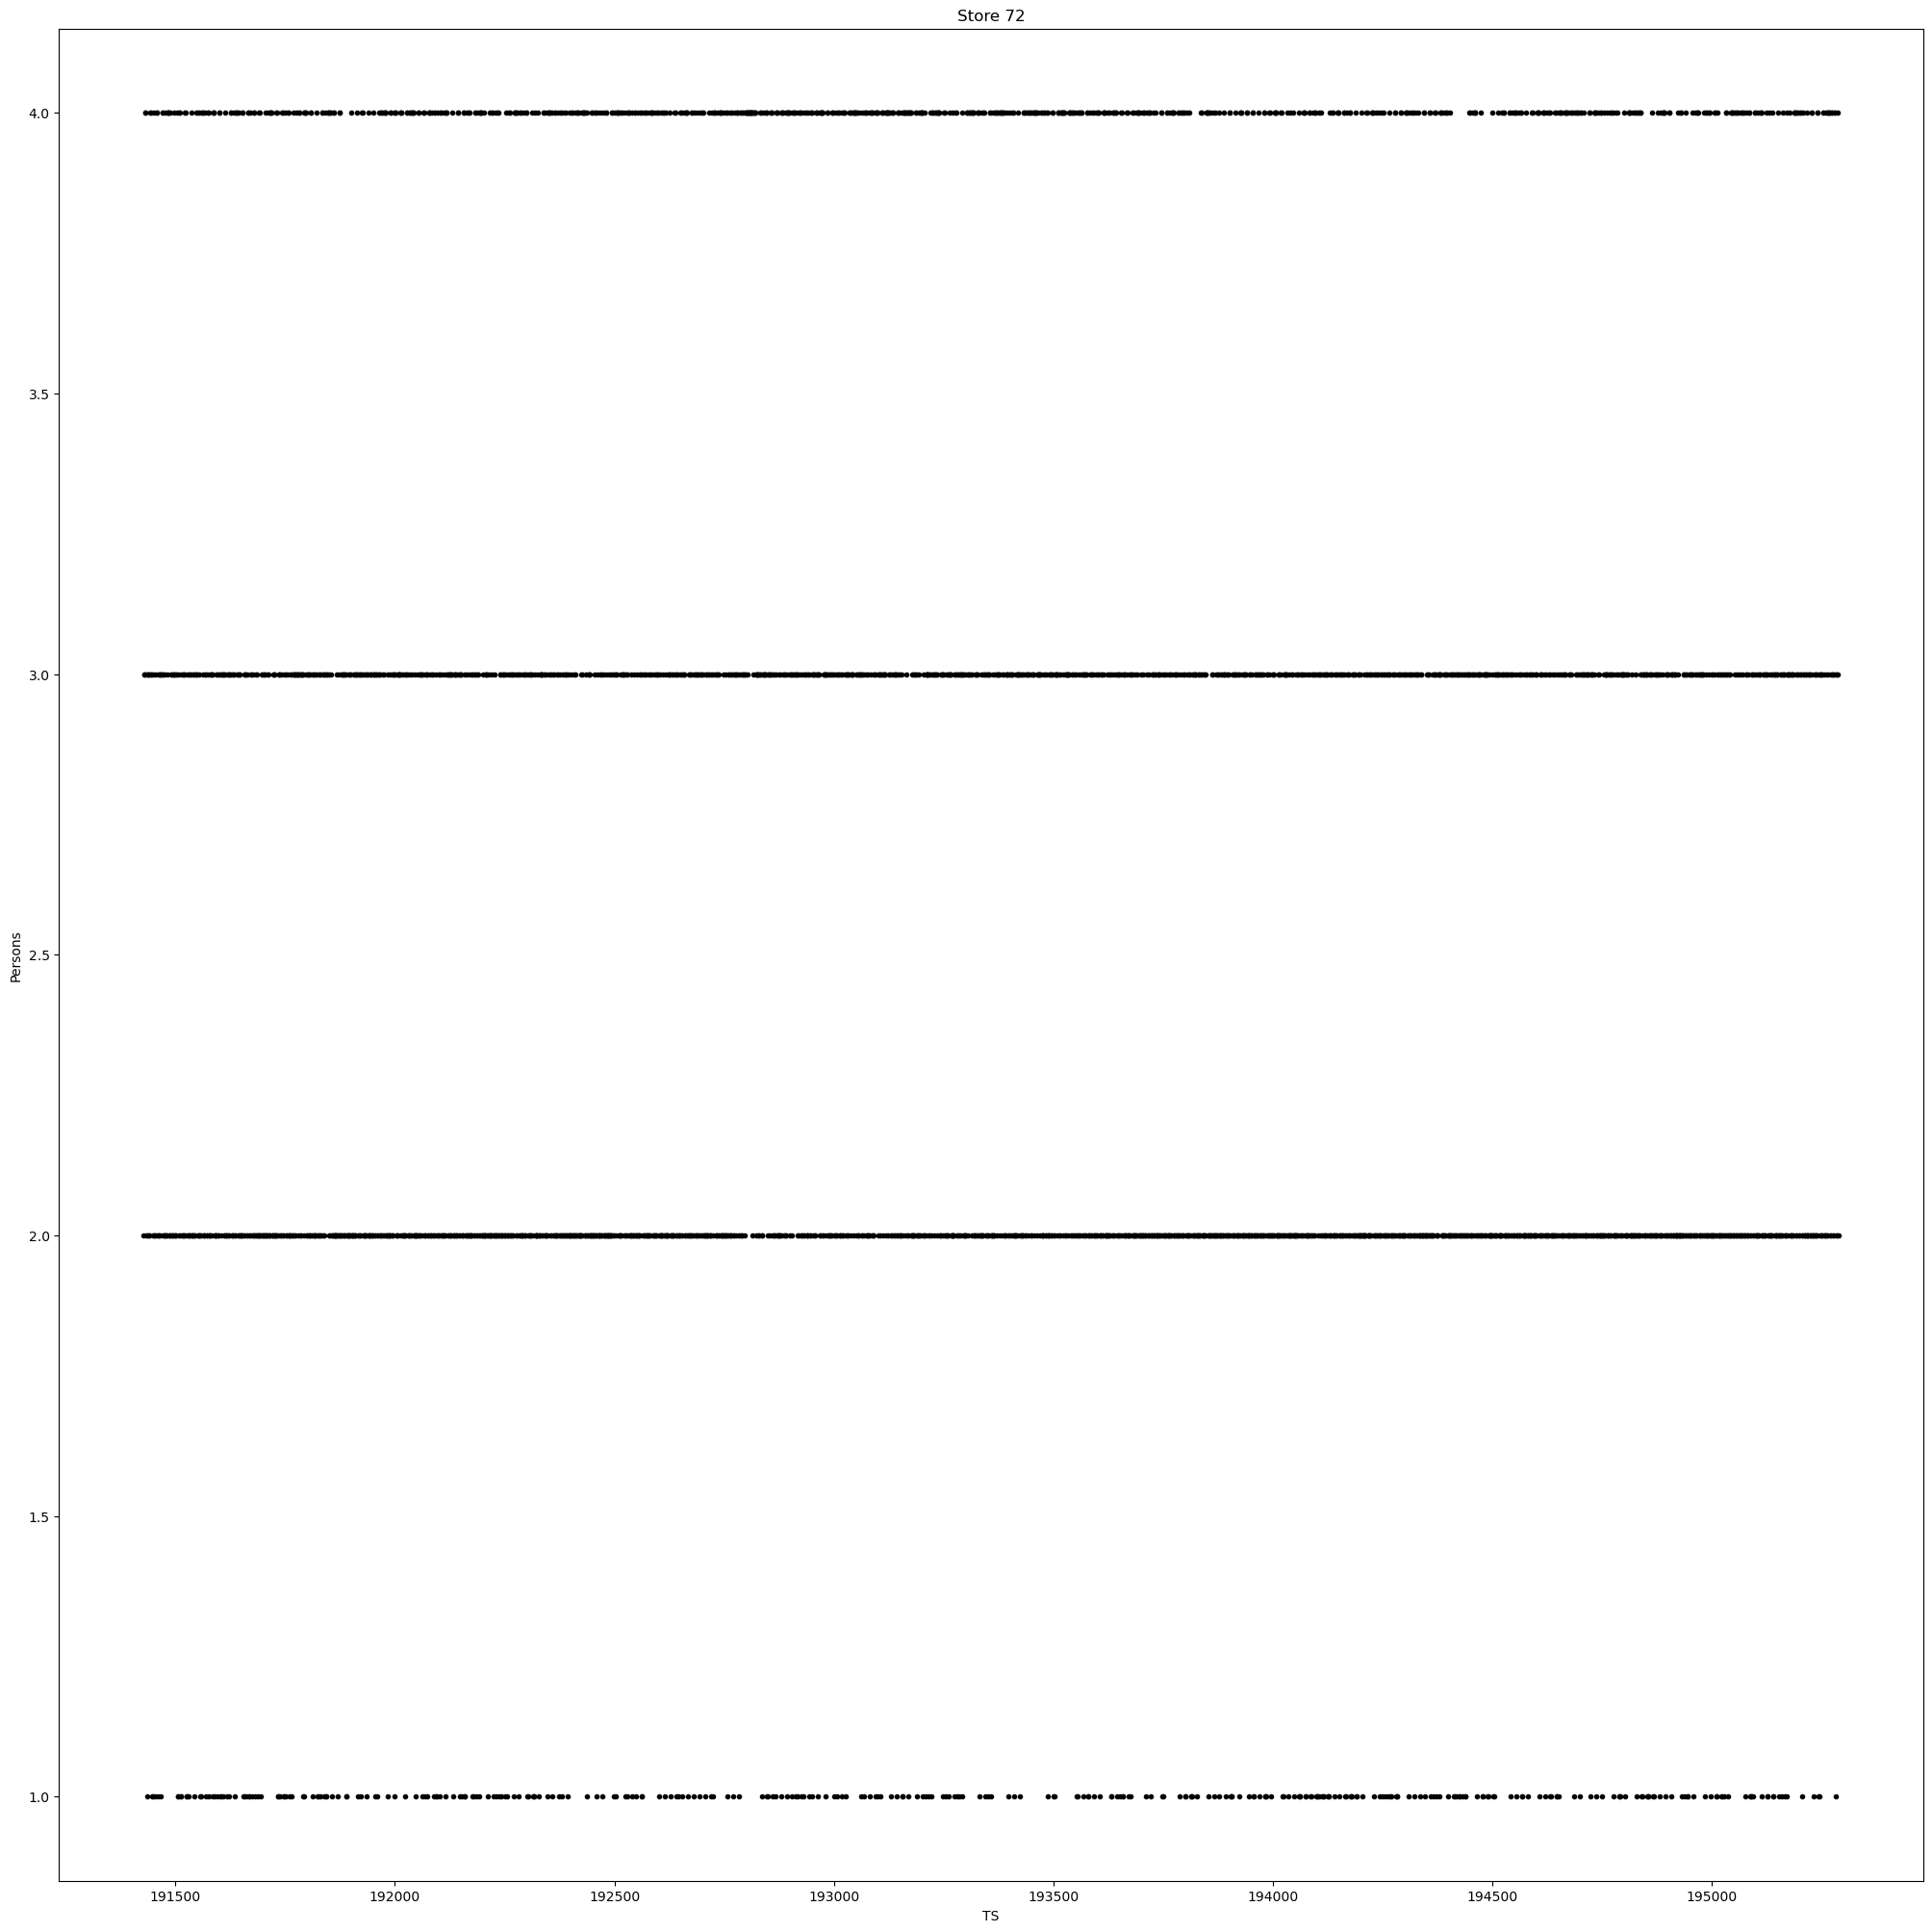

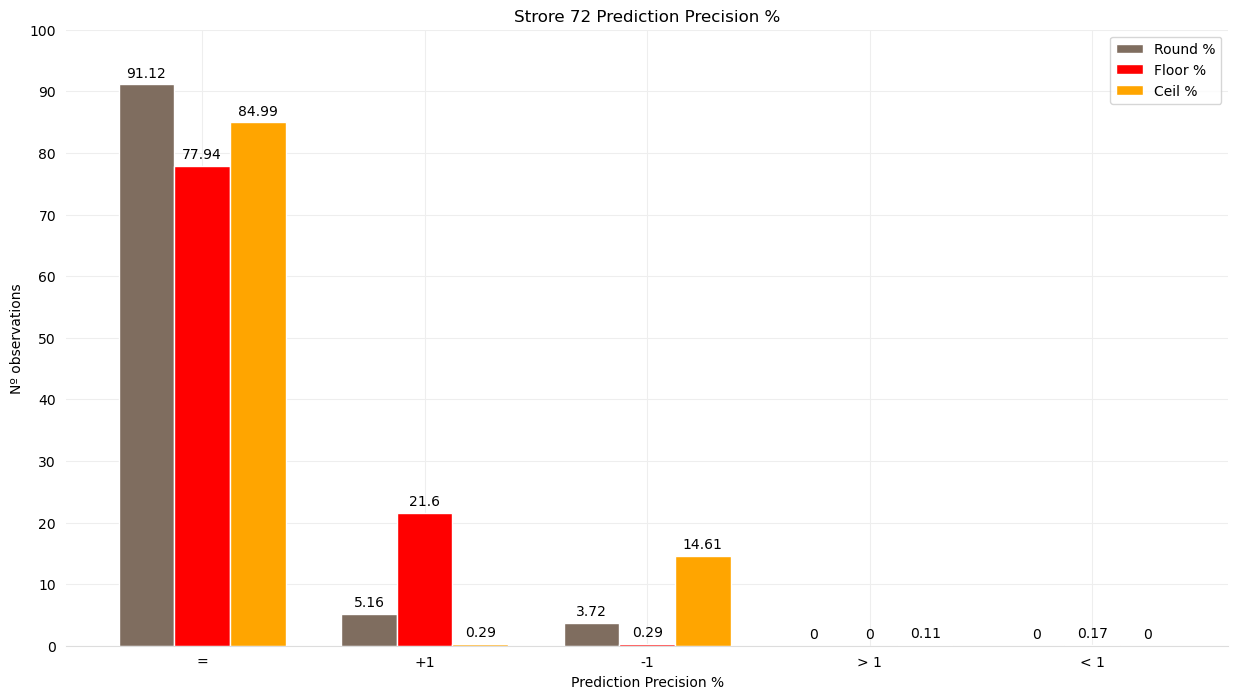

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       1590 |         90 |         65 |          0 |          0  
  Floor                |       1360 |        377 |          5 |          0 |          3  
  Ceil                 |       1483 |          5 |        255 |          2 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      91.12 |       5.16 |       3.72 |        0.0 |        0.0  
  Floor % 

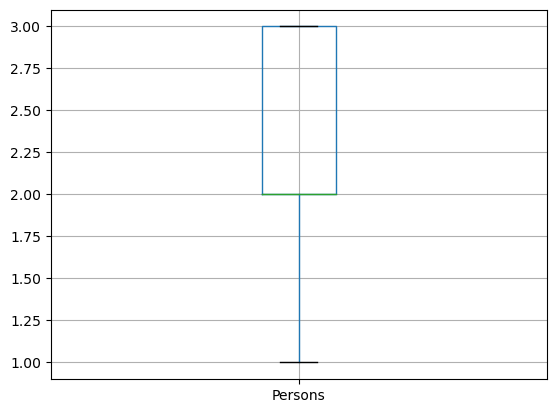

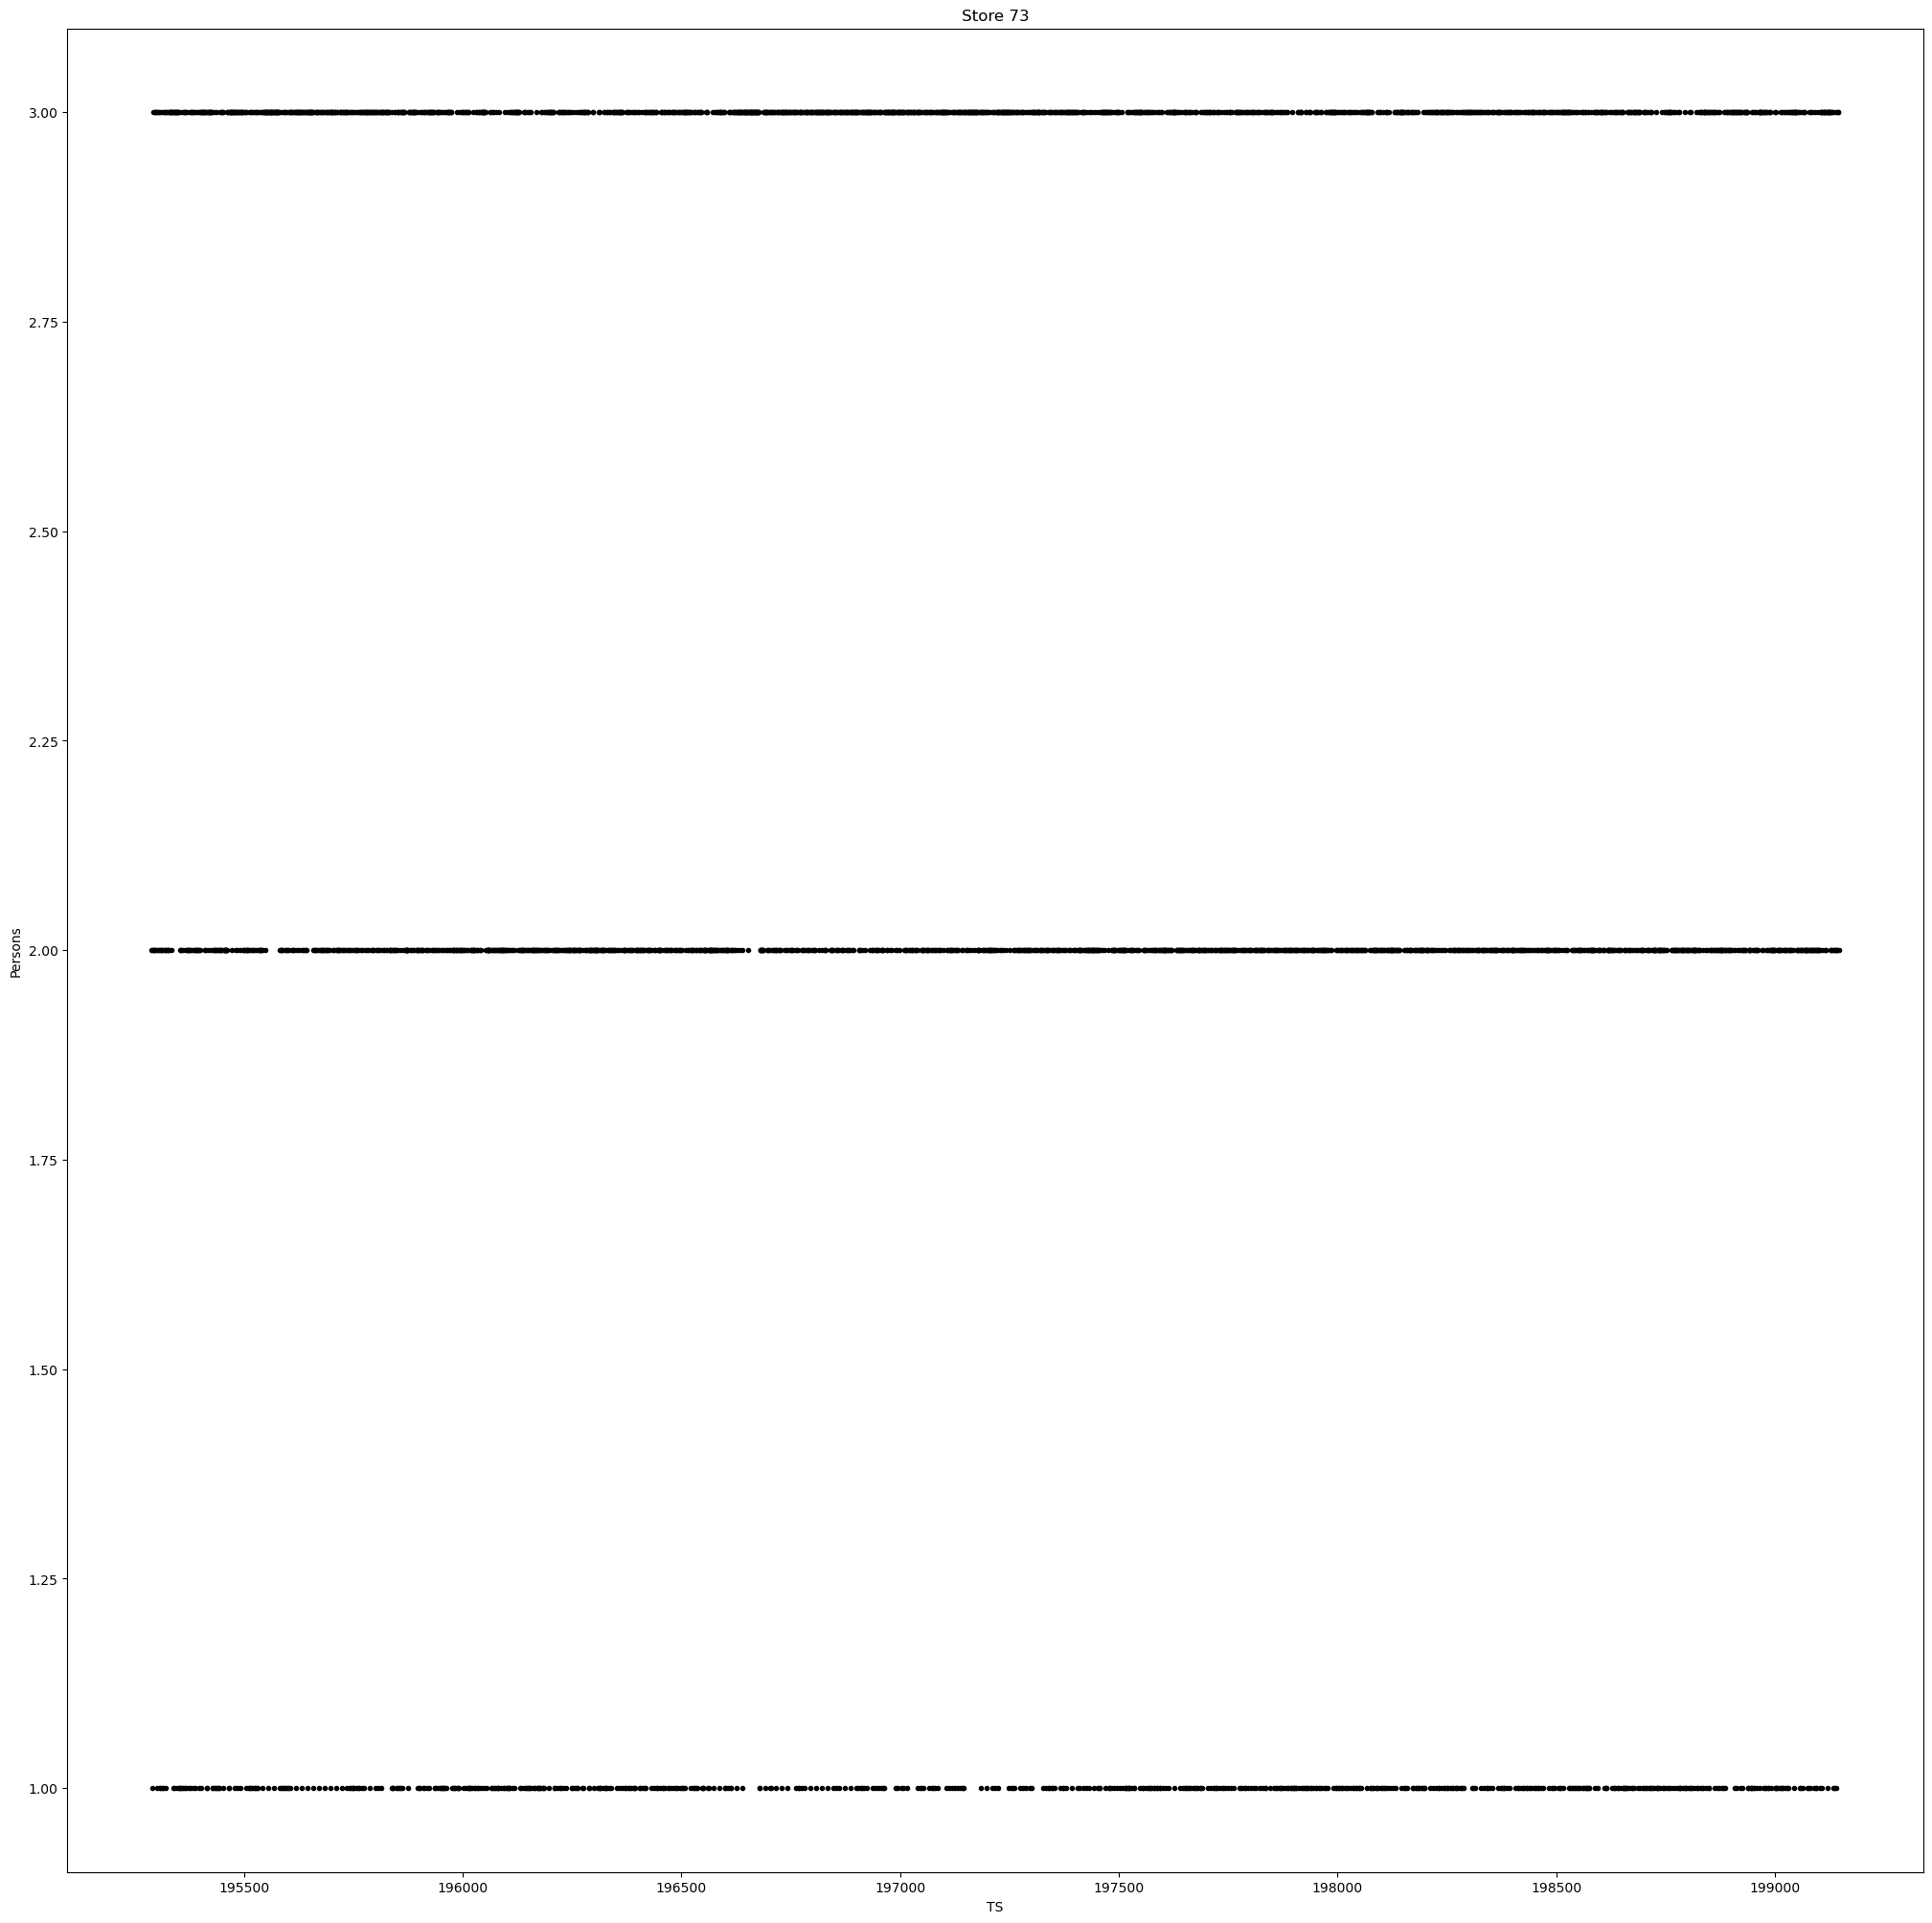

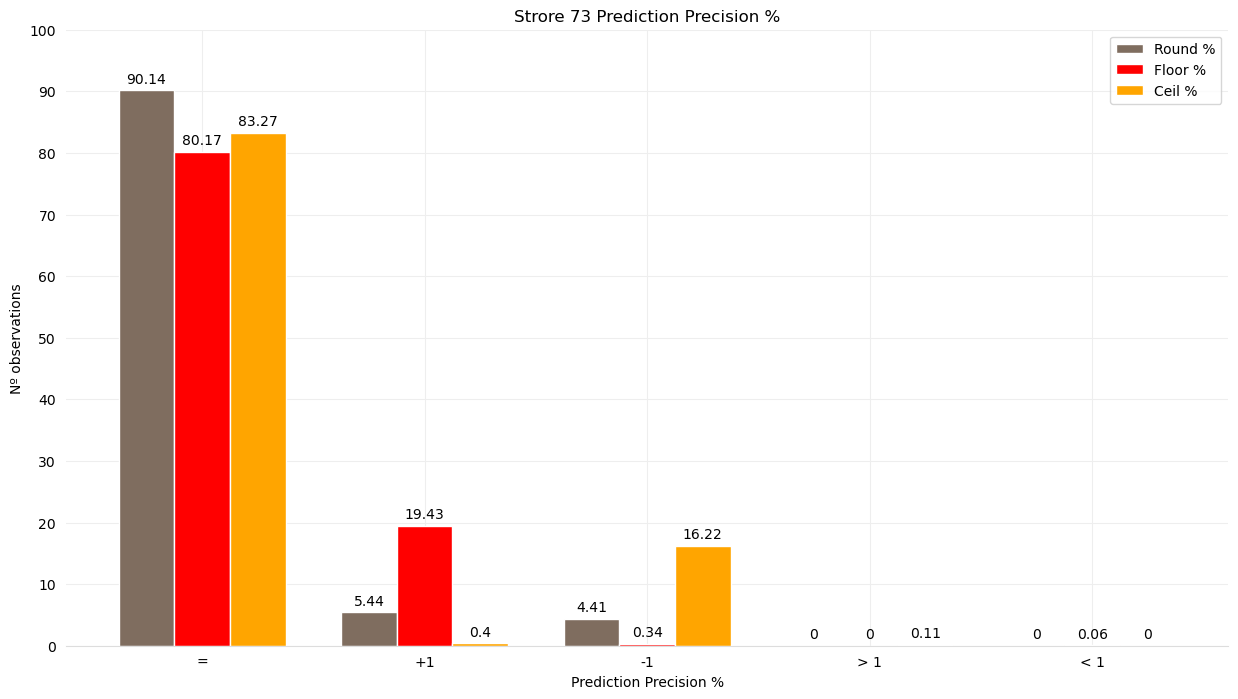

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       1573 |         95 |         77 |          0 |          0  
  Floor                |       1399 |        339 |          6 |          0 |          1  
  Ceil                 |       1453 |          7 |        283 |          2 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      90.14 |       5.44 |       4.41 |        0.0 |        0.0  
  Floor % 

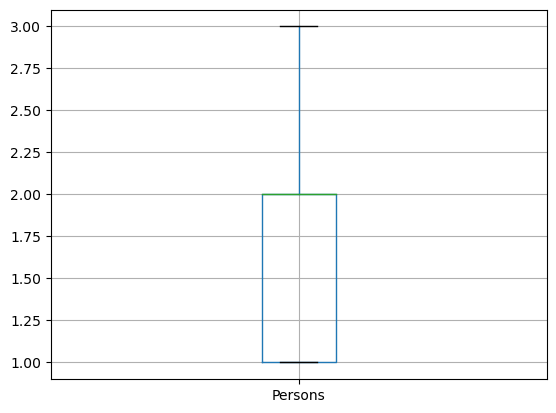

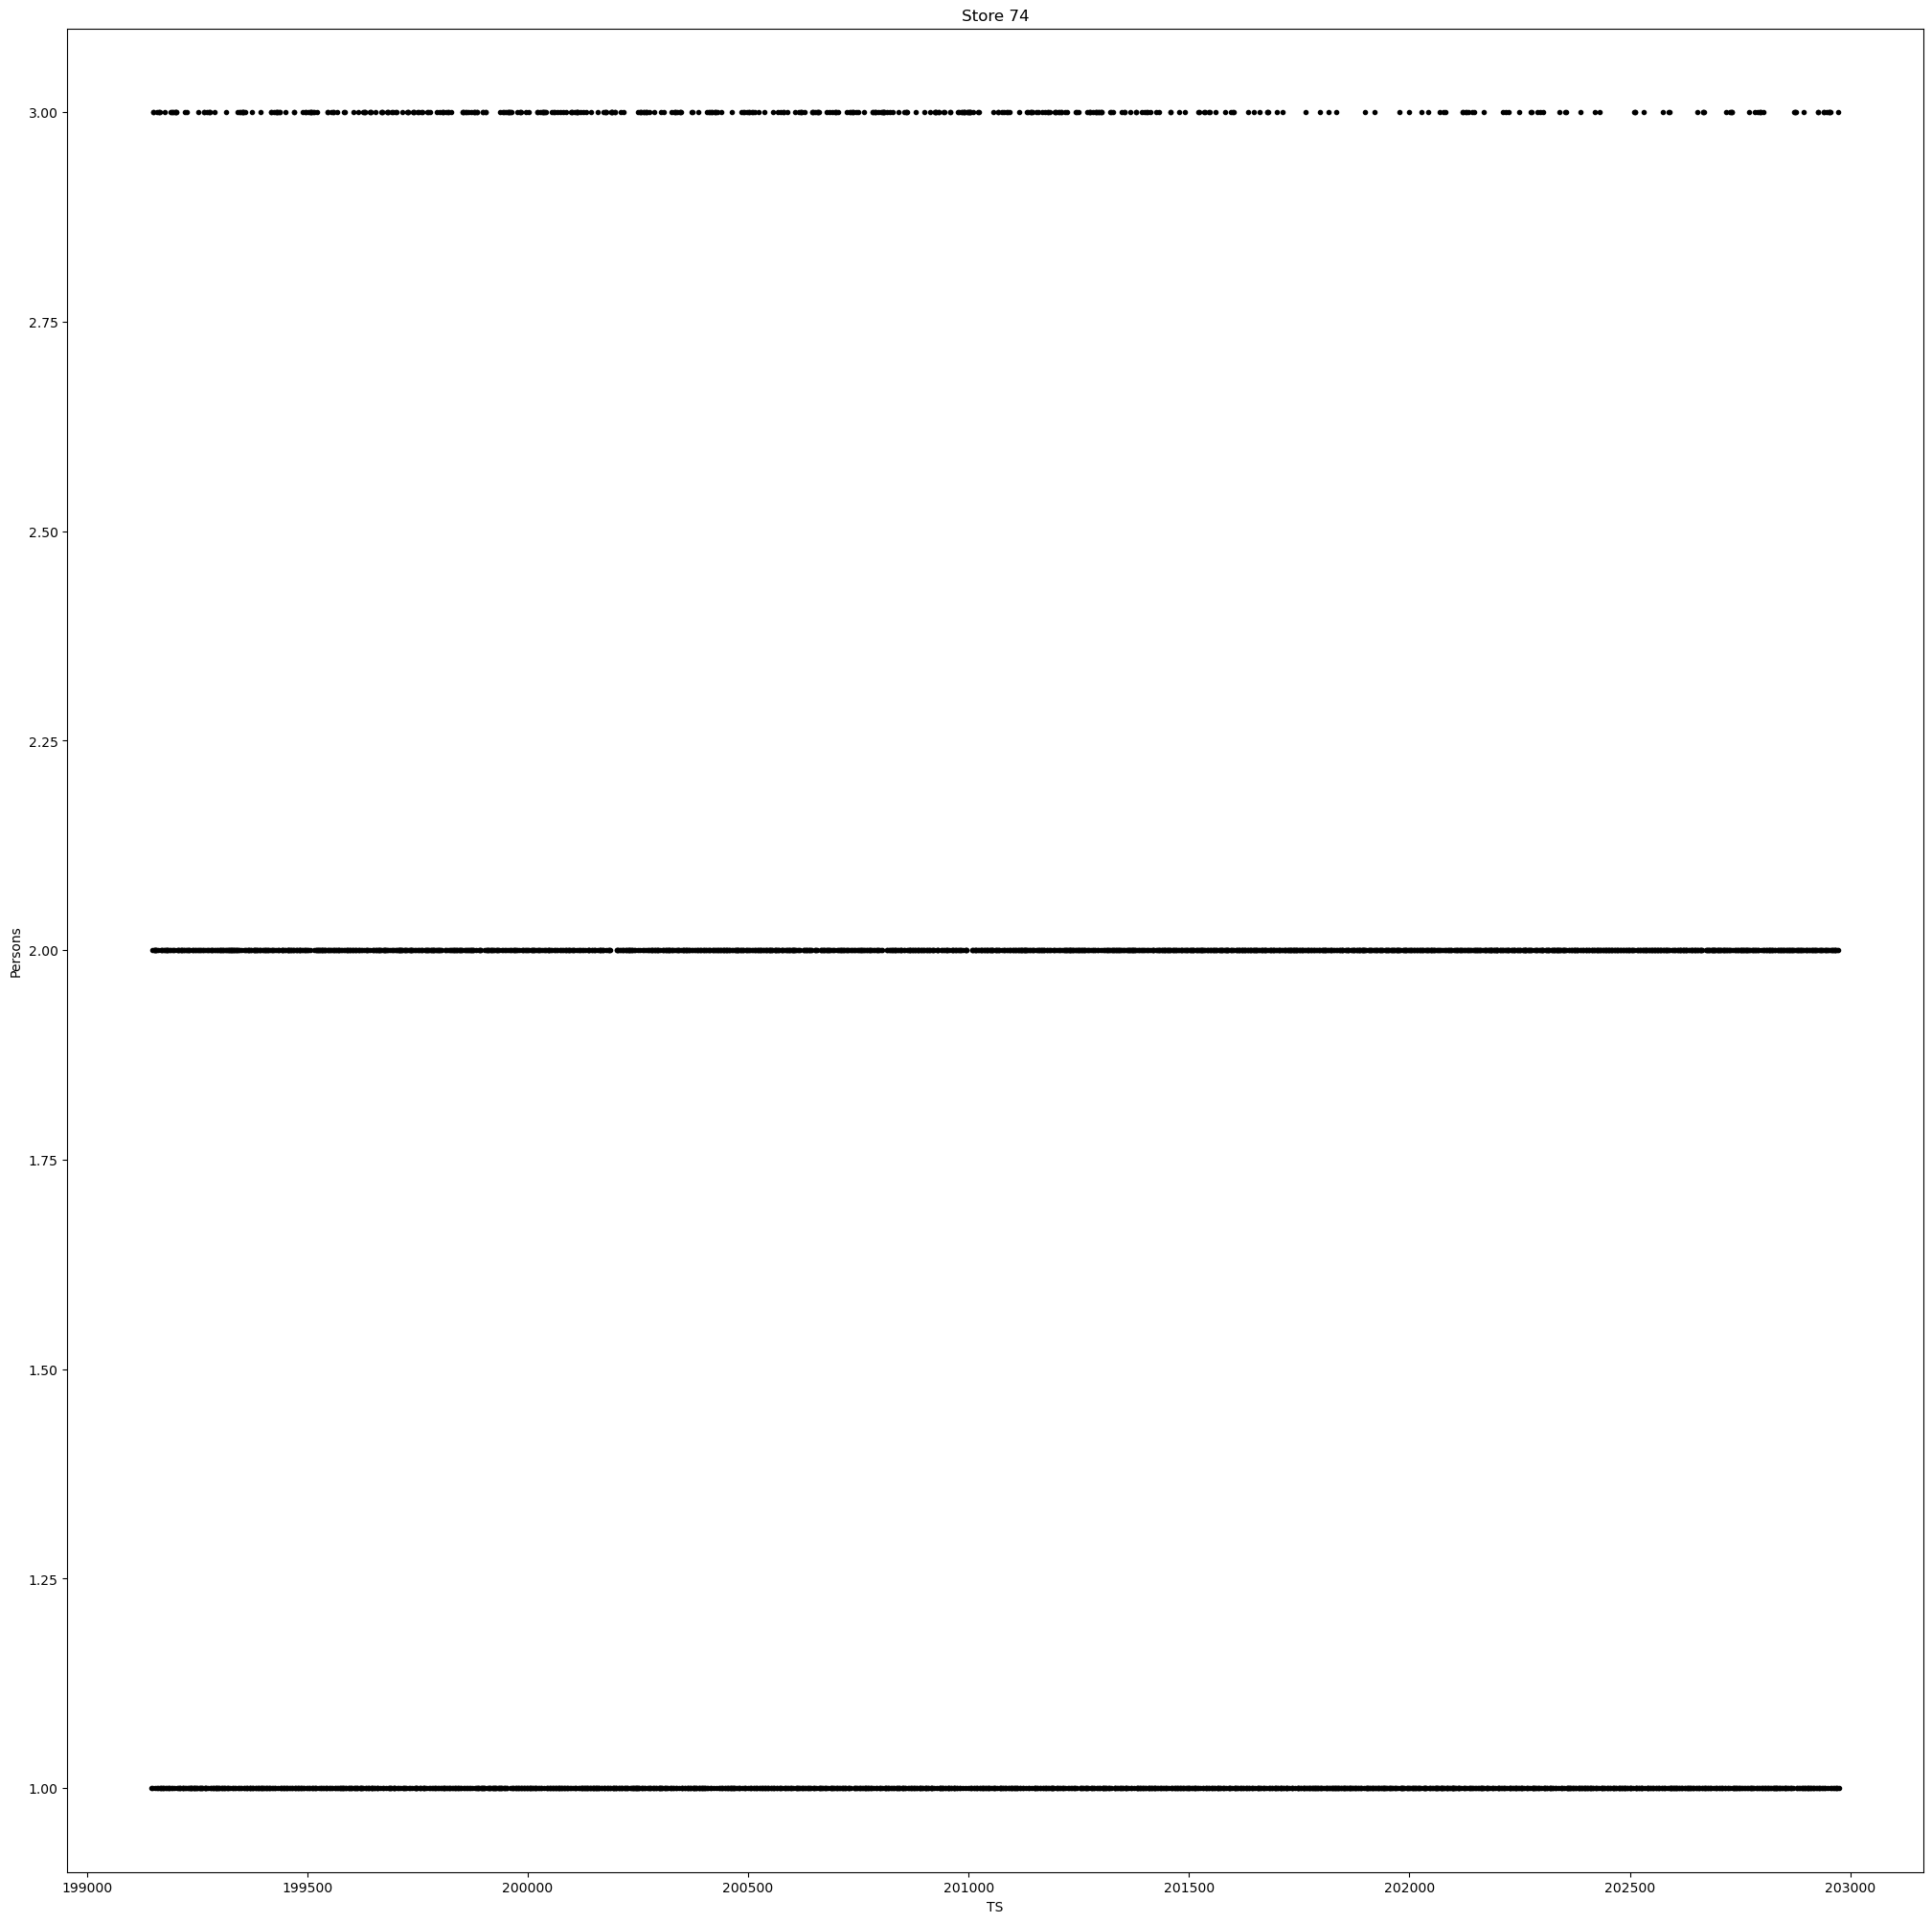

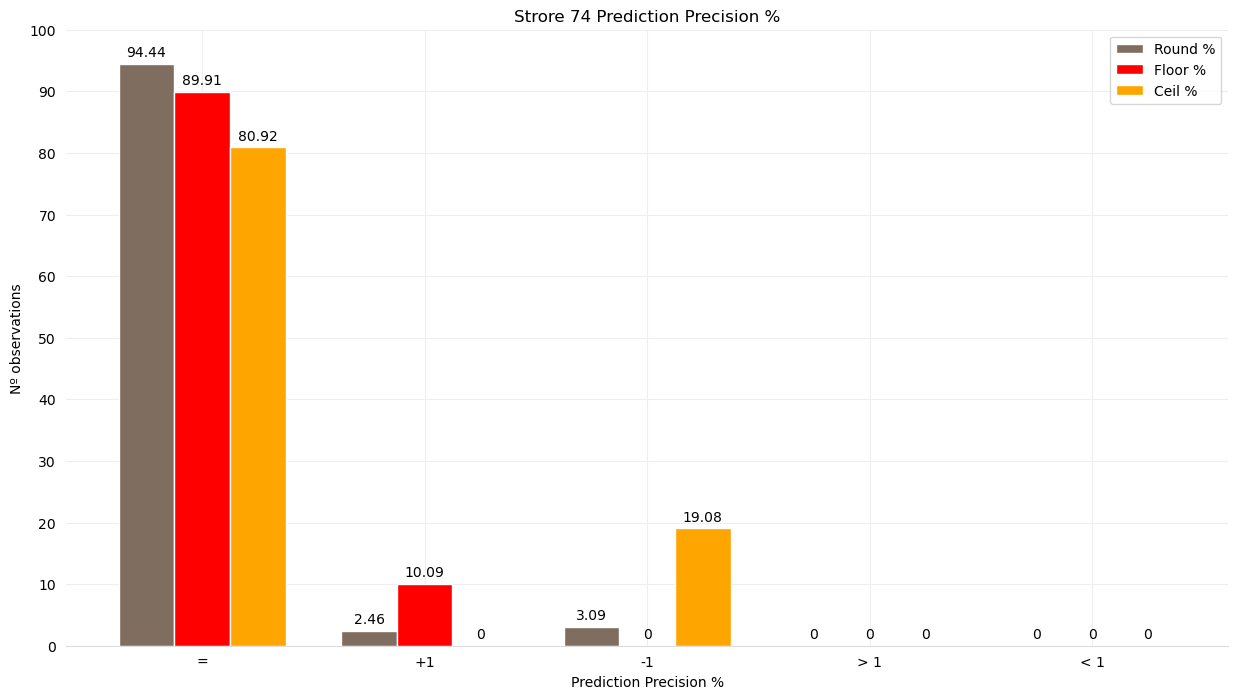

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |       1648 |         43 |         54 |          0 |          0  
  Floor                |       1569 |        176 |          0 |          0 |          0  
  Ceil                 |       1412 |          0 |        333 |          0 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      94.44 |       2.46 |       3.09 |        0.0 |        0.0  
  Floor % 

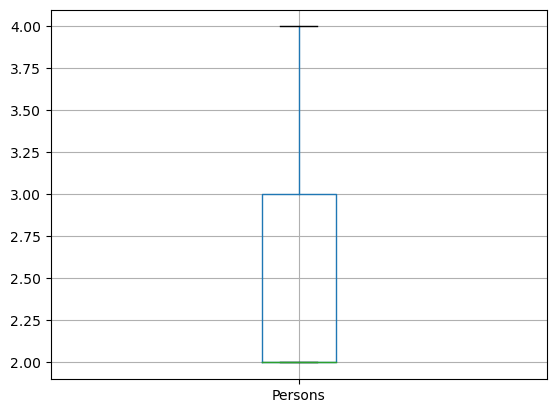

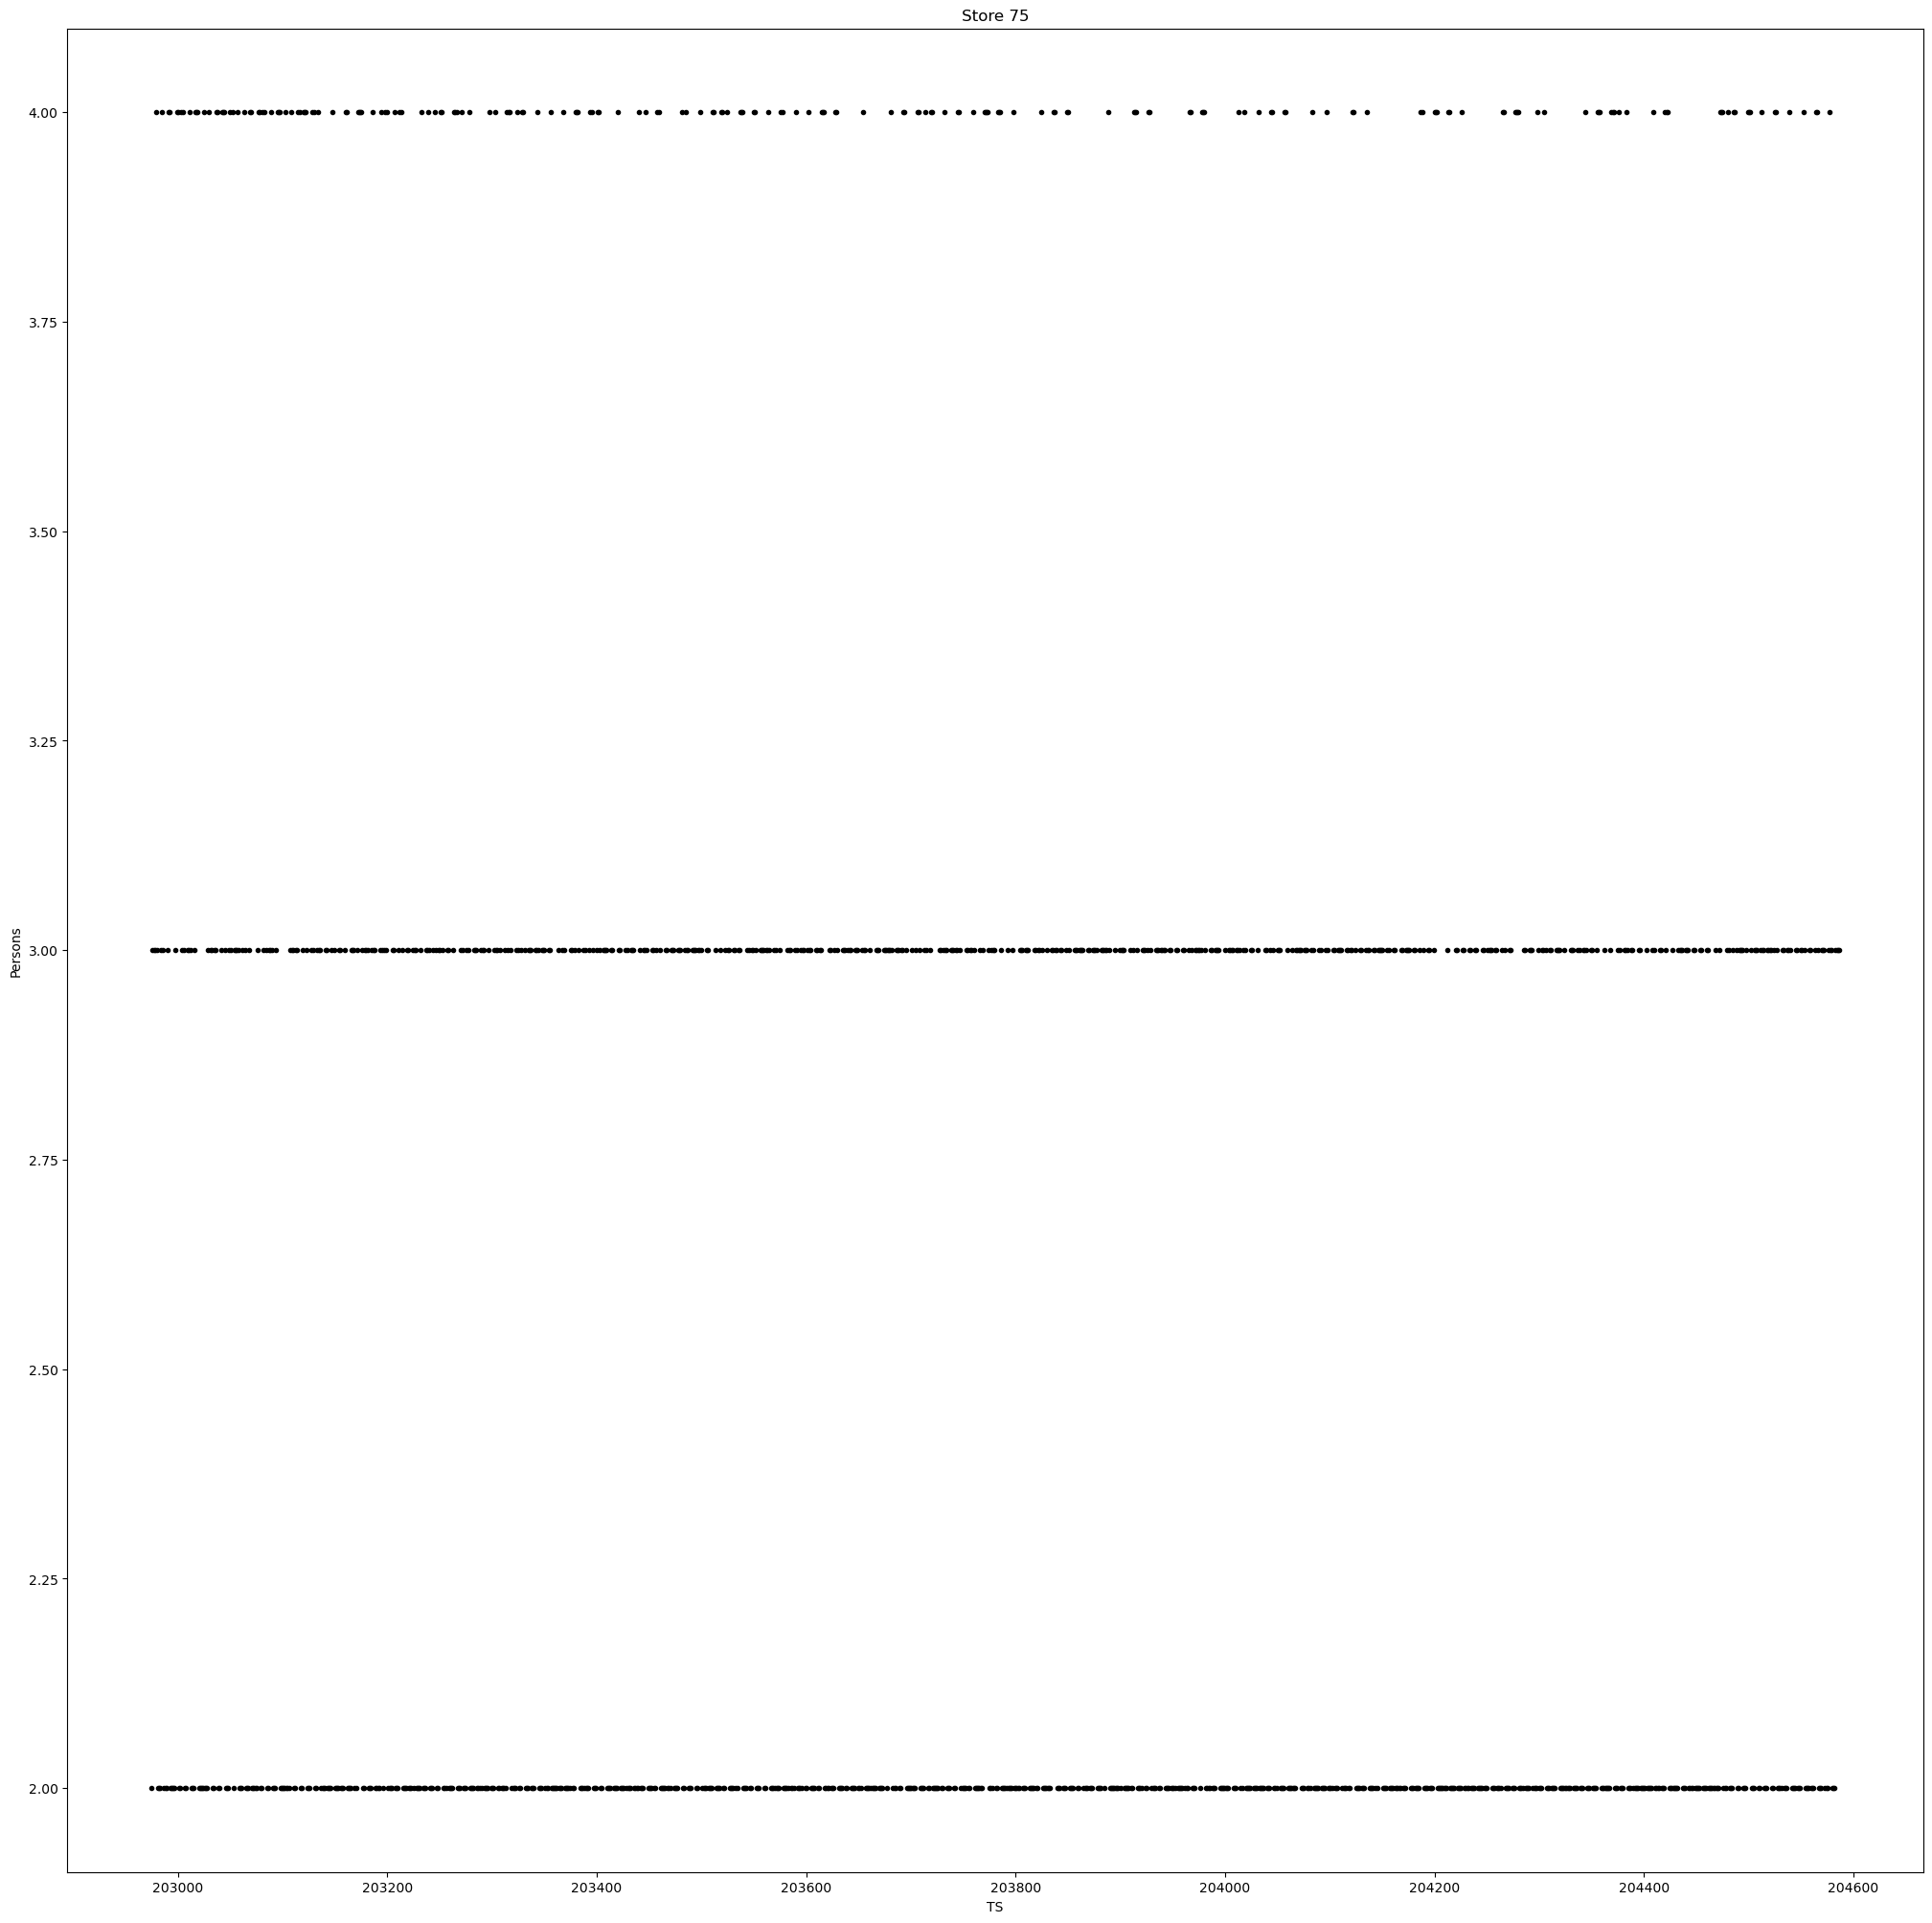

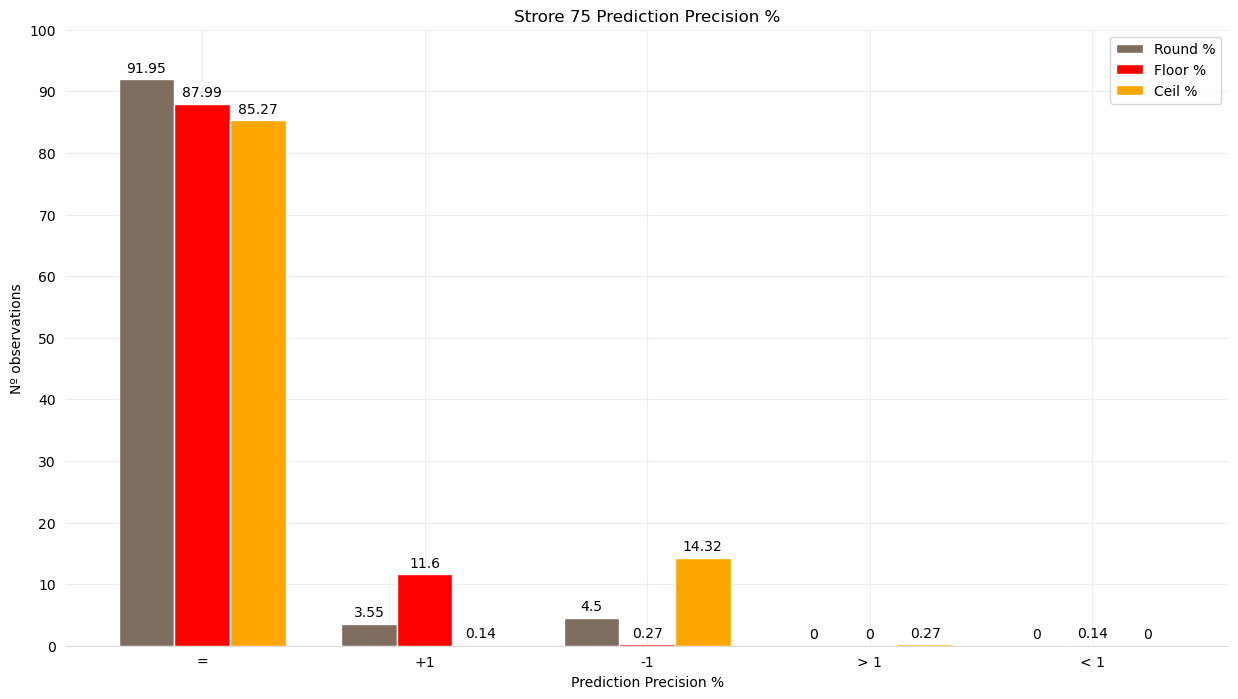

-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round                |        674 |         26 |         33 |          0 |          0  
  Floor                |        645 |         85 |          2 |          0 |          1  
  Ceil                 |        625 |          1 |        105 |          2 |          0  
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
         Method        |     =      |     +1     |     -1     |    > 1     |    < 1      
-----------------------------------------------------------------------------------------
  Round %              |      91.95 |       3.55 |        4.5 |        0.0 |        0.0  
  Floor % 

In [39]:
stores = pd.value_counts(data_filtered['RosterCode'].values.ravel())
stores_ids = list(stores.index)
stores_ids.sort()

#print(stores)
#print(stores_ids)
#print(stores.array)


print('---------------------------------------------------------------------')
print('Nº stores: ' + str(len(stores)))
print('---------------------------------------------------------------------')


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt, ceil, floor
from matplotlib import pyplot
from statistics import mean, median, mode, quantiles
#import tabletext

"""
def model_metrics(y_true, y_pred):
    d_metrics = {}
    d_metrics['mse'] = np.sqrt(mean_squared_error(y_true, y_pred))
    d_metrics['mae'] = mean_absolute_error(y_true, y_pred)
    d_metrics['r2_score'] = r2_score(y_true, y_pred)
    
    return d_metrics
"""

d = {  'ROUND =': []
     , 'ROUND +1': []
     , 'ROUND -1': []
     , 'ROUND > 1': []
     , 'ROUND < 1': []
     , 'FLOOR =': []
     , 'FLOOR +1': []
     , 'FLOOR -1': []
     , 'FLOOR > 1': []
     , 'FLOOR < 1': []     
     , 'CEIL =': []
     , 'CEIL +1': []
     , 'CEIL -1': []
     , 'CEIL > 1': []
     , 'CEIL < 1': []}
    
r_pred_prec = pd.DataFrame(data=d)

d = {  'Store ID': []
     , 'N Records': []
     , 'N Records Agg': []
     , 'N Records Train': []
     , 'N Records Test': []
     , 'RAW MAE': []
     , 'ROUND MAE': []
     , 'FLOOR MAE': []
     , 'CEIL MAE': []}

r = pd.DataFrame(data=d)

n_usable_stores = 0

for id in stores_ids:
    store_data = data_filtered.loc[data_filtered['RosterCode'] == id]
    store_data = store_data.drop(columns=['RosterCode'])
    
    n_store_rec = store_data.shape[0]
    
    print()
    print('----------------------------------------------------------------------------------------------------------------')
    print('Store ' + str(id))
    print('----------------------------------------------------------------------------------------------------------------')
    print()
    
    #print('Nº records: ' + str(n_store_rec))

    #----------------------------------------------------------------------------------------------------------------
    """
    zeros_data = store_data.loc[store_data['Persons'] == 0]
    #print(zeros_data)
    #bad_data = zeros_data.loc[data['TicketsPrev'] > 0]
    bad_data = zeros_data.loc[zeros_data['Tickets'] > 0]
    #print(bad_data)
    
    if bad_data.empty:
        n_usable_stores += 1
    else:
        continue
        
    #print(zeros_data)
    #print(bad_data)
    """
    #----------------------------------------------------------------------------------------------------------------
    v = list(store_data['Persons'].values)
    _mean = mean(v)
    _median = median(v)
    _mode = mode(v)
    _quantiles = quantiles(v)
    max_value = max(v)
    min_value = min(v)

    #print(_mean, _median, _mode, _quantiles, min_value, max_value)
    
    headername = ["{}".format(x) for x in range(6)]
    headername[0] = 'Mean'
    headername[1] = 'Median'
    headername[2] = 'Mode'
    headername[3] = 'Quantiles'
    headername[4] = 'Min Value'
    headername[5] = 'Max Value'
    data = [[_mean, _median, _mode, str(_quantiles), min_value, max_value]]

    PrintTable(data, 
       headername, 
       [10, 10, 10, 20, 10, 10], 
       ["^","^","^","^","^","^"]).print()    
    
    boxplot = store_data.boxplot(column=['Persons'])

    fig = pyplot.figure(figsize=(25, 25))
    pyplot.plot(store_data['Persons'], 'k.')
    pyplot.title('Store ' + str(id))
    pyplot.xlabel('TS')
    pyplot.ylabel('Persons')
    pyplot.show()
    #----------------------------------------------------------------------------------------------------------------
    
    store_data_filtered = pd.DataFrame(store_data.resample('H', on='StartDate').sum())
    
    #print(store_data_filtered)
    n_store_rec_agg = store_data_filtered.shape[0]
    #print('Nº records agg: ' + str(n_store_rec_agg))
    
    store_data_filtered.reset_index(inplace=True)
    #print(store_data_filtered)
    
    store_data_filtered['Month'] = store_data_filtered['StartDate'].apply(lambda x: x.month)
    store_data_filtered['Day'] = store_data_filtered['StartDate'].apply(lambda x: x.weekday())
    store_data_filtered['Hour'] = store_data_filtered['StartDate'].apply(lambda x: x.hour)
    #print(store_data_filtered)
    
    store_data_filtered = store_data_filtered.drop(columns=['StartDate'])
    #print(store_data_filtered)
    
    #boxplot = store_data_filtered.boxplot(column=['Persons'])
    #boxplot = store_data_filtered.boxplot(column=['Persons'], by=['Persons'])
    
    store_data_filtered = store_data_filtered[['Month', 'Day', 'Hour', 'TicketsPrev', 'Persons']]
    #print(store_data_filtered)
    
    N = n_store_rec_agg
    K = N * 80 / 100
    #print(N, K, int(K))
    K = int(K)
    
    filename = 'loja_' + str(id) + '_data.csv'
    #store_data_filtered.to_csv(filename, index=False)

    X = store_data_filtered.iloc[:,:-1].values
    y = store_data_filtered.iloc[:,-1].values

    #print(store_data_filtered[:10])
    #print(X[:10])
    #print(y[:10])
    
    """
    X_train = X[:-K,:]
    y_train = y[:-K]
    X_test = X[-K:]
    y_test = y[-K:]
    """
    
    X_train = X[:K]
    y_train = y[:K]
    X_test = X[K:]
    y_test = y[K:]
    
    """
    print(X_train[-10:])
    print(y_train[-10:])
    print(X_test[:10])
    print(y_test[:10])
    print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
    """
    
    regr = RandomForestRegressor()
    regr.fit(X_train, y_train)
    
    y_pred = regr.predict(X_test)
    #print(X_test)
    #metrics = model_metrics(y_test, y_pred)
    #print(model_metrics(y_test, y_pred))
    
    #print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
    
    #rmse = sqrt(metrics['mse'])
    
    r_mylist = []
    rc_mylist = []
    rf_mylist = []
    
    #print(y_pred)

    equal = [0, 0, 0]
    plus_1 = [0, 0, 0]
    minus_1 = [0, 0, 0]
    gt_1 = [0, 0, 0]
    lt_1 = [0, 0, 0]
    
    k = 0
    for el in y_pred:
        _round = round(el)
        _ceil = ceil(el)
        _floor = floor(el)

        v = y_test[k]
        
        #print(el, _round, _floor, _ceil)
        
        if v == _round:
            equal[0] += 1
        elif v == _round + 1:
            plus_1[0] += 1
        elif v == _round - 1:
            minus_1[0] += 1
        elif _round + 1 > v:
            gt_1[0] += 1
            print('> 1: real:', v, ' estimated:', _round)
        elif _round - 1 < v:
            lt_1[0] += 1
            print('< 1: real:', v, ' estimated:', _round)
            
        if v == _floor:
            equal[1] += 1
        elif v == _floor + 1:
            plus_1[1] += 1
        elif v == _floor - 1:
            minus_1[1] += 1
        elif _floor + 1 > v:
            gt_1[1] += 1
        elif _floor - 1 < v:
            lt_1[1] += 1
            
        if v == _ceil:
            equal[2] += 1
        elif v == _ceil + 1:
            plus_1[2] += 1
        elif v == _ceil - 1:
            minus_1[2] += 1
        elif _ceil + 1 > v:
            gt_1[2] += 1
        elif _ceil - 1 < v:
            lt_1[2] += 1
            
        r_mylist.append(_round)
        rc_mylist.append(_ceil)
        rf_mylist.append(_floor)
        
        k += 1

    """
    print(list(y_pred)[:25])
    print(r_mylist[:25])
    print(rc_mylist[:25])
    print(rf_mylist[:25])
    """
    
    N = len(r_mylist)
    #print(N)
    #-------------------------------------------------------------------------------------------------------

    labs = ('=', '+1', '-1', '> 1', '< 1')
    
    vals = {
        'Round %': (round(equal[0] * 100 / N, 2), round(plus_1[0] * 100 / N, 2), round(minus_1[0] * 100 / N, 2), round(gt_1[0] * 100 / N, 2), round(lt_1[0] * 100 / N, 2)),
        'Floor %': (round(equal[1] * 100 / N, 2), round(plus_1[1] * 100 / N, 2), round(minus_1[1] * 100 / N, 2), round(gt_1[1] * 100 / N, 2), round(lt_1[1] * 100 / N, 2)),
        'Ceil %': (round(equal[2] * 100 / N, 2), round(plus_1[2] * 100 / N, 2), round(minus_1[2] * 100 / N, 2), round(gt_1[2] * 100 / N, 2), round(lt_1[2] * 100 / N, 2)),
    }
   
    x = np.arange(len(labs))
    width = 0.25
    multiplier = 0

    fig, ax = pyplot.subplots(figsize=(15, 8))

    j = 0
    for attribute, measurement in vals.items():
        offset = width * multiplier
        
        color='#7f6d5f'
        if j == 1:
            color='red'
        elif j == 2:
            color='orange'
            
        rects = ax.bar(x + offset, measurement, width, color=color, edgecolor='white', label=attribute)
        ax.bar_label(rects, padding=3)
        multiplier += 1
        j += 1
        
    ax.set_ylabel('Nº observations')
    ax.set_xlabel('Prediction Precision %')
    ax.set_title('Strore ' + str(id) + ' Prediction Precision %')
    ax.set_xticks(x + width, labs)
    ax.legend(loc='upper right')
    #ax.set_ylim(0, 100)
    pyplot.yticks((0, 100, 10, 20, 30, 40, 50, 60, 70, 80, 90))
    
    # Axis styling.
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')
    ax.tick_params(bottom=False, left=False)
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color='#EEEEEE')
    ax.xaxis.grid(True, color='#EEEEEE')
    
    pyplot.show()    
    
    fig.savefig(str(id) + '_%_pred_prec.png')
    #-------------------------------------------------------------------------------------------------------
    """
    print(tabletext.to_text([['Method', '=', '+1', '-1', '> 1', '< 1']
                             , ['Round', equal[0], plus_1[0], minus_1[0], gt_1[0], lt_1[0]]
                             , ['Floor', equal[1], plus_1[1], minus_1[1], gt_1[1], lt_1[1]]
                             , ['Ceil', equal[2], plus_1[2], minus_1[2], gt_1[2], lt_1[2]]
                            ])) 
    """
    
    headername = ["Column {}".format(x) for x in range(6)]
    headername[0] = 'Method'
    headername[1] = '='
    headername[2] = '+1'
    headername[3] = '-1'
    headername[4] = '> 1'
    headername[5] = '< 1'
    
    data = [['Round', equal[0], plus_1[0], minus_1[0], gt_1[0], lt_1[0]]
          , ['Floor', equal[1], plus_1[1], minus_1[1], gt_1[1], lt_1[1]]
          , ['Ceil', equal[2], plus_1[2], minus_1[2], gt_1[2], lt_1[2]]]

    PrintTable(data, 
       headername, 
       [20, 10, 10, 10, 10, 10], 
       ["<",">",">",">",">",">"]).print()

    headername = ["Column {}".format(x) for x in range(6)]
    headername[0] = 'Method'
    headername[1] = '='
    headername[2] = '+1'
    headername[3] = '-1'
    headername[4] = '> 1'
    headername[5] = '< 1'
    
    data = [['Round %', round(equal[0] * 100 / N, 2), round(plus_1[0] * 100 / N, 2), round(minus_1[0] * 100 / N, 2), round(gt_1[0] * 100 / N, 2), round(lt_1[0] * 100 / N, 2)]
          , ['Floor %', round(equal[1] * 100 / N, 2), round(plus_1[1] * 100 / N, 2), round(minus_1[1] * 100 / N, 2), round(gt_1[1] * 100 / N, 2), round(lt_1[1] * 100 / N, 2)]
          , ['Ceil  %', round(equal[2] * 100 / N, 2), round(plus_1[2] * 100 / N, 2), round(minus_1[2] * 100 / N, 2), round(gt_1[2] * 100 / N, 2), round(lt_1[2] * 100 / N, 2)]
           ]

    PrintTable(data, 
       headername, 
       [20, 10, 10, 10, 10, 10], 
       ["<",">",">",">",">",">"]).print()
    
    r_pred_prec = pd.concat([r_pred_prec, pd.DataFrame([[
                                       round(equal[0] * 100 / N, 2)
                                     , round(plus_1[0] * 100 / N, 2)
                                     , round(minus_1[0] * 100 / N, 2)
                                     , round(gt_1[0] * 100 / N, 2)
                                     , round(lt_1[0] * 100 / N, 2)
                                     , round(equal[1] * 100 / N, 2)
                                     , round(plus_1[1] * 100 / N, 2)
                                     , round(minus_1[1] * 100 / N, 2)
                                     , round(gt_1[1] * 100 / N, 2)
                                     , round(lt_1[1] * 100 / N, 2)
                                     , round(equal[2] * 100 / N, 2)
                                     , round(plus_1[2] * 100 / N, 2)
                                     , round(minus_1[2] * 100 / N, 2)
                                     , round(gt_1[2] * 100 / N, 2)
                                     , round(lt_1[2] * 100 / N, 2)
                                    ]]
                                   , columns=r_pred_prec.columns)]
                                   , ignore_index=True)    
    #-------------------------------------------------------------------------------------------------------

    r = pd.concat([r, pd.DataFrame([[  id
                                     , n_store_rec
                                     , n_store_rec_agg
                                     , K
                                     , N
                                     , mean_absolute_error(y_test, y_pred)
                                     , mean_absolute_error(y_test, np.array(r_mylist))
                                     , mean_absolute_error(y_test, np.array(rf_mylist))
                                     , mean_absolute_error(y_test, np.array(rc_mylist))
                                    ]]
                                   , columns=r.columns)]
                                   , ignore_index=True)    
    
    #break

filename = 'results_data.csv'
r.to_csv(filename, index=False)

filename = 'results_pred_prec.csv'
r_pred_prec.to_csv(filename, index=False)

from IPython.display import HTML, display
display(HTML(r.to_html()))
display(HTML(r_pred_prec.to_html()))

#print(r.to_html())
#print(pd.DataFrame(r, columns=['Store ID', 'N Records', 'N Records Agg', 'N Records Train', 'N Records Test', 'RAW MAE', 'ROUND MAE', 'FLOOR MAE', 'CEIL MAE']))
